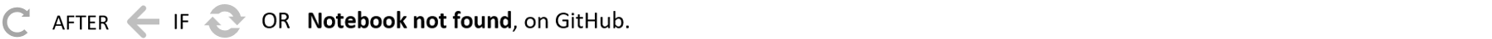

[Return to README](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/README.md#explore-the-project)

# Wikipedia Notable Life Expectancy
## Notebook 7: Data Cleaning Part 6
### Contents

This notebook covers:
- Extracting `known_for` and `cause_of_death` with `known_for_dict` (multiple iterations):
    - `info_3_0`
- Exporting partially-cleaned dataset to SQLite database

***NOTE: Refer to [Notebook 5: Data Cleaning Part 4](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_clean4_thanak_2022_08_05.ipynb) "Extracting `known for` Data" section, for outlined approach.

### Instructions
Options for Running this Notebook:  
 ***NOTE: This is a long-running notebook.
1. Clone the repository:   
    - Delete the following file that is generated by this notebook:
        - [wp_life_expect_clean6.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_clean3.db)
    - Navigate to the cloned repository in Jupyter and open the notebook to run it.
    - Refer to [Application and Package Versions](https://github.com/teresahanak/wikipedia-life-expectancy#application-and-package-versions).
2. Save the notebook and database file below to the same working directory:<sup>1</sup>
    - Download the notebook:
        - Click on <kbd>Raw</kbd> above.
        - Save <kbd>Ctrl</kbd> + <kbd>S</kbd>
    - Follow the link to the database file and click <kbd>Download</kbd>, then move file to the same directory as the notebook:
        - [wp_life_expect_clean5.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_clean2.db)<sup>2</sup>
    - In Jupyter, navigate to the directory in which the notebook and file are saved to open and run the notebook.  
    - Refer to [Application and Package Versions](https://github.com/teresahanak/wikipedia-life-expectancy#application-and-package-versions).

    

### Data Dictionary for Loaded Version of Dataset
- **day**:  Day of the month of the individual's death
- **name**:  Name of the individual
- **info**:  Combined Wikipedia-defined fields:
> Name, age, country of citizenship at birth, subsequent country of citizenship (if applicable), reason for notability, cause of death (if known), and reference.<sup>3</sup>
>
- **link**:  Link to an individual's page
- **num_references**:  Number of references for individual's page
- **year**: Year of the individual's death
- **month**: Month of the individual's death
- **info_parenth**: Parenthetical contents previously in info column
- **age**: Age of individual at death in years
- **cause_of_death**: Cause of death of individual
- **place_1**: Place of residence at birth
- **place_2**: Subsequent place of residence (if applicable)
- **info_parenth_copy**: working copy of info_parenth
- **info_3_0** through **info_11_0**: Resultant remaining sub-columns of second split (on "and") of previously split (on commas) info (info_1_ and info_2_ sub-columns already exhausted and dropped)
- **sciences**: (0 for no or 1 for yes) individual known for sciences (math, physics, chemistry, engineering, mechanics, etc.)
- **social**: (0 for no or 1 for yes) individual known for social action (philanthropy, fund-raising for social cause, founding charity, etc.)
- **spiritual**: (0 for no or 1 for yes) individual known for spiritual association (religious association, traditional healing, self-help/motivational instructor, etc.)
- **academia_humanities**: (0 for no or 1 for yes) individual known for education activity (educator, education administration, lecturer, etc.; excludes sports-related instruction/coaching, but includes art/performing arts instruction; includes museum-related activities; classics, archeology, linguistics, anthropology, etc.)
- **business_farming**: (0 for no or 1 for yes) individual known for business or farming (includes marketing, millionaire/billionaire, manufacturing, oil/energy)
- **arts**: (0 for no or 1 for yes) individual known for arts-related activity (fine and performing arts, journalism, writing, arts administration, art patronage, collecting, etc.; gallery owners/founders are included; museum-related is excluded; stunt performers included)
- **sports**: (0 for no or 1 for yes) individual known for sports-related activity (traditional sports participation/instruction/coaching/ownership/fandom/commentator and anything competition-based, including non-physical games, such as chess; sportswriter, etc. would have dual category of arts)
- **law_enf_military_operator**: (0 for no or 1 for yes) individual known for law enforcement, military/paramilitary association/activity, or specialized equipment operation (pilot, ship captain (non-sport), radio operator, etc.); category aims to reflect individual's proximity to activity and/or weapons/equipment or decision-making that could impact life span, independent of legality of activity
- **politics_govt_law**: (0 for no or 1 for yes) individual known for political activity (official or activism), participation in legal system (lawyer, judge, etc.), nobility or inherited status; directly or by marriage; union activity is included
- **crime**: (0 for no or 1 for yes) individual known for criminal activity; category aims for "innocent until proven guilty", includes convicted criminals (can be for a different crime); includes individuals labeled "terrorist", but generally excludes individuals awaiting trial who are instead assigned to event_record_other category
- **event_record_other**: (0 for no or 1 for yes) individual known for activity that does not fit another category, or a passive attribute, e.g., "tallest person"; being a victim or survivor of an event included
- **other_species**: (0 for no or 1 for yes) Non-human entries
- **num_categories**: Total number of known_for categories for individual

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np
import re

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 200)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some visualization attributes
pd.set_option("max_colwidth", 150)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_clean5.db), Sampling, and Checking Data Shape

In [2]:
# Reading the dataset
conn = sql.connect("wp_life_expect_clean5.db")
data = pd.read_sql("SELECT * FROM wp_life_expect_clean5", conn)

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 98041 rows and 43 columns.


,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,info_parenth_copy,info_3_0,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
0,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21,1994,January,None,86.0,None,United Kingdom of Great Britain and Northern Ireland,None,None,ballet designer,director,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12,1994,January,None,68.0,None,Ireland,None,None,writer,None,None,and academic,None,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,info_parenth_copy,info_3_0,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
98039,9,Aamir Liaquat Hussain,", 50, Pakistani journalist and politician, MNA .",https://en.wikipedia.org/wiki/Aamir_Liaquat_Hussain,99,2022,June,"2002 2007, since 2018",50.0,None,Pakistan,None,", since",MNA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,1,0,0,1,0,0,0,2
98040,9,Zou Jing,", 86, Chinese engineer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Zou_Jing_(engineer),3,2022,June,None,86.0,None,"China, People's Republic of",None,None,member of the Academy of Engineering,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,0,0,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,info_parenth_copy,info_3_0,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
25382,12,Buzz Nutter,", 77, American football player , heart failure.",https://en.wikipedia.org/wiki/Buzz_Nutter,8,2008,April,"Colts, Steelers",77.0,None,United States of America,None,"Colts, Steelers",heart failure,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,0,0,1
12671,30,Maladi,", 88, Indonesian athlete, songwriter, and politician.",https://en.wikipedia.org/wiki/Maladi,17,2001,April,None,88.0,None,Indonesia,None,None,songwriter,None,None,and politician,None,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,0,0,1
30358,24,James Henry Quello,", 95, American government official, FCC Commissioner , heart and kidney failure.",https://en.wikipedia.org/wiki/James_Henry_Quello,4,2010,January,1974 1997,95.0,None,United States of America,None,,FCC Commissioner,None,None,heart,kidney failure,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,1,0,0,0,1
20891,21,"Michael Chan, Baron Chan",", 65, British paediatrician, second peer of Chinese origin.","https://en.wikipedia.org/wiki/Michael_Chan,_Baron_Chan",5,2006,January,None,65.0,None,United Kingdom of Great Britain and Northern Ireland,None,None,second peer of origin,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,0,0,0,0,0,0,0,0,0,0,0,1
91645,28,Malcolm McCaw,", 91, New Zealand cricketer .",https://en.wikipedia.org/wiki/Malcolm_McCaw,4,2021,July,Wellington,91.0,None,New Zealand,None,Wellington,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,0,0,1


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98041 entries, 0 to 98040
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day                        98041 non-null  object 
 1   name                       98041 non-null  object 
 2   info                       98041 non-null  object 
 3   link                       98041 non-null  object 
 4   num_references             98041 non-null  int64  
 5   year                       98041 non-null  int64  
 6   month                      98041 non-null  object 
 7   info_parenth               36660 non-null  object 
 8   age                        98041 non-null  float64
 9   cause_of_death             17 non-null     object 
 10  place_1                    97886 non-null  object 
 11  place_2                    5896 non-null   object 
 12  info_parenth_copy          36660 non-null  object 
 13  info_3_0                   48855 non-null  obj

<IPython.core.display.Javascript object>

#### Observations:
- With our dataset loaded, we can pick up where we left off with extracting known_for values by rebuilding `known_for_dict` and starting the search of `info_3` columns.
- We will need to adjust our approach at this step, in order to also capture `cause_of_death` values.
- Prior to this point we have hard-coded the few `cause_of_death` values encountered, but we expect a much higher proportion of them for the remaining numbered columns.
- We will add a new list `cause_of_death` to collect those values and we will add a separate loop to extract them to the `cause_of_death` column.

### Extracting Remaining `known_for` and `cause_of_death` Values

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [6]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [7]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [8]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "Roman" in df.loc[index, "info_3_0"]
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [9]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [10]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "Roman Catholic pope"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [11]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "campaigner for breast cancer drug Herceptin",
    "MPP of the Legislative Assembly of for Beaches—Woodbine",
    "MP for Secretary General of the Council of and",
    "MPP of the Legislature for Waterloo North",
    "MP of the Karnataka Legislative Assembly",
    "MP of the Odisha Legislative Assembly",
    "MP for Medicine Hat—Cardston—Warner",
    "MP for Newcastle upon Tyne Central",
    "MP for Newcastle upon Tyne North",
    "MP for Perth—Wellington—Waterloo",
    "MP for North West Leicestershire",
    "MP for Northumberland—Miramichi",
    "MP for Wolverhampton South East",
    "MP for Newcastle upon Tyne East",
    "MP for South East St Elizabeth",
    "MP for North Central Clarendon",
    "MP for Manchester Wythenshawe",
    "first honorary MPLA President",
    "MP for Movement of the People",
    "MP for Beauharnois—Salaberry",
    "MP for Birmingham Perry Barr",
    "MP for Birmingham Handsworth",
    "MP for Birmingham Hall Green",
    "MP for Scarborough—Agincourt",
    "MP for Northumberland—Durham",
    "MP for Battleford—Kindersley",
    "MP for Birmingham Northfield",
    "MP for Sheffield Brightside",
    "MP for Leicester North West",
    "MP for City of Buenos Aires",
    "Queensland MP for Mackenzie",
    "MP for Amman fifth district",
    "MP for Stoke on Trent South",
    "MP for Leicester South East",
    "MP for Manchester Blackley",
    "MP for Windsor—Walkerville",
    "MP for Carleton Gloucester",
    "MP for Manchester Openshaw",
    "MP for Coventry North East",
    "MP for Croydon North West",
    "MP for East Aberdeenshire",
    "MP for Vancouver Kingsway",
    "MP for Birmingham Yardley",
    "MP for Nottingham Central",
    "MP for Afram Plains North",
    "MP for Bristol North West",
    "MP for Wandsworth Central",
    "MP for West Aberdeenshire",
    "MP for Manchester Ardwick",
    "MP for Manchester Central",
    "Conservative MP for South",
    "MP for Glasgow Queen Park",
    "MP for Weston super Mare",
    "MP for East Renfrewshire",
    "MP for Ambunti Dreikikir",
    "MP for Barrow in Furness",
    "MP for Mission—Coquitlam",
    "federal MP for St George",
    "MP for Belfast Shankill",
    "MPP for Dufferin Simcoe",
    "MPP for Wentworth North",
    "MP for Sheffield Heeley",
    "MP for Glasgow Cathcart",
    "MP for Clwyd North West",
    "co developer of the IMP",
    "MP for Paddington North",
    "MP for Bouches du Rhône",
    "MP for Grenville—Dundas",
    "MP for Bournemouth East",
    "MP for Stockholm County",
    "MP for Southampton West",
    "MP for Glenrothes since",
    "MP for Mid Bedfordshire",
    "MP for Brome—Missisquoi",
    "former MPP for Kingston",
    "MP for South Manchester",
    "MP for Sheffield Hallam",
    "MP for Naogaon District",
    "MP for Hemel Hempstead",
    "Khyber Pakhtunkhwa MPA",
    "MP for South West Nova",
    "MP for Bury St Edmunds",
    "MP for Bishop Auckland",
    "MP for Nottingham West",
    "MP for Ottawa—Carleton",
    "MP for Montgomeryshire",
    "MP for Coimbatore East",
    "MP for Kingsford Smith",
    "MP for The Battlefords",
    "former Labour Party MP",
    "MP for Blackpool South",
    "MP for Leeds—Grenville",
    "MP for Sault Ste Marie",
    "MP for Central Honiara",
    "NSW MP for Burrinjuck",
    "MP for Wellingborough",
    "MP for City of Durham",
    "MP for North Cornwall",
    "MP for Sarnia—Lambton",
    "MPP for Niagara Falls",
    "MP for Hatay Province",
    "MP for Aberdeen South",
    "MP for Knowsley South",
    "MPP of from Cambridge",
    "MP for Stockton North",
    "MP for Winnipeg South",
    "MP for Dalarna County",
    "MP for Brandon—Souris",
    "MP for Glasgow Pollok",
    "MPP for Ottawa Rideau",
    "speaker of MPR DPR in",
    "MP for Uppsala County",
    "MP for Berettyóújfalu",
    "MP for Glasgow Provan",
    "MP for Ikaroa Rāwhiti",
    "MP for Bradford West",
    "MP for Hamilton West",
    "Labour Party list MP",
    "MP for Otago Central",
    "MP for Ottawa—Vanier",
    "MP for Dunedin North",
    "MP for Pas de Calais",
    "MP for Kajiado North",
    "MP for Lewisham West",
    "Labour MP for Newark",
    "MP for Edmonton East",
    "MP for Middlesbrough",
    "MP for Glasgow Govan",
    "MP for North Malaita",
    "MP for Chennai North",
    "MPP for Durham West",
    "MP for South Antrim",
    "MP for Vaipae Tautu",
    "MP for Swansea West",
    "MP for Newport West",
    "MP for North Sydney",
    "NSW MP for Corrimal",
    "MP for Invercargill",
    "MP for Western Hutt",
    "MP for West Lothian",
    "MP for Cardiff West",
    "MP for North Imenti",
    "MPP for Essex South",
    "MP for Rowley Regis",
    "MP for Gelang Patah",
    "MP for Guruve South",
    "MP for Gainsborough",
    "MP for Basingstoke",
    "MP for Cooch Behar",
    "MP for North Shore",
    "MP for Eden Monaro",
    "MP for Oldham West",
    "MP for West Dorset",
    "MP for Temotu Pele",
    "MP for Maharashtra",
    "head of the UOC MP",
    "MP for Capricornia",
    "MP from Saint John",
    "MP for Londonderry",
    "MP for Regina East",
    "MP for West Tyrone",
    "MP for Mount Royal",
    "MP for Harrow West",
    "MP for Grey—Simcoe",
    "MP for Port Arthur",
    "MP for Bexleyheath",
    "MP for Marijampolė",
    "MP for Fredericton",
    "MP for Hull—Aylmer",
    "MP for Wythenshawe",
    "MP for Clackmannan",
    "President of AMPAS",
    "MP for North Devon",
    "MP for Essex South",
    "MP for Banaskantha",
    "MP for Billericay",
    "MP for Guanajuato",
    "MP for Banffshire",
    "MP for Eastbourne",
    "MP for West Derby",
    "MP for Heretaunga",
    "Northern Cape MPL",
    "MP for Repentigny",
    "MP for Bromsgrove",
    "MP for Accrington",
    "MP for Island Bay",
    "MP for Clydesdale",
    "MP for The Wrekin",
    "MP for Vijayawada",
    "MP for Leominster",
    "MP for Kilmarnock",
    "MP for Hull North",
    "MP for Carshalton",
    "MP for Midlothian",
    "MP for York North",
    "MP for Rushcliffe",
    "MPP for Bellwoods",
    "MP for South Down",
    "MP for Mahasamund",
    "MP for Deggendorf",
    "MP for Buckingham",
    "MP for Coimbatore",
    "MP for Nuevo León",
    "MP for Charlevoix",
    "MP for Srikakulam",
    "MP for Pontefract",
    "MP for Winchester",
    "MPP for York East",
    "MP for Brentford",
    "MP for Wairarapa",
    "MP for Lyttelton",
    "MP for Faversham",
    "MP for Warringah",
    "MP for Cambridge",
    "MP for Orpington",
    "MP for Rochester",
    "MP for Frontenac",
    "MP for Hampstead",
    "MP for Szigetvár",
    "MP for Tongariro",
    "MP for Churchill",
    "MP for Easington",
    "MP for Kaohsiung",
    "MP for Brighouse",
    "MP for Greenwich",
    "MP for Tongatapu",
    "MP for Robertson",
    "MP for Waitakere",
    "MP for Pencarrow",
    "MP for Worcester",
    "MP for Stretford",
    "MP for Smethwick",
    "MP for Tottenham",
    "MP for Nagercoil",
    "MP for Nizamabad",
    "MP for Lancaster",
    "MP for Cuddalore",
    "MP for Ashburton",
    "MP for Wakefield",
    "MP for Penistone",
    "MP for Saarlouis",
    "MP for Mt Albert",
    "MP for Hastings",
    "MP for Richmond",
    "MP for Barnsley",
    "MP for Coahuila",
    "MP for La Trobe",
    "MP for Wide Bay",
    "MP for Falmouth",
    "MP for McMillan",
    "MP for Galloway",
    "MP for Värmland",
    "Balochistan MPA",
    "MP for Waterloo",
    "MP for Solihull",
    "MP for Hereford",
    "MP for Greenock",
    "MP for Hyndburn",
    "MP for El Koura",
    "MP for Palliser",
    "MP for Finchley",
    "MP for Tiverton",
    "MP for Sherwood",
    "MP for Bilaspur",
    "MP for Jelutong",
    "MP for Fallujah",
    "MP for Keighley",
    "MP for Chittoor",
    "MPP for Welland",
    "MP for Heywood",
    "MP for Dalarna",
    "MP for Denison",
    "MP for Badulla",
    "MP for Lasalle",
    "MP for Jalisco",
    "MP for Makueni",
    "MP for Bangaon",
    "MP for Western",
    "MP for Entally",
    "MP for Nyakach",
    "MP for Newbury",
    "MP for Taunton",
    "MP for Dum Dum",
    "MP for Feltham",
    "MP for Mitcham",
    "MP for Wallace",
    "MP of Northern",
    "independent MP",
    "MP for Blaydon",
    "MP for Trinity",
    "MP for Consett",
    "MP for Romford",
    "MP for Spadina",
    "MP for Mercier",
    "MP for Sudbury",
    "MP for Ipswich",
    "MP for Oxford",
    "Queensland MP",
    "MP for Jorhat",
    "MP for Ukonga",
    "MP for Hughes",
    "MP for Dungun",
    "MP for Rompin",
    "MPP for South",
    "MP for Dawson",
    "MP for Argyll",
    "three time MP",
    "MP for Halton",
    "MP of Gujarat",
    "MP for Kabete",
    "MP for Belper",
    "MP for Oaxaca",
    "MP for Melton",
    "MP for Boston",
    "MP for Conway",
    "MP for Mannar",
    "MP for Kigoma",
    "MP for Khulna",
    "MP for Araria",
    "MP for Batley",
    "MP for Leyton",
    "MP for Bowman",
    "MP for Kenema",
    "MP for Jarrow",
    "MP for Ngella",
    "MP for Maldon",
    "MP for Gwydir",
    "MP for Butere",
    "MP for Ndhiwa",
    "MP for Brecon",
    "MP for Fraser",
    "MP for Hunter",
    "MP for Heston",
    "MP for Athens",
    "MP for Viborg",
    "MP for Tumkur",
    "MP for Dudley",
    "MP for Kapiti",
    "MP for Howrah",
    "MP for Napier",
    "MP for Henty",
    "MP for Poole",
    "MP for Geita",
    "New South MP",
    "MP for Brant",
    "MP for Ranau",
    "MP for Waipa",
    "MP for Alwar",
    "MP for Acton",
    "MP for Perth",
    "MP for Truro",
    "MP for Royal",
    "MP for Udupi",
    "MP for Wells",
    "MP for Conwy",
    "MP for Elgin",
    "MP for Nketa",
    "MP for Monor",
    "five time MP",
    "MP for Swan",
    "MP for Swat",
    "MP of Sabah",
    "MP for Sibu",
    "Gauteng MPL",
    "MP for Raub",
    "MP for Hutt",
    "MP for Lowe",
    "Liberal MPP",
    "MP for Aska",
    "MP for York",
    "MP for Buem",
    "Punjab MPA",
    "MP for Bow",
    "MP for Ayr",
    "Sindh MPA",
    "List MP",
    "NSW MP",
    "MPP of",
    "MP for",
    "MPP",
    "MPA",
    "MPL",
    "MP",
    "President of the Disciplinary Commission of the Roman Curia",
    "press secretary for Prime Minister Petre Roman",
    "camerlengo of the Holy Roman Church",
    "last Romanov born in",
    "pope",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "shot Andy Warhol Shot Marilyns paintings",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "and Olympic shot putter",
    "shot putter",
    "Secretary General of FIBA",
    "Greco Roman wrestling champion",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "known as one of the world leading authorities on cancer research",
    "co developer of ultrasound use in cancer detection",
    "treated herself for breast cancer on Antarctica in",
    "co discoverer of drugs that fight cancer",
    "pioneer in breast cancer treatment",
    "expert in breast cancer treatment",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = []
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "winner of the Prize of the Foundation for Science",
    "vice-chancellor of the University of Waikato",
    "scholar of Romanticism",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = []
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "Bishop of the Old Roman Catholic Church in North",
    "oldest Cardinal in the Roman Catholic church",
    "subsequently a Roman Catholic priest",
    "Roman Catholic",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "pediatric cancer advocate",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = []
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "shot Eddie Waitkus",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "stroke following decade long battle with breast cancer",
    "died during treatment for testicular cancer in",
    "kidney failure associated with colon cancer",
    "complications of treatment for lung cancer",
    "pneumonia as a complication of lung cancer",
    "meningitis complicated from breast cancer",
    "complications from kidney cancer surgery",
    "complications of breast cancer treatment",
    "complications of prostate cancer surgery",
    "complications from bowel cancer surgery",
    "complications from gall bladder cancer",
    "pancreatic cancer",
    "heart attack due to pancreatic cancer",
    "complications from bone marrow cancer",
    "pneumonia as a complication of cancer",
    "complication following cancer surgery",
    "complications from esophageal cancer",
    "complications from pancreatic cancer",
    "complications from colorectal cancer",
    "heart attack during cancer treatment",
    "complications from bile duct cancer",
    "complications from prostate cancer",
    "cardiac arrest due to colon cancer",
    "as a complication of breast cancer",
    "complications of colorectal cancer",
    "complications of pancreatic cancer",
    "complications from bladder cancer",
    "complications from stomach cancer",
    "complications from cancer surgery",
    "liver cancer complicated by COVID",
    "complications from throat cancer",
    "complications from breast cancer",
    "complications of prostate cancer",
    "kidney complications from cancer",
    "complications from liver cancer",
    "complications from colon cancer",
    "complications from brain cancer",
    "complications of ovarian cancer",
    "euthanised for abdominal cancer",
    "complications from lung cancer",
    "complications of breast cancer",
    "complications from skin cancer",
    "complications from oral cancer",
    "complications of brain cancer",
    "complications of liver cancer",
    "complications of colon cancer",
    "complications of lung cancer",
    "metastatic pancreatic cancer",
    "metastatic esophageal cancer",
    "throat cancer",
    "complications from cancer",
    "anaplastic thyroid cancer",
    "urothelial bladder cancer",
    "metastasized liver cancer",
    "metastatic breast cancer",
    "medullary thyroid cancer",
    "euthanized due to cancer",
    "cancer related pneumonia",
    "complications of cancer",
    "metastatic colon cancer",
    "gastrointestinal cancer",
    "small cell lung cancer",
    "small intestine cancer",
    "neuroendrocrine cancer",
    "cancer related illness",
    "salivary gland cancer",
    "neuroendocrine cancer",
    "hepatocellular cancer",
    "metastatic eye cancer",
    "cancerous peritonitis",
    "periampullary cancer",
    "spinal fluid cancer",
    "cancer of the spine",
    "renal pelvic cancer",
    "bone marrow cancer",
    "gallbladder cancer",
    "oesophageal cancer",
    "endometrial cancer",
    "male breast cancer",
    "nasopharynx cancer",
    "pancreatic cancer",
    "esophageal cancer",
    "colorectal cancer",
    "intestinal cancer",
    "testicular cancer",
    "peritoneal cancer",
    "pharyngeal cancer",
    "metastatic cancer",
    "mandibular cancer",
    "Leka Zogu; cancer",
    "bile duct cancer",
    "laryngeal cancer",
    "abdominal cancer",
    "lymphatic cancer",
    "esophagus cancer",
    "carcinoid cancer",
    "ampullary cancer",
    "prostate cancer",
    "cervical cancer",
    "appendix cancer",
    "pancreas cancer",
    "lymphoma cancer",
    "thoracic cancer",
    "urethral cancer",
    "stomach cancer",
    "ovarian cancer",
    "bladder cancer",
    "uterine cancer",
    "thyroid cancer",
    "adrenal cancer",
    "gastric cancer",
    "myeloma cancer",
    "vaginal cancer",
    "of lung cancer",
    "throat cancer",
    "kidney cancer",
    "spinal cancer",
    "tongue cancer",
    "tonsil cancer",
    "thymic cancer",
    "rectal cancer",
    "vulvar cancer",
    "thymus cancer",
    "pelvic cancer",
    "liver cancer",
    "brain cancer",
    "colon cancer",
    "bowel cancer",
    "blood cancer",
    "renal cancer",
    "heart cancer",
    "sinus cancer",
    "mouth cancer",
    "spine cancer",
    "Liver cancer",
    "lung cancer",
    "bone cancer",
    "skin cancer",
    "oral cancer",
    "anal cancer",
    "nose cancer",
    "heart attack following a cerebral haemorrhage",
    "heart attack during Olympic marathon trials",
    "suspected heart attack while hillwalking",
    "heart attack caused by anorexia nervosa",
    "cardiac arrest following a heart attack",
    "complications following a heart attack",
    "heart attack following a hunger strike",
    "heart attack brought about by diabetes",
    "heart attack caused by a drug overdose",
    "suffered a heart attack while swimming",
    "complications following a\xa0heart attack",
    "heart attack following spinal surgery",
    "heart attack due to pancreatic cancer",
    "apparent heart attack while teaching",
    "heart failure following heart attack",
    "brain haemorrhage after heart attack",
    "heart attack during cancer treatment",
    "complications from a heart attack",
    "heart attack triggered by asthma",
    "complications from heart attack",
    "complications of a heart attack",
    "heart attack following beating",
    "complications of heart attack",
    "series of small heart attacks",
    "heart attack aboard aircraft",
    "heart attack as a result of",
    "heart attack while jogging",
    "post surgery heart attack",
    "heart attack after race",
    "suspected heart attack",
    "apparent heart attack",
    "probable heart attack",
    "possible heart attack",
    "heart attack",
    "heart failure resulting from hypertrophic cardiomyopathy",
    "heart failure as a complication from cardiac surgery",
    "heart failure after surgery following a knockout",
    "heart failure after a botched suicide attempt",
    'known as "Crazy" Luke Graham; heart failure',
    "complications from congestive heart failure",
    "heart failure following accidental overdose",
    "heart failure caused by anorexia nervosa",
    "heart failure due to pulmonary embolism",
    "heart failure due to cardiac arrhythmia",
    "complications related to heart failure",
    "heart failure following heart attack",
    "pneumonia congestive heart failure",
    "heart failure related to pneumonia",
    "heart failure due to polymyositis",
    "complications from heart failure",
    "complications of heart failure",
    "progeria related heart failure",
    "hypertensive heart failure",
    "heart failure from sepsis",
    "congestive heart failure",
    "suspected heart failure",
    "apparent heart failure",
    "acute heart failure",
    "dheart failure",
    "heart failure",
    "liver failure reportedly complicated by COVID",
    "pulmonary fibrosis complicated by COVID",
    "cardiovascular illness related to COVID",
    "Parkinson disease complicated by COVID",
    "multiple organ failure caused by COVID",
    "kidney problems aggravated by COVID",
    "renal failure complicated by COVID",
    "kidney failure brought on by COVID",
    "sepsis as a complication of COVID",
    "long illness complicated by COVID",
    "liver cancer complicated by COVID",
    "pneumonia complicated by COVID",
    "heart complications from COVID",
    "viral pneumonia from COVID",
    "cardiac arrest from COVID",
    "complications from COVID",
    "COVID related pneumonia",
    "complications of COVID",
    "post COVID pneumonia",
    "pneumonia from COVID",
    "COVID",
    "hospitalized with pneumonia since his evacuation several days after",
    "pneumonia as a complication from a kidney infection",
    "pneumonia with complications from Alzheimer disease",
    "pneumonia as a complication of multiple myeloma",
    "pneumonia induced corticobasal degeneration",
    "pneumonia as a complication of lung cancer",
    "pneumonia as a complication from a stroke",
    "complications of pneumonia from surgery",
    "pneumonia as a complication of a stroke",
    "pneumonia as a complication of cancer",
    "bronchopneumonia following a stroke",
    "heart failure related to pneumonia",
    "pneumonia congestive heart failure",
    "respiratory failure from pneumonia",
    "complications following pneumonia",
    "complications of viral pneumonia",
    "pneumonia complicated by COVID",
    "complications from pneumonia",
    "pneumonia following a stroke",
    "complication from pneumonia",
    "complications of pneumonia",
    "viral pneumonia from COVID",
    "pneumonia related illness",
    "cancer related pneumonia",
    "COVID related pneumonia",
    "AIDS related pneumonia",
    "interstitial pneumonia",
    "aspiration pneumonia",
    "pneumonia from COVID",
    "hypostatic pneumonia",
    "post COVID pneumonia",
    "bronchial pneumonia",
    "bilateral pneumonia",
    "pleural pneumonia",
    "bronchopneumonia",
    "double pneumonia",
    "pneumonia during",
    "viral pneumonia",
    "acute pneumonia",
    "pneumonia",
    "stroke following decade long battle with breast cancer",
    "stroke as a complication of an aortic aneurysm",
    "cardiac arrest as a complication from a stroke",
    "stroke during treatment of pulmonary embolism",
    "stroke related to acute myelogenous leukemia",
    "stroke as a complication from heart surgery",
    "pneumonia as a complication from a stroke",
    "stroke from vertebral artery dissection",
    "pneumonia as a complication of a stroke",
    "complications from a series of strokes",
    "complications following a heat stroke",
    "complications of a stroke suffered in",
    "complications from multiple strokes",
    "bronchopneumonia following a stroke",
    "declining health following stroke",
    "complications following a stroke",
    "complications of massive stroke",
    "complications following strokes",
    "complications from heat stroke",
    "complications from heatstroke",
    "following a series of strokes",
    "cerebral atrophy from stroke",
    "pneumonia following a stroke",
    "complications after a stroke",
    "complications from a stroke",
    "aneurysm following a stroke",
    "complications from strokes",
    "complications of a stroke",
    "complications from stroke",
    "complications of strokes",
    "hemorrhagic brain stroke",
    "complications of stroke",
    "stroke following a fall",
    "consequences of stroke",
    "stroke complications",
    "died of a stroke in",
    "hemorrhagic stroke",
    "series of strokes",
    "multiple strokes",
    "watershed stroke",
    "cerebral stroke",
    "heat stroke",
    "heatstroke",
    "strokes",
    "stroke",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [12]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [13]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking remaining number of missing cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 10084 values in cause_of_death column.

CPU times: total: 3min 3s
Wall time: 3min 3s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [14]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    88132
2     9670
3      193
0       46
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [15]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [16]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [17]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "Olymp" in df.loc[index, "info_3_0"]
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [18]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [19]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "Mr Olympia"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [20]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "member of the House of Representatives from Massachusetts th congressional district",
    "member of the House of Representatives from South Dakota nd congressional district",
    "member of the House of Representatives from Wisconsin rd congressional district",
    "member of the House of Representatives from Illinois rd congressional district",
    "member of the House of Representatives from Arkansas th congressional district",
    "member of the House of Representatives from Michigan rd congressional district",
    "member of the House of Representatives from Illinois th congressional district",
    "member of the House of Representatives for Wisconsin th congressional district",
    "member of the House of Representatives from Maryland th congressional district",
    "member of the House of Representatives from Indiana th congressional district",
    "Member of the House of Representatives from Indiana th congressional district",
    "member of the House of Representatives for Alabama th congressional district",
    "member of the House of Representatives from Ohio th congressional district",
    "member of the House of Representatives for Idaho nd congressional district",
    "member of the House of Representatives from Utah st congressional district",
    "having served as a Labour House of Representatives of Member of Parliament",
    "member of the House of Representatives from th congressional district",
    "member of the House of Representatives from st congressional district",
    "member of the House of Representatives for North Carolina th district",
    "Member of the House of Representatives from th congressional district",
    "House of Representatives from Wyoming at large congressional district",
    "member of the House of Representatives for th congressional district",
    "member of the House of Representatives for West Virginia rd district",
    "member of the House of Representatives for Vermont at large district",
    "member of the House of Representatives from Tennessee th district",
    "member of the House of Representatives from Virginia th district",
    "member of the House of Representatives from Arkansas rd district",
    "member of the House of Representatives for Minnesota th district",
    "member of the House of Representatives for Minnesota th District",
    "member of the House of Representatives for Maryland nd district",
    "member of the House of Representatives for Missouri th district",
    "Permanent Representative to the United Nations Office at Geneva",
    "member of the House of Representatives for Illinois nd district",
    "member of the House of Representatives from Montana nd district",
    "member of the House of Representatives for Maryland th District",
    "member of the House of Representatives from Hawaii nd district",
    "member of the House of Representatives for Alabama th district",
    "member of the House of Representatives from Nevada nd district",
    "four time member of the New Hampshire House of Representatives",
    "member of the House of Representatives for Hawaii st district",
    "longest serving female member of the House of Representatives",
    "member of the Jakarta Regional People Representative Council",
    "member of the House of Representatives from Iowa rd district",
    "member of the House of Representatives for Ohio th district",
    "Representative from West Virginia th congressional district",
    "member of the House of Representatives from New th district",
    "member of the House of Representatives for the st District",
    "member of the House of Representatives for New th district",
    "member of the House of Representatives from th districts",
    "Representative from the th District of Negros Occidental",
    "member of the House of Representatives from th district",
    "member of the House of Representatives from Michigan th",
    "member of the House of Representatives from Arkansas th",
    "member of the House of Representatives for Wisconsin th",
    "member of the House of Representatives from Illinois nd",
    "Representative from Tennessee rd congressional district",
    "member of the House of Representatives from Connecticut",
    "member of the House of Representatives for th district",
    "member of House of Representatives for the st district",
    "member of the House of Representatives from Arizona nd",
    "former Republican Representative from Illinois from to",
    "former Republican Representative from Michigan from to",
    "member of the House of Representatives for st district",
    "member of the North Carolina House of Representatives",
    "member of the House of Representatives from Minnesota",
    "Member of the North Carolina House of Representatives",
    "former Democratic Representative from Washington from",
    "former Republican Representative from Colorado served",
    "Speaker of the Massachusetts House of Representatives",
    "member of the Massachusetts House of Representatives",
    "member of the New Hampshire House of Representatives",
    "member of the House of Representatives from Colorado",
    "member of the House of Representatives of the Senate",
    "member of the House of Representatives for St George",
    "member of the House of Representatives from Michigan",
    "member of the House of Representatives from Missouri",
    "member of the House of Representatives from Illinois",
    "member of the South Dakota House of Representatives",
    "member of the North Dakota House of Representatives",
    "member of the House of Representatives from Indiana",
    "Member of the South Dakota House of Representatives",
    "former Republican Representative from Maine from to",
    "member of the House of Representatives for Illinois",
    "member of the Connecticut House of Representatives",
    "member of the House of Representatives for Gilmore",
    "member of the House of Representatives from Oregon",
    "member of the House of Representatives for Batanes",
    "member of the House of Representatives for Ohio st",
    "delegate to the House of Representatives from Guam",
    "member of the House of Representatives for Forrest",
    "Permanent Representative to the Economic Community",
    "member of the House of Representatives for Berowra",
    "member of the House of Representatives for Phillip",
    "member of the Washington House of Representatives",
    "member of House of Representatives from Wisconsin",
    "member of the House of Representatives for Cowper",
    "member of the House of Representatives for Sydney",
    "member of the House of Representatives for Oregon",
    "speaker of the Tennessee House of Representatives",
    "Speaker of the Tennessee House of Representatives",
    "member of North Carolina House of Representatives",
    "member of the Minnesota House of Representatives",
    "member of the Tennessee House of Representatives",
    "member of the Missouri Houses of Representatives",
    "member of the House of Representatives from Ohio",
    "member of the House of Representatives from Utah",
    "Speaker of the Missouri House of Representatives",
    "member of the House of Representatives for Bohol",
    "member of the Illinois House of Representatives",
    "member of the Missouri House of Representatives",
    "member of the Michigan House of Representatives",
    "member of the Arkansas House of Representatives",
    "member of the Oklahoma House of Representatives",
    "member of the Colorado House of Representatives",
    "member of the Delaware House of Representatives",
    "Senator of the Indiana House of Representatives",
    "Permanent Representative of Polisario to the UN",
    "member of the House of Representatives for Reid",
    "member of the House of Representatives from New",
    "former liberal Democrat Representative from and",
    "former Republican Representative from Iowa from",
    "member of the House of Representatives for Ohio",
    "last Doorkeeper of the House of Representatives",
    "member of South Dakota House of Representatives",
    "member of the Alabama House of Representatives",
    "member of the Wyoming House of Representatives",
    "member of the Arizona House of Representatives",
    "member of the Indiana House of Representatives",
    "member of the Vermont House of Representatives",
    "member of the Montana House of Representatives",
    "member of the House of Representatives from th",
    "Permanent Representative to the United Nations",
    "Speaker of the Hawaii House of Representatives",
    "senator of the Alaska House of Representatives",
    "Member of the Vermont House of Representatives",
    "member of the House of Representatives from rd",
    "Member of the House of Representatives from th",
    "first Delegate to the House of Representatives",
    "former Democratic Representative from Michigan",
    "Speaker of the Alaska House of Representatives",
    "member of the Alaska House of Representatives",
    "member of the Kansas House of Representatives",
    "member of the Oregon House of Representatives",
    "member of the Hawaii House of Representatives",
    "member of the House of Representatives for th",
    "former member of the House of Representatives",
    "member of the Nevada House of Representatives",
    "Member of the Hawaii House of Representatives",
    "member of the Idaho House of Representatives",
    "member of the Maine House of Representatives",
    "Member of Minnesota House of Representatives",
    "member of the House of Representatives since",
    "Democratic Congressional Representative from",
    "Speaker of the Utah House of Representatives",
    "member of the Ohio House of Representatives",
    "member of the Iowa House of Representatives",
    "member of the Utah House of Representatives",
    "member of the House of Representatives from",
    "Member of the Ohio House of Representatives",
    "member of the People Representative Council",
    "member of Oklahoma House of Representatives",
    "husband of Representative Carolyn B Maloney",
    "member of the New House of Representatives",
    "member of the P R House of Representatives",
    "former Republican Representative from from",
    "member of the House of Representatives for",
    "member of Wyoming House of Representatives",
    "president of the House of Representatives",
    "member of Hawaii House of Representatives",
    "Representative from Minnesota th district",
    "member of the House of Representatives of",
    "Historian of the House of Representatives",
    "member of the Chamber of Representatives",
    "member of the Council of Representatives",
    "member of Maine House of Representatives",
    "Representative from Illinois th district",
    "Delegate to the House of Representatives",
    "first Permanent Representative to the UN",
    "Speaker of the House of Representatives",
    "speaker of the House of Representatives",
    "member of the Houses of Representatives",
    "member of House of Representatives from",
    "member of the House of Representatives",
    "Member of the House of Representatives",
    "Member of the House of Lords",
    "Massachusetts House of Representatives",
    "former Democratic Representative from",
    "former Republican Representative from",
    "Speaker of House of Representatives",
    "member of House of Representatives",
    "Representative from North Carolina",
    "Tennessee House of Representatives",
    "Representative from New Hampshire",
    "Permanent Representative to NATO",
    "Representative from North Dakota",
    "Representative from South Dakota",
    "Representative from Connecticut",
    "Representative for Connecticut",
    "Republican Representative from",
    "Representative from Wisconsin",
    "Utah House of Representatives",
    "Representative from Tennessee",
    "Arkansas State Representative",
    "Colorado State Representative",
    "Representative from Illinois",
    "Representative from Virginia",
    "Representative from Michigan",
    "Representative from Missouri",
    "Representative from Maryland",
    "Representative from Indiana",
    "Representative Co Prince of",
    "Representative for Michigan",
    "Representative from Arizona",
    "Representative from Alabama",
    "Representative from Vermont",
    "Kansas State Representative",
    "Representative for Virginia",
    "Representative from Hawaii",
    "Representative from Alaska",
    "Representative from Oregon",
    "Representative from Kansas",
    "Representative from Maine",
    "Representative from Ohio",
    "Representative from Iowa",
    "Representative from New",
    "Representative for Ohio",
    "Representative for Utah",
    "Representative for Iowa",
    "Arkansas Representative",
    "State Representative",
    "Representative elect",
    "Trade Representative",
    "Queen Representative",
    "Representative from",
    "Representative for",
    "Representative",
    "co writer of the Endangered Species Act of",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "first female writer awarded full press credentials at",
    "member of the Nashville Songwriters Hall of Fame",
    "a prolific writer of language text books",
    "widow of science fiction writer",
    "award winning Ontarian writer",
    "and television screenwriter",
    "presidential speechwriter",
    "speech writer",
    "detective story writer",
    "songwriter arranger",
    "nationalized writer",
    "short story writer",
    "esotericism writer",
    "non‑fiction writer",
    "singer songwriter",
    "television writer",
    "songwriter winner",
    "technical writer",
    "cookbook writer",
    "children writer",
    "dialogue writer",
    "fiction writer",
    "and songwriter",
    "travel writer",
    "script writer",
    "comics writer",
    "comedy writer",
    "screenwriter",
    "scriptwriter",
    "music writer",
    "story writer",
    "food writer",
    "songwriter",
    "and writer",
    "art writer",
    "Director General of the Olympia",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "only Olympian handball player to represent three countries",
    "won the gold medal in hurdles at the Summer Olympics",
    "winner of seven Olympic gold medals for the Union",
    "president of the International Olympic Committee",
    "bronze medalist in the Summer Olympics marathon",
    "International Olympic Committee whistleblower",
    "first black woman to become Olympic champion",
    "national team member for the Winter Olympics",
    "President of the National Olympic Committee",
    "most medaled athlete at the Summer Olympics",
    "gold medallist in the Winter Olympic Games",
    "winner of the Olympic demonstration event",
    "led push to return tennis to Olympics in",
    "represented in soccer at Summer Olympics",
    "brother of Olympic Judo star Neil Adams",
    "silver medallist at the Summer Olympics",
    "silver medalist at the Summer Olympics",
    "gold medallist at the Summer Olympics",
    "Olympic gold medallist for the Union",
    "lit cauldron at the Summer Olympics",
    "president of Olympique de Marseille",
    "president of the Olympic Committee",
    "represented in six Chess Olympiads",
    "longest living Olympic competitor",
    "Chairman of the Olympic Committee",
    "gold medallist at Summer Olympics",
    "oldest known Olympic medal winner",
    "two time Olympic silver medalist",
    "Olympic gold medal winning boxer",
    "double medallist at the Olympics",
    "Olympics high jump gold medalist",
    "Winter Olympics silver medalist",
    "three time Olympic medal winner",
    "founder of the Special Olympics",
    "four time Olympic gold medalist",
    "Summer Olympics silver medalist",
    "president of Olympic Committee",
    "Olympic double silver medalist",
    "oldest living Olympic champion",
    "first female Olympic champion",
    "seven time Olympic competitor",
    "Youth Olympic silver medalist",
    "Olympic middleweight champion",
    "Olympic bronze medal winner",
    "three time Olympic champion",
    "Olympic silver medal winner",
    "twice Olympic gold medalist",
    "Olympic champion in javelin",
    "Olympic champion under \xa0kg",
    "first Olympic medal winner",
    "multiple Olympic medallist",
    "four time Olympic champion",
    "two time Olympic champion",
    "fourfold Olympic champion",
    "Olympic bronze medallist",
    "Olympic silver medallist",
    "Olympic silver medalist",
    "Olympic bronze medalist",
    "double Olympic champion",
    "triple Olympic champion",
    "Olympic gold medallist",
    "member of Olympic team",
    "Olympic sports shooter",
    "Youth Olympic champion",
    "Olympics gold medalist",
    "Olympic relay champion",
    "Olympic gold medalist",
    "Olympic wrestler for",
    "Olympic silver medal",
    "five time Olympian",
    "Olympic medallist",
    "Olympic champion",
    "Olympic medalist",
    "Olympic Champion",
    "Olympic silver",
    "triple Olympic",
    "Olympic gold",
    "Mr Olympia",
    "Olympian",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "inventor of the implantable cardiac pacemaker",
    "developed the Rho immune globulin vaccine for Rh disease",
    "discoverer of Kawasaki disease",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = []
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "president of Southern Virginia University",
    "President of South Agricultural University",
    "President of Southwest University of Science",
    "Vice President of the University of Science",
    "President of Southern Virginia University",
    "Vice President of the Dunhuang Research Academy",
    "President of Southwest University of Science and Technology",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "parachutist at Summer Olympics opening ceremony",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = []
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "rescued people from suicide",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "planned Summer Olympics Munich massacre",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "disguised as female to compete for y at Summer Olympics",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "breast cancer",
    "of cancer",
    "cancer",
    "shot with pepper spray projectile by Boston Police",
    "killed by a head shot together with friend",
    "shot whilst covering the Oaxaca protests",
    "shot during attack on José Ramos Horta",
    "shot down during the Battle of Kyiv",
    "self inflicted gunshot to the head",
    "complications from gunshot wounds",
    "shot in the Rajnandgaon ambush",
    "shot by his Chief of Security",
    "suspected suicide by gunshot",
    "gunshot by Brandon McInerney",
    "shot during domestic dispute",
    "apparent suicide by gunshot",
    "possible suicide by gunshot",
    "shot by the Defense Forces",
    "shot by Special Task Force",
    "shot during prison escape",
    "complications of gunshot",
    "shot by record producer",
    "shot during carjacking",
    "shot by police officer",
    "injuries from gunshot",
    "shot in an army raid",
    "homicide by gunshot",
    "shot during robbery",
    "gunshot to the head",
    "shot by the Army in",
    "suicide by gunshot",
    "accidental gunshot",
    "shot while hunting",
    "shot dead in Basra",
    "shot in East Timor",
    "murder by gunshot",
    "shot in Mogadishu",
    "shot by soldiers",
    "shot by the IRA",
    "shot by robbers",
    "shot by police",
    "gunshot wounds",
    "shot to death",
    "gunshot wound",
    "shot times",
    "shot dead",
    "shot down",
    "gunshot",
    "shot",
    "complications of cerebral hemorrhage from traffic collision",
    "complications from a race collision during Hours of Le Mans",
    "complications from injuries sustained in traffic collision",
    "multiple organ failure following traffic collision",
    "complications from a collision during competition",
    "head injuries sustained in a traffic collision",
    "cardiac arrest due to collision with teammate",
    "head injuries sustained in a race collision",
    "blunt force neck injury from race collision",
    "head injury sustained in traffic collision",
    "injuries sustained in a traffic collision",
    "injuries received in a traffic collision",
    "injuries sustained in traffic collision",
    "cardiac arrest after on field collision",
    "complications from a traffic collision",
    "spinal injuries from traffic collision",
    "injuries sustained in a race collision",
    "complications after traffic collision",
    "complications from traffic collision",
    "motor vehicle collision with a moose",
    "head injuries from traffic collision",
    "injuries from a traffic collision",
    "head injuries from race collision",
    "injuries from traffic collision",
    "injuries sustained in collision",
    "vehicle pedestrian collision",
    "suicide by traffic collision",
    "collision during practice",
    "base jumping collision",
    "motorcycle collision",
    "dirt bike collision",
    "racetrack collision",
    "bobsleigh collision",
    "boat race collision",
    "traffic collision ·",
    "training collision",
    "wingsuit collision",
    "traffic collision",
    "tractor collision",
    "cycling collision",
    "vehicle collision",
    "bicycle collision",
    "balloon collision",
    "plane collision",
    "train collision",
    "stunt collision",
    "race collision",
    "boat collision",
    "ATV collision",
    "car collision",
    "cardiac arrest stemming from decompression sickness",
    "cardiac arrhythmia stemming from atherosclerosis",
    "cardiac arrest due to abdominal aortic aneurysm",
    "cardiac arrest due to collision with teammate",
    "possible cardiac arrest during Dakar Rally",
    "brain hemorrhage following cardiac arrest",
    "cardiac arrest after a spinal cord injury",
    "complications following cardiac surgery",
    "cardiac arrest from respiratory failure",
    "cardiac arrest after on field collision",
    "complications from a cardiac condition",
    "complications following cardiac arrest",
    "cardiac arrest following car accident",
    "complications of a cardiac condition",
    "complications from cardiac surgery",
    "cardiac arrest as a result of COPD",
    "complications from cardiac arrest",
    "complications of cardiac surgery",
    "complications of cardiac arrest",
    "cardiac arrest during surgery",
    "cardiac arrest due to sepsis",
    "cardiac arrest from shooting",
    "pulmonary cardiac arrest",
    "cardiac complications",
    "cardiac arrest due to",
    "cardiac amyloidosis",
    "cardiac dysfunction",
    "cardiac dysrhythmia",
    "cardiac arrhythmia",
    "cardiac arrest and",
    "cardiac arrythmia",
    "cardiac aneurysm",
    "cardiac problems",
    "cardiac failure",
    "cardiac ailment",
    "cardiac illness",
    "cardiac arrest",
    "chronic kidney disease caused by type diabetes",
    "of natural causes after a lengthy illness",
    "respiratory failure caused by brain tumor",
    "discovered cause of sickle cell anemia",
    "liver failure caused by Hepatitis C",
    "brain death caused by knockout",
    "complications caused by AIDS",
    "apparent natural causes",
    "AIDS related causes",
    "natural causes",
    "unknown causes",
    "body found on this date after suicide by carbon monoxide poisoning",
    "possible suicide by overdose of prescription painkillers",
    "and became the West first woman suicide bomber",
    "fall from height ruled a suicide by the police",
    "suspected suicide by carbon monoxide poisoning",
    "suicide by overdose of prescription medication",
    "apparent suicide by carbon monoxide poisoning",
    "suicide by self inflicted blunt force trauma",
    "suspected suicide by fall from a building",
    "suicide by carbon monoxide inhalation",
    "suicide by carbon monoxide poisoning",
    "intercepted suicide bomber at school",
    "assisted suicide by lethal injection",
    "apparent suicide in front of a train",
    "suicide by blunt force head injury",
    "killed by suicide bomb in Northern",
    "suicide by inert gas asphyxiation",
    "suicide by jumping from building",
    "apparent suicide by dehydration",
    "injuries from a suicide attempt",
    "suicide by barbiturate overdose",
    "suicide by self defenestration",
    "suicide by jumping from bridge",
    "suicide by jumping from cliff",
    "suspected suicide by hanging",
    "suspected suicide by gunshot",
    "suicide by alcohol poisoning",
    "suicide by helium inhalation",
    "suicide by traffic collision",
    "suicide by cyanide poisoning",
    "suicide by grenade explosion",
    "apparent suicide by stabbing",
    "apparent suicide by hanging",
    "apparent suicide by gunshot",
    "apparent suicide by jumping",
    "suspected suicide by poison",
    "possible suicide by gunshot",
    "physician assisted suicide",
    "suicide by self immolation",
    "suicide prior to execution",
    "suicide by throat cutting",
    "victim of suicide bombing",
    "suicide by defenestration",
    "suicide by drug overdose",
    "charcoal burning suicide",
    "suicide by strangulation",
    "suicide by wrist cutting",
    "suicide by asphyxiation",
    "suicide by train impact",
    "suicide by hand grenade",
    "suicide by poisoning",
    "suicide by car crash",
    "suicide by drowning",
    "suicide by overdose",
    "suicide bomb attack",
    "suicide by stabbing",
    "suicide bomb victim",
    "suicide by hanging",
    "suicide by gunshot",
    "suicide by jumping",
    "suicide by fasting",
    "officially suicide",
    "suicide by alcohol",
    "suspected suicide",
    "assisted suicide",
    "apparent suicide",
    "suicide by train",
    "suicide by pilot",
    "possible suicide",
    "suicide bombing",
    "suicide by fire",
    "suicide by drug",
    "suicide attack",
    "murder suicide",
    "suicide by",
    "Complications of liver disease",
    "hypertensive atherosclerotic cardiovascular disease",
    "complications of a chronic neurological disease",
    "complications from Charcot Marie Tooth disease",
    "complications from peripheral vascular disease",
    "chronic kidney disease caused by type diabetes",
    "complications of Charcot Marie Tooth disease",
    "complications from polycystic kidney disease",
    "complications related to Alzheimer disease",
    "complications from a neuromuscular disease",
    "complications from cardiovascular disease",
    "lung complications from Alzheimer disease",
    "complications from motor neurone disease",
    "active euthanasia for pulmonary disease",
    "complications related to kidney disease",
    "from complications of Parkinson disease",
    "atherosclerotic cardiovascular disease",
    "complications from Parkinson’s disease",
    "complications from respiratory disease",
    "euthanization following a lung disease",
    "chronic obstructive pulmonary disease",
    "liver disease complicated by diabetes",
    "complications from Parkinsons disease",
    "complications from Alzheimer disease",
    "complications from Parkinson disease",
    "euthanized following adrenal disease",
    "complications from Lewy body disease",
    "f complications of Alzheimer disease",
    "complications from pulmonary disease",
    "complications of respiratory disease",
    "complications of a vascular disease",
    "complications of Parkinson disease",
    "complications of Alzheimer disease",
    "complications due to heart disease",
    "complications of Lewy body disease",
    "complications from kidney disease",
    "complication of Parkinson disease",
    "complications from heart disease",
    "complications from liver disease",
    "pulmonary veno occlusive disease",
    "combination of Parkinson disease",
    "complications from lung disease",
    "complications of kidney disease",
    "gastroesophageal reflux disease",
    "complications of heart disease",
    "arteriosclerotic heart disease",
    "complications of Crohn disease",
    "complications of liver disease",
    "cardiovascular renal disease",
    "hypertensive heart disease",
    "hypertrophic heart disease",
    "degenerative brain disease",
    "Creutzfeldt Jakob disease",
    "interstitial lung disease",
    "neurodegenerative disease",
    "cerebral vascular disease",
    "inflammatory lung disease",
    "acute respiratory disease",
    "chronic pulmonary disease",
    "degenerative lung disease",
    "congenital heart disease",
    "gastrointestinal disease",
    "cerebrovascular disease",
    "coronary artery disease",
    "cardiopulmonary disease",
    "ischaemic heart disease",
    "Erdheim Chester disease",
    "discovered Lyme disease",
    "suspected heart disease",
    "cardiovascular disease",
    "chronic kidney disease",
    "coronary heart disease",
    "ischemic heart disease",
    "motor neurone disease",
    "legionnaires' disease",
    "chronic liver disease",
    "meningococcal disease",
    "motor neuron disease",
    "neurological disease",
    "degenerative disease",
    "Lou Gehrig’s disease",
    "respiratory disease",
    "ebola virus disease",
    "Parkinson’s disease",
    "Ebola virus disease",
    "undisclosed disease",
    "Legionnaire disease",
    "sickle cell disease",
    "Lou Gehrig disease",
    "Huntington disease",
    "infectious disease",
    "autoimmune disease",
    "intestinal disease",
    "Alzheimer disease",
    "Parkinson disease",
    "pulmonary disease",
    "alzheimer disease",
    "vascular disease",
    "coronary disease",
    "Addison disease",
    "kidney disease",
    "muscle disease",
    "heart disease",
    "liver disease",
    "blood disease",
    "renal disease",
    "Crohn disease",
    "nerve disease",
    "brain disease",
    "lung disease",
    "Pick disease",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [21]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [22]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 17342 values in cause_of_death column.

CPU times: total: 3min 4s
Wall time: 3min 4s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [23]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    88106
2     9697
3      194
0       44
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [24]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [25]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [26]:
# # Create specific_ro


<IPython.core.display.Javascript object>

In [27]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [28]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "United Airlines Flight crash survivor"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [29]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "evidence led to ban on sex segregated classified advertising",
    "leading authority on the Constitution of",
    "Acting Prime Minister of the Democratic Republic of the",
    "Prime Minister of the Socialist Federal Republic of",
    "wife of the Prime Minister Konstantinos Mitsotakis",
    "widow of former Prime Minister Sir William McMahon",
    "Principal Private Secretary to the Prime Minister",
    "Press Secretary to Prime Minister Brian Mulroney",
    "last Prime Minister of the People Republic of",
    "son of former Prime Minister Lester B Pearson",
    "brother of former Prime Minister John Major",
    "wife of Prime Minister Alexander Bustamante",
    "Secretary of the Prime Minister Department",
    "Prime Minister of the Federal Republic of",
    "widow of former Prime Minister Takeo Miki",
    "wife of Prime Minister Eddie Fenech Adami",
    "Prime Minister of the Socialist Republic",
    "press secretary for Prime Minister Petre",
    "first wife of Prime Minister Bob Hawke",
    "Chief of Staff to the Prime Minister",
    "Prime Minister of Northern from to",
    "Prime Minister of Czechoslovakia",
    "Spouse of the Prime Minister of",
    "spokesperson for Prime Minister",
    "former Labour Prime Minister of",
    "Prime Minister of Lower Saxony",
    "Prime Minister of the Antilles",
    "Spouse of the Prime Minister",
    "former Prime Minister of the",
    "Prime Minister of Tanganyika",
    "Prime Minister of Macedonia",
    "Prime Minister of Northern",
    "Prime Minister of Bunyoro",
    "Prime Minister of Krajina",
    "former Prime Minister of",
    "Prime Minister of Crimea",
    "Prime Minister of the s",
    "twice Prime Minister of",
    "Prime Minister of South",
    "Prime Minister of Azad",
    "Deputy Prime Minister",
    "Acting Prime Minister",
    "acting Prime Minister",
    "st Prime Minister of",
    "th Prime Minister of",
    "Prime Minister of",
    "argued that social problems contributed to mental illness",
    "former executive director of the Republican National Committee",
    "executive director of the United Nations Population Fund",
    "executive mayor of the George Local Municipality",
    "chief executive of the Medical Research Council",
    "county executive for Prince George County",
    "chief executive of Te Rūnanga o Ngāi Tahu",
    "executive director of the NAACP",
    "executive director of the NHCP",
    "chief executive councillor of",
    "executive director of NFLPA",
    "non profit executive",
    "opposition figure who ran unsuccessfully for President losing to Bakili Muluzi",
    "former President of the Federal Republic",
    "President of the Senate during the Jamaat al Muslimeen coup attempt",
    "President of the International Tribunal for the Law of the Sea",
    "Secretary of Commerce under President Lyndon B Johnson from to",
    "President of the Democratic National Construction Association",
    "President of the Southern Christian Leadership Conference",
    "President of the Regional Council of Languedoc Roussillon",
    "first President of the Grandmothers of the Plaza de Mayo",
    "Assistant Labor Secretary under President Richard Nixon",
    "first President of the Federated States of Micronesia",
    "Vice President of the International Court of Justice",
    "President of Himachal Pradesh Bharatiya Janata Party",
    "mentioned in President Obama election victory speech",
    "President of the Public Establishment of the Palace",
    "President of the Legislative Assembly of Pernambuco",
    "President pro tempore of the North Carolina Senate",
    "President of who murdered thousands of adversaries",
    "President of the Houthi Supreme Political Council",
    "Minister President of the Brussels Capital Region",
    "President of the United Nations General Assembly",
    "President of the United Nations Security Council",
    "President of the National Organization for Women",
    "President of the International Alliance of Women",
    "President of the Union of Democratic Mineworkers",
    "President of the New South Industrial Commission",
    "former Vice President of the People Republic of",
    "President of the New South Legislative Council",
    "President of the Provincial Deputation of Lugo",
    "last President of the People Republic in exile",
    "first female President of the Mescalero Apache",
    "President of University of Student Federation",
    "President of the Federal Constitutional Court",
    "President of the Regional Council of Brittany",
    "President of the Regional Junta of the Azores",
    "as wife of President Frederik Willem de Klerk",
    "President of the Alaska Federation of Natives",
    "President of the Parliament of the Community",
    "member of the Presidential Advisory Council",
    "President pro tempore of the Montana Senate",
    "mother of ex President Luis Alberto Lacalle",
    "Vice President of the National Assembly of",
    "President of the Inter Commission of Women",
    "wife of former President Ibrahim Babangida",
    "President of Akhil Bharatiya Gorkha League",
    "second wife of President Fulgencio Batista",
    "widow of former Vice President Spiro Agnew",
    "President of the South Legislative Council",
    "third party candidate for President of the",
    "Vice President of the Chamber of Deputies",
    "President of the Presidium of the Supreme",
    "President of the Armed Forces of Cabinda",
    "President of the Islamic Salvation Front",
    "President of the Parliament of Cantabria",
    "Vice President of the Court of Appeal of",
    "President of the Executive Council of SR",
    "Minister President of Baden Württemberg",
    "Chief of Staff to President Alpha Condé",
    "Presidential Medal of Freedom recipient",
    "Vice President of the National Assembly",
    "Prohibition Party nominee for President",
    "President of the Bharatiya Janata Party",
    "President of the Women Organization of",
    "President of the National Action Party",
    "President of the Trades Union Congress",
    "President of the Court of Human Rights",
    "President of the Government of Navarre",
    "President of the Political Association",
    "Vice President of the Council of State",
    "President of the Republic of Macedonia",
    "former Counsel under Presidents Carter",
    "first democratically elected President",
    "President of the Congress of Deputies",
    "President of Assembly of the Republic",
    "President of the Constitutional Court",
    "President of the Social Liberal Party",
    "President of the Government of Aragon",
    "President of the Constituent Assembly",
    "Acting President of the Presidency of",
    "President of the Supreme People Court",
    "Vice President of Zhejiang University",
    "President of the Province of Grosseto",
    "President of Broadcasting Corporation",
    "President of the Chamber of Deputies",
    "Principal Secretary to the President",
    "President of the United Steelworkers",
    "President of the Federal Republic of",
    "President of the National Parliament",
    "President of the Province of Naples",
    "President of the University of Guam",
    "Lord President of the Supreme Court",
    "President pro tempore of the Senate",
    "President of Parliamentary Party of",
    "Minister President of the Community",
    "widow of President Salvador Allende",
    "Minister President of Saxony Anhalt",
    "President of University of Southern",
    "President of the National Assembly",
    "President of the National Congress",
    "President of the Province of Udine",
    "Secretary General of the President",
    "President of the courts of appeals",
    "President of the Regional Council",
    "President of the Council of State",
    "President of Province of Alicante",
    "President of the National Council",
    "President of Bharatiya Jana Sangh",
    "President of the Examination Yuan",
    "advisor to President Jimmy Carter",
    "first President of the Federation",
    "President of the Legislative Yuan",
    "President of the Liberal Party of",
    "President of the Mescalero Apache",
    "President of the Seneca Nation of",
    "brother of President Hamid Karzai",
    "th President of the Presidency of",
    "Executive Vice President of Yukos",
    "President of the Xunta of Galicia",
    "spokesman of the President Office",
    "President of the Illinois Senate",
    "President of the Bar Association",
    "President of Deutsche Bundesbank",
    "President of the Udmurt Republic",
    "President of the Family Division",
    "President of the Supreme Council",
    "separatist President of Abkhazia",
    "President of the Court of Appeal",
    "President of the Central Bank of",
    "President of Chamber of Deputies",
    "President of the Pan Parliament",
    "candidate for President of a in",
    "first President of Azad Kashmir",
    "President of the People Chamber",
    "two time Presidential candidate",
    "President of the Navajo Nation",
    "President of National Assembly",
    "President of the Liberal Party",
    "President of the Free Alliance",
    "President of the Federation of",
    "President of the Supreme Court",
    "President of PEN International",
    "President of the Confederation",
    "President of the Victorian RSL",
    "President of Valencian Courts",
    "President of National Council",
    "President of the People Party",
    "President of the Maine Senate",
    "President of the State Senate",
    "President of Jamaat e Islami",
    "President of the Republic of",
    "President of the Cook County",
    "candidate for Vice President",
    "advisor to President Kennedy",
    "President of Bar Association",
    "President of the Parliament",
    "President of the New Senate",
    "President of the Commission",
    "President of Bophuthatswana",
    "President of the Royal Mint",
    "Borough President of Queens",
    "President of the Bundesbank",
    "fourth President of from to",
    "President of Pan Parliament",
    "President of Czechoslovakia",
    "President of the Bundestag",
    "President of the Authority",
    "Vice President of the USSR",
    "President of Oromia Region",
    "President of the Senate of",
    "Vice President of FRELIMO",
    "former President of North",
    "President of the Republic",
    "th Vice President of the",
    "eighth Vice President of",
    "President of Upper Volta",
    "President of the Senate",
    "President of Parliament",
    "President of Polynesia",
    "first female President",
    "President of y from to",
    "Second Vice President",
    "President of Zanzibar",
    "President of Puntland",
    "President of Hadassah",
    "former President of y",
    "de facto President of",
    "President of Chechnya",
    "President of Sardinia",
    "President of Madeira",
    "President of Krajina",
    "President of Galicia",
    "Third Vice President",
    "President of MCA Inc",
    "President of the NPU",
    "first President of a",
    "Vice State President",
    "first Vice President",
    "Federal President of",
    "President of the ZOA",
    "President of the NRC",
    "President of the PCA",
    "President of Sicily",
    "President of West y",
    "Temporary President",
    "former President of",
    "President of SCBAP",
    "President of Kasaï",
    "President of since",
    "President of USDAW",
    "rd President of a",
    "st President of s",
    "Senate President",
    "President of RAI",
    "Arunachal Pradesh MLA for Changlang North",
    "Columbia MLA for Vancouver Point Grey",
    "Prince Edward Island MLA for rd Kings",
    "Andhra Pradesh MLA for Chintalapudi",
    "MLA for Rockwood Iberville Lakeside",
    "Alberta MLA for Edmonton Mill Woods",
    "MLA for Dalhousie Restigouche East",
    "MLA from the Northwest Territories",
    "MLA for Vancouver Little Mountain",
    "Andhra Pradesh MLA for Allagadda",
    "Madhya Pradesh MLA for Raghogarh",
    "Alberta MLA for Calgary Glenmore",
    "Alberta MLA for Lethbridge West",
    "Madhya Pradesh MLA for Kasrawad",
    "Victorian MLA for Ballarat West",
    "Queensland MLA for Ipswich West",
    "Alberta MLA for Calgary Currie",
    "Columbia MLA for Prince Rupert",
    "Queensland MLA for Port Curtis",
    "Yukon MLA for McIntyre Takhini",
    "MLA for Edmonton Sherwood Park",
    "Nova Scotia MLA for West Kings",
    "Uttar Pradesh MLA for Deoband",
    "Manitoba MLA for Rupertsland",
    "Punjab MLA for Amritsar West",
    "Chhattisgarh MLA for Kharsia",
    "Uttar Pradesh MLA for Bilari",
    "MLA for Boundary Similkameen",
    "Victoria MLA for Mooroolbark",
    "Odisha MLA for Kissan Nagar",
    "MLA for Saskatoon Northwest",
    "West Bengal MLA for Amdanga",
    "Columbia MLA for Mackenzie",
    "Alberta MLA for Clover Bar",
    "Western MLA for Swan Hills",
    "MLA for Fundy River Valley",
    "Northwest Territories MLA",
    "Manitoba MLA for Kildonan",
    "MLA for Tuensang Sadar II",
    "MLA for Whitehorse Centre",
    "MLA for South Peace River",
    "Nadu MLA for Kadayanallur",
    "Prince Edward Island MLA",
    "Nadu MLA for Tiruchendur",
    "MLA for East Londonderry",
    "Columbia MLA for Saanich",
    "four time Karnataka MLA",
    "Kerala MLA for Kuttanad",
    "Queensland MLA for Cook",
    "New South MLA for Bulli",
    "MLA for Dartmouth South",
    "Northern Territory MLA",
    "MLA for Calgary Currie",
    "MLA for Rossland Trail",
    "MLA for Nellore Rural",
    "Arunachal Pradesh MLA",
    "Sindh MLA for Karachi",
    "MLA for Okanagan West",
    "Sarawak MLA for Krian",
    "Himachal Pradesh MLA",
    "MLA for Antrim North",
    "Gilgit Baltistan MLA",
    "MLA for Pandavapura",
    "MLA for Cape Centre",
    "six time Odisha MLA",
    "MLA for Alipurduars",
    "Nova Scotia MLA for",
    "MLA for Calgary Bow",
    "Andhra Pradesh MLA",
    "Madhya Pradesh MLA",
    "Rio de Janeiro MLA",
    "Santa Catarina MLA",
    "MLA for Surat East",
    "MLA for Memramcook",
    "MLA for Upper Bann",
    "MLA for North Down",
    "Uttar Pradesh MLA",
    "New Brunswick MLA",
    "Malacca State MLA",
    "MLA for Nathdwara",
    "NSW MLA for Dubbo",
    "MLA for Inverness",
    "MLA for St Albert",
    "MLA for Fermanagh",
    "Saskatchewan MLA",
    "Chhattisgarh MLA",
    "MLA for Waverley",
    "Minas Gerais MLA",
    "Maharashtra MLA",
    "West Bengal MLA",
    "Nova Scotia MLA",
    "Uttarakhand MLA",
    "MLA for Noorpur",
    "Mato Grosso MLA",
    "Perak State MLA",
    "MLA of Columbia",
    "MLA for Burrows",
    "MLA for Palghar",
    "MLA for Caracas",
    "Queensland MLA",
    "Puducherry MLA",
    "MLA of Alberta",
    "MLA for Altona",
    "Karnataka MLA",
    "Victorian MLA",
    "Rajasthan MLA",
    "São Paulo MLA",
    "New South MLA",
    "Meghalaya MLA",
    "Telangana MLA",
    "Jharkhand MLA",
    "Columbia MLA",
    "Manitoba MLA",
    "Selangor MLA",
    "Maranhão MLA",
    "Nagaland MLA",
    "Kelantan MLA",
    "Alberta MLA",
    "Haryana MLA",
    "Gujarat MLA",
    "Western MLA",
    "Paraíba MLA",
    "Sarawak MLA",
    "Kerala MLA",
    "Odisha MLA",
    "Paraná MLA",
    "Punjab MLA",
    "Bihar MLA",
    "Delhi MLA",
    "Assam MLA",
    "Yukon MLA",
    "Piauí MLA",
    "Johor MLA",
    "Perak MLA",
    "Goiás MLA",
    "Nadu MLA",
    "Goa MLA",
    "ACT MLA",
    "WA MLA",
    "AP MLA",
    "four time MLA",
    "MLA",
    "State Senator for Connecticut th District",
    "former Democratic Senator from Minnesota",
    "former Republican Senator from Maryland",
    "former Republican Senator for Nevada",
    "former North Carolina state Senator",
    "Senator of the College of Justice",
    "Democratic Senator from Wisconsin",
    "Senator from Illinois from to",
    "Senator for Dublin University",
    "North Carolina State Senator",
    "Senator for Loire Atlantique",
    "Senator for Alpes Maritimes",
    "Senator from Massachusetts",
    "former Labor Party Senator",
    "Senator from New Hampshire",
    "Senator for Borno Central",
    "Senator from Haute Savoie",
    "former Democratic Senator",
    "Senator for New Hampshire",
    "Washington State Senator",
    "Senator for Kaduna South",
    "Senator for Kaduna State",
    "Tennessee State Senator",
    "Minnesota State Senator",
    "Republican Senator from",
    "Senator for Nova Scotia",
    "Wisconsin State Senator",
    "Senator from Tennessee",
    "Senator for Queensland",
    "Nebraska State Senator",
    "Oklahoma State Senator",
    "served as Senator from",
    "Senator for Abia North",
    "Missouri State Senator",
    "Maryland State Senator",
    "Michigan State Senator",
    "Senator for New South",
    "Senator from Illinois",
    "Arizona State Senator",
    "Indiana State Senator",
    "New Hampshire Senator",
    "Senator from Maryland",
    "Vermont State Senator",
    "Senator from Alabama",
    "Senator for Victoria",
    "Senator from Montana",
    "Senator for Manitoba",
    "Senator for Rondônia",
    "Senator from Wyoming",
    "Oregon State Senator",
    "Nevada State Senator",
    "Senator for Western",
    "Senator from Kansas",
    "Senator from Hawaii",
    "Senator from Alaska",
    "Utah State Senator",
    "Iowa State Senator",
    "Senator from Ohio",
    "Senator from Utah",
    "Senator for Osun",
    "former Senator",
    "State Senator",
    "Senator from",
    "Senator for",
    "New Senator",
    "Ambassador to the United Nations Commission on the Status of Women",
    "Ambassador of the Arab League to the United Nations",
    "Ambassador to the United Nations for",
    "Ambassador to the United Nations",
    "editor in chief of Ambassador to",
    "served as Ambassador to from to",
    "Ambassador to the Holy See",
    "Ambassador to the Republic",
    "Ambassador to Upper Volta",
    "Ambassador to the UN and",
    "Ambassador to the USSR",
    "Ambassador to the and",
    "former Ambassador to",
    "Deputy Ambassador to",
    "Ambassador to West y",
    "Ambassador to East y",
    "Ambassador to Arabia",
    "Ambassador of to the",
    "Ambassador to istan",
    "Ambassador to Union",
    "Ambassador at large",
    "Ambassador to the",
    "Ambassador to and",
    "Ambassador to y",
    "Ambassador to s",
    "Ambassador to",
    "known for playing a major role in Secretary of State Henry Kissinger shuttle diplomacy",
    "known for Munsinger Affair",
    "Director of the Office of Nuclear Reactor Regulation",
    "segregationist politician",
    "Forza Europa politician",
    "barrister politician",
    "and politician",
    "politician",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "writer",
    "executive director of the Philharmonic",
    "executive producer of the soap opera",
    "chief executive of VF Corporation",
    "film & TV actor; Motown executive",
    "NFLPA executive director",
    "studio executive",
    "executive at CNN",
    "media executive",
    "influential in language poetry movement",
    'called the "People poet of Dagestan"',
    "poet laureate of Iowa",
    "Iowa poet laureate",
    "poet",
    "known as a leading journalist opposed to",
    "first woman to work as a photojournalist",
    "adventure photojournalist",
    "and newspaper journalist",
    "television journalist",
    "cultural journalist",
    "journalist artist",
    "music journalist",
    "radio journalist",
    "photojournalist",
    "and journalist",
    "by singer Bertrand Cantat",
    "singer in the Buena Vista Social Club",
    "ex husband of singer Tina Turner",
    "backup singer for Elvis Presley",
    "mother of singer Stevie Wonder",
    "playback singer",
    "country singer",
    "radio singer",
    "opera singer",
    "cuplé singer",
    "folk singer",
    "and singer",
    "folksinger",
    "widow of composer Sir William Walton",
    "composer of the national anthem",
    "and film composer",
    "music composer",
    "composer",
    "benefactor of the Mondavi Center",
    "first black actor to appear on",
    "Academy Award nominated actor",
    "son of actors Margo",
    "theatre actor",
    "voice actor",
    "comic actor",
    "film actor",
    "and actor",
    "playwright",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "son of Prime Minister Pierre Trudeau",
    "executive chairman of the Asian Tour",
    "executive director of the MLBPA",
    "minor league baseball executive",
    "President of the Green Bay Packers",
    "President of FIBA",
    "owner of the Ottawa Senators",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "worked on leukemia treatments",
    "first chief executive of Amgen",
    "health supplement executive",
    "natural resource executive",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "chief executive of the Shipowners' Association",
    "executive director of the Business Roundtable",
    "chief executive of the Eastman Kodak Company",
    "and the chief executive of Aerospace",
    "manufacturing executive",
    "executive with Converse",
    "construction executive",
    "chief executive of IBM",
    "advertising executive",
    "financial executive",
    "business executive",
    "airline executive",
    "casino executive",
    "steel executive",
    "auto executive",
    "oil executive",
    "President of Amtrak",
    "founder of Tanger Factory Outlet Centers",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "leading authority on the art of medieval",
    "a leading authority on the Union and",
    "authority on secret societies",
    "authority on Native culture",
    "authority on literature",
    "authority on art",
    "executive dean of Nelson Mandela University",
    "executive director of",
    "President of McMaster University",
    "President of Wesleyan University",
    "President of Longwood University",
    "President of Columbia University",
    "President of Lingnan University",
    "President of Peking University",
    "President of Tehran University",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "deputy political commissar of Shenyang Military Region",
    "deputy inspector general of the National Police",
    "deputy commander of RAF Strike Command",
    "deputy commander of the PLA Air Force",
    "deputy chief of staff of the Army",
    "deputy director of Shin Bet",
    "deputy chief of staff",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "first Native to become a general authority of The Church of Jesus Christ of Latter day Saints",
    "general authority of The Church of Jesus Christ of Latter day Saints",
    "general authority of the LDS Church",
    "chief executive of Concern Worldwide",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "first executive director of Gay Men Health Crisis",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "killer of dissident journalist Henry Liu",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "after killing his old autistic son",
    "of standing trial for war crimes",
    "whose accident photos were released onto internet",
    "world record holder for longest fall",
    "USAID contractor kidnapped by al Qaeda",
    "United Airlines Flight crash survivor",
    "survivor of crash",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "co owned by Prime Minister Jacinda Ardern",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "suicide",
    "chronic lymphocytic leukemia",
    "complications from leukemia",
    "chronic lymphomic leukemia",
    "acute myelogenous leukemia",
    "complications of leukemia",
    "acute myeloid leukemia",
    "lymphoblastic leukemia",
    "acute myeloma leukemia",
    "lymphocytic leukemia",
    "plasma cell leukemia",
    "myelogenous leukemia",
    "lymphoid leukemia",
    "myeloid leukemia",
    "chronic leukemia",
    "acute leukemia",
    "complications from respiratory illness",
    "complications from a prolonged illness",
    "complications of respiratory illness",
    "infection from a chronic illness",
    "respiratory related illness",
    "following a long illness",
    "after prolonged illness",
    "after a lengthy illness",
    "kidney related illness",
    "after a short illness",
    "age related illnesses",
    "liver related illness",
    "after a brief illness",
    "after serious illness",
    "AIDS related illness",
    "after a long illness",
    "drug related illness",
    "degenerative illness",
    "after short illness",
    "respiratory illness",
    "after brief illness",
    "HIV related illness",
    "after long illness",
    "pulmonary illness",
    "prolonged illness",
    "lingering illness",
    "after an illness",
    "stomach illness",
    "kidney illness",
    "short illness",
    "heart illness",
    "liver illness",
    "brief illness",
    "after illness",
    "long illness",
    "lung illness",
    "malignant hypertension leading to kidney failure",
    "pulmonary failure as a complication of diabetes",
    "massive organ failure after being imprisoned",
    "respiratory failure due to diverticulitis",
    "dementia with complicating kidney failure",
    "liver failure as a result of hepatitis C",
    "complications from respiratory failure",
    "kidney failure after wrestling injury",
    "liver failure from substance abuse",
    "complications from kidney failure",
    "organ failure due to dengue fever",
    "liver failure after hunger strike",
    "complications from renal failure",
    "complications from liver failure",
    "euthanized after kidney failure",
    "complications of kidney failure",
    "complications of organ failure",
    "chronic respiratory failure",
    "hypoxic respiratory failure",
    "power failure to iron lung",
    "cardio respiratory failure",
    "cardiorespiratory failure",
    "acute respiratory failure",
    "left ventricular failure",
    "suspected kidney failure",
    "cardiopulmonary failure",
    "multiple organ failure",
    "respiratory failure",
    "bone marrow failure",
    "acute renal failure",
    "pulmonary failure",
    "failure to thrive",
    "bronchial failure",
    "kidney failure",
    "renal failure",
    "liver failure",
    "organ failure",
    "lung failure",
    "complications from injuries sustained in traffic accident",
    "from injuries sustained in a motorcycle accident",
    "head injuries resulting from domestic accident",
    "fatal neck injury sustained in an accident in",
    "injuries sustained in campdrafting accident",
    "injuries sustained in a motorcycle accident",
    "complications following a traffic accident",
    "injuries sustained in skydiving accident",
    "killed in an accident during a tire test",
    "injuries sustained in a jetboat accident",
    "complications following skiing accident",
    "diffuse axonal injury from car accident",
    "complications after a bicycle accident",
    "injuries from a motor scooter accident",
    "injuries sustained in bicycle accident",
    "accidental prescription drug overdose",
    "accidental combined drug intoxication",
    "injuries sustained in skiing accident",
    "injuries sustained in a car accident",
    "injuries sustained from car accident",
    "accidental overdose of pain killers",
    "accidental overdose of hydrocodone",
    "complications from skiing accident",
    "consequences of a vehicle accident",
    "accidental overdose of barbiturate",
    "injuries sustained in an accident",
    "accidental hydromorphone overdose",
    "complications from a car accident",
    "apparent accidental drug overdose",
    "head injury from bicycle accident",
    "complications after car accident",
    "complications from ATV accident",
    "accidental overdose of alcohol",
    "injuries sustained in accident",
    "accidental medication overdose",
    "injuries from traffic accident",
    "complications of car accident",
    "injuries from accidental fall",
    "accidental alcohol poisoning",
    "accidental fentanyl overdose",
    "accidental cocaine overdose",
    "accidental heroin overdose",
    "motorcycle stunt accident",
    "Formula Two race accident",
    "accidental drug overdose",
    "ski accident in the Alps",
    "accident during practice",
    "hot air balloon accident",
    "mountaineering accident",
    "accidental asphyxiation",
    "rock climbing accident",
    "swimming pool accident",
    "accidental head trauma",
    "conveyor belt accident",
    "drunk driving accident",
    "accidental suffocation",
    "BASE jumping accident",
    "scuba diving accident",
    "hang gliding accident",
    "falling accident on K",
    "kiteboarding accident",
    "team chasing accident",
    "accidental impalement",
    "road traffic accident",
    "work related accident",
    "base jumping accident",
    "free diving accident",
    "paragliding accident",
    "agriculture accident",
    "motorcycle accident",
    "automobile accident",
    "accidental overdose",
    "accidental drowning",
    "industrial accident",
    "accidental fentanyl",
    "helicopter accident",
    "snowmobile accident",
    "gyrocopter accident",
    "single car accident",
    "automotive accident",
    "skydiving accident",
    "accidental choking",
    "workplace accident",
    "submarine accident",
    "vehicular accident",
    "wrestling accident",
    "rally car accident",
    "climbing accident",
    "domestic accident",
    "aviation accident",
    "drowning accident",
    "swimming accident",
    "railroad accident",
    "air show accident",
    "traffic accident",
    "boating accident",
    "bicycle accident",
    "cycling accident",
    "farming accident",
    "hunting accident",
    "tractor accident",
    "jet ski accident",
    "fishing accident",
    "paddock accident",
    "choking accident",
    "cricket accident",
    "surfing accident",
    "gliding accident",
    "jumping accident",
    "scooter accident",
    "racing accident",
    "accidental fall",
    "skiing accident",
    "hiking accident",
    "diving accident",
    "marine accident",
    "accidental drug",
    "motor accident",
    "crane accident",
    "road accident",
    "race accident",
    "auto accident",
    "fire accident",
    "car accident",
    "ATV accident",
    "bus accident",
    "gun accident",
    "murdered while attempting to arrest an Islamic terrorist",
    "murdered during the Melbourne gangland killings",
    "murdered by the United Self Defense Forces of",
    "murdered by the Loyalist Volunteer Force",
    "murdered by serial killer Andrew Cunanan",
    "murdered during a voyage on a catamaran",
    "murdered while working at McDonald",
    "murdered along with his family",
    "murdered by a Hutu rebel group",
    "murdered by organized crime",
    "murdered in line of duty",
    "murdered during burglary",
    "murdered during robbery",
    "murdered in a shooting",
    "murdered in Jasenovac",
    "murdered around May",
    "murdered in prison",
    "murdered in Anapu",
    "murdered by a mob",
    "murdered abroad",
    "complications following neck injuries from a fall",
    "complications of a brain injury after a fall",
    "complications from surgery following a fall",
    "blunt force trauma after fall from vehicle",
    "complications of a head injury from fall",
    "brain injury from fall during beating",
    "complications of injuries from a fall",
    "brain injury from competition fall",
    "injuries sustained in racing fall",
    "surgical complications after fall",
    "cerebral hemorrhage after falling",
    "head injuries sustained in a fall",
    "fall when climbing Mount Everest",
    "cerebral hemorrhage from a fall",
    "head trauma from treadmill fall",
    "complications following a fall",
    "injuries sustained from a fall",
    "head injuries following a fall",
    "cerebral hemorrhage after fall",
    "fall from a piece of equipment",
    "neck injury from bicycle fall",
    "injuries from accidental fall",
    "injuries sustained in a fall",
    "injuries sustained from fall",
    "brain hemorrhage after fall",
    "fall during Paris Nice race",
    "complications after a fall",
    "fall from apartment window",
    "euthanized after race fall",
    "euthanised after race fall",
    "complications from a fall",
    "head injuries from a fall",
    "complications after fall",
    "broken neck after a fall",
    "crushed by falling horse",
    "brain injury from a fall",
    "complications of a fall",
    "complications from fall",
    "head injuries from fall",
    "struck by falling tree",
    "head injury from fall",
    "complications of fall",
    "falling accident on K",
    "injuries from a fall",
    "fall from a building",
    "trauma due to a fall",
    "fall on Nanga Parbat",
    "hit by falling tree",
    "fall while training",
    "fall from a bicycle",
    "fall from building",
    "injuries from fall",
    "fall from mountain",
    "injury from a fall",
    "fall from balcony",
    "rockclimbing fall",
    "fall from a cliff",
    "fall from window",
    "accidental fall",
    "fall from horse",
    "fall from cliff",
    "fall from roof",
    "fall from boat",
    "climbing fall",
    "falling tree",
    "fall at home",
    "rock fall",
    "lung infection while battling a bone lymphoma",
    "lymphoma due to chronic active EBV infection",
    "complications of non Hodgkin lymphoma",
    "complications from B cell lymphoma",
    "central nervous system lymphoma",
    "non Hodgkin follicular lymphoma",
    "chronic lymphocytic lymphoma",
    "T cell lymfoblastic lymphoma",
    "complications from lymphoma",
    "from lymphoma complications",
    "complications of lymphoma",
    "cutaneous B cell lymphoma",
    "T lymphoblastic lymphoma",
    "lymphoma of brain cells",
    "non Hodgkin’s lymphoma",
    "AIDS induced lymphoma",
    "non Hodgkin lymphoma",
    "mantle cell lymphoma",
    "Non hodgkin lymphoma",
    "Non Hodgkin lymphoma",
    "malignant lymphoma",
    "cerebral lymphoma",
    "Hodgkin lymphoma",
    "Burkitt lymphoma",
    "T cell lymphoma",
    "B cell lymphoma",
    "lymphoma",
    "stabbed in the chest by a stingray barb",
    "stabbed during Westminster attack",
    "stabbed to death by his son",
    "stabbed to death",
    "stabbed",
    "injuries sustained in the Lokomotiv Yaroslavl plane crash",
    "crash during race practice for the Superbike Championship",
    "drowned in helicopter crash while filming",
    "head injuries sustained in a car crash",
    "victim of the Martinsville plane crash",
    "injuries sustained in a plane crash",
    "injuries sustained in a car crash",
    "after crashing at Suzuka on April",
    "injuries sustained in race crash",
    "bicycle crash during the Tour de",
    "head injuries from a race crash",
    "plane crash of Swissair Flight",
    "brain injuries from race crash",
    "survivor of LaMia Flight crash",
    "victim of the City plane crash",
    "head injury from car crash",
    "injuries from a race crash",
    "crash during Daytona race",
    "injuries from a car crash",
    "car crash in Menlo Park",
    "Farnborough air crash",
    "crash during practice",
    "paragliding crash",
    "competition crash",
    "helicopter crash",
    "motorcycle crash",
    "spaceplane crash",
    "snowmobile crash",
    "automobile crash",
    "racetrack crash",
    "airplane crash",
    "wingsuit crash",
    "training crash",
    "aircraft crash",
    "bicycle crash",
    "airshow crash",
    "jet car crash",
    "glider crash",
    "rocket crash",
    "racing crash",
    "train crash",
    "rally crash",
    "race crash",
    "car crash",
    "air crash",
    "bus crash",
    "aircrash",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [30]:
# Hard-coding cause_of_death for entry for clarity of value
index = df[df["link"] == "https://en.wikipedia.org/wiki/Nikki_Catsouras"].index
df.loc[index, "cause_of_death"] = "car accident"

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [31]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [32]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 19840 values in cause_of_death column.

CPU times: total: 4min 21s
Wall time: 4min 22s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [33]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    87858
2     9934
3      206
0       43
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [34]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [35]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [36]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "Minister" in df.loc[index, "info_3_0"]
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [37]:
# df.loc[
#     [
#         index
#         for index in df[df["info_3_0"].notna()].index
#         if "member of the National Assembly" in df.loc[index, "info_3_0"]
#         and df.loc[index, "politics_govt_law"] == 0
#     ],
#     :,
# ]

<IPython.core.display.Javascript object>

In [38]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [39]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "Minister without portfolio"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [40]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "co author of the Constitution of the Islamic Republic of",
    "co author of the Short Doyle Mental Health Act",
    "Prime Minister",
    "Senator",
    "deputy director general of the Secretariat of the Pacific Community",
    "deputy chairman of the Karnataka Legislative Council",
    "deputy chair of the Republican State Committee of",
    "federal deputy in the LXI Legislature of Congress",
    "deputy president of the Supreme Court of Appeal",
    "deputy chairman of Auckland Regional Council",
    "deputy speaker of the Constituent Assembly",
    "deputy governor of the Central Bank of",
    "deputy minister of internal affairs",
    "deputy minister of higher education",
    "deputy minister to the president",
    "deputy governor of Kaduna State",
    "first deputy prime minister",
    "deputy leader of Venstre",
    "deputy attorney general",
    "deputy prime minister",
    "deputy First Minister",
    "deputy premier of",
    "three term deputy",
    "four time deputy",
    "deputy minister",
    "deputy premier",
    "deputy of",
    "Deputy director general of the Civil Affairs Department of Hubei Province",
    "deputy director general of the Secretariat of the Pacific Community",
    "director of the Administrative Office of the Courts",
    "secretary director of Board of Film Classification",
    "director of the Military Intelligence Directorate",
    "director general of the Department of Scientific",
    "director of the Office of Legislative Services",
    "director of the State Taxation Administration",
    "director of the Industrial Areas Foundation",
    "director of National Bureau of Statistics",
    "director of the Government Pension Fund",
    "director of Centers for Disease Control",
    "director of Rainforest Action Network",
    "Liberal Party communications director",
    "director of the Office of Management",
    "director of Office of Net Assessment",
    "director of the Orangi Pilot Project",
    "director of the Max Planck Society",
    "director of the Patent",
    "director of nuclear",
    "director of USIA",
    "budget director",
    "Deputy Political Commissar of COSTIND",
    "Deputy Secretary of Veterans Affairs",
    "chairman of the Assembly of Experts",
    "member of the Assembly of Experts",
    "member of the House of Assembly",
    "member of the National Assembly",
    "senator\xa0 of the Parliament of La Rioja",
    "senator from North Carolina",
    "Minnesota state senator",
    "Tennessee state senator",
    "Arkansas state senator",
    "state senator since",
    "Ohio state senator",
    "New state senator",
    "former senator",
    "shadow senator",
    "state senator",
    "senator from",
    "senator",
    "first black woman to serve in the Senate of North Carolina",
    "minority leader of the Massachusetts Senate",
    "first openly gay member of Minnesota Senate",
    "minority leader of the West Virginia Senate",
    "longest serving member of the State Senate",
    "member of the Senate from until his death",
    "member of the Senate representing Western",
    "member of the Senate for the th District",
    "member of the Massachusetts State Senate",
    "member of the Senate for North Carolina",
    "member of the Senate from Massachusetts",
    "first woman to run for a Senate seat in",
    "member of the Connecticut State Senate",
    "member of the Senate for Delta Central",
    "member of the Washington State Senate",
    "member of the Wisconsin State Senate",
    "member of the Tennessee State Senate",
    "Member of the Minnesota State Senate",
    "member of the North Carolina Senate",
    "member of the Illinois State Senate",
    "member of the Delaware Senate since",
    "member of the Massachusetts Senate",
    "member of the West Virginia Senate",
    "member of the New Hampshire Senate",
    "president of the Utah State Senate",
    "member of the Senate from Michigan",
    "member of the Senate from Virginia",
    "member of the South Dakota Senate",
    "member of the North Dakota Senate",
    "member of the Oregon State Senate",
    "Member of the South Dakota Senate",
    "first Asian elected to the Senate",
    "member of the Connecticut Senate",
    "member of the Senate of Virginia",
    "member of the State Senate since",
    "member of the Washington Senate",
    "member of the Utah State Senate",
    "member of Illinois State Senate",
    "member of the Iowa Senate since",
    "member of the Ohio Senate since",
    "member of the Minnesota Senate",
    "member of the Tennessee Senate",
    "member of the Wisconsin Senate",
    "member of West Virginia Senate",
    "years in Maryland State Senate",
    "member of the Michigan Senate",
    "member of the Illinois Senate",
    "member of the Oklahoma Senate",
    "member of the Maryland Senate",
    "member of the Missouri Senate",
    "member of the Virginia Senate",
    "member of the Arkansas Senate",
    "member of the Colorado Senate",
    "parliamentarian of the Senate",
    "member of the Delaware Senate",
    "member of the Montana Senate",
    "member of the Indiana Senate",
    "member of the Wyoming Senate",
    "member of the Alabama Senate",
    "member of the Arizona Senate",
    "member of the Senate for New",
    "member of the Vermont Senate",
    "member of the Alaska Senate",
    "member of the Kansas Senate",
    "member of the Nevada Senate",
    "member of the Oregon Senate",
    "member of the Hawaii Senate",
    "member of the State Senate",
    "member of the Maine Senate",
    "member of the Idaho Senate",
    "Member of the State Senate",
    "member of the Ohio Senate",
    "member of the Iowa Senate",
    "Member of the Ohio Senate",
    "member of Virginia Senate",
    "member of the Utah Senate",
    "member of the New Senate",
    "member of the Senate of",
    "president of the Senate",
    "Chaplain of the Senate",
    "Speaker of the Senate",
    "member of the Senate",
    "Member of the Senate",
    "Clerk of the Senate",
    "member of Senate",
    "Maryland Senate",
    "Colorado Senate",
    "Alabama Senate",
    "prime minister of the National Assembly",
    "spouse of the deputy prime minister",
    "prime minister of Kurdistan Region",
    "spouse of the prime minister",
    "first deputy prime minister",
    "former prime minister of",
    "prime minister of Crimea",
    "prime minister of Hesse",
    "prime minister of South",
    "deputy prime minister",
    "former prime minister",
    "acting prime minister",
    "prime minister",
    "ambassador to the United Nations for Special Political Affairs",
    "ambassador of the Sovereign Military Order of to St Lucia",
    "ambassador to during capture of Adolf Eichmann",
    "ambassador to the Democratic Republic of the",
    "former ambassador to the United Nations and",
    "ambassador to the Asian Development Bank",
    "ambassador to the United Nations",
    "first female Arab ambassador",
    "ambassador to Czechoslovakia",
    "ambassador to the UN Geneva",
    "ambassador to the Holy See",
    "ambassador to the Republic",
    "ambassador of South to the",
    "last ambassador of to the",
    "ambassador extraordinary",
    "ambassador to East y and",
    "ambassador to the Union",
    "and ambassador to the",
    "ambassador to The and",
    "ambassador to Arabia",
    "second ambassador to",
    "ambassador to West y",
    "ambassador to land",
    "ambassador to the",
    "ambassador to and",
    "and ambassador to",
    "ambassador to ia",
    "ambassador to s",
    "ambassador to y",
    "ambassador to",
    "UN ambassador",
    "ambassador",
    "patriarch of family of jazz musicians",
    "First Deputy Minister of Internal Affairs of the Union",
    "Minister of Agriculture in the Walloon Government",
    "Chairman of the Council of Ministers of the SSR",
    "Minister of the Central Office of Coordination",
    "National Authority Minister for Jewish Affairs",
    "Interior Minister for the Republic of Dagestan",
    "member of the Council of Ministers of East y",
    "Chief Minister of the North Central Province",
    "first post Communist Minister of Agriculture",
    "Finance Minister of the National Authority",
    "Chief Minister of the Northern Territory",
    "Minister for Foreign Affairs of the GDR",
    "Minister Plenipotentiary of the Estates",
    "Minister for International Cooperation",
    "first Deputy Chief Minister of Sarawak",
    "Minister of Human Resource Development",
    "Minister of Justice of Czechoslovakia",
    "Minister of State for Cabinet Affairs",
    "Minister of State for Foreign Affairs",
    "secretary of the Council of Ministers",
    "Minister of the Electronics Industry",
    "Minister of Foreign Affairs in exile",
    "Minister of the Department of Health",
    "Minister of Environmental Protection",
    "former Chief Minister of Johor state",
    "Minister of the Emirate for Aviation",
    "Chairman of the Council of Ministers",
    "Chief Minister of Arunachal Pradesh",
    "Federal Minister for Social Affairs",
    "three time Chief Minister of Kerala",
    "first female Minister of Transport",
    "New South Minister for Agriculture",
    "Minister of Cooperative Governance",
    "Minister of Environmental Affairs",
    "Minister of Parliamentary Affairs",
    "Minister for Economic Development",
    "Minister for Overseas Departments",
    "Nova Scotia Minister of Transport",
    "Chief Minister of Madhya Pradesh",
    "Vice Minister of Foreign Affairs",
    "Minister of Tourism for Columbia",
    "Minister of Northern Development",
    "State Minister for Legal Affairs",
    "Minister of Regional Integration",
    "Minister of Finance of the Union",
    "Minister of Agriculture of Lévis",
    "Chief Minister of Andhra Pradesh",
    "Minister of International Trade",
    "Finance Minister of Uttarakhand",
    "Chief Minister of Uttar Pradesh",
    "Federal Minister of Information",
    "Minister of Social Development",
    "Minister of Religious Services",
    "Foreign Minister of Kingdom of",
    "Minister of National Education",
    "Deputy Minister of Agriculture",
    "Minister of State for Railways",
    "Federal Minister for Economics",
    "Minister of External Relations",
    "Minister of Religious Affairs",
    "Chief Minister of Maharashtra",
    "Minister of Rural Development",
    "Chief Minister of West Bengal",
    "Minister of Economic Planning",
    "Québec Minister for Transport",
    "Deputy Minister for Transport",
    "Chief Minister of Uttarakhand",
    "Chief Minister of Balochistan",
    "Federal Minister of Education",
    "Deputy Minister for Hospitals",
    "Minister for Foreign Affairs",
    "Minister of Internal Affairs",
    "Minister of Local Government",
    "Chief Minister of Puducherry",
    "Minister of Economic Affairs",
    "Minister of Higher Education",
    "Minister of External Affairs",
    "Minister of Defence Industry",
    "Manitoba Minister of Finance",
    "Minister of Finance in Hesse",
    "Minister for the Environment",
    "Deputy Chief Minister of Goa",
    "Victorian Minister for Sport",
    "Minister of Buddhist Affairs",
    "Minister of Military Affairs",
    "Minister of People Education",
    "Minister of Foreign Affairs",
    "Minister of the Environment",
    "Chief Minister of Karnataka",
    "Chief Minister of Meghalaya",
    "Minister for Social Affairs",
    "Chief Minister of Gazankulu",
    "Minister for Administration",
    "former Minister of Industry",
    "Minister of Social Affairs",
    "Minister of Transportation",
    "Minister of Communications",
    "Minister of Public Service",
    "Minister without portfolio",
    "Minister of Civil Aviation",
    "Maharashtra Chief Minister",
    "Minister of Earth Sciences",
    "Federal Minister of Health",
    "Minister of Light Industry",
    "Deputy Minister of Culture",
    "State Minister of Industry",
    "former NWFP Chief Minister",
    "Chief Minister of Nagaland",
    "Minister of Domestic Trade",
    "Chief Minister of Manipur",
    "Chief Minister of Sarawak",
    "Chief Minister of Haryana",
    "Chief Minister of Gujarat",
    "Chief Minister of Tripura",
    "former Minister for Sport",
    "Minister of Communication",
    "Minister of Union Affairs",
    "Minister of Coal Industry",
    "Minister for Home Affairs",
    "Minister of the Fisheries",
    "Chief Minister of Mizoram",
    "Minister of the Interior",
    "Minister of Home Affairs",
    "Chief Minister of Odisha",
    "Chief Minister of Punjab",
    "Vice Minister of Tourism",
    "first Senior Minister of",
    "Chief Minister of Sikkim",
    "Deputy Chief Minister of",
    "Minister of Public Works",
    "Minister for Development",
    "Minister for the Economy",
    "Chief Minister of Kerala",
    "Chief Minister of Penang",
    "Sindh Minister of Sports",
    "former Interior Minister",
    "Minister for Agriculture",
    "Minister of Agriculture",
    "Minister of Environment",
    "Minister of Information",
    "Chief Minister of Assam",
    "Chief Minister of Bihar",
    "Chief Minister of Delhi",
    "Minister of Integration",
    "Minister of Immigration",
    "Chief Minister of Sabah",
    "Minister for Minorities",
    "Social Affairs Minister",
    "Transportation Minister",
    "Minister for Education",
    "Chief Minister of Nadu",
    "Minister of Presidency",
    "Minister for Economics",
    "Minister for Community",
    "Minister of Technology",
    "NSW Minister for Sport",
    "Minister of Education",
    "Minister of Transport",
    "Minister of Petroleum",
    "Minister of Fisheries",
    "deputy First Minister",
    "Minister of Economics",
    "Chief Minister of Goa",
    "Minister of Industry",
    "Minister of Interior",
    "Minister for Finance",
    "Minister of Commerce",
    "Minister of Railways",
    "Minister for Housing",
    "Minister of Children",
    "Information Minister",
    "Agriculture Minister",
    "Minister of Forestry",
    "Interior Minister of",
    "Minister of Finance",
    "Minister of Justice",
    "Minister of Culture",
    "Minister of Economy",
    "Minister of Tourism",
    "Minister for Health",
    "Minister of Science",
    "Minister of Affairs",
    "Minister of Housing",
    "Minister for Energy",
    "Minister of Primary",
    "Minister of culture",
    "Minister of Health",
    "Minister of Energy",
    "Minister of Labour",
    "Minister of Gender",
    "Minister of Supply",
    "Petroleum Minister",
    "Interior Minister",
    "Minister of State",
    "Minister of Trade",
    "Chief Minister of",
    "Minister of Awqaf",
    "Minister of Labor",
    "Minister of Works",
    "Minister of Steel",
    "Minister of Mines",
    "Minister of Taxes",
    "Minister of Posts",
    "Minister of Youth",
    "Commerce Minister",
    "Minister of Lands",
    "Minister of Water",
    "Foreign Minister",
    "Finance Minister",
    "Cabinet Minister",
    "Minister of Food",
    "Minister of Land",
    "Minister for Air",
    "Tourism Minister",
    "Minister of Law",
    "Health Minister",
    "Minister of Oil",
    "Prime Minister",
    "Chief Minister",
    "State Minister",
    "Home Minister",
    "Law Minister",
    "Tax Minister",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "inadvertently alerted authorities to the Profumo affair",
    'and author of the enduring song "Bésame mucho"',
    'author of the "Surudi Milli" national anthem',
    "author of definitive work on Pride Purge",
    "author of atlases of fictional worlds",
    "author of book about The Soccer War",
    "author on ancient maritime history",
    'author of "Last Exit to Brooklyn"',
    'author of "The Cone Gatherers"',
    "author of over children books",
    "prize winning author",
    "non fiction author",
    "game author",
    "and author",
    "journalist",
    "son of The O'Jays lead singer Eddie Levert",
    "singer",
    "actor",
    "director general of GEM TV",
    "BBC first female producer",
    "producer of The Chiffons",
    "Oscar winning producer",
    "television producer",
    "theatrical producer",
    "audio book producer",
    "and record producer",
    "CBS News producer",
    "record producer",
    "music producer",
    "radio producer",
    "opera producer",
    "film producer",
    "and producer",
    "TV producer",
    "producer",
    "known for the Jaz Parks series of fantasy novels",
    "television adaptation of novel:",
    "wrote first romance novel",
    "detective novels",
    "fantasy novelist",
    "wrote novels",
    "novelist",
    "novels",
    'considered "the most beautiful face in the history of cinema"',
    "vocal coach",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "President of the International Gymnastics Federation",
    "President of the International Boxing Association",
    "President of the International Cricket Council",
    "President of International Cricket Council",
    "President of the Marylebone Cricket Club",
    "President of the Basketball Association",
    "President of World Taekwondo Federation",
    "President of the Athletics Association",
    "President of the Athletic Association",
    "President of the Paralympic Committee",
    "President of the World Boxing Council",
    "President of the Football Federation",
    "President of Ligue corse de football",
    "President of the All Judo Federation",
    "President of the Archery Federation",
    "President of Minor League Baseball",
    "President of the Hockey League",
    "President of Neuchâtel Xamax",
    "President of Real Madrid",
    "President of Bundesliga",
    "President of CONMEBOL",
    "President of the NZRU",
    "President of the UIAA",
    "President of the LPGA",
    "President of the UCI",
    "President of the NHL",
    "President of Avaí FC",
    "President of Auxerre",
    "President of FIFA",
    "President of FIDE",
    "President of CFA",
    "President of AFA",
    "football director",
    "four time Grand Slam tournament singles champion",
    "seven time NASCAR Whelen Modified Tour champion",
    "member of Aston Villa championship winning team",
    "four time Iditarod Trail Sled Dog Race champion",
    "coached five teams to national championships",
    "Muay thai world championship silver medalist",
    "NASCAR Busch Grand National Series champion",
    "two time NASCAR car owner points champion",
    "member of World Series championship teams",
    "WBC youth silver featherweight champion",
    "Amateur Athletic Union hurdle champion",
    "three time major championship winner",
    "two time welterweight world champion",
    "world champion in motor paced racing",
    "two time middleweight world champion",
    "WIBF world light flyweight champion",
    "WBA WBC world welterweight champion",
    "world championship silver medalist",
    "world championship bronze medalist",
    "world amateur heavyweight champion",
    "former world bantamweight champion",
    "six time Grand Prix world champion",
    "triple Formula One world champion",
    "WBA junior welterweight champion",
    "WBA super featherweight champion",
    "undisputed middleweight champion",
    "NABF super welterweight champion",
    "world light heavyweight champion",
    "WBC light middleweight champion",
    "WBC light welterweight champion",
    "WBA Light Middleweight champion",
    "four time ECW tag team champion",
    "four time Stanley Cup champion",
    "WBC super lightweight champion",
    "Winston Racing Series champion",
    "five time Stanley Cup champion",
    "female UCI Road World champion",
    "eight time Muay world champion",
    "two time Indianapolis champion",
    "WBA WBC featherweight champion",
    "six time Stanley Cup champion",
    "four time Paralympic champion",
    "championship bronze medalist",
    "national individual champion",
    "half marathon world champion",
    "track pursuit world champion",
    "middleweight boxing champion",
    "five times national champion",
    "UCI World Road Race champion",
    "championship silver medalist",
    "Commonwealth Games champion",
    "world welterweight champion",
    "super middleweight champion",
    "K World Grand Prix champion",
    "world bantamweight champion",
    "national road race champion",
    "four time national champion",
    "Tournament Players champion",
    "Formula One world champion",
    "four weight world champion",
    "WBA featherweight champion",
    "world cyclo cross champion",
    "first female SCCA champion",
    "time Stanley Cup champion",
    "three time chess champion",
    "Formula TT world champion",
    "and Commonwealth champion",
    "National doubles champion",
    "world championship winner",
    "three time world champion",
    "world championship silver",
    "WBC middleweight champion",
    "undisputed world champion",
    "WBA bantamweight champion",
    "five time world champion",
    "world flyweight champion",
    "nine time world champion",
    "WBA heavyweight champion",
    "Greco wrestling champion",
    "six time world champion",
    "two time world champion",
    "championed LCD displays",
    "WBA flyweight champion",
    "Formula Three champion",
    "time national champion",
    "WBA IBF world champion",
    "World Juniors champion",
    "triples world champion",
    "Commonwealth champion",
    "middleweight champion",
    "Titleholders champion",
    "ten time NBA champion",
    "welterweight champion",
    "bantamweight champion",
    "world junior champion",
    "Keirin world champion",
    "Labatt Brier champion",
    "Asian Games champion",
    "heavyweight champion",
    "world rally champion",
    "world youth champion",
    "women chess champion",
    "South Games champion",
    "Paralympic champion",
    "Grand Prix champion",
    "road world champion",
    "USSR chess champion",
    "GP Series champion",
    "Wimbledon champion",
    "four time champion",
    "flyweight champion",
    "Badminton champion",
    "high jump champion",
    "Pan Games champion",
    "national champion",
    "PGA Tour champion",
    "six time champion",
    "amateur champion",
    "champion of USSR",
    "indoor champion",
    "world champion",
    "Rally champion",
    "Guksu champion",
    "World champion",
    "South champion",
    "Open champion",
    "team champion",
    "PGA champion",
    "WBA champion",
    "WBC champion",
    "champion",
    "electronic musician",
    "session musician",
    "folk musician",
    "retired in as the winningest high school football coach in the nation",
    "head coach for eight different NHL teams from to",
    "interim head coach at UCLA for three games in",
    "coached five teams to national championships",
    "head coach of New Hampshire Wildcats from to",
    "first Division I college basketball coach",
    "coached national team to only World Cup",
    "former national football team coach",
    "father of ers coach Mike Nolan",
    "former NFL head coach",
    "and MLB hitting coach",
    "coach in three sports",
    "and athletics coach",
    "goalkeeping coach",
    "football coach",
    "pitching coach",
    "and coach",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "one of the world foremost authorities on",
    "father of islet cell transplantation for treatment of Type I diabetes",
    "contributed to the understanding of neurotransmitters in the brain",
    "discovered further role of LIF in brain functioning",
    "Nobel Prize winner in physics for the development of neutron spectroscopy",
    "recipient of the Nobel Prize for Physiology or Medicine",
    "recipient of the Nobel Prize in Physiology or Medicine",
    "laureate of the Nobel Prize in Physiology or Medicine",
    "Nobel Prize laureate in Physiology or Medicine",
    "and co winner of the Nobel Prize for Chemistry",
    "recipient of the Nobel Prize in Chemistry",
    "Nobel laureate in Physiology or Medicine",
    "laureate of the Nobel Prize in Chemistry",
    "recipient of the Nobel Prize in Physics",
    "announced as Nobel Laureate in Medicine",
    "laureate of the Nobel Prize in Physics",
    "laureate of Nobel Prize in Chemistry",
    "winner of the Nobel Prize in Physics",
    "winner of Nobel Prize for Physics",
    "winner of Nobel Prize in Physics",
    "chairman of the Nobel Committee",
    "Nobel Prize laureate in Physics",
    "Nobel Prize winner in chemistry",
    "Nobel laureate for work on DNA",
    "won Nobel Prize in Physics in",
    "Nobel laureate in Chemistry",
    "Nobel Laureate in Chemistry",
    "Nobel laureate in medicine",
    "Nobel Laureate in Medicine",
    "Nobel laureate in physics",
    "Nobel Prize in Medicine",
    "Nobel Prize in Physics",
    "co creator of the Saffir Simpson Hurricane Scale;",
    "and a pioneer in organ transplant surgery",
    "father of modern orthognathic surgery",
    "specialist in Tommy John surgery",
    "invented Tommy John surgery",
    "pioneer of heart surgery",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "chief executive",
    "corporate director",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "co author of the broken windows theory",
    "President of State University",
    "deputy party secretary of Tsinghua University",
    "director of the Nehru Memorial Museum & Library",
    "director of the Revolution Museum",
    "director general of ITER",
    "helped to establish social history as a major area of study",
    "architectural historian",
    "historian of ",
    "Holocaust historian",
    "literary historian",
    "military historian",
    "historian of ideas",
    "social historian",
    "media historian",
    "oral historian",
    "art historian",
    "historian",
    "academician of the Academy of Engineering",
    "academician of the Academy of Sciences",
    "one of leading political academics",
    "academic",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "executioner of Che Guevara",
    "deputy Minister of Defense",
    "director of General Intelligence Directorate",
    "director of the National Security Service",
    "director general of the Civil Guard",
    "director general of ASIO",
    "director general of MI",
    "Deputy Chief of Staff of the People Liberation Army",
    "Deputy Chief Constable of Greater Manchester Police",
    "Deputy Commissioner of Police of the Metropolis",
    "Deputy Director of the National Security Agency",
    "Deputy Supreme Allied Commander Atlantic",
    "Deputy Commander in Chief Strike Command",
    "Deputy Commander of RAF Strike Command",
    "Deputy Inspector General of the Army",
    "Deputy Chief of the Defence Staff",
    "Deputy Supreme Allied Commander",
    "Deputy Director of the NSA",
    "Deputy Minister of Defence",
    "Deputy Chief of Defence",
    "Vice Minister of the State Security Department",
    "last Defence Minister of Czechoslovakia",
    "Minister of Narcotics Control",
    "Minister for National Defense",
    "Minister of National Security",
    "Minister of National Defence",
    "Deputy Minister of Defence",
    "deputy Minister of Defense",
    "Minister of Defence",
    "Minister of Defense",
    "Defence Minister",
    "East Minister of National Defence",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "moderator of the General Assembly of the Presbyterian Church of Aotearoa",
    "Moderator of the General Assembly of the Church of",
    "moderator of the General Assembly",
    "Minister General of the Order of Friars Minor",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "national legal director for the Atheists",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "for ordering a contract killing",
    " for killing people in",
    "suspected murderer of prime minister Olof Palme",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "subject of international campaign against her execution",
    "protagonist in airplane hijacking",
    "had one of the most studied human brains",
    "subject of brain science study",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "leukemia",
    "executed by lethal injection",
    "executed by electric chair",
    "executed by lethal injection",
    "executed in the using pentobarbital",
    "executed by lethal injection in Washington",
    "executed by lethal injection in Maryland",
    "executed by lethal injection in Arkansas",
    "executed by lethal injection in Oklahoma",
    "executed by lethal injection in Virginia",
    "executed by electric chair in Alabama",
    "executed in San Quentin State Prison",
    "execution in by lethal injection",
    "executed by lethal injection in",
    "execution by lethal injection",
    "executed by lethal injection",
    "execution by electric chair",
    "execution by electrocution",
    "executed by electric chair",
    "execution by firing squad",
    "executed by firing squad",
    "executed by the Taliban",
    "execution by beheading",
    "executed by beheading",
    "execution by shooting",
    "execution by hanging",
    "executed in Arkansas",
    "executed in Maryland",
    "executed in Missouri",
    "executed by hanging",
    "executed in Indiana",
    "summary execution",
    "executed in",
    "executed",
    "murdered",
    "fall",
    "plane crash",
    "complications from perforated ulcer surgery",
    "complications from heart surgery",
    "complications from brain surgery",
    "complications from stab wounds",
    "complications of a broken hip",
    "complications from dementia",
    "complications after surgery",
    "AIDS related complications",
    "complications of diabetes",
    "age related complications",
    "complications of dementia",
    "complications of surgery",
    "pulmonary complications",
    "desmoplastic small round cell tumor",
    "complications from a brain tumor",
    "complications from tumor surgery",
    "gastrointestinal stromal tumor",
    "complications of brain tumor",
    "bleeding from spinal tumor",
    "brain tumor complications",
    "malignant brain tumor",
    "benign brain tumors",
    "Krukenberg tumor",
    "malignant tumor",
    "spinal tumor",
    "brain tumor",
    "chest tumor",
    "tumor",
    "complications from amyotrophic lateral sclerosis",
    "complications from amytrophic lateral sclerosis",
    "complications from multiple sclerosis",
    "amyotrophic lateral sclerosis",
    "cerebral arteriosclerosis",
    "primary lateral sclerosis",
    "coronary atherosclerosis",
    "multiple sclerosis",
    "arterial sclerosis",
    "arteriosclerosis",
    "atherosclerosis",
    "complications from multiple myeloma",
    "multiple myeloma",
    "myeloma",
    "drowning due to alcohol intoxication",
    "drowning as a result of a seizure",
    "apparent drowning",
    "presumed drowned",
    "drowning",
    "drowned",
    "euthanised due to complications from colic surgery",
    "euthanized after complications from colic",
    "euthanasia after contracting laminitis",
    "euthanised following a twisted bowel",
    "euthanized following laminitis",
    "euthanized after race injury",
    "voluntary euthanasia",
    "passive euthanasia",
    "euthanasied",
    "euthanized",
    "euthanised",
    "euthanasia",
    "pulmonary emphysema",
    "advanced emphysema",
    "emphysema",
    "complications from frontotemporal dementia",
    "complications from Lewy body dementia",
    "complications from vascular dementia",
    "complications of Lewy body dementia",
    "traumatic dementia encephalophathy",
    "complications of vascular dementia",
    "complications from dementia",
    "complications of dementia",
    "frontotemporal dementia",
    "Lewy body dementia",
    "vascular dementia",
    "senile dementia",
    "dementia",
    "complications from melanoma",
    "metastatic melanoma",
    "malignant melanoma",
    "ocular melanoma",
    "melanoma",
    "post operative multiple cerebral infarction",
    "complications from intracerebral hemorrhage",
    "complications from a cerebral hemorrhage",
    "cerebral infarction during back surgery",
    "complications from cerebral hemorrhage",
    "cerebral amyloid angiopathy",
    "massive cerebral hemorrhage",
    "ruptured cerebral aneurysm",
    "cerebral arteriosclerosis",
    "intracerebral hemorrhage",
    "post cerebral aneurysm",
    "intracerebral bleeding",
    "cerebral haemorrhage",
    "cerebral hemorrhage",
    "cerebral infarction",
    "cerebral thrombosis",
    "cerebral contusion",
    "cerebral aneurysm",
    "cerebral bleeding",
    "cerebral embolism",
    "cerebral disorder",
    "cerebral malaria",
    "cerebral atrophy",
    "cerebral infarct",
    "cerebral edema",
    "complications from a ruptured brain aneurysm",
    "complications of boxing induced brain damage",
    "complications from ruptured brain aneurysm",
    "complications of traumatic brain injury",
    "complications from a brain haemorrhage",
    "complications following brain surgery",
    "complications from a brain infection",
    "complications from brain haemorrhage",
    "complications from a brain aneurysm",
    "complications from brain hemorrhage",
    "brain injury sustained during match",
    "brain injury sustained during fight",
    "complications from a brain tumour",
    "complications from brain surgery",
    "complications from a brain tumor",
    "brain injuries sustained in bout",
    "complications from brain injury",
    "intracranial brain hemorrhage",
    "complications of brain injury",
    "complications of brain tumor",
    "brain ischemia during game",
    "cystic growth on the brain",
    "brain tumor complications",
    "complications from brain",
    "massive brain hemorrhage",
    "astrocytoma brain tumour",
    "ruptured brain aneurysm",
    "malignant brain tumour",
    "malignant brain tumor",
    "benign brain tumors",
    "brain inflammation",
    "brain haemorrhage",
    "brain hemorrhage",
    "brain infection",
    "brain aneurysm",
    "brain aneurism",
    "brain thrombus",
    "brain injuries",
    "brain seizure",
    "brain hypoxia",
    "brain tumour",
    "brain injury",
    "brain trauma",
    "brain tumor",
    "brain virus",
    "complications from pulmonary embolism",
    "suspected pulmonary embolism",
    "pulmonary embolism",
    "suspected embolism",
    "coronary embolism",
    "cerebral embolism",
    "embolism",
    "pulmonary edema while climbing Annapurna",
    "pulmonary aspiration from drug overdose",
    "complications from pulmonary emphysema",
    "complications from pulmonary fibrosis",
    "complications from pulmonary embolism",
    "complications from pulmonary edema",
    "idiopathic pulmonary hypertension",
    "idiopathic pulmonary fibrosis",
    "suspected pulmonary embolism",
    "pulmonary artery dissection",
    "pulmonary complications",
    "pulmonary calcification",
    "cardiopulmonary arrest",
    "pulmonary hypertension",
    "acute pulmonary oedema",
    "pulmonary thrombosis",
    "pulmonary congestion",
    "pulmonary emphysema",
    "pulmonary infection",
    "pulmonary embolism",
    "pulmonary fibrosis",
    "pulmonary disorder",
    "pulmonary distress",
    "pulmonary edema",
    "pulmonary",
    "complications from surgery",
    "complications of surgery for artificial hip infection",
    "infection following heart valve replacement surgery",
    "euthanised due to complications from colic surgery",
    "complications following abdominal aneurysm surgery",
    "complications from coronary artery bypass surgery",
    "complications of neck surgery for osteoarthritis",
    "complications following lung transplant surgery",
    "peritonitis after undergoing surgery from colic",
    "complications during liver transplant surgery",
    "complications from breast enlargement surgery",
    "complications following gall bladder surgery",
    "complications following heart bypass surgery",
    "complications from gastrointestinal surgery",
    "infection following hip replacement surgery",
    "complications after hip replacement surgery",
    "complications from knee replacement surgery",
    "complications from perforated ulcer surgery",
    "complications of paralysis related surgery",
    "complications following open heart surgery",
    "complications of liver transplant surgery",
    "complications from gastric bypass surgery",
    "complications during gall bladder surgery",
    "complications from hiatal hernia surgery",
    "complications following shoulder surgery",
    "complications of hip replacement surgery",
    "complications relating to heart surgery",
    "cerebral infarction during back surgery",
    "bacterial infection after heart surgery",
    "complications after intestinal surgery",
    "complications from heart valve surgery",
    "complications after open heart surgery",
    "complications following throat surgery",
    "complications from gallbladder surgery",
    "complications following heart surgery",
    "complications from open heart surgery",
    "complications of gall bladder surgery",
    "complication after open heart surgery",
    "complications following brain surgery",
    "complications from intestinal surgery",
    "blood clot from surgery complications",
    "complications during cosmetic surgery",
    "following surgery for aortic aneurysm",
    "complications from bariatric surgery",
    "complications from bile duct surgery",
    "from complications following surgery",
    "complications from abdominal surgery",
    "complications following hip surgery",
    "complications from cosmetic surgery",
    "complications after plastic surgery",
    "complications following leg surgery",
    "complications from elective surgery",
    "complications of intestinal surgery",
    "complications from prostate surgery",
    "complications during heart surgery",
    "complications from stomach surgery",
    "complications after spleen surgery",
    "complications from thyroid surgery",
    "complications from hernia surgery",
    "complications from kidney surgery",
    "complications after heart surgery",
    "complications from bypass surgery",
    "haemorrhage during hernia surgery",
    "complications from aortic surgery",
    "complications from heart surgery",
    "complications from brain surgery",
    "complications from liver surgery",
    "complications from tumor surgery",
    "open heart surgery complications",
    "complications from colon surgery",
    "complications following surgery",
    "complications from back surgery",
    "complications from lung surgery",
    "complications of spinal surgery",
    "complications from knee surgery",
    "complication from heart surgery",
    "complications from hip surgery",
    "complications of heart surgery",
    "during emergency heart surgery",
    "complication following surgery",
    "blood clot after heart surgery",
    "complications of back surgery",
    "complications during surgery",
    "complications of hip surgery",
    "following open heart surgery",
    "complications after surgery",
    "complication during surgery",
    "complications from surgery",
    "complications of surgery",
    "post surgery haemorrhage",
    "following heart surgery",
    "surgery complications",
    "after heart surgery",
    "hip surgery",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [41]:
# Dropping info_3_0 value for entries with redundant value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "executive"
    ],
    "info_3_0",
] = ""

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [42]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [43]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 22462 values in cause_of_death column.

CPU times: total: 4min 26s
Wall time: 4min 26s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [44]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    87573
2    10208
3      220
0       40
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [45]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [46]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [47]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "Governor" in df.loc[index, "info_3_0"]
#             and df.loc[index, "politics_govt_law"] == 1
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [48]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [49]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "Military Governor of Kano State"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [50]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "Duchess of Schleswig Holstein",
    "Duchess of Medinaceli",
    "Duchess of York",
    "President of the Aquinnah Wampanoag of Gay Head",
    "deputy governor of the Reserve Bank of",
    "deputy secretary of commerce",
    "deputy secretary of health",
    "deputy press secretary",
    "national deputy",
    "Deputy Prosecutor of the International Criminal Tribunal for",
    "Deputy Chairman of the Federal Reserve Board",
    "former Deputy Speaker of the House of Lords",
    "Deputy Speaker of the National Assembly",
    "Deputy Speaker of the National Congress",
    "Deputy Governor of the Reserve Bank of",
    "Deputy Speaker of the House of Commons",
    "First Deputy Head of the Organization",
    "Deputy Speaker of the House of Lords",
    "Deputy Leader of the House of Lords",
    "First Deputy Premier of the Union",
    "Deputy Leader of the Labour Party",
    "Deputy National Security Advisor",
    "Deputy Mayor of Rio de Janeiro",
    "Deputy Administrator of NASA",
    "Deputy Premier of Queensland",
    "Deputy Premier of New South",
    "Deputy Clerk of the Closet",
    "Deputy Premier of Victoria",
    "Deputy Premier of Western",
    "National Assembly Deputy",
    "Deputy Attorney General",
    "Deputy Mayor of Tallinn",
    "Deputy Premier of South",
    "Deputy Mayor for Policy",
    "Deputy Chief of Staff",
    "Deputy of Congress",
    "first woman Deputy",
    "Deputy Governor",
    "Regional Deputy",
    "Deputy Mayor of",
    "Deputy Premier",
    "People Deputy",
    "Deputy elect",
    "member of the Legislative Assembly of Alberta for Clover Bar Fort Saskatchewan",
    "member of the House of Peoples of the Federal Assembly of Czechoslovakia",
    "member of the Legislative Assembly of Columbia for Burnaby Willingdon",
    "Leader of the Opposition in the Legislative Assembly of New Brunswick",
    "member of the Legislative Assembly of the Northwest Territories",
    "former member of the State Assembly representing Staten Island",
    "member of the Newfoundland House of Assembly for Port de Grave",
    "member of the New South Legislative Assembly for Campbelltown",
    "member of the New South Legislative Assembly for Tenterfield",
    "member of the Queensland Legislative Assembly for Chatsworth",
    "member of the New South Legislative Assembly for Parramatta",
    "member of the Queensland Legislative Assembly for Mooloolah",
    "member of the Queensland Legislative Assembly for Salisbury",
    "member of the Victorian Legislative Assembly for Northcote",
    "member of the New South Legislative Assembly for Pittwater",
    "member of the Victorian Legislative Assembly for Frankston",
    "member of the Wisconsin State Assembly for the th District",
    "member of the New South Legislative Assembly for Maroubra",
    "member of the New South Legislative Assembly for Vaucluse",
    "member of the Queensland Legislative Assembly for Gregory",
    "member of the New South Legislative Assembly for Woronora",
    "member of the New South Legislative Assembly for Gosford",
    "member of the Queensland Legislative Assembly for Ithaca",
    "member of the Western Legislative Assembly for Ballajura",
    "member of the New South Legislative Assembly for Lakemba",
    "first openly gay member of the Illinois General Assembly",
    "member of the New South Legislative Assembly for Yaralla",
    "member of the Victorian Legislative Assembly for Preston",
    "member of the Queensland Legislative Assembly for Keppel",
    "member of the Western Legislative Assembly for Kimberley",
    "Member of the Victorian Legislative Assembly for Balwyn",
    "member of the Legislative Assembly of for Ottawa—Vanier",
    "member of the Northern Territory Legislative Assembly",
    "member of the Capital Territory Legislative Assembly",
    "member of the Legislative Assembly of Kamchatka Krai",
    "member of the Legislative Assembly of Andhra Pradesh",
    "member of the Legislative Assembly of Manitoba since",
    "member of the New South Legislative Assembly from to",
    "member of the Virginia General Assembly for Roanoke",
    "member of the Legislative Assembly of Saskatchewan",
    "Speaker of the Madhya Pradesh Legislative Assembly",
    "first woman elected to the Legislative Assembly of",
    "member of the Legislative Assembly of for Yorkview",
    "Speaker of the Sarawak State Legislative Assembly",
    "member of the Madhya Pradesh Legislative Assembly",
    "Speaker of the Legislative Assembly of Queensland",
    "member of the NT Legislative Assembly for Arafura",
    "member of the Nova Scotia House of Assembly since",
    "member of the Legislative Assembly of for Lincoln",
    "member of the Legislative Assembly of Queensland",
    "member of the BC Legislative Assembly for Skeena",
    "member of the Northern Assembly for North Antrim",
    "member of the South House of Assembly for Fisher",
    "member of the Provincial Assembly of the Punjab",
    "Speaker of the West Bengal Legislative Assembly",
    "Speaker of the Maharashtra Legislative Assembly",
    "member of the Legislative Assembly of Columbia",
    "member of the West Bengal Legislative Assembly",
    "member of the Legislative Assembly of Manitoba",
    "member of the Maharashtra Legislative Assembly",
    "Member of the National Assembly for Mont Royal",
    "Speaker of the Legislative Assembly of Alberta",
    "member of the Uttarakhand Legislative Assembly",
    "member of the Johor State Legislative Assembly",
    "last female member of the Constituent Assembly",
    "member of the Legislative Assembly of Alberta",
    "member of the North Carolina General Assembly",
    "member of the Queensland Legislative Assembly",
    "member of Andhra Pradesh Legislative Assembly",
    "sixth vice president of the National Assembly",
    "member of the New South Legislative Assembly",
    "member of the Victorian Legislative Assembly",
    "member of the Rajasthan Legislative Assembly",
    "member of the Jigawa State House of Assembly",
    "member of the Nova Scotia House of Assembly",
    "Speaker of the Mizoram Legislative Assembly",
    "Speaker of the Ondo State House of Assembly",
    "Speaker of the People Consultative Assembly",
    "member of the Western Legislative Assembly",
    "member of the Provincial Assembly of Sindh",
    "member of the People Consultative Assembly",
    "member of Sabah State Legislative Assembly",
    "Member of the Assembly of the Union of the",
    "nd vice president of the National Assembly",
    "speaker of the Punjab Legislative Assembly",
    "Speaker of the Kerala Legislative Assembly",
    "member of the Kerala Legislative Assembly",
    "member of Legislative Assembly of Alberta",
    "member of the Tokyo Metropolitan Assembly",
    "president of the People National Assembly",
    "member of the Punjab Legislative Assembly",
    "member of the Yukon Legislative Assembly",
    "member of the New General Assembly since",
    "member of the Grand National Assembly of",
    "Deputy Speaker of the National Assembly",
    "member of the Nadu Legislative Assembly",
    "vice president of the National Assembly",
    "member of the Colorado General Assembly",
    "chairman of the Supreme People Assembly",
    "member of the Wisconsin State Assembly",
    "Speaker of the South House of Assembly",
    "Member of the Wisconsin State Assembly",
    "member of Tripura Legislative Assembly",
    "president of the Assembly of Vojvodina",
    "Speaker of the Grand National Assembly",
    "member of the Legislative Assembly of",
    "member of the Assembly of Extremadura",
    "speaker of Assam Legislative Assembly",
    "New General Assembly Minority Leader",
    "member of the Assembly of Vojvodina",
    "member of Illinois General Assembly",
    "member of the Nevada State Assembly",
    "member of the New General Assembly",
    "member of the Constituent Assembly",
    "president of the National Assembly",
    "Member of the National Assembly of",
    "first Speaker of the Niue Assembly",
    "member of Wisconsin State Assembly",
    "member of Legislative Assembly of",
    "Western Legislative Assembly whip",
    "Speaker of the National Assembly",
    "member of the Assembly of Murcia",
    "member of the Wisconsin Assembly",
    "member of the Assembly of Madrid",
    "speaker of the National Assembly",
    "Member of the National Assembly",
    "member of Assembly of Republic",
    "member of the General Assembly",
    "speaker of the People Assembly",
    "member of the Nevada Assembly",
    "member of the States Assembly",
    "Speaker of the State Assembly",
    "member of the State Assembly",
    "Member of the State Assembly",
    "member of Northern Assembly",
    "Wisconsin State Assemblyman",
    "Member of National Assembly",
    "Assam Legislative Assembly",
    "chairman of the Assembly",
    "National Assembly Deputy",
    "member of the Assembly",
    "New State Assemblyman",
    "State Assemblyman",
    "New Assemblyman",
    "State Assembly",
    "laureate of the Nobel Memorial Prize in Economic Sciences",
    "winner of the Nobel Memorial Prize in Economic Sciences",
    "laureate of the Nobel Prize in Economic Sciences",
    "laureate of the Nobel Prize in Economics",
    "Nobel Prize laureate in Economics",
    "Nobel Prize winner for economics",
    "advocate of justifiable homicide for murderers of abortion providers",
    "MEP for Midlands Central",
    "MEP for Yorkshire South",
    "MEP for Hertfordshire",
    "MEP for West Midlands",
    "MEP for Leicester",
    "MEP for Glasgow",
    "MEP for North",
    "appointed MEP",
    "MEP for West",
    "MEP for Mid",
    "MEP",
    "disputed head of the House of Romanov",
    "Deputy Speaker of the House of Lords",
    "subject of film",
    "diplomat",
    "known for provoking his Beverly Hills neighbors by applying garish paint colors",
    "member of Board of Governors of the International Atomic Energy Agency",
    "first female Governor of the Gila River Community",
    "first female candidate for Lieutenant Governor",
    "Governor of East Timor during the occupation",
    "Lieutenant Governor of Prince Edward Island",
    "Lieutenant Governor of the Virgin Islands",
    "Democratic Party nominee for Governor of",
    "Deputy Governor of the Reserve Bank of",
    "former Lieutenant Governor of Colorado",
    "Lieutenant Governor of North Carolina",
    "former Republican Governor of Wyoming",
    "Lieutenant Governor of New Brunswick",
    "candidate for Governor of Tamaulipas",
    "first elected Lieutenant Governor of",
    "last Governor of the Gilbert Islands",
    "Lieutenant Governor of Newfoundland",
    "Lieutenant Governor of Saskatchewan",
    "Lieutenant Governor of South Dakota",
    "Governor of Northern Borders Region",
    "Governor of the Territory of Alaska",
    "Lieutenant Governor of Connecticut",
    "Lieutenant Governor of Nova Scotia",
    "Lieutenant Governor of the Andaman",
    "Governor of Nizhny Novgorod Oblast",
    "Federal Reserve Board of Governors",
    "Vice Governor of Guizhou Province",
    "Governor of Buenos Aires Province",
    "Governor of Sabaragamuwa Province",
    "Governor of Hiroshima Prefecture",
    "Governor of the National Bank of",
    "Governor of the Central Province",
    "Lieutenant Governor of Minnesota",
    "Vice Governor of Yunnan Province",
    "Governor of the Federal District",
    "Governor of the Chickasaw Nation",
    "Lieutenant Governor of Wisconsin",
    "Lieutenant Governor of Tennessee",
    "governor of the Gaza Governorate",
    "Lieutenant Governor of Colorado",
    "Lieutenant Governor of Michigan",
    "Lieutenant Governor of Columbia",
    "Lieutenant Governor of Virginia",
    "Lieutenant Governor of Manitoba",
    "Governor of West Papua Province",
    "Lieutenant Governor of Missouri",
    "Governor of Kano State",
    "Governor of North Central State",
    "Governor of the Reserve Bank of",
    "Governor of Rio Grande do Norte",
    "Governor of the Central Bank of",
    "Governor of the Virgin Islands",
    "Governor of Okinawa Prefecture",
    "Governor of Khyber Pakhtunkhwa",
    "Lieutenant Governor of Montana",
    "Lieutenant Governor of Alabama",
    "Governor of the Cayman Islands",
    "Governor of Västmanland County",
    "Lieutenant Governor of Andaman",
    "Governor General of Equatorial",
    "Governor of East Nusa Tenggara",
    "Lieutenant Governor of Indiana",
    "Lieutenant Governor of Hawaii",
    "Lieutenant Governor of Kansas",
    "Lieutenant Governor of Alaska",
    "Governor of the State Bank of",
    "Governor of Eastern Macedonia",
    "Governor of Mid Western State",
    "Vice Governor of Heilongjiang",
    "Governor of Saint Christopher",
    "Governor of Khorasan Province",
    "former Governor of Pernambuco",
    "Governor of Sichuan province",
    "Governor of Vinnytsia Oblast",
    "Lieutenant Governor of Idaho",
    "Governor of Kronoberg County",
    "Governor of Misamis Oriental",
    "Governor of Tierra del Fuego",
    "Governor of Stockholm County",
    "Governor of Tucumán Province",
    "former Governor of Wisconsin",
    "Lieutenant Governor of since",
    "Governor of Himachal Pradesh",
    "Governor of the Reserve Bank",
    "Lieutenant Governor of Iowa",
    "Governor of Negros Oriental",
    "Governor of Ōita Prefecture",
    "Vermont Lieutenant Governor",
    "Lieutenant Governor of Guam",
    "Governor of Surigao del Sur",
    "County Governor of Nordland",
    "Governor of San Luis Potosí",
    "former Governor of Nebraska",
    "Governor of Møre og Romsdal",
    "Governor of Riyadh Province",
    "Governor of Espírito Santo",
    "Governor of Madhya Pradesh",
    "Governor of North Carolina",
    "Governor of Rio de Janeiro",
    "former Governor of Indiana",
    "Governor of Alaska from to",
    "Governor of Kebbi",
    "Governor of Kavango Region",
    "first Governor of Baja Sur",
    "Governor of Krasnodar Krai",
    "Governor of West Virginia",
    "Governor of Plateau State",
    "Governor of Gongola State",
    "Governor of New Hampshire",
    "Governor of Makkah Region",
    "Governor of Adamawa State",
    "Vice Governor of Shandong",
    "first Lieutenant Governor",
    "Governor of West Flanders",
    "Governor of Uttar Pradesh",
    "Governor of Massachusetts",
    "Governor of Minas Gerais",
    "Governor of Kaduna State",
    "Governor of North Dakota",
    "Governor of Nyeri County",
    "Governor of Chhattisgarh",
    "Governor of South Dakota",
    "Governor of the State of",
    "Governor of Taraba State",
    "Governor of Buenos Aires",
    "Governor for the Bank of",
    "Governor of the Bank of",
    "Governor of Uttarakhand",
    "Governor of Balochistan",
    "Governor of Connecticut",
    "acting Governor General",
    "Governor of Delta State",
    "Governor of Gombe State",
    "Lt Governor of Missouri",
    "Governor of Tula Oblast",
    "former Governor of Guam",
    "Lt Governor of Arkansas",
    "Governor of Apure State",
    "Governor of Lagos State",
    "Governor of Maguindanao",
    "Governor of Kwara State",
    "Lieutenant Governor of",
    "Governor of Washington",
    "Governor of Ondo State",
    "Governor of Kogi State",
    "Governor of Tamaulipas",
    "Governor of Marinduque",
    "Governor of Osun State",
    "th Governor General of",
    "first Governor General",
    "Governor of Gothenburg",
    "Governor of Meghalaya",
    "Governor of Wisconsin",
    "Governor of Oyo State",
    "Governor of Karnataka",
    "Governor of Rajasthan",
    "Governor of Minnesota",
    "Governor of Jharkhand",
    "Governor of São Paulo",
    "Governor of Carinthia",
    "Governor of Michoacán",
    "Governor of Zacatecas",
    "Governor of Maryland",
    "Governor of Nebraska",
    "Governor of Guerrero",
    "Governor of Coahuila",
    "Governor of Maranhão",
    "Governor of Illinois",
    "Governor of Santa Fe",
    "Governor of Delaware",
    "Governor of Missouri",
    "Governor of Michigan",
    "Governor of Arkansas",
    "Governor of Oklahoma",
    "Governor of Rondônia",
    "Governor of Guaviare",
    "Governor of Campeche",
    "Governor of San Juan",
    "Governor of Baja Sur",
    "Governor of Victoria",
    "Governor of Virginia",
    "Governor of Colorado",
    "Governor of Arizona",
    "Governor of Indiana",
    "Lieutenant Governor",
    "Governor of Gujarat",
    "Governor of Montana",
    "Governor of Vermont",
    "Governor of Jalisco",
    "Governor of Morelos",
    "Governor of Alabama",
    "Governor of Roraima",
    "Governor of Haryana",
    "Governor of Jiangsu",
    "Governor of Bayelsa",
    "Governor of Córdoba",
    "Governor of Antwerp",
    "Governor of Antique",
    "Governor of Yucatán",
    "Governor of Shaanxi",
    "Governor General of",
    "Governor of Guárico",
    "Governor of Sichuan",
    "Governor of Caqueta",
    "Governor of Wyoming",
    "Governor of Gotland",
    "Governor of Paraíba",
    "Governor of Omaheke",
    "Governor of Hidalgo",
    "Governor of Sergipe",
    "Governor of Nevada",
    "Governor of Kerala",
    "Governor of Sikkim",
    "Governor of Oregon",
    "Governor of Sokoto",
    "Governor of Kirkuk",
    "Governor of Puebla",
    "Governor of Itapúa",
    "Governor of Chubut",
    "Governor of Punjab",
    "Governor of Colima",
    "Governor of Paraná",
    "Governor of Cavite",
    "Governor of Kansas",
    "Governor of Odisha",
    "Governor of Riyadh",
    "Governor of Assam",
    "Governor of Bihar",
    "Governor of Idaho",
    "Governor of Jambi",
    "Governor of Samar",
    "Governor of State",
    "Governor of Sindh",
    "Governor of Bahia",
    "Governor of Hubei",
    "Governor of Kwara",
    "Governor of Henan",
    "Governor of Piauí",
    "Governor of Mecca",
    "Governor of Macau",
    "Governor of Maine",
    "Governor of South",
    "Governor General",
    "Governor of Sulu",
    "Governor of Bank",
    "Governor of Iowa",
    "Governor of Nadu",
    "Governor of Baja",
    "Governor of Utah",
    "Governor of Pará",
    "Governor of the",
    "Governor of New",
    "Deputy Governor",
    "th Governor of",
]

politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "deputy editor of",
    "director of education at the Royal Shakespeare Company",
    "artistic director of the Ballet Theatre of Queensland",
    "managing director of the Broadcasting Corporation",
    "director of the Indianapolis Symphony Orchestra",
    "director of photography for National Geographic",
    "director of the Museo Nacional de Bellas Artes",
    "general director of the Hager Fikir Theatre",
    "director of music at Choir of King College",
    "musical director of Bangarra Dance Theatre",
    "director of the Teatro dell'Opera di Roma",
    "general director of the Royal Opera House",
    "director of the Art Gallery of New South",
    "Emmy Award winning documentary director",
    "music director of the Republican Guard",
    "director of the Iowa Writers' Workshop",
    "director of the Choir of King College",
    'known as a "B" movie action director',
    "director of Staatstheater Stuttgart",
    "director of the Portrait Gallery",
    "director of the art exhibition",
    "Opera Company general director",
    "director of ABC News",
    "first black Broadway director",
    "director of the Tate Gallery",
    "documentary film director",
    "director of Film Festival",
    "artistic director of the",
    "director of Balenciaga",
    "editorial director of",
    "photography director",
    "television director",
    "lighting director",
    "artistic director",
    "and film director",
    "theatre director",
    "theater director",
    "dubbing director",
    "gallery director",
    "stage director",
    "music director",
    "film director",
    "band director",
    "art director",
    "voice of Deputy Dawg",
    "mainly of film music associated with Rainer Werner Fassbinder",
    "one of earliest music groups to record for Sam Phillips",
    "musical director of Bangarra Dance Theatre",
    "director of music at Choir of King College",
    "music director of the Republican Guard",
    "pioneer of bossa nova music style",
    "scored music for more than films",
    "was in many Broadway musicals",
    "pioneer of electronic music",
    "and hip hop music pioneer",
    "classical music critic",
    "spectral music pioneer",
    "musical arranger",
    "musical theatre",
    "music publisher",
    "music educator",
    "music promoter",
    "music arranger",
    "music director",
    "music manager",
    "music critic",
    "music editor",
    "musician",
    "Laurence Harvey Found dead in her bathtub of an",
    "conductor of the Regensburger Domspatzen",
    "chief conductor of the Philharmonic",
    "choir conductor",
    "conductor",
    "first president of ESPN",
    "editor of Journal of Recreational Mathematics",
    "general editor of the Victoria County History",
    "editor in chief of Dictionnaires Le Robert",
    "editor of the Press Association",
    "managing editor of William F Buckley",
    "editor in chief of Random House",
    "editor in chief of East Berlin",
    "editor of the Adventist Review",
    "founding sports editor of the",
    "former editor of Ms Magazine",
    "editor of magazine edition",
    "scientific journal editor",
    "former managing editor of",
    "Oxford Dictionary editor",
    "editor in chief of CSFR",
    "former obituary editor",
    "science journal editor",
    "editorial director of",
    "former editor of the",
    "royal editor of the",
    "editor in chief of",
    "founding editor of",
    "editor of magazine",
    "dictionary editor",
    "newspaper editor",
    "deputy editor of",
    "literary editor",
    "magazine editor",
    "editor in chief",
    "fashion editor",
    "editor of the",
    "music editor",
    "photo editor",
    "news editor",
    "film editor",
    "ITN editor",
    "editor of",
    "editor",
    'appeared as the original "fat boy" in the comedies from to',
    "starred in the s comedy series",
    "founder of political comedy group Capitol Steps",
    "member of comedy group HaGashash HaHiver",
    "wrote for comedians: Clive Anderson",
    "burlesque comedian",
    "comedian",
    "co founder leader of Academy of St Martin in the Fields",
    "winner of an Academy Award for Lifetime Achievement",
    "President of the Academy of Television Arts",
    "co founder of Academy Chicago Publishers",
    "won Academy Award for Best Story for in",
    "founder of the Kerala Cartoon Academy",
    "member of the Academy of Letters",
    "three time Academy Award winner",
    "member of the Academy",
    "Academy Award winner",
    "general director of the Royal Opera House",
    "founder of Tyndale House Publishers",
    "former drummer of Crowded House",
    "editor in chief of Random House",
    "artistic director of the Ballet Theatre of Queensland",
    "artistic director of the",
    "environmental artist",
    "prison escape artist",
    "sound effects artist",
    "performance artist",
    "storyboard artist",
    "voice over artist",
    "comic book artist",
    "artistic director",
    "recording artist",
    "landscape artist",
    "graphic artist",
    "cabaret artist",
    "make up artist",
    "concept artist",
    "visual artist",
    "makeup artist",
    "voice artist",
    "glass artist",
    "sound artist",
    "bard artist",
    "bead artist",
    "husband of actress Anjelica Huston",
    "former adult film actress",
    "voice actress",
    "actress",
    "mainly of film music associated with Rainer Werner Fassbinder",
    "first Miss Moneypenny in the James Bond film series",
    "documented the Topaz internment camp in his film",
    "considered the father of the film industry",
    "best known for Godzilla film series",
    "portrayed by Gooding Jr in the film",
    "first female filmmaker from Odisha",
    "leading lady in s B Western films",
    "known for her roles in the films",
    "scored music for more than films",
    "appeared in more than films",
    "played Q in the film series",
    "former adult film actress",
    "documentary film director",
    "inspiration for the film",
    "consultant on the film",
    "documentary film maker",
    "film poster designer",
    "inspiration for film",
    "adult film performer",
    "and film director",
    "horror film host",
    "and film critic",
    "film director",
    "film theorist",
    "film critic",
    "film editor",
    "film maker",
    "filmmaker",
    "and film",
    "duettist with pianist Renée Morisset",
    "concert pianist",
    "jazz pianist",
    "piano player",
    "pianist",
    "known for his moody paintings of",
    "painted cover for",
    "painter",
    "accompanist arranger for Noël Coward",
    "Grammy Award winning arranger",
    "musical arranger",
    "music arranger",
    "jazz arranger",
    "arranger",
    "essayist",
    "sculptor",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "co founder of chess boxing",
    "coach",
    "five time winner of the Safari Rally & president of the FIA World Rally Championship commission",
    "president of the National Association of Professional Baseball Leagues",
    "president of the International Baseball Federation",
    "president of the Ladies' Football Association",
    "president of the International Ski Federation",
    "president of K S C Lokeren Oost Vlaanderen",
    "president of the World Squash Federation",
    "president of the Boxing Board of Control",
    "president of the National Hockey League",
    "president of the Philadelphia Phillies",
    "president of the Athletic Association",
    "president of the Handball Federation",
    "president of the Cycling Federation",
    "president of ASM Clermont Auvergne",
    "three time president of the NWA",
    "president of the Ski Federation",
    "president of the Cricket Union",
    "president of the Chicago Bears",
    "president of Galatasaray S K",
    "president of the Nordiques",
    "president of Galatasaray",
    "president of Real Madrid",
    "former Carlton president",
    "president of the USTA",
    "and president of NAIA",
    "president of the USGA",
    "president of the FIA",
    "president of the DFB",
    "president of CAHA",
    "president of UEFA",
    "president of FIBA",
    "and martial artist",
    "paralympian gold medallist",
    "seven time Paralympian",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "inventor of the superjunction power semiconductor device",
    "member of the Academy of Engineering",
    "member of Academy of Engineering",
    "leading research on hospital acquired infections",
    "professor of International Health",
    "clinical professor of psychiatry",
    "professor of health education",
    "professor of meteorology",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = []
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "assistant professor in anthropology at Vanderbilt University",
    "cultural anthropology",
    "President of the Memorial Sloan Kettering Cancer Center",
    "President of the Massachusetts Institute of Technology",
    "President of the State University of at Plattsburgh",
    "President of the Rochester Institute of Technology",
    "President of John Jay College of Criminal Justice",
    "President of Rose Hulman Institute of Technology",
    "President of the University of Wisconsin System",
    "President of the Virginia Polytechnic Institute",
    "President of Xi'an Foreign Languages Institute",
    "President of the University of North Carolina",
    "President of the University of New Hampshire",
    "President of Saint Mary of the Woods College",
    "President of the University of Alaska system",
    "President of the University of at Arlington",
    "President of the University of at Lafayette",
    "President of Fairleigh Dickinson University",
    "President of University of Missouri System",
    "President of the College of William & Mary",
    "President of the University of Connecticut",
    "President of National Tsing Hua University",
    "President of the College of the Holy Cross",
    "President of Nova Southeastern University",
    "President of the University of at El Paso",
    "President of George Washington University",
    "President of the University of at Austin",
    "President of Washington State University",
    "President of Oklahoma Baptist University",
    "President of the University of Minnesota",
    "President of University of San Francisco",
    "President of the University of Scranton",
    "President of the University of Richmond",
    "President of History of Science Society",
    "President of Carnegie Mellon University",
    "President of Tennessee State University",
    "President of The Catholic University of",
    "President of the University of Montana",
    "President of the University at Buffalo",
    "President of the Latin Jewish Congress",
    "President of the University of Wyoming",
    "President of the University of Arizona",
    "President of the University of Central",
    "President of Arizona State University",
    "President of Emporia State University",
    "President of Laredo Community College",
    "President of University of Lethbridge",
    "President of Johns Hopkins University",
    "Western Michigan University President",
    "President of the University of Hawaii",
    "President of University of at Austin",
    "President of the Academy of Sciences",
    "President of Jacksonville University",
    "President of the Library Association",
    "President of Oregon State University",
    "President of the University of Mary",
    "President of the Amon Carter Museum",
    "President of Far Eastern University",
    "President of the Max Planck Society",
    "President of the University of Utah",
    "President of Ball State University",
    "President of Pepperdine University",
    "President of the Institute of Arts",
    "President of Georgetown University",
    "President of Princeton University",
    "President of the State University",
    "President of Creighton University",
    "President of Nevada State College",
    "President of Dalhousie University",
    "President of New State University",
    "President of Stanford University",
    "President of Duquesne University",
    "President of Marshall University",
    "President of Lincoln University",
    "President of St Francis College",
    "President of Hofstra University",
    "President of Indiana University",
    "President of Rutgers University",
    "President of Adelphi University",
    "President of Middlebury College",
    "President of Temple University",
    "President of Auburn University",
    "President of Excelsior College",
    "President of Purdue University",
    "President of Fuzhou University",
    "President of Boston University",
    "President of Asbury University",
    "President of Lamar University",
    "President of Canisius College",
    "President of Teachers College",
    "President of Le Moyne College",
    "President of Rowan University",
    "President of Duke University",
    "President of Elon University",
    "President of Oberlin College",
    "President of Rice University",
    "President of Ursinus College",
    "President of Seneca College",
    "President of Boston College",
    "President of Calvin College",
    "President of Rhodes College",
    "President of Virginia Tech",
    "President of Smith College",
    "President of The Citadel",
    "President of University",
    "President of Penn",
    "President of MIT",
    "President of MSU",
    "director of the Juneau Memorial Library",
    "Folger Shakespeare Library program director",
    "director general of the Bangla Academy",
    "director of the Odesa Fine Arts Museum",
    "director of the National Gallery of",
    "director of Conservatoire Libanais",
    "director of the Museum of Arts",
    "director of the Ailey School",
    "director of the Louvre",
    "ethnomusicologist",
    "musicologist",
    "translator for her husband Ole Nydahl",
    "literary translator",
    "translator",
    "educator",
    "Director General of the Shilpakala Academy",
    "director general of the Bangla Academy",
    "member of the Language Academy",
    "assistant professor in anthropology at Vanderbilt University",
    "professor at Conservatoire de musique du Québec à Montréal",
    "first professor of history at the Open University",
    "professor of history at West Virginia University",
    "professor of mathematics at Stanford University",
    "emeritus professor at Northeastern University",
    "professor emeritus of electrical engineering",
    "professor of planning at Reading University",
    "professor at the University of Groningen",
    "violin professor at Yale University",
    "professor at University of Sussex",
    "professor of contextual theology",
    "professor of administrative law",
    "professor at Rutgers University",
    "emeritus professor of politics",
    "professor at Duke University",
    "Cornell University professor",
    "professor of ethnic studies",
    "a professor of medicine",
    "professor of literature",
    "professor of philosophy",
    "professor at Law School",
    "world oldest professor",
    "engineering professor",
    "professor at Sorbonne",
    "university professor",
    "literature professor",
    "professor of studies",
    "professor of social",
    "professor emeritus",
    "college professor",
    "Oxford professor",
    "art professor",
    "law professor",
    "BYU professor",
    "President of the Academy of Military Medical Sciences",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "Deputy Secretary of Defense",
    "Deputy Director of the CIA",
    "Deputy Director of the FBI",
    "Sergeant at Arms for Legislative Assembly of Nova Scotia",
    "president of Beşiktaş J K",
    "youngest sailor awarded a Medal of Honor in World War II",
    "formerly the oldest living Medal of Honor recipient",
    "youngest marine to be awarded the Medal of Honor",
    "Medal of Honor winning soldier in World War II",
    "oldest living Medal of Honor recipient",
    "World War II Medal of Honor recipient",
    "disputed claimant for Medal of Honor",
    "Medal of Honor recipient in the War",
    "posthumous Medal of Honor recipient",
    "War recipient of the Medal of Honor",
    "awarded Legislative Medal of Honor",
    "recipient of the Medal of Honor",
    "recipient of Medal of Honor",
    "awarded the Medal of Honor",
    "Medal of Honor recipient",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "co author of",
    "general director of the Evangelical Alliance",
    "Deputy General Secretary of UMCOR",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = ["philanthropist charity worker", "philanthropist"]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = []
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = []
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "complications related to diabetes",
    "diabetes related complications",
    "complications due to diabetes",
    "complications from diabetes",
    "diabetes complications",
    "diabetes",
    "homicide by neck compression",
    "homicide by prohibited drug",
    "homicide by asphyxiation",
    "homicide by poison arrow",
    "homicide by suffocation",
    "homicide by stabbing",
    "homicide by overdose",
    "vehicular homicide",
    "overdose of Fentanyl painkillers",
    "complications from a drug overdose",
    "seizure following drug overdose",
    "prescription drug overdose",
    "muscle relaxant overdose",
    "suspected drug overdose",
    "apparent drug overdose",
    "Pentobarbital overdose",
    "nitrous oxide overdose",
    "homicide by overdose",
    "overdose of alcohol",
    "suspected overdose",
    "fentanyl overdose",
    "drugs overdose []",
    "sedative overdose",
    "cocaine overdose",
    "codeine overdose",
    "heroin overdose",
    "opiate overdose",
    "opiod overdose",
    "drugs overdose",
    "drug overdose",
    "overdose",
    "chronic lymphocytic leukaemia",
    "acute erythroid leukaemia",
    "acute myeloid leukaemia",
    "leukaemia",
    "complications from a heart condition",
    "complications from a heart procedure",
    "complications from a heart aneurysm",
    "complications from heart problems",
    "pre existing heart condition",
    "heart related complications",
    "undiagnosed heart condition",
    "complications from heart",
    "Congenital heart defect",
    "chronic heart condition",
    "complications of heart",
    "heart irregularities",
    "heart valve stenosis",
    "heart complications",
    "after heart trouble",
    "burst heart valve",
    "heart arrhythmia",
    "degenerative heart condition",
    "heart condition",
    "heart absnormality",
    "heart infection",
    "undetected heart problems",
    "heart problems",
    "enlarged heart",
    "heart disorder",
    "heart ailment",
    "heart problems",
    "heart problem",
    "heart related problems",
    "infections as a complication from rheumatoid arthritis",
    "complications from staphylococcal infection",
    "complications from urinary tract infection",
    "complications from an intestinal infection",
    "complications of a bacterial infection",
    "complications from a kidney infection",
    "infection from bone marrow transplant",
    "complications from a blood infection",
    "complications from a staph infection",
    "complications from a chest infection",
    "complications from a lung infection",
    "complications of a viral infection",
    "infection from a perforated colon",
    "complications from skin infection",
    "complications of lung infections",
    "complications from an infection",
    "complications of hiv infection",
    "complications of an infection",
    "complications from infection",
    "upper respiratory infection",
    "hospital acquired infection",
    "complications of infection",
    "meningitis staph infection",
    "staphylococcus infection",
    "bacterial lung infection",
    "urinary tract infection",
    "streptococcal infection",
    "post surgical infection",
    "acute kidney infection",
    "respiratory infection",
    "generalized infection",
    "esophageal infection",
    "intestinal infection",
    "bacterial infection",
    "abdominal infection",
    "prostate infection",
    "shingles infection",
    "shoulder infection",
    "urinary infection",
    "stomach infection",
    "bladder infection",
    "kidney infection",
    "chest infection",
    "blood infection",
    "heart infection",
    "staph infection",
    "viral infection",
    "colon infection",
    "lung infection",
    "foot infection",
    "MRSA infection",
    "complications from chronic traumatic encephalopathy",
    "complications from injuries sustained in a beating",
    "complications following yellow fever vaccination",
    "complications from takotsubo cardiomyopathy and",
    "complications from reflex sympathetic dystrophy",
    "complications from frontotemporal degeneration",
    "complications from an injury sustained at home",
    "complications from ruptured abdominal aneurysm",
    "complications from primary progressive aphasia",
    "complications following gallbladder operation",
    "complications from a blood clotting disorder",
    "complications during heart valve replacement",
    "complications from myelodysplastic syndrome",
    "complications from gallbladder inflammation",
    "complications from chronic fatigue syndrome",
    "complications from staphylococcal infection",
    "complications from chronic substance abuse",
    "complications from urinary tract infection",
    "complications from an intestinal infection",
    "complications following a heart transplant",
    "complications from a bone marrow disorder",
    "complications of cyclic vomiting syndrome",
    "complications of adenoid cystic carcinoma",
    "complications following a lung transplant",
    "complications of a bone marrow transplant",
    "complications from infected gall bladder",
    "complications of multiple system atrophy",
    "complications from a digestive disorder",
    "complications from intestinal occlusion",
    "complications from severe burn injuries",
    "complications following a hip operation",
    "complications from rheumatoid arthritis",
    "complications from a kidney transplant",
    "complications from a broken thigh bone",
    "complications of liver transplantation",
    "complications from high blood pressure",
    "complications following leg amputation",
    "complications of a bacterial infection",
    "complications from a kidney infection",
    "complications from a liver transplant",
    "complications from chronic alcoholism",
    "complications from Lewy Body Dementia",
    "complications from an aortic aneurysm",
    "complications of rheumatoid arthritis",
    "complications from Parkinson Disease",
    "complications from a heart condition",
    "complications from a blood infection",
    "complications from polycythemia vera",
    "complications from a staph infection",
    "complications from internal bleeding",
    "complications after colon operations",
    "complications following a broken hip",
    "complications from kidney transplant",
    "complications from a chest infection",
    "complications of a kidney transplant",
    "complications of Shy Drager syndrome",
    "complications from a heart procedure",
    "complications from a lung transplant",
    "complications from a blood disorder",
    "complications from kidney treatment",
    "complications from a heart aneurysm",
    "complications from a ruptured ulcer",
    "complications from perforated ulcer",
    "complications from a lung infection",
    "complications from liver transplant",
    "complications from a lung condition",
    "complications from anorexia nervosa",
    "complications from declining health",
    "complications from West Nile virus",
    "complications of a heart condition",
    "complications of a low blood count",
    "complications of a viral infection",
    "complications from substance abuse",
    "complications from a spinal injury",
    "complications of myasthenia gravis",
    "complications from a drug overdose",
    "complications from bulimia nervosa",
    "complications of Parkinson Disease",
    "complications from cystic fibrosis",
    "complications from hip replacement",
    "complications from digestive virus",
    "complications from necrotic sepsis",
    "complications from a stomach ulcer",
    "complications from kidney ailment",
    "complications of ischemic colitis",
    "complications from arson injuries",
    "complications from bronchiectasis",
    "complications from skin infection",
    "complications from food poisoning",
    "complications from a broken femur",
    "complications of anorexia nervosa",
    "complications from heart problems",
    "complications related to diabetes",
    "complications of a kidney ailment",
    "complications from stomach ulcers",
    "complications following operation",
    "complications from a hip fracture",
    "complications from a head injury",
    "complications from hydrocephalus",
    "complications from a broken neck",
    "complications from crushed torso",
    "complications from kidney stones",
    "complications after hip fracture",
    "complications of lung infections",
    "complications of a lung disorder",
    "complications from a broken hip",
    "complications from hypertension",
    "complications from an infection",
    "complications from septic shock",
    "cardiorespiratory complications",
    "complications from hip fracture",
    "complications from endocarditis",
    "complications from mesothelioma",
    "complications from glioblastoma",
    "complications from pancreatitis",
    "kidney transplant complications",
    "complications following robbery",
    "complications from pneumothorax",
    "complications from liver damage",
    "complications of a lung ailment",
    "complications from appendicitis",
    "complications of diverticulitis",
    "complications of a heart defect",
    "complications from appendectomy",
    "complications of lung condition",
    "complications from a wasp sting",
    "complications from leg sarcoma",
    "complications from amyloidosis",
    "complications from hepatitis C",
    "complications from head trauma",
    "complications from sarcoidosis",
    "complications of stomach ulcer",
    "complications from Hepatitis C",
    "complications from an aneurysm",
    "complications from liposuction",
    "complications from angioplasty",
    "complications from anaphylaxis",
    "complications of hiv infection",
    "complications from burn injury",
    "complications of poliomyelitis",
    "diabetes related complications",
    "complications from meningitis",
    "complications of glioblastoma",
    "complications from childbirth",
    "complications from bronchitis",
    "complications due to diabetes",
    "complications from drug abuse",
    "complications of an infection",
    "complications of quadriplegia",
    "complications related to lung",
    "complications from alcoholism",
    "complications of mesothelioma",
    "complications of HN influenza",
    "complications from influenza",
    "complications from paralysis",
    "complications from a seizure",
    "complications from pregnancy",
    "complications of sarcoidosis",
    "complications from cirrhosis",
    "complications from laminitis",
    "complications from infection",
    "complications of blood clots",
    "complications from diabetes",
    "complications of broken hip",
    "complications from epilepsy",
    "complications from gangrene",
    "complications of childbirth",
    "complications from an ulcer",
    "complications from jaundice",
    "complications in childbirth",
    "complications of alcoholism",
    "heart related complications",
    "complications of influenza",
    "complications of infection",
    "complications of hepatitis",
    "complications from foaling",
    "complications from anaemia",
    "quadriplegic complications",
    "complications from malaria",
    "complications from related",
    "complications from chronic",
    "post foaling complications",
    "respiratory complications",
    "complications from sepsis",
    "complications from asthma",
    "sleep apnea complications",
    "complications of shooting",
    "complications from anemia",
    "complications from kidney",
    "complications from colic",
    "complications from heart",
    "intestinal complications",
    "complications of old age",
    "complications from liver",
    "complications of malaria",
    "complications from lupus",
    "complications from polio",
    "complications from AIDS",
    "complications from COPD",
    "influenza complications",
    "complications of astha",
    "surgical complications",
    "complications of heart",
    "complications of colic",
    "complications of liver",
    "complications from ALS",
    "complications of burns",
    "complications from HIV",
    "diabetes complications",
    "related complications",
    "foaling complications",
    "complications of AIDS",
    "old age complications",
    "stomach complications",
    "complications of lung",
    "kidney complications",
    "heart complications",
    "liver complications",
    "blood complications",
    "complications from",
    "lung complications",
    "AIDS complications",
    "complications of",
    "alcohol related cirrhosis",
    "cirrhosis of the liver",
    "hepatic cirrhosis",
    "liver cirrhosis",
    "cirrhosis",
    "urosepsis",
    "sepsis",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [51]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [52]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 23338 values in cause_of_death column.

CPU times: total: 5min 4s
Wall time: 5min 5s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [53]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    87258
2    10522
3      229
0       32
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- On that iteration, we observed that some `cause_of_death` values may be continued into the next column, such as for "heart and lung disease".  When we address the subsequent column, we will need to keep that in mind.
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [54]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [55]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [56]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "manager" in df.loc[index, "info_3_0"] and df.loc[index, "sports"] == 1
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [57]:
# df.loc[
#     [
#         index
#         for index in df[df["info_3_0"].notna()].index
#         if "artist" in df.loc[index, "info_3_0"] and df.loc[index, "arts"] == 0
#     ],
#     :,
# ]

<IPython.core.display.Javascript object>

In [58]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [59]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "general manager"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [60]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "President of the Pontifical Council for the Pastoral Care of Health Care Workers",
    "President of the Prefecture for the Economic Affairs of the Holy See",
    "President of the Hebrew Union College Jewish Institute of Religion",
    "President of the Pontifical Council for Social Communications",
    "President of the Disciplinary Commission of the Curia",
    "President of the PCID",
    "President of Bank",
    "Federal deputy",
    "deputy",
    "president of the Administration of the Patrimony of the Apostolic See",
    "president of Pontifical Council for the Family",
    "president of the Klosterkammer Hannover",
    "president of Majlis e Ahrar ul Islam",
    "president of Islamic Commission of",
    "first president of independent",
    "president of Agudah",
    "appointed lawyer for Omar Khadr",
    "environmental lawyer",
    "civil rights lawyer",
    "lawyer",
    "founder of Business Executives for National Security",
    "founder of the Center for International Exchange",
    "co founder of Five Star Movement",
    "founder of Rastriya Bikas Party",
    "founder of the Citizens' Forces",
    "Vice Governor of 'Asir",
    "Military Governor of Bendel State",
    "Governor of Cape Verde",
    "Governor of Bangkok",
    "Governor of Jakarta",
    "Governor of Taraba",
    "Governor of Kaduna",
    "Governor of Tokyo",
    "Governor of",
    "shared car at John F Kennedy assassination",
    "expert on assassinations",
    "First Lady of West Virginia",
    "First Lady of New Hampshire",
    "First Lady of the Republic",
    "First Lady of South Dakota",
    "First Lady of Minnesota",
    "First Lady of Virginia",
    "First Lady of Oklahoma",
    "First Lady of Maryland",
    "First Lady of Arkansas",
    "First Lady of Montana",
    "First Lady of Alaska",
    "First Lady of Oregon",
    "First Lady of South",
    "First Lady of Idaho",
    "First Lady of New",
    "Chief Justice of Victoria Willow wilson died at on oct",
    "Chief Justice of the North Carolina Supreme Court",
    "Chief Justice of the Himachal Pradesh High Court",
    "former Chief Justice of various Pacific nations",
    "Chief Justice of the Nova Scotia Supreme Court",
    "Chief Justice of the Supreme Court of Columbia",
    "Chief Justice of the Connecticut Supreme Court",
    "Chief Justice of the Supreme Court of Alabama",
    "Chief Justice of the Tennessee Supreme Court",
    "Chief Justice of the Alberta Court of Appeal",
    "Chief Justice of the Wisconsin Supreme Court",
    "Chief Justice of the Minnesota Supreme Court",
    "Chief Justice of the Michigan Supreme Court",
    "Chief Justice of the Arkansas Supreme Court",
    "Chief Justice of the Illinois Supreme Court",
    "Chief Justice of the Supreme Court of South",
    "Chief Justice of the Alabama Supreme Court",
    "Chief Justice of the Indiana Supreme Court",
    "Chief Justice of the Vermont Supreme Court",
    "Chief Justice of the Kansas Supreme Court",
    "Chief Justice of the Peshawar High Court",
    "Chief Justice of Chhattisgarh High Court",
    "Chief Justice of the Iowa Supreme Court",
    "Chief Justice of the Ohio Supreme Court",
    "Chief Justice of the Capital Territory",
    "Washington Supreme Court Chief Justice",
    "Chief Justice of the Supreme Court of",
    "Chief Justice of the Supreme Court",
    "Chief Justice of Madras High Court",
    "Acting Chief Justice of the Punjab",
    "Chief Justice of the Kingdom of",
    "Chief Justice of the High Court",
    "Lord Chief Justice of Northern",
    "Chief Justice of Supreme Court",
    "Chief Justice of Nova Scotia",
    "Supreme Court Chief Justice",
    "Chief Justice of the Gambia",
    "Chief Justice of Karnataka",
    "Chief Justice of New South",
    "Chief Justice of Victoria",
    "Chief Justice of Western",
    "former Chief Justice of",
    "Chief Justice of Maine",
    "Chief Justice of the",
    "acting Chief Justice",
    "Chief Justice of",
    "Chief Justice",
    "Attorney for the District of Massachusetts",
    "Attorney for the Southern District of",
    "District Attorney for Tarrant County",
    "District Attorney of San Francisco",
    "District Attorney of Nassau County",
    "Attorney for the District of Maine",
    "District Attorney of Philadelphia",
    "Attorney General of South Dakota",
    "Queens County District Attorney",
    "Kings County District Attorney",
    "Attorney General of Catalonia",
    "Attorney General of Minnesota",
    "first female Attorney General",
    "Attorney General of Wisconsin",
    "Attorney General of Tennessee",
    "North Dakota Attorney General",
    "Attorney General of Victoria",
    "Attorney General of Delaware",
    "Attorney General of Columbia",
    "Attorney General of Vermont",
    "Attorney General for Oregon",
    "Wisconsin Attorney General",
    "Attorney General of South",
    "County District Attorney",
    "Wyoming Attorney General",
    "Alaska Attorney General",
    "Attorney General of New",
    "Oregon Attorney General",
    "Utah Attorney General",
    "Attorney General of y",
    "New Attorney General",
    "NSW Attorney General",
    "Attorney General of",
    "Attorney General",
    "State Attorney",
    "Attorney",
    "Fianna Fáil TD for Dublin South",
    "TD for Longford Westmeath",
    "TD for Cork North Central",
    "TD for Donegal North East",
    "TD for Dublin South West",
    "TD for Dublin North East",
    "TD for Dublin North West",
    "TD for Dublin Central",
    "TD for Cavan Monaghan",
    "TD for Sligo Leitrim",
    "TD for Limerick East",
    "TD for Limerick West",
    "TD for Kildare North",
    "TD for Laois Offaly",
    "TD for Kerry South",
    "TD for Dublin West",
    "TD for Cork East",
    "TD for Mayo East",
    "TD for Meath",
    "TD for Louth",
    "TD for Mayo",
    "TD",
    "member of the District Court for the Western District of North Carolina",
    "member of the District Court for the Eastern District of Michigan",
    "member of the Standing Committee of the National People Congress",
    "member of the Council for Spreading Mahmoud Ahmadinejad Thoughts",
    "member of the Virginia House of Delegates from the st districts",
    "member of the District Court for the Northern District of Ohio",
    "member of the Politburo of the Communist Party of the Union",
    "member of the House of Commons of Northern for North Down",
    "member of the Court of Appeals for the Armed Forces since",
    "member of the Victorian Legislative Council for Melbourne",
    "member of the Departmental Council of Seine Saint Denis",
    "member of the Supreme Court of Appeals of West Virginia",
    "last living World War II era member of the Parliament",
    "member of the Politburo of the CPSU Central Committee",
    "member of the Court of Appeals for the Ninth Circuit",
    "member of the Court of Appeals for the Sixth Circuit",
    "member of the Court of Appeals for the Third Circuit",
    "member of the Court of Appeals for the First Circuit",
    "Rashtriya Janata Dal member of the Rajya Sabha since",
    "member of the District Court for Massachusetts since",
    "member of the West Virginia Supreme Court of Appeals",
    "member of the Dún Laoghaire Rathdown County Council",
    "member of the Wran Government ministry in New South",
    "senior unofficial member of the Legislative Council",
    "member of the Massachusetts Supreme Judicial Court",
    "member of Central Committee of the Communist Party",
    "member of the Pyithu Hluttaw for Taungtha Township",
    "member of the Dáil Éireann for Dublin County South",
    "member of the House of Reps for Kansas nd District",
    "member of the Council of the District of Columbia",
    "member of the Municipal Chamber of Rio de Janeiro",
    "member of National Center for Scientific Research",
    "member of the District Court for Eastern Arkansas",
    "member of the Politburo of the Communist Party of",
    "member of the Alameda County Board of Supervisors",
    "member of the District Court for Western Missouri",
    "member of the District Court for Western Virginia",
    "member of the Cook County Board of Commissioners",
    "member of the Parliament of the Balearic Islands",
    "member of the of the Maryland House of Delegates",
    "member of the San Francisco Board of Supervisors",
    "member of the Parliament of Northern for Carrick",
    "first female member of the Montana Supreme Court",
    "member of the Landtag of North Rhine Westphalia",
    "member of the Landtag of Mecklenburg Vorpommern",
    "last surviving member of the Mattachine Society",
    "member of the Bank of Monetary Policy Committee",
    "unofficial member of the Legislative Council of",
    "member of the West Virginia House of Delegates",
    "member of the Departmental Board of Montevideo",
    "member of the District Court for Southern Iowa",
    "member of the House from Minnesota rd district",
    "member of the House from Illinois th districts",
    "member of the Eighth Circuit Court of Appeals",
    "member of the Legislative Council for Medical",
    "member of the Second Circuit Court of Appeals",
    "member of the House from Illinois th district",
    "member of the Regional Council of Basilicata",
    "member of the Supreme Court of West Virginia",
    "member of the Gauteng Provincial Legislature",
    "member of the Expediency Discernment Council",
    "member of the National Council of Government",
    "member of the New South Legislative Council",
    "member of the Victorian Legislative Council",
    "member of the Buenos Aires City Legislature",
    "member of the Regional Council of Grand Est",
    "member of the Landtag of Baden Württemberg",
    "member of the Cortes of Castilla La Mancha",
    "member of the Brussels Regional Parliament",
    "last surviving member of the first Knesset",
    "member of the Council of Economic Advisors",
    "member of the Knesset for Yisrael Beiteinu",
    "member of the International Criminal Court",
    "member for the nd Circuit Court of Appeals",
    "member of the Virginia House of Delegates",
    "member of the Maryland House of Delegates",
    "member of the Western Legislative Council",
    "member of the District Court for Southern",
    "member of the th Circuit Court of Appeals",
    "member of the Central Military Commission",
    "member of the Balearic Islands Parliament",
    "three time member of the National Council",
    "member of the Supreme Court of Queensland",
    "member of the Honolulu City Council since",
    "member of the Washington Court of Appeals",
    "member of the District Court for Maryland",
    "member of the House for Idaho nd district",
    "member of the District Court for Eastern",
    "member of the Liberal Conservative Junta",
    "member of the District Court for Western",
    "member of the Caretaker government panel",
    "member of the Municipal Council of Sofia",
    "member of the District Court for Central",
    "member of the Supreme Court of New South",
    "last male member of the House of Nádasdy",
    "member of the Wisconsin Court of Appeals",
    "member of the South Dakota Supreme Court",
    "member of the Central Provincial Council",
    "member of Karnataka Legislative Council",
    "member of the Philadelphia City Council",
    "member of the Executive Council of Bern",
    "member of the Superior Court of Justice",
    "member of the District Court for Middle",
    "member of the KwaZulu Natal Legislature",
    "member of the Supreme Court of Dagestan",
    "member of the Supreme Court of Illinois",
    "member of the Connecticut Supreme Court",
    "member of New South Legislative Council",
    "was oldest member of the Catawba people",
    "member of the New Orleans City Council",
    "member of the National People Congress",
    "member of the Circuit Courts of Appeal",
    "member of the Congress of the Republic",
    "member of the Islands District Council",
    "member of the South Dakota Legislature",
    "member of the Supreme Court of Justice",
    "first Arab Christian member of Knesset",
    "member of the Parliament of New South",
    "member of the Wisconsin Supreme Court",
    "member of Virginia House of Delegates",
    "member of the Parliament of Catalonia",
    "member of the St Louis County Council",
    "member of the Grand Council of Geneva",
    "member of Maryland House of Delegates",
    "member of the Minnesota Supreme Court",
    "member of the District for Eastern NY",
    "member of the Pittsburgh City Council",
    "member of the Constitutional Court of",
    "member of the Civil Rights Commission",
    "member of the Tennessee Supreme Court",
    "member of the House from nd districts",
    "member of the Delaware Supreme Court",
    "member of the Constitutional Council",
    "member of the District Court for N D",
    "member of the Parliament of Wallonia",
    "member of the Bürgerschaft of Bremen",
    "member of the swiss national council",
    "member of District Court for Western",
    "member of the District Court for D C",
    "member of the Northern loyalist UPRG",
    "member of the Legislative Council of",
    "member of the Lok Sabha for Mandsaur",
    "member of the Oklahoma Supreme Court",
    "member of the House from th district",
    "member of the House for th districts",
    "member of the Lok Sabha from Hassan",
    "member of the CCP Central Committee",
    "member of Constitutional Commission",
    "Politburo Standing Committee member",
    "oldest member of the Verkhovna Rada",
    "member of the Utah Court of Appeals",
    "member of the Eastern Supreme Court",
    "member of the House for th district",
    "member of the Alabama Supreme Court",
    "member of the House for Virginia th",
    "member of the House for nd district",
    "member of the Nebraska Legislature",
    "member of the Chicago City Council",
    "member of the Manitoba Legislature",
    "member of the Constitutional Court",
    "member of the Toronto City Council",
    "member of the Detroit City Council",
    "member of the House of Councillors",
    "longest serving member of the Fono",
    "member of the Congress of Deputies",
    "member of the Legislative Council",
    "member of the Chamber of Deputies",
    "member of the Legislature of Guam",
    "member of the House of Commons of",
    "member of the Congress of Yucatán",
    "member of the Boston City Council",
    "member of the House of the People",
    "member of the Massachusetts House",
    "member of the National Parliament",
    "member of the Estates of Curaçao",
    "member of the Bagrationi dynasty",
    "member of the Iowa Supreme Court",
    "member of the Landtag of Bavaria",
    "former National Committee member",
    "member of the Central Committee",
    "member of the Landtag of Saxony",
    "member of the National Congress",
    "member of the Kerala High Court",
    "member of the Waitangi Tribunal",
    "member of the New Supreme Court",
    "member of the Kufuor government",
    "member of the House from New th",
    "member of the NSW Supreme Court",
    "member of the Executive Council",
    "member of Coventry City Council",
    "member of the Legislative Yuan",
    "member of the National Council",
    "member of the Supreme Court of",
    "member of the Court of Appeals",
    "member of the House of Commons",
    "member of the Cortes Españolas",
    "member of the Landtag of Upper",
    "member of the Guardian Council",
    "member of the Washington House",
    "member of the Little Rock Nine",
    "member of the Government Junta",
    "member of the Supreme Council",
    "member of the New Legislature",
    "member of the General Council",
    "member of the Tennessee House",
    "member of the Greensboro Four",
    "member of the Seanad Éireann",
    "member of the Verkhovna Rada",
    "member of the Northern Forum",
    "member of the Island Council",
    "member of the Jatiya Sangsad",
    "member of the Virginia House",
    "member of the Supreme Court",
    "member of the House of Keys",
    "member of the Mangrove Nine",
    "member of the Nassau County",
    "member of the ruling family",
    "member of the City Council",
    "member of the Newfoundland",
    "member of Francoist Courts",
    "member of the Inatsisartut",
    "member of the Parole Board",
    "member of Cortes Españolas",
    "member of Landtag of Hesse",
    "member of the Gang of Four",
    "member of the Rajya Sabha",
    "member of the Legislature",
    "member of the Parliament",
    "member of the High Court",
    "member of House of Lords",
    "member of the State Duma",
    "member of Seanad Éireann",
    "member of the Washington",
    "member of Verkhovna Rada",
    "member of the Bundestag",
    "member of the Lok Sabha",
    "member of the Folketing",
    "member of Chicago Eight",
    "member of the States of",
    "member of the Nitijela",
    "member of the Missouri",
    "member of the Illinois",
    "member of Dáil Éireann",
    "member of City Council",
    "Greater Council member",
    "member of the Knesset",
    "member of the Supreme",
    "member of Kim dynasty",
    "a royal family member",
    "member of Parliament",
    "member of parliament",
    "member of the Seimas",
    "member of the Senedd",
    "member of the Seanad",
    "member of the House of Lords",
    "member of the House",
    "member of Bundestag",
    "member of the Sejm",
    "member of Congress",
    "member of Knesset",
    "three time member",
    "member of the MFA",
    "member of Supreme",
    "member of the CDU",
    "member of House",
    "member of NYCC",
    "Knesset member",
    "member of Sejm",
    "member of DCC",
    "Prince Edward Island Progressive Conservative cabinet minister",
    "minister of the interior of North Rhine Westphalia",
    "four time chief minister of Himachal Pradesh",
    "minister president of the speaking community",
    "and defence minister of during Emergency",
    "country first female government minister",
    "first female minister in the government",
    "former Conservative government minister",
    "minister of international development",
    "minister of state for foreign affairs",
    "minister of general machine building",
    "acting chief minister of Kayah State",
    "minister of state owned enterprises",
    "minister president of the Saarland",
    "minister of East Community Affairs",
    "assistant minister of the regions",
    "minister of emergency situations",
    "foreign minister of the Republic",
    "minister of emergency management",
    "chief minister of Uttar Pradesh",
    "minister of national education",
    "minister of prisoners' affairs",
    "minister of finance of Galicia",
    "minister of the NRW state govt",
    "first female cabinet minister",
    "chief minister of Balochistan",
    "Saskatchewan finance minister",
    "minister for foreign affairs",
    "minister of interior affairs",
    "acting minister of education",
    "minister of internal affairs",
    "minister of foreign affairs",
    "chief minister of Rajasthan",
    "chief minister of Meghalaya",
    "Alberta provincial minister",
    "minister of Foreign Affairs",
    "former interior minister of",
    "minister of Public Security",
    "minister of communications",
    "former foreign minister of",
    "minister of family affairs",
    "minister of infrastructure",
    "minister of state treasury",
    "minister without portfolio",
    "minister of Transportation",
    "former government minister",
    "minister of social affairs",
    "minister of public health",
    "minister for public works",
    "chief minister of Gujarat",
    "minister of the interior",
    "minister of home affairs",
    "minister of public works",
    "chief minister of Sikkim",
    "foreign minister from to",
    "minister of cooperatives",
    "minister for immigration",
    "minister of agriculture",
    "minister of information",
    "former cabinet minister",
    "former Cabinet minister",
    "chief minister of Assam",
    "minister of environment",
    "minister of employment",
    "minister of presidency",
    "minister of education",
    "minister of transport",
    "minister of emergency",
    "minister for Industry",
    "minister of petroleum",
    "minister of fisheries",
    "minister of interior",
    "minister of industry",
    "minister of textiles",
    "minister of aviation",
    "minister of railways",
    "minister of commerce",
    "minister for finance",
    "minister of finance",
    "minister of justice",
    "minister of culture",
    "minister of tourism",
    "foreign minister of",
    "minister of economy",
    "minister of science",
    "minister of housing",
    "cabinet minister of",
    "minister of customs",
    "minister of health",
    "minister of labour",
    "minister of nature",
    "minister of sports",
    "minister of family",
    "minister of labor",
    "minister of trade",
    "minister of works",
    "minister of youth",
    "cabinet minister",
    "foreign minister",
    "finance minister",
    "federal minister",
    "minister of land",
    "chief minister",
    "time minister",
    "Indigenous rights activist",
    "later Sinn Féin activist",
    "later pro life activist",
    "and political activist",
    "civil rights activist",
    "anti nuclear activist",
    "human rights activist",
    "conservative activist",
    "trade union activist",
    "political activist",
    "social activist",
    "AIDS activist",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "author of",
    "author",
    "general director of Radio Television of",
    "laureate of the Nobel Prize in Literature",
    "Nobel Prize laureate in Literature",
    "Nobel Literature Prize laureate",
    "Nobel Prize in Literature in",
    "Nobel Peace Prize laureate",
    "Nobel Prize in Literature",
    "artist",
    "founder of Hardly Strictly Bluegrass festivals",
    "founder of The Weather Channel",
    "co founder of Atlantic Records",
    "co founder of CNN",
    "founder of Hudson News",
    "first chairman of the Broadcasting Board of Governors",
    "chair of BBC Board of Governors",
    "one of the most prodigious of flora illustrators",
    "children book illustrator",
    "book illustrator",
    "illustrator",
    "of many of the world leading violinists",
    'sometimes referred to as the "First Lady of Song"',
    "Broadcasting Corporation broadcaster",
    "radio broadcaster",
    "member of the Sisters of Perpetual Indulgence",
    "one of the first women photographers",
    "mother of photographer Herb Ritts",
    "photographer",
    "founding publisher of the",
    "publisher of magazine",
    "newspaper publisher",
    "magazine publisher",
    "publisher of the",
    "and publisher",
    "publisher of",
    "publisher",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "chess",
    "co founder of the Basketball Association",
    "founder of the Football League",
    "founder of the Tampa Bay Rays",
    "member of first team to summit El Capitan",
    "first full time manager of the football team",
    "manager of the national football team",
    "general manager of the Denver Nuggets",
    "former manager of Atherstone Town",
    "general manager for the Dolphins",
    "former manager of Edwin Rosario",
    "wrestling manager",
    "team manager for",
    "general manager",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "awarded Prince of Asturias Award for Social Sciences",
    "winner of the Kluge Prize in the Human Sciences",
    "president of the National Academy of Sciences",
    "of Sciences of",
    "of Sciences",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "marketing director",
    "widely recognized as a founder of direct response television advertising",
    "co founder of mixed martial arts apparel company Tapout",
    "co founder of the Adelphia Communications Corporation",
    "founder of Sociedade de Turismo e Diversões de Macau",
    "co founder of Bojangles' Famous Chicken 'n Biscuits",
    "co founder of the Baskin Robbins ice cream chain",
    "founder of Hines Interests Limited Partnership",
    "founder of the Quinnsworth supermarket chain",
    "founder of Allan Gray Investment Management",
    "founder of Cracker Barrel Old Country Store",
    "co founder of Diaspora social network site",
    "founder of Banco Internacional do Funchal",
    "founder of construction company Multiplex",
    "founder of the Mammoth Mountain Ski Area",
    "founder of the Fnac electronics retailer",
    "founder of Morton of Chicago steakhouses",
    "founder of Buckeridge Group of Companies",
    "founder of Fjällräven outdoor equipment",
    "founder of the Scotiabank Giller Prize",
    "founder of Give Kids the World Village",
    "founder of Dansk International Designs",
    "founder of Marie Callender restaurants",
    "founder of J B Hunt Transport Services",
    "founder of Sylvia Restaurant of Harlem",
    "founder of E Leclerc supermarket chain",
    "founder of the Majid Al Futtaim Group",
    "founder of Organización Ardila Lülle",
    "founder of Tata Consultancy Services",
    "founder of Farrell Ice Cream Parlour",
    "founder of Southern Sun Hotel Group",
    "founder of Overnite Transportation",
    "founder of Banco Privado Português",
    "founder of Leeann Chin restaurants",
    "grandson of the founder of Philips",
    "founder of What Every Woman Wants",
    "co founder of Snowbird Ski Resort",
    "founder of Bertelsmann Foundation",
    "founder of the Carlyle Trust bank",
    "founder of Ruth Chris Steak House",
    "founder of Floating Point Systems",
    "co founder of the Lavoisier Group",
    "founder of Cambridge Science Park",
    "founder of Marshall Amplification",
    "co founder of Southwest Airlines",
    "founder of Liberty International",
    "founder of Enterprise Rent A Car",
    "co founder of Yves Saint Laurent",
    "founder of Emergent BioSolutions",
    "co founder of Hillsdown Holdings",
    "founder of Hovnanian Enterprises",
    "founder of Gateway Clipper Fleet",
    "founder of Cape Cod Potato Chips",
    "founder of Yves Rocher Cosmetics",
    "founder of Wackenhut Corporation",
    "co founder of the Slinky company",
    "founder of Ballard Power Systems",
    "co founder of Upper Deck Company",
    "founder of Dr Reddy Laboratories",
    "co founder of Boston Scientific",
    "co founder of dm drogerie markt",
    "founder of Orascom Construction",
    "founder of Sonic Drive In chain",
    "founder of Publicis & Hal Riney",
    "co founder of Grimaldi Pizzeria",
    "founder of Servier Laboratories",
    "founder of Aerospace Industries",
    "founder of the Sinar Mas Group",
    "founder of Lee Discount Liquor",
    "founder of Tun Foundation Bank",
    "founder of Dusit International",
    "founder of Rite Aid drugstores",
    "founder of Astra International",
    "founder of Transfield Holdings",
    "founder of Kozy Shack puddings",
    "founder of Chevron Corporation",
    "founder of Century Investments",
    "founder of Alkem Laboratories",
    "founder of The Vanguard Group",
    "founder of JG Summit Holdings",
    "co founder of Hainan Airlines",
    "co founder of the Salim Group",
    "founder of Shoppers Drug Mart",
    "founder of Sinclair Radionics",
    "founder of the Chalhoub Group",
    "founder of MCI Communications",
    "founder of Target Corporation",
    "founder of Mary Kay Cosmetics",
    "co founder of Michaels Stores",
    "founder of Sam the Record Man",
    "founder of Lotte Corporation",
    "co founder of Benetton Group",
    "co founder of The North Face",
    "founder of DKT International",
    "co founder of Wieden+Kennedy",
    "founder of Cakebread Cellars",
    "co founder of Demon Internet",
    "founder of Boston Properties",
    "co founder of Radio Veronica",
    "founder of the Genting Group",
    "co founder of Citrix Systems",
    "founder of Cents Only Stores",
    "founder of Everbright Group",
    "co founder of Home Hardware",
    "co founder of Rainbow Foods",
    "founder of Banca Mediolanum",
    "founder of Dallah Al Baraka",
    "founder of the Sikder Group",
    "founder of Aracruz Celulose",
    "co founder of Royal Cruises",
    "co founder of Jakks Pacific",
    "founder of Formosa Plastics",
    "founder of Bose Corporation",
    "co founder of Harvey Norman",
    "founder of Princess Cruises",
    "co founder of Waffle House",
    "founder of Saravana Bhavan",
    "founder of Indesit Company",
    "founder of Americans Elect",
    "co founder of Astral Media",
    "founder of the NY Waterway",
    "founder of Catalina Yachts",
    "founder of Las Vegas Sands",
    "founder of Williams Sonoma",
    "founder of Winchell Donuts",
    "founder of Popeyes Chicken",
    "co founder of Krispy Kreme",
    "co founder of McCain Foods",
    "founder of Kendall Jackson",
    "founder of Tombstone pizza",
    "co founder of Tim Hortons",
    "co founder of Horizon Air",
    "co founder of Grupo Bimbo",
    "founder of Lillian Vernon",
    "co founder of Burger King",
    "founder of Bain & Company",
    "founder of Public Storage",
    "founder of Flamboro Downs",
    "founder of Radio Caroline",
    "founder of Warburg Pincus",
    "founder of Hideaway Pizza",
    "co founder of Grooveshark",
    "co founder of Taco Cabana",
    "founder of Lupin Limited",
    "founder of Tower Records",
    "founder of Discount Tire",
    "founder of IPG Photonics",
    "founder of Vector Motors",
    "co founder of Bridges TV",
    "founder of Laker Airways",
    "founder of the RPG Group",
    "co founder of Rogue Ales",
    "founder of Al Rajhi Bank",
    "co founder of H&R Block",
    "co founder of Microsoft",
    "co founder of Food Lion",
    "founder of Young Living",
    "co founder of Psygnosis",
    "co founder of Pizza Hut",
    "co founder of ITI Group",
    "founder of McCain Foods",
    "co founder of Marimekko",
    "co founder of Burt Bees",
    "co founder of Apple Inc",
    "founder of Brent Walker",
    "co founder of Friendly",
    "co founder of Oriflame",
    "founder of Radio Clyde",
    "co founder of McDonald",
    "founder of Hays Travel",
    "founder of Banco Safra",
    "founder of Coffee Time",
    "founder of Chupa Chups",
    "founder of Holiday Inn",
    "founder of Chick fil A",
    "founder of Herr Snacks",
    "co founder of Snapple",
    "founder of Guardsmark",
    "founder of Superquinn",
    "founder of Samasource",
    "founder of Banco Real",
    "founder of Investcorp",
    "founder of Price Club",
    "co founder of Century",
    "founder of Sennheiser",
    "founder of AmeriCares",
    "founder of Pukka Pies",
    "co founder of Staples",
    "co founder of Subway",
    "founder of Grupo RPP",
    "founder of Pink Taco",
    "founder of Metrobank",
    "co founder of Costco",
    "founder of Filinvest",
    "co founder of Gaydar",
    "founder of VimpelCom",
    "founder of Le Cirque",
    "founder of NetMarket",
    "founder of Dragonair",
    "founder of J D Power",
    "founder of Taco Bell",
    "co founder of Cabela",
    "founder of Marshalls",
    "co founder of Yandex",
    "founder of Playmobil",
    "co founder of Mattel",
    "founder of Celestron",
    "founder of Commodore",
    "co founder of Coach",
    "founder of Ace Tone",
    "founder of Slingbox",
    "founder of Parmalat",
    "founder of Telerate",
    "founder of IG Group",
    "founder of Uni Mart",
    "founder of Orangina",
    "founder of ConDrain",
    "founder of Metro AG",
    "co founder of Vine",
    "founder of CMA CGM",
    "founder of Enercon",
    "co founder of Vans",
    "founder of Raychem",
    "founder of The Gap",
    "co founder of Axle",
    "co founder of Aldi",
    "founder of Comcast",
    "founder of Daewoo",
    "founder of Tropic",
    "founder of Tindle",
    "founder of Sodexo",
    "founder of Fadesa",
    "founder of Kaplan",
    "founder of Robina",
    "founder of Elaine",
    "co founder of SAP",
    "founder of Mazzio",
    "founder of Yonex",
    "founder of Namco",
    "founder of K tel",
    "founder of Sonae",
    "founder of Nexon",
    "founder of Daiei",
    "founder of Wendy",
    "founder of Aveda",
    "founder of Hymer",
    "founder of Gruma",
    "founder of Jumex",
    "founder of Jysk",
    "founder of IKEA",
    "founder of ALFA",
    "founder of Bob",
    "founder of RCI",
    "founder of PPF",
    "founder of Air",
    "founder of IMG",
    "founder of H&M",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "President of the Northwest Nazarene College",
    "President of Loyola University New Orleans",
    "President of Theological Seminary",
    "President of Fordham University",
    "President of Yeshiva University",
    "first president of Loyola Marymount University",
    "president of Marquette University",
    "president of Fairfield University",
    "president of Fordham University",
    "president of DePaul University",
    "president of Le Moyne College",
    "president of Alverno College",
    "president of Ricks College",
    "professor of",
    "professor",
    "founder of Astrup Fearnley Museum of Modern Art",
    "founder of Imhoff Chocolate Museum in Cologne",
    "founder of the Asian Institute of Management",
    "founder of the University of Phoenix",
    "founder of Automatic Data Processing",
    "co founder of O'Keeffe Museum",
    "teacher of Buddy Rich",
    "Kildin Sámi teacher",
    "language teacher",
    "and teacher",
    "member of Academia Sinica",
    "member of Rajya Sabha",
    "cultural activist",
    "interim president of Gordon Conwell Theological Seminary",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "former Deputy Director for Operations of the CIA",
    "Deputy Chief of Chaplains of the Army",
    "attempted to autopsy President Kennedy after assassination",
    "extricated Ronald Reagan during assassination attempt",
    "father of broadcaster Angela Catterns",
    "last surviving member of the International Brigade in the Civil War",
    "member of Tuskegee Airmen",
    "member of the Resistance",
    "founding member of ZANU",
    "Irgun member",
    "minister of intelligence",
    "minister of defence of",
    "minister of defense",
    "minister of defence",
    "defense minister",
    "supplied the flag for the photograph",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "President of the Remnant Church of Jesus Christ of Latter Day Saints",
    "President of the Priesthood of the Apostolic United Brethren",
    "President of The Church of Jesus Christ of Latter day Saints",
    "President of Andhra Evangelical Lutheran Church",
    "President of the National Baptist Convention",
    "President of Pontifical Academy for Life",
    "President of the Quorum of the Twelve",
    "President of the Buddhist Association",
    "President of the General Conference",
    "President of the Ramakrishna Order",
    "Bishop of Presidente Prudente",
    "president of the Protestant Reformed Church of Alsace",
    "president of the National Council of Churches",
    "president of the National Baptist Convention",
    "Self Realization Fellowship president",
    "president of the Council of Churches",
    "president of the Divine Life Society",
    "president of the Lutheran Church in",
    "president of the Rātana Church",
    "president of Ramakrishna Math",
    "founder of Second Harvest",
    "spiritual teacher",
    "member of LDS priesthood",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "co founder of The Future Awards",
    "founder of The Donkey Sanctuary",
    "founder of Meatless Monday",
    "a founder of Black Men of",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = []
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "key witness to the assassination of John F Kennedy",
    "suspect in the assassination of Jovenel Moïse",
    "Guildford Four member wrongfully convicted of the Guildford pub bombings",
    'subject of "Dust Lady" photograph',
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "homicide",
    "third degree burns resulting from the blast that assassinated Rafiq Hariri",
    "assassinated by a car bomb",
    "assassination by car bomb",
    "assassination by shooting",
    "assassinated by ETA",
    "assassinated",
    "ruptured abdominal aortic aneurysm",
    "rupture of aortic aneurysm",
    "abdominal aortic aneurysm",
    "ruptured aortic aneurysm",
    "splenic artery aneurysm",
    "abdominal aneurysm",
    "ruptured aneurysm",
    "possible aneurysm",
    "stomach aneurysm",
    "aortic aneurysm",
    "aneurysm",
    "beaten to death in mutiny",
    "beaten to death",
    "beaten",
    "killed during a raid by the military special forces",
    "killed in combat in the war in istan",
    "killed during the Moscow theater hostage crisis",
    "killed in action by the Liberation Army",
    "killed in the Battle of Debaltseve",
    "killed at Hawaii Banzai Pipeline",
    "killed by Defense Forces gunfire",
    "killed by automatic weapons fire",
    "killed by Islamist militants in",
    "killed during rescue attempt",
    "killed aboard Luxair Flight",
    "killed by a drunken driver",
    "killed by Ulster loyalists",
    "killed by military forces",
    "killed by security forces",
    "killed by police officers",
    "killed by FARC guerillas",
    "killed in gas explosion",
    "killed Benno Ohnesorg",
    "killed during robbery",
    "killed during a race",
    "killed by extremists",
    "killed in Civil War",
    "killed in southern",
    "killed by the FARC",
    "killed in action",
    "killed by troops",
    "killed in ambush",
    "killed in battle",
    "killed by forces",
    "killed by a bomb",
    "killed in combat",
    "killed in a hit",
    "killed",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [61]:
# Dropping info_3_0 value for entry to correctly categorize
df.loc[
    df[df["link"] == "https://en.wikipedia.org/wiki/Abdul_Sattar_Edhi"].index,
    "info_3_0",
] = ""

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [62]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [63]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 23597 values in cause_of_death column.

CPU times: total: 4min 9s
Wall time: 4min 10s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [64]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    86966
2    10793
3      253
0       29
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [65]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [66]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [67]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "creator" in df.loc[index, "info_3_0"] and df.loc[index, "arts"] == 1
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [68]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [69]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "creator of Grogg"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [70]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "President of the World Bank",
    "director of the National Institutes of Health",
    "Deputy",
    "; presidential candidate; leader of the National Union of Ethical Citizens",
    "first woman to receive an electoral vote in a presidential election",
    "president of the Supreme Court of Justice of Buenos Aires",
    "first president of the Autonomous Region of Bougainville",
    "international president of the Amalgamated Transit Union",
    "vice president of the Autonomous Region of Bougainville",
    "president of the High Court of Justice of Extremadura",
    "president of the regional council of Pays de la Loire",
    "vice president of the International Court of Justice",
    "president of the League of Communists of Macedonia",
    "vice president of the supreme constitutional court",
    "president of the National Council of Jewish Women",
    "adviser to six Democratic presidential candidates",
    "vice president of the Congress of New Caledonia",
    "president of the National Federation of Women",
    "president of the Supreme Constitutional Court",
    "president of the Local Government Association",
    "founding president of the North Farm Alliance",
    "president of the Province of Catanzaro < ref>",
    "Vice president of the Socialist International",
    "vice president of the transitional government",
    "president of the Union of Jewish Communities",
    "president of the Inter Court of Human Rights",
    "president of the Government of New Caledonia",
    "president of the Supreme Electoral Council",
    "president of the National Federation Party",
    "president of the United Automobile Workers",
    "president of the National Secular Society",
    "founder president of Panthera Corporation",
    "president of the Province of Alessandria",
    "president of the National Maritime Union",
    "vice president of the government council",
    "president of the Kharkiv Oblast Council",
    "president of the Chicago Teachers Union",
    "president of the Trade Union Federation",
    "president of the Trades Union Congress",
    "president of the Civil Liberties Union",
    "president of the Constitutional Court",
    "mother of president Ernest Bai Koroma",
    "president of the Chamber of Deputies",
    "president of the province of Badajoz",
    "first president of the Patent Office",
    "president of Red Eléctrica de España",
    "president of the Court of Cassation",
    "first female president of the NAACP",
    "wife of president Olusegun Obasanjo",
    "president of the Province of Rieti",
    "president of the Nationalist Party",
    "first president of the Republic of",
    "president of the Landtag of Saxony",
    "president of Labour Renewal Party",
    "president of the National Bank of",
    "president of Cabildo de Lanzarote",
    "president of the National Council",
    "president of the Jewish Congress",
    "president of the Free Foundation",
    "president of the Court of Appeal",
    "served as the third president of",
    "president of the Bar Association",
    "president of the National Party",
    "president of the Supreme Court",
    "president of the Navajo Nation",
    "president of the Liberal Party",
    "president of the Presidency of",
    "president of the Central Bank",
    "president of Women Federation",
    "former presidential candidate",
    "vice president of New Council",
    "president of the Law Society",
    "president of the United Food",
    "president of the Economic",
    "president of Azad Kashmir",
    "vice president of from to",
    "president of the AFL CIO",
    "president of Nunatsiavut",
    "Queens borough president",
    "president of the senate",
    "vice president of Sakha",
    "presidential candidate",
    "president of Cantabria",
    "president of Business",
    "president of Tynwald",
    "president of the AMA",
    "president of from to",
    "president of SEIU BJ",
    "president of Molise",
    "former president of",
    "president of PFLAG",
    "president of since",
    "president of SNCF",
    "interim president",
    "president of NALC",
    "president of FTF",
    "former president",
    "president of UAE",
    "president of PNV",
    "president of WGA",
    "state president",
    "president since",
    "first president",
    "co founder of Feminists for Life",
    "founder of Heenan Blaikie",
    "co founder of Jubilee",
    "First Lady of",
    "First Lady",
    "member of the Revolutionary Command Council",
    "member of the Judge Advocate General Corps",
    "founding member of the MIC",
    "activist against apartheid",
    "lesbian feminist activist",
    "anti apartheid activist",
    "independence activist",
    "women right activist",
    "gay rights activist",
    "feminist activist",
    "anti war activist",
    "peace activist",
    "LGBT activist",
    "campaign manager",
    "social critic",
    "MNA for Kamouraska Témiscouata",
    "MNA for Maisonneuve",
    "MNA for Lotbinière",
    "MNA for Laporte",
    "MNA for Matane",
    "MNA",
    "first lady of the Republic",
    "first lady of Indiana",
    "first lady of South",
    "first lady",
    "lesbian feminist activist",
    "feminist activist",
    "feminist",
    "designer of Reston",
    "directed initial response to AIDS",
    "District Court Judge for the Eastern District of Missouri",
    "State Auditor of Missouri",
    "winner of Miss Universe",
    "Mayor of Mississauga",
    "MLY for Keelung",
    "economist who testified in the Alger Hiss case",
    "political economist",
    "Permanent Secretary of the Lord Chancellor Department",
    "Comptroller of the Lord Chamberlain Office",
    "Lord Lieutenant of the Isle of Wight",
    "Lord Lieutenant of Northamptonshire",
    "Lord Lieutenant of North Yorkshire",
    "Lord Lieutenant of West Yorkshire",
    "Senior Lord of Appeal in Ordinary",
    "oldest peer in the House of Lords",
    "first female Lord Mayor of Hobart",
    "Lord Lieutenant of Worcestershire",
    "Lord Lieutenant of Cambridgeshire",
    "Chief Whip in the House of Lords",
    "elevated to the House of Lords",
    "Leader of the House of Commons",
    "Lord Lieutenant of Berkshire",
    "Leader of the House of Lords",
    "Lord Lieutenant of Cornwall",
    "Lord of Appeal in Ordinary",
    "Lord Provost of Edinburgh",
    "Lord Mayor of Birmingham",
    "Lord Mayor of Manchester",
    "Lord Lieutenant of Devon",
    "Lord Lieutenant of Gwent",
    "Lord Lieutenant of Nairn",
    "Lord Mayor of Stuttgart",
    "Lord Lieutenant of Kent",
    "Lord Mayor of Melbourne",
    "Lord Justice of Appeal",
    "Lord Mayor of Belfast",
    "Lord Mayor of Aachen",
    "Lord Mayor of Dublin",
    "Lord Mayor of Mainz",
    "Lord Mayor of Perth",
    "Lord Mayor of Cork",
    "Lord Lieutenant of",
    "Lord Privy Seal",
    "Lord of Appeal",
    "Lord Mayor of",
    "Lord Advocate",
    "Lord Temporal",
    "Law Lord",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "president of the Progressive Writers' Movement",
    "president of the Centre Pompidou",
    "founder of National Poetry Foundation",
    "co founder of Kura Kaupapa Māori",
    "founder of the Film Festival",
    "broadcaster",
    "community activist",
    "action choreographer",
    "choreographer",
    "known for being instrumental in introducing The Beatles to their future manager",
    "manager of Frank Zappa",
    "manager of Jack Benny",
    "theatre manager",
    "talent manager",
    "opera manager",
    "band manager",
    "Pulitzer Prize winning architecture critic for the",
    "and literary critic",
    "literary critic",
    "comics critic",
    "art critic",
    "sister of Carmen Miranda; she appeared in Donald Duck in which she danced with",
    "former principal dancer with the City Ballet",
    "principal dancer",
    "ballroom dancer",
    "ballet dancer",
    "erotic dancer",
    "dance",
    "breakdancer",
    "dancer",
    "known as a leading fashion model from the late s through the early s",
    "reported model for the character of Lois Lane",
    "first successful black model in Paris",
    "co creator of Norev model cars",
    "fashion model",
    "fitness model",
    "modeler",
    "Pulitzer Prize winner for Biography or Autobiography",
    "winner of the Pulitzer Prize for General Non Fiction",
    "Pulitzer Prize winning architecture critic for the",
    "Pulitzer Prize winner for International Reporting",
    "recipient of the Pulitzer Prize for Music",
    "winner of the Pulitzer Prize for History",
    "winner of the Pulitzer Prize for Poetry",
    "Pulitzer Prize winner for Poetry",
    "winner of the Pulitzer Prize",
    "Pulitzer Prize recipient",
    "Pulitzer Prize nominee",
    "Pulitzer Prize winner",
    "won a Pulitzer Prize",
    "Pulitzer Prize",
    "film",
    "father of Free guitarist Paul Kossoff",
    "specialized in lap steel guitar",
    "guitarist for Isaac Hayes",
    "lead guitarist",
    "guitarist",
    "designer of the current Coat of arms of the Republic",
    "designer of the Flag of the United Nations",
    "designer of football national team jersey",
    "designer of Disney It a Small World rides",
    "lead designer of the World Trade Center",
    "designer of the Eclipse Award Trophy",
    "designer of the flag of Newfoundland",
    "designer of the flag of",
    "designer of the Library",
    "re designer of Ford GT",
    "postage stamp designer",
    "designer of banknotes",
    "production designer",
    "interior designer",
    "graphic designer",
    "costume designer",
    "fashion designer",
    "digital designer",
    "ballet designer",
    "yacht designer",
    "set designer",
    "first person to appear on CBLT Toronto television",
    "one of the first black performers on television",
    "surgeon on the reality television program RPA",
    'known in television commercials as the ""',
    "brought the Grammy Awards to television",
    "first female television news presenter",
    "television commercial star in her s",
    "reality television participant",
    "starred in s television series",
    "star of s television show",
    "cable television pioneer",
    "television correspondent",
    "television personality",
    "television presenter",
    "television show host",
    "television announcer",
    "television host",
    "television chef",
    "and television",
    "subject of and",
    "first contestant to win Miss title",
    "first Miss Aloha Hula winner",
    "Poet Laureate of Missouri",
    "Miss Universo Brasil",
    "Miss World winner",
    "Miss Continental",
    "Miss Universe",
    "Miss winner",
    "Miss World",
    "Miss Tibet",
    "Miss land",
    "Miss New",
    "won Miss",
    "recording engineer",
    "sound engineer",
    "audio engineer",
    "Lord Tennyson",
    "ex presenter of the programme on BBC Radio",
    "first female television news presenter",
    "television presenter",
    "Fox News presenter",
    "radio presenter",
    "TV presenter",
    "presenter",
    "co creator of the current coat of arms of",
    "creator of Mike Hammer detective fiction",
    "creator of the Golden Age Green Lantern",
    "co creator of Getter Robo anime series",
    "creator of World Trade Center at the",
    "creator of Mr Freeze on the s series",
    "creator of Hârn role playing system",
    "creator of the St Hubert Chicken",
    "creator of Ruth Bancroft Garden",
    "creator of Googie architecture",
    "co creator of the Tulsa Sound",
    "creator of the Baseball logo",
    "creator of the I ❤ NY slogan",
    "creator of the Teddy Ruxpin",
    "creator of the rainbow flag",
    "creator of Howard the Duck",
    "creator of Bhaduri Moshai",
    "creator of Wile E Coyote",
    "creator of Scobie Malone",
    "co creator of The Flash",
    "co creator of Woodstock",
    "co creator of Superman",
    "creator of comic strip",
    "co creator of Twister",
    "creator of Svengoolie",
    "co creator of Simlish",
    "co creator of the and",
    "co creator of Aquaman",
    "creator of Marvelman",
    "co creator of Static",
    "creator of the books",
    "creator of The Mole",
    "soap opera creator",
    "game show creator",
    "creator of Grogg",
    "creator of Today",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "Gimnasia y Esgrima La Plata",
    "President of Gimnasia y Esgrima La Plata",
    "President of RC Strasbourg Alsace",
    "President of Boca Juniors",
    "President of Santos FC",
    "under national football team manager",
    "creator of Jiu Jitsu",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "laureate of the Nobel Prize",
    "winner of the Nobel Prize",
    "VSEPR theory model co developer",
    "award winning designer of dozens of bridges",
    "designer of rocket net for use in hunting",
    "designer of the Arecibo Radio Telescope",
    "chief designer of the Three Gorges Dam",
    "designer of the Mercury space capsule",
    "chief designer of the Red Flag Canal",
    "chief designer of the Fengyun",
    "designer of MOS Technology",
    "designer of west Westway",
    "nuclear weapon designer",
    "chief designer of JL",
    "industrial designer",
    "helicopter designer",
    "designer of Erlang",
    "aircraft designer",
    "helped establish television stations in Kitchener",
    "pioneer of television technology",
    "created most effective drugs for AIDS treatment",
    "HIV AIDS researcher",
    "pioneering computer engineer",
    "aeronautics engineer",
    "scientific engineer",
    "petroleum engineer",
    "software engineer",
    "civil engineer",
    "engineer for",
    "pioneered research on premenstrual stress syndrome",
    "co namesake of Landau Kleffner syndrome",
    "namesake of Lynch syndrome",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "President of the Banca Commerciale Italiana",
    "President of The Coca Cola Company",
    "President of the Real Estate",
    "President of Lavazza Coffee",
    "President of Morgan Stanley",
    "President of State Railways",
    "President of General Motors",
    "President of Confindustria",
    "President of Disneyland",
    "President of Tata Steel",
    "President of Panasonic",
    "President of L L Bean",
    "President of Nintendo",
    "President of Toshiba",
    "President of POSCO",
    "President of CBI",
    "President of IBM",
    "son of founder Charles R Walgreen",
    "businessman",
    "designer of the frisbee",
    "CEO of Missoni",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "director emeritus of the Max Planck Institute for Psycholinguistics",
    "director of the Schomburg Center for Research in Black Culture",
    "director of the Kharkiv Korolenko State Scientific Library",
    "director of the Center for Studies at Columbia University",
    "founding director of Historical Institute Moscow",
    "director of the Jewish Historical Institute",
    "director of the School at Athens",
    "director general of archaeology",
    "director of the Science Museum",
    "founding director of Te Papa",
    "director of the Matenadaran",
    "director of Yad Vashem",
    "Nobel prize winner",
    "president of Alcorn State University",
    "president of Bowie State University",
    "president of Sarah Lawrence College",
    "president of the University of the",
    "president of Stanford University",
    "president of Sanaa University",
    "president of Earlham College",
    "co founder of the International Institute for Strategic Studies",
    "founder of OCLC Online Computer Library Center Persona",
    "one of the founders of the children library movement",
    "co founder of the Duke Ellington School of the Arts",
    "among the founders of the Head Start program in the",
    "founder of the Great Lakes Institute of Management",
    "co founder of the Magnes Collection of Jewish Art",
    "founder of the New Museum of Contemporary Art",
    "founder of Great Plains Black History Museum",
    "co founder of the Titanic Historical Society",
    "founder of diffusion of innovations theory",
    "one of the founders of constructivism",
    "founder of the Heritage Foundation of",
    "co founder of the Khazar University",
    "founder of the Museum of Appalachia",
    "founder of ArtWatch International",
    "founder of the Black West Museum",
    "founder of the New Work movement",
    "co founder of the Roeper School",
    "co founder of the Oxford Centre",
    "co founder of the Library of",
    "founder of Banned Books Week",
    "co founder of Jamia Binoria",
    "founder of The Tibet Center",
    "founder of Theatre on Film",
    "founder of the Met Store",
    "co founder of New Party",
    "founder of deep ecology",
    "founder of Rahmani",
    "founder of NYIT",
    "teacher",
    "philosopher",
    "philosophy",
    "developed Case Shiller index model",
    "scholar of",
    "a leading presidential scholar",
    "scholar of Arnold Schoenberg",
    "scholar of Romanticism",
    "Holocaust scholar",
    "classical scholar",
    "language scholar",
    "scholar",
    "art scholar",
    "scholar",
    "president of Northwest Missouri State University",
    "home economist",
    "Lord Lyon King of Arms of",
    "Lord Lyon King of Arms",
    "director emeritus of the Max Planck Institute for Psycholinguistics",
    "known for his work on linguistic typology",
    "linguist",
    "creator of Hitsville A museum",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "director of FAPSI",
    "founder of Laskar Jihad",
    "member of a secret World War II Antarctic expeditionary force",
    "member of Women Airforce Service Pilots during World War II",
    'last surviving crew member of the "Memphis Belle"',
    "last surviving member of the Kon Tiki expedition",
    "Conservative member of National Salvation Junta",
    "last known member of XV International Brigade",
    "last surviving member of the Doolittle Raid",
    "last surviving member of Castner Cutthroats",
    "last surviving member of the July plot",
    "member of the International Brigade",
    "member of the Black Cat Squadron",
    "World War II Resistance member",
    "member of the Tuskegee Airmen",
    "member of the Forest Brothers",
    "member of the Doolittle Raid",
    "member of the military junta",
    "member of Doolittle Raiders",
    "surviving member of The Few",
    "member of the Flying Tigers",
    "member of the Testery unit",
    "member of the White Rose",
    "member of the Waffen SS",
    "member of Mercury team",
    "anti resistance member",
    "member of the Mercury",
    "member of The Few",
    "member of Mercury",
    "al Qaeda member",
    "commander of the Missile Troops",
    "Strategic Missile Forces",
    "led the most decorated World War II engineering battalion",
    "Second Sea Lord",
    "First Sea Lord",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "founder of the Murabitun World Movement",
    "founder of the Al Ahbash movement",
    "founder of The Tibet Center",
    "bishop of the Anglican Mission in the Americas",
    "Bishop of the Evangelical Church of the Augsburg Confession",
    "Auxiliary Bishop of Manfredonia Vieste San Giovanni Rotondo",
    "Bishop of Santa María del Patrocinio in Buenos Aires",
    "Auxiliary Bishop of Apostolic Exarchate of Republic",
    "Bishop of the Episcopal Diocese of Southern Ohio",
    "Bishop of Catholic Eparchy of Sambir Drohobych",
    "Bishop of Woolwich in the Diocese of Southwark",
    "Bishop of the Evangelical Methodist Church of",
    "Provincial Assistant Bishop of the Church in",
    "th Presiding Bishop of the Episcopal Church",
    "Bishop of the Old Catholic Church in North",
    "Auxiliary Bishop of the Military Services",
    "Bishop of the Reformed Episcopal Church",
    "Bishop of Springfield in Massachusetts",
    "Assistant Bishop of Central Tanganyika",
    "Bishop of São João Batista em Curitiba",
    "Auxiliary Bishop of Mechelen Brussels",
    "Auxiliary Bishop of Bratislava Trnava",
    "Bishop of the United Methodist Church",
    "Bishop of San Cristóbal de las Casas",
    "Auxiliary Bishop of Rockville Centre",
    "Bishop of Saint Nicholas of Chicago",
    "Auxiliary Bishop of San Francisco",
    "Bishop of the Iowa episcopal area",
    "Bishop of Springfield in Illinois",
    "Auxiliary Bishop of Philadelphia",
    "Auxiliary Bishop of Johannesburg",
    "Metropolitan Bishop of Dorostol",
    "Bishop of Pensacola Tallahassee",
    "Auxiliary Bishop of San Antonio",
    "Bishop of Fort Wayne South Bend",
    "Auxiliary Bishop of Santiago de",
    "Metropolitan Bishop of Ioannina",
    "Bishop of Islamabad Rawalpindi",
    "Metropolitan Bishop of Tallinn",
    "Bishop of Great Falls Billings",
    "illegitimate Bishop of Hanyang",
    "Auxiliary Bishop of Bratislava",
    "Bishop of Eastern Newfoundland",
    "Suffragan Bishop of Washington",
    "Auxiliary Bishop of Washington",
    "Bishop of Ventimiglia San Remo",
    "Auxiliary Bishop of Baltimore",
    "Auxiliary Bishop of San Diego",
    "Bishop of Conversano Monopoli",
    "Auxiliary Bishop of Worcester",
    "Auxiliary Bishop of Sosnowiec",
    "Bishop of Parma for Ruthenian",
    "Auxiliary Bishop of Southwark",
    "Auxiliary Bishop of Cleveland",
    "Anglican Bishop of Shrewsbury",
    "Auxiliary Bishop of Barcelona",
    "Auxiliary Bishop of Brooklyn",
    "Assistant Bishop of Marsabit",
    "Bishop of the Western Region",
    "Auxiliary Bishop of Katowice",
    "Bishop Emeritus of Green Bay",
    "Bishop of Macerata Tolentino",
    "Bishop of Central Tanganyika",
    "Auxiliary Bishop of Bergamo",
    "Auxiliary Bishop of Honiara",
    "Auxiliary Bishop of Antioch",
    "Bishop of Altoona Johnstown",
    "Bishop of Agder og Telemark",
    "first Bishop of Our Lady of",
    "Auxiliary Bishop of Detroit",
    "Auxiliary Bishop of Raleigh",
    "Auxiliary Bishop of Madison",
    "Auxiliary Bishop of Buffalo",
    "Auxiliary Bishop of Chicago",
    "Auxiliary Bishop of Boston",
    "Auxiliary Bishop of Newark",
    "Assistant Bishop of Sydney",
    "Auxiliary Bishop of Erfurt",
    "Auxiliary Bishop of Warsaw",
    "Auxiliary Bishop of Orange",
    "Auxiliary Bishop of Naples",
    "Auxiliary Bishop of Temuco",
    "Bishop of České Budějovice",
    "Bishop of Western Michigan",
    "Bishop of Saint George in",
    "Assistant Bishop of Perth",
    "Auxiliary Bishop of Paris",
    "first Suffragan Bishop in",
    "Bishop of Ciudad del Este",
    "Espiscopal Bishop of Utah",
    "Bishop of St Edmundsbury",
    "Bishop of North Carolina",
    "Bishop of Port Elizabeth",
    "Bishop of the Diocese of",
    "Bishop of Jammu Srinagar",
    "Bishop of City Belmopan",
    "Bishop of San Sebastián",
    "Bishop of Knaresborough",
    "Bishop of Rouyn Noranda",
    "Bishop of Nova Friburgo",
    "Bishop of Te Waipounamu",
    "Bishop of Massachusetts",
    "Bishop of Christchurch",
    "Bishop of Chalan Kanoa",
    "Bishop of Cristalândia",
    "Bishop of South Kerala",
    "Bishop of Saint Thomas",
    "Bishop of Bougainville",
    "Bishop of Steubenville",
    "Bishop of Grand Rapids",
    "Bishop of Peterborough",
    "Bishop of South Sydney",
    "Bishop of Sankt Pölten",
    "Bishop of Basingstoke",
    "Bishop of Springfield",
    "Bishop of East Anglia",
    "Bishop of Southampton",
    "Bishop of Aire et Dax",
    "Bishop of Northampton",
    "Bishop of Montefeltro",
    "Bishop of Tehuantepec",
    "Bishop of Rupert Land",
    "Bishop of Gravelbourg",
    "Bishop of Long Island",
    "Bishop of San Joaquin",
    "Bishop of Wagga Wagga",
    "Bishop of the Western",
    "Bishop of Grahamstown",
    "Bishop of Little Rock",
    "Bishop of Gloucester",
    "Bishop of Portsmouth",
    "Bishop of Harrisburg",
    "Bishop of Burlington",
    "Bishop of the Forces",
    "Bishop of Udon Thani",
    "Bishop of Warrington",
    "Bishop of Tagbilaran",
    "Bishop of Phan Thiết",
    "Bishop of Sandomierz",
    "Bishop of Georgetown",
    "Bishop of Providence",
    "Bishop of Manchester",
    "Bishop of Purwokerto",
    "Bishop of Shrewsbury",
    "Bishop of Sacramento",
    "Bishop of Ndalatando",
    "Bishop of Motherwell",
    "Bishop of North West",
    "Bishop of Ratchaburi",
    "Bishop of Dorchester",
    "Bishop of Huntingdon",
    "Bishop of Des Moines",
    "Bishop of Santa Rosa",
    "Bishop of Pontefract",
    "Bishop of Winchester",
    "Bishop of Chichester",
    "Bishop of Buckingham",
    "Bishop of Rio Grande",
    "Bishop of Chulucanas",
    "Bishop of Greensburg",
    "Bishop of Wollongong",
    "Bishop of Townsville",
    "Bishop of St Andrews",
    "Bishop of Birmingham",
    "Auxiliary Bishop of",
    "Bishop of Nashville",
    "Bishop of Southwark",
    "Bishop of Doncaster",
    "Bishop of Charlotte",
    "Bishop of Lichfield",
    "Bishop of Owensboro",
    "Bishop of Kidapawan",
    "Bishop of Polokwane",
    "Bishop of Southwell",
    "Bishop of Tacámbaro",
    "Bishop of Cleveland",
    "Bishop of Sheffield",
    "Bishop of Willochra",
    "Bishop of Sherborne",
    "Bishop of Rarotonga",
    "Bishop of Tiruvalla",
    "Bishop of Gikongoro",
    "Bishop of Marquette",
    "Bishop of Leicester",
    "Bishop of Caratinga",
    "Bishop of Milwaukee",
    "Bishop of Kaohsiung",
    "Bishop of Vĩnh Long",
    "Bishop of Knoxville",
    "Bishop of Lafayette",
    "Bishop of Lancaster",
    "Bishop of Waterford",
    "Bishop of La Crosse",
    "first Bishop of The",
    "Bishop of Tonbridge",
    "Bishop of Allentown",
    "Bishop of Sandhurst",
    "Bishop of Zhengding",
    "Bishop of Covington",
    "Bishop of Trondheim",
    "Bishop of Bethlehem",
    "Bishop of Chascomús",
    "Bishop of San Diego",
    "Bishop of Salisbury",
    "Bishop of Polynesia",
    "Bishop of Plymouth",
    "Bishop of Ramsbury",
    "Bishop of Bradwell",
    "Bishop of Stafford",
    "Bishop of Maryland",
    "Bishop of Shanghai",
    "Bishop of Keewatin",
    "Bishop of Coventry",
    "Bishop of Carlisle",
    "Bishop of Pagadian",
    "Bishop of Cyangugu",
    "Bishop of Taichung",
    "Bishop of Monterey",
    "Bishop of Brooklyn",
    "Bishop of Honolulu",
    "Bishop of Augsburg",
    "Bishop of Bathurst",
    "Bishop of Homa Bay",
    "Bishop of Yopougon",
    "Bishop of Palmares",
    "Bishop of Paterson",
    "Bishop of Lausanne",
    "Bishop of Papantla",
    "Bishop of Stockton",
    "Bishop of San Jose",
    "Bishop of Portland",
    "Bishop of St David",
    "Bishop of Sherwood",
    "Bishop of Metuchen",
    "Bishop of Richmond",
    "Bishop of Lilongwe",
    "Bishop of Syracuse",
    "Bishop of Hertford",
    "Bishop of Montreal",
    "Bishop of Amarillo",
    "Bishop of Superior",
    "Bishop of Riverina",
    "Bishop of Rockford",
    "Bishop of Ballarat",
    "Bishop of Savannah",
    "Bishop of Michigan",
    "Bishop of Llandaff",
    "Bishop of Roermond",
    "Bishop of Auckland",
    "Bishop of Oklahoma",
    "Bishop of Monmouth",
    "Bishop of Brechin",
    "Bishop of Reading",
    "Bishop of Dunwich",
    "Bishop of Swansea",
    "Bishop of Malolos",
    "Bishop of Bermuda",
    "Bishop of Khandwa",
    "Bishop of Malakal",
    "Bishop of Malindi",
    "Bishop of Qingdao",
    "Bishop of Phoenix",
    "Bishop of Norwich",
    "Bishop of Paisley",
    "Bishop of Western",
    "Bishop of Legnica",
    "Bishop of Foligno",
    "Bishop of Araçuaí",
    "Bishop of Vellore",
    "Bishop of Sibolga",
    "Bishop of Nanyang",
    "Bishop of Incheon",
    "Bishop of Saginaw",
    "Bishop of Lincoln",
    "Bishop of Chicago",
    "Bishop of Romblon",
    "Bishop of Astorga",
    "Bishop of Valença",
    "Bishop of Madison",
    "Bishop of Lismore",
    "Bishop of Trenton",
    "Bishop of Killala",
    "Bishop of Timmins",
    "Bishop of Pelplin",
    "Bishop of Gaylord",
    "Bishop of Grafton",
    "Bishop of Barking",
    "Bishop of Toronto",
    "Bishop of Taunton",
    "Bishop of Buffalo",
    "Bishop of Bendigo",
    "Bishop of Glasgow",
    "Bishop of Dromore",
    "Bishop of Clifton",
    "Bishop of Le Mans",
    "Bishop of Bedford",
    "Bishop of Jalingo",
    "Bishop of Calgary",
    "Bishop of Morombe",
    "Bishop of Horsham",
    "Bishop of Chipata",
    "Bishop of Raleigh",
    "Bishop of Copiapó",
    "Bishop of Bangor",
    "Bishop of Fulham",
    "Bishop of Biloxi",
    "Bishop of Repton",
    "Bishop of Kenema",
    "Bishop of Pueblo",
    "Bishop of Galway",
    "Bishop of Elphin",
    "Bishop of Harare",
    "Bishop of Austin",
    "Bishop of Dallas",
    "Bishop of Bayeux",
    "Bishop of Helena",
    "Bishop of Berlin",
    "Bishop of Connor",
    "Bishop of Multan",
    "Bishop of Albany",
    "Bishop of Yukon⋅",
    "Bishop of Iligan",
    "Bishop of Hawaii",
    "Bishop of Ossory",
    "Bishop of Novara",
    "Bishop of Idukki",
    "Bishop of Moroto",
    "Bishop of Duluth",
    "Bishop of Padang",
    "Bishop of Amiens",
    "Bishop of Tivoli",
    "Bishop of Peoria",
    "Bishop of Penang",
    "Bishop of Speyer",
    "Bishop of Banjul",
    "Bishop of Vannes",
    "Bishop of Temuco",
    "Bishop of Mtwara",
    "Bishop of Marbel",
    "Bishop of Mbinga",
    "Bishop of Camden",
    "Bishop of Raphoe",
    "Bishop of Newton",
    "Bishop of Sokoto",
    "Bishop of Durham",
    "Bishop of Aliwal",
    "Bishop of Rumbek",
    "Bishop of Dudley",
    "Bishop of Ilagan",
    "Bishop of Bolton",
    "Bishop of Ottawa",
    "Bishop of Winona",
    "Bishop of Cashel",
    "Bishop of Bukoba",
    "Bishop of Joliet",
    "Bishop of Lungro",
    "Bishop of Oxford",
    "Bishop of Dodoma",
    "Bishop of Quincy",
    "Bishop of Salina",
    "Bishop of Nelson",
    "Bishop of Darwin",
    "Bishop of Marabá",
    "Bishop of Waiapu",
    "Bishop of Łomża",
    "Bishop of Derry",
    "Bishop of Aston",
    "Bishop of Mainz",
    "Bishop of Dedza",
    "Bishop of Leeds",
    "Bishop of Bafia",
    "Bishop of Selby",
    "Bishop of Breda",
    "Bishop of Medak",
    "Bishop of Tepic",
    "Bishop of Banat",
    "Bishop of Lewes",
    "Bishop of Pavia",
    "Bishop of Ponce",
    "Bishop of Ávila",
    "Bishop of Suifu",
    "Bishop of Accra",
    "Bishop of Gaspé",
    "Bishop of Derby",
    "Bishop of Moray",
    "Bishop of Sodor",
    "Bishop of Minas",
    "Bishop of Baker",
    "Bishop of Radom",
    "Bishop of Agats",
    "Bishop of Meaux",
    "Bishop of Goiás",
    "Bishop of Hulme",
    "Bishop of Bath",
    "Bishop of Boma",
    "Bishop of León",
    "Bishop of Jaén",
    "Bishop of Erie",
    "Bishop of Reno",
    "Bishop of Arua",
    "Bishop of Díli",
    "Bishop of Hull",
    "Bishop of Sale",
    "Bishop of Ely",
    "Bishop of and",
    "Bishop of New",
    "Bishop of",
    "Bishop in",
    "Bishop",
    "theologian",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "recipient of the Nobel Peace Prize",
    "founder of the Arizona Trail",
    "founder of Elderhostel",
    "Superior General of the Missionaries of Charity",
    "Lord Prior of the Order of St John",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "member of the Shankill Butchers",
    "member of the Caravan of Death",
    "member of the coup d'état",
    "perpetrator of the Overland Park Jewish Community Center shooting",
    "Holocaust Memorial Museum shooting suspect",
    "perpetrator of the shooting of Lakewood",
    "perpetrator of the Salas home shooting",
    "convicted in the th Street Baptist Church bombing",
    "convicted of financing the Bombay bombings",
    "allegedly behind Marriott hotel bombings",
    "convicted of bombing Pan Am Flight",
    "convicted planner of bombings",
    "planned embassy bombings",
    "Bali bombings planner",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "Johnson Space Center shooting gunman",
    'subject of "Hurricane" and',
    "subject of life support",
    "stripped of Miss title",
    "world longest survivor in an iron lung",
    "survivor of the Brighton hotel bombing",
    "witness in the Lockerbie bombing case",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "television commercial animal",
    "subject of animal language experiments",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "peritoneal mesothelioma",
    "malignant mesothelioma",
    "pleural mesothelioma",
    "mesothelioma",
    "glioblastoma multiforme",
    "glioblastoma",
    "blood clot in the stomach",
    "blood clot in the lung",
    "blood clot in his leg",
    "ruptured blood clot",
    "blood clot in lung",
    "blood clot in leg",
    "blood clots",
    "blood clot",
    "injuries sustained in a shooting",
    "drive by shooting",
    "shooting victim",
    "infection",
    "drone airstrike",
    "airstrike",
    "blood clot in the lung",
    "chronic lung condition",
    "genetic lung condition",
    "severe lung problems",
    "blood clot in lung",
    "collapsed lung",
    "lung disorder",
    "lung ailment",
    "lung tumour",
    "avalanche",
    "myocardial infarction",
    "intestinal infarction",
    "infarction",
    "strangled",
    "injuries sustained in car bombing in",
    "car bombing in",
    "car bombing",
    "illness",
    "progressive supranuclear palsy",
    "supranuclear palsy",
    "drone airstrike",
    "drone strike",
    "drone attack",
    "injuries sustained in a house fire",
    "house fire",
    "epileptic seizure",
    "diabetic seizure",
    "seizure",
    "multiple organ dysfunction syndrome",
    "Lambert Eaton myasthenic syndrome",
    "myelodysplastic syndrome",
    "Guillain Barré syndrome",
    "acute coronary syndrome",
    "malabsorption syndrome",
    "Goodpasture syndrome",
    "Shy Drager syndrome",
    "carcinoid syndrome",
    "POEMS syndrome",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [71]:
# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "subject of"
    ],
    "info_3_0",
] = ""

<IPython.core.display.Javascript object>

In [72]:
# Dropping info_3_0 value for entries with redundant categorization value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "Nobel Prize laureate"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant categorization value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "Nobel laureate"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant categorization value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "Nobel Laureate"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant categorization value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "Nobel Prize"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant categorization value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "Nobel Prize winner"
    ],
    "info_3_0",
] = ""

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [73]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [74]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 23907 values in cause_of_death column.

CPU times: total: 4min 10s
Wall time: 4min 11s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [75]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    86702
2    11048
3      262
0       29
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [76]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [77]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [78]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "Mayor" in df.loc[index, "info_3_0"]
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [79]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [80]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "honorary Mayor of"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [81]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "deposed when President Sali Berisha government was overthrown in",
    "Communications Director for President Richard Nixon",
    "press secretary for President Lyndon B Johnson",
    "President of the World Medical Association",
    "physician under President George H W Bush",
    "President of Rehabilitation International",
    "President of the States of Alderney",
    "President of the Medical Council",
    "director of the Hawaii Department of Health",
    "director of the National Weather Service",
    "medical director at Public Health",
    "vice director of the GPB",
    "founder of National Association for the Rescue of Kidnapped by",
    "a founder of the National Alliance on Mental Illness",
    "co founder of the International Auschwitz Committee",
    "founder of the Sandinista National Liberation Front",
    "member of the royal family",
    "activist",
    "manager of the Toronto Transit Commission",
    "city manager of Cambridge",
    "estate manager",
    "critic of Scientology",
    "economist",
    "self appointed chairman of Connecticut for Lieberman party",
    "chairman of the World United Formosans for Independence",
    "vice chairman of the board of Warsaw Stock Exchange",
    "chairman of the opposition Free National Movement",
    "chairman of the Telecom Regulatory Authority of",
    "chairman of the Executive Committee of Tallinn",
    "chairman of the Organization for Human Rights",
    "chairman of the Grand Traverse Band of Ottawa",
    "Chongryon Central Standing Committee chairman",
    "chairman of the Telecommunications Commission",
    "chairman of All Parties Hurriyat Conference",
    "chairman of the Commission on Human Rights",
    "chairman of the Republican State Committee",
    "chairman of the Democratic Unionist Party",
    "chairman of the Collective Presidency of",
    "chairman of the National Crime Authority",
    "National Labor Relations Board chairman",
    "chairman of the Lower Brulé Sioux tribe",
    "chairman of the Kharkiv Oblast Council",
    "chairman of Trade Practices Commission",
    "chairman of Auckland Regional Council",
    "chairman of the Saratov Oblast Duma",
    "chairman of the Estates of Curaçao",
    "chairman of State Logistics Agency",
    "chairman of the Coconut Authority",
    "former chairman of the Left Party",
    "chairman of the Supreme Council",
    "chairman of Regional Transport",
    "chairman of Port Authority of",
    "chairman of the People Party",
    "chairman of Tuvan Parliament",
    "chairman of Mises Institute",
    "chairman of Zhi Gong Party",
    "first chairman of MTA",
    "chairman of the NAACP",
    "chairman of LO",
    "MLY",
    "key figure in the Muhammad cartoons controversy",
    "judge of the Court of Appeals for the Fifth Circuit of the Eleventh Circuit",
    "first chief judge of the Court of Appeals for the Federal Circuit",
    "judge of the District Court for the District of Columbia",
    "judge of the District Court for the Eastern District of",
    "judge of the Philadelphia County Court of Common Pleas",
    "judge for the Court of Appeals for the Second Circuit",
    "judge of the Court of Appeals for the Second Circuit",
    "judge of the Court of Appeals for the Eighth Circuit",
    "first woman to serve as a district court chief judge",
    "judge of the Court of Appeals for the Sixth Circuit",
    "judge of the Court of Appeals for the Third Circuit",
    "judge of the Court of Appeal for the Second Circuit",
    "judge of the District of Columbia Court of Appeals",
    "judge of the District Court for Northern Illinois",
    "judge of the District Court for Western Tennessee",
    "judge of the District Court for Northern Oklahoma",
    "judge of the District Court for Eastern Michigan",
    "judge of the District Court for Middle Tennessee",
    "judge of the District Court for Southern Alabama",
    "judge of the District Court for Western Virginia",
    "first female judge for Supreme Court of Illinois",
    "judge of the District Court for Northern Alabama",
    "presiding judge in the trial of Daniel Ellsberg",
    "puisne judge of the Supreme Court of New South",
    "judge of the International Court of Justice",
    "judge of the Milwaukee County Circuit Court",
    "judge of the District Court for the Eastern",
    "judge of the Federal Administrative Court",
    "judge of the District Court for Southern",
    "judge of the District Court for Northern",
    "judge of the Inter Court of Human Rights",
    "judge of the District Court for Western",
    "judge of the District Court for Eastern",
    "associate judge of the Court of Appeals",
    "chief judge of the Quechan Tribal Court",
    "judge for the District Court for Middle",
    "judge of the Superior Court of Justice",
    "judge of the District Court for Middle",
    "judge of the Court of Criminal Appeals",
    "judge of the District Court for Maine",
    "first female judge in Plymouth County",
    "judge of the District Court for Utah",
    "judge of the District Court for New",
    "judge of the District Court for the",
    "judge of the High Court of Justice",
    "judge of the Constitutional Court",
    "judge of the Gujarat High Court",
    "Cook County Circuit Court judge",
    "judge of the District Court for",
    "judge of the Lahore High Court",
    "judge of the Kerala High Court",
    "judge of the Supreme Court of",
    "judge of the Federal Court of",
    "judge of the S D Fla Circuits",
    "judge of the Court of Appeal",
    "judge of the Andhra Pradesh",
    "judge of the High Courts of",
    "judge of the Supreme Court",
    "judge of the Special Court",
    "judge of the Federal Court",
    "chief judge of Enugu State",
    "first indigenous judge in",
    "judge of the High Court",
    "High Court judge since",
    "S D N Y federal judge",
    "District Court judge",
    "chief judge of Sabah",
    "Supreme Court judge",
    "Federal Court judge",
    "World Court judge",
    "High Court judge",
    "war crimes judge",
    "international jurist",
    "jurist",
    "Vice Chairman of the Artists Association",
    'magazine "Hero of the Planet"',
    "Hero of Socialist Labour",
    "Hero of Socialist Labor",
    "Governor",
    "architect of the military DADT gay",
    "MK",
    "Apostolic Nuncio to Great",
    "Apostolic Nuncio to PNG",
    "Apostolic Nuncio to",
    "Apostolic Nuncio",
    "Nuncio to",
    "lead attorney on the Brown v Board of Education case",
    "lieutenant attorney of the Supreme Court",
    "attorney general of the Isle of Man",
    "county attorney of Maricopa County",
    "attorney general of South Dakota",
    "attorney general of Michigan",
    "attorney general of Virginia",
    "attorney general of Maryland",
    "attorney general of Alabama",
    "attorney for Richard Nixon",
    "attorney general of Kansas",
    "Arizona attorney general",
    "attorney general of s",
    "attorney general",
    "attorney",
    "first Mayor of the District of Columbia",
    "first female Mayor of Oklahoma City",
    "longest serving Mayor of Johnstown",
    "first female Mayor of Fayetteville",
    "Mayor of the District of Columbia",
    "first female Mayor of San Mateo",
    "Mayor Of Dhaka City Corporation",
    "first female Mayor of Bellevue",
    "Mayor of North Slope Borough",
    "Mayor of Sant Julià de Lòria",
    "Mayor of Garges lès Gonesse",
    "Mayor of Villers Bretonneux",
    "Mayor of Southland District",
    "first female Mayor of West",
    "Mayor of Offenbach am Main",
    "first female Mayor of York",
    "County Mayor of Hordaland",
    "Mayor of Salt Lake County",
    "former Mayor of Cebu City",
    "Mayor of West Valley City",
    "Vice Mayor of Cincinnati",
    "Mayor of Sault Ste Marie",
    "Mayor of Rodney District",
    "Mayor of Fort Lauderdale",
    "Mayor of Gun Barrel City",
    "Mayor of Central Jakarta",
    "Mayor of Waitakere City",
    "Mayor of San Bernardino",
    "only Mayor of Annapolis",
    "Mayor of Rio de Janeiro",
    "Mayor of Salt Lake City",
    "Mayor of Virginia Beach",
    "Mayor of Montreal North",
    "Mayor of Hawaii County",
    "Mayor of Atlantic City",
    "Mayor of San Francisco",
    "Mayor of Rocca di Papa",
    "Vice Mayor of Shenyang",
    "former Mayor of Vienna",
    "Mayor of Sandy Springs",
    "Mayor of St Petersburg",
    "Mayor of Charlottetown",
    "Vice Mayor of Berkeley",
    "Mayor of Daytona Beach",
    "Mayor of Jacksonville",
    "Mayor of Mount Vernon",
    "Mayor of Kuala Lumpur",
    "Vice Mayor of Beijing",
    "Mayor of Tanauan City",
    "Mayor of Cedar Rapids",
    "Mayor of White Plains",
    "Mayor of Christchurch",
    "Mayor of Palm Springs",
    "Mayor of Port Augusta",
    "Mayor of Springfield",
    "Mayor of Tallahassee",
    "Mayor of Minneapolis",
    "Mayor of San Antonio",
    "Mayor of Yellowknife",
    "Mayor of Kaliningrad",
    "Mayor of Bakersfield",
    "Mayor of Benalmádena",
    "Mayor of North Ogden",
    "Mayor of Albuquerque",
    "Mayor of Brazzaville",
    "Mayor of West Berlin",
    "Mayor of Quezon City",
    "Mayor of Long Beach",
    "Mayor of Cincinnati",
    "Mayor of Portsmouth",
    "Mayor of Wellington",
    "Mayor of Providence",
    "Mayor of Shreveport",
    "Mayor of Binghamton",
    "Vice Mayor of Seoul",
    "Mayor of Greenville",
    "Mayor of Naperville",
    "Mayor of Valladolid",
    "Mayor of Birmingham",
    "Mayor of Saint John",
    "Mayor of Santa Cruz",
    "Mayor of Saint Paul",
    "Mayor of Kremenchuk",
    "Mayor of Des Moines",
    "Mayor of Pittsburgh",
    "Mayor of Fort Worth",
    "Mayor of Annapolis",
    "Mayor of Hillsboro",
    "Mayor of Englewood",
    "Mayor of New Haven",
    "Mayor of Marseille",
    "Mayor of Worcester",
    "Mayor of Americana",
    "Mayor of Allentown",
    "Mayor of Pawtucket",
    "Mayor of Lexington",
    "Mayor of Rochester",
    "Mayor of Oceanside",
    "Mayor of Galveston",
    "Mayor of Southwark",
    "Mayor of Guangzhou",
    "Mayor of Baltimore",
    "Mayor of Hertsmere",
    "Mayor of Cherbourg",
    "Mayor of Saskatoon",
    "Mayor of Crestwood",
    "Mayor of San Diego",
    "Mayor of Arlington",
    "Mayor of Innsbruck",
    "Mayor of Vancouver",
    "Mayor of Montclair",
    "Mayor of Naga City",
    "Mayor of Tiquicheo",
    "Mayor of Toowoomba",
    "Mayor of Milwaukee",
    "Mayor of Barcelona",
    "Mayor of Beersheba",
    "Mayor of Warrenton",
    "Mayor of Knoxville",
    "Mayor of East York",
    "Mayor of San Jose",
    "Mayor of Columbus",
    "Mayor of Savannah",
    "Mayor of Hartford",
    "Mayor of Hamilton",
    "Mayor of Richmond",
    "Mayor of Portland",
    "Mayor of la Vella",
    "Mayor of Scranton",
    "Mayor of Edmonton",
    "Mayor of Hal Safi",
    "Mayor of Valencia",
    "Mayor of Sabaneta",
    "Mayor of Istanbul",
    "Mayor of Victoria",
    "Mayor of Tauranga",
    "Mayor of Bandjoun",
    "Mayor of Newburgh",
    "Mayor of Evanston",
    "Mayor of Brindisi",
    "Mayor of Medellín",
    "Mayor of St Cloud",
    "Mayor of Syracuse",
    "Mayor of Kandahar",
    "Mayor of Glendale",
    "Mayor of Winnipeg",
    "Mayor of Honolulu",
    "Mayor of Brooklyn",
    "Mayor of Tel Aviv",
    "Mayor of Nagasaki",
    "Mayor of Monrovia",
    "Mayor of Montreal",
    "Mayor of Calcutta",
    "Mayor of Waterloo",
    "Mayor of Enschede",
    "Mayor of Raleigh",
    "Mayor of Beijing",
    "Mayor of Norwalk",
    "Mayor of El Paso",
    "Mayor of Chicago",
    "Mayor of Teaneck",
    "Mayor of Toronto",
    "Mayor of Kampala",
    "Mayor of Goiânia",
    "Mayor of Temixco",
    "Mayor of Nairobi",
    "Mayor of Detroit",
    "Mayor of Hagåtña",
    "Mayor of Spokane",
    "Mayor of Madison",
    "Mayor of Chennai",
    "Mayor of Karachi",
    "Mayor of Seville",
    "Mayor of City of",
    "Mayor of Bukhara",
    "Mayor of Lubbock",
    "Mayor of Le Mans",
    "Mayor of Estevan",
    "Mayor of Windsor",
    "Mayor of Tbilisi",
    "Mayor of Ohakune",
    "Mayor of Fremont",
    "Mayor of Wichita",
    "Mayor of Dunedin",
    "Mayor of Lincoln",
    "Mayor of Bedford",
    "Mayor of Seattle",
    "Mayor of Durango",
    "Mayor of Hoboken",
    "Mayor of Idstein",
    "Mayor of Jackson",
    "Mayor of Toledo",
    "Mayor of Saipan",
    "Mayor of Lowell",
    "Mayor of Boston",
    "Mayor of Camden",
    "Mayor of Dallas",
    "Mayor of Tucson",
    "Mayor of Juneau",
    "Mayor of Mumbai",
    "Mayor of Topeka",
    "Mayor of Oshawa",
    "Mayor of Haaren",
    "Mayor of Lusaka",
    "Mayor of Durham",
    "Mayor of Moscow",
    "Mayor of Oxford",
    "Mayor of Nablus",
    "Mayor of Aurora",
    "Mayor of Barrie",
    "Mayor of Gdańsk",
    "Mayor of Bolton",
    "Mayor of Marion",
    "Mayor of Bogotá",
    "Mayor of Joliet",
    "Mayor of Troyes",
    "Mayor of Bergen",
    "Mayor of Nelson",
    "Mayor of Manila",
    "Mayor of Vienna",
    "Mayor of Austin",
    "Mayor of Athens",
    "Mayor of Naples",
    "Mayor of Apopka",
    "Mayor of Denver",
    "Mayor of Xalapa",
    "Mayor of Taipei",
    "Mayor of Easton",
    "Mayor of Monroe",
    "Mayor of Surrey",
    "Mayor of Bilbao",
    "Mayor of Boise",
    "Mayor of Laval",
    "Mayor of Zalău",
    "Mayor of Larne",
    "Mayor of Minsk",
    "Mayor of Beach",
    "Mayor of Akron",
    "Mayor of Marly",
    "Mayor of Macon",
    "Mayor of Tegal",
    "Mayor of Tunis",
    "Mayor of Derry",
    "Mayor of Salem",
    "Mayor of Tomah",
    "Mayor of Tampa",
    "Mayor of Fargo",
    "Mayor of Tours",
    "Mayor of Aspen",
    "Mayor of City",
    "Mayor of Mesa",
    "Mayor of York",
    "Mayor of Pisa",
    "Mayor of Knin",
    "Mayor of Gary",
    "Mayor of Agoo",
    "Mayor of Oslo",
    "Mayor of Nuuk",
    "Mayor of Lynn",
    "Mayor of Amos",
    "Vice Mayor",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "President of the Foreign Press Association",
    "daughter of President Harry S Truman",
    "President of the Symphony Orchestra",
    "President of Paramount Pictures",
    "President of the Agence Presse",
    "President of Capitol Records",
    "President of United Artists",
    "President of A&M Records",
    "President of ABC Radio",
    "President of NBC News",
    "President of CBS News",
    "President of AFTRA",
    "President of NPR",
    "President of CNN",
    "President of ABC",
    "President of NBC",
    "president of the Académie des Beaux Arts",
    "co founder of the Toronto International Film Festival",
    "co founder of the Vienna School of Fantastic Realism",
    "founder of the Leeds International Piano Competition",
    "founder of the International Center of Photography",
    "founder of Ricardo Bofill Taller de Arquitectura",
    "co founder of the National Theatre of the Deaf",
    "founder of the National Black Theater Festival",
    "founder of Christopher Little Literary Agency",
    "co founder of the Roundabout Theater Company",
    "founder of the Seattle Chamber Music Society",
    "co founder of the Royal Shakespeare Company",
    "co founder of the Merrie Monarch Festival",
    "co founder of Philadelphia Folk Festival",
    "co founder of the Winnipeg Folk Festival",
    "co founder of the Paradigm Talent Agency",
    "co founder of Hanna Barbera Productions",
    "co founder of the Toronto Film Festival",
    "founder of Trinity Broadcasting Network",
    "co founder of the Home Shopping Network",
    "founder of the Dance Theatre of Harlem",
    "co founder of the Nuyorican Poets Cafe",
    "co founder of the Traverse Theatre and",
    "founder of the Merrie Monarch Festival",
    "co founder of the rock band Fujifabric",
    "co founder of Creative Artists Agency",
    "founder of the band Country Gentlemen",
    "founder of the Kinetic Sculpture Race",
    "founder of the Newport Jazz Festival",
    "co founder of Ronnie Scott Jazz Club",
    "co founder of Violator Entertainment",
    "founder of Farm Radio International",
    "founder of Yves Saint Laurent brand",
    "co founder of the Repertory Theater",
    "founder of Castellers de Barcelona",
    "co founder of Teatro da Cornucópia",
    "founder of the SBS Youth Orchestra",
    "co founder of Ultra Music Festival",
    "founder of Manitoba Theatre Centre",
    "founder of the Clearwater Festival",
    "founder of Shillong Chamber Choir",
    "co founder of Strata East Records",
    "founder of Concentus Musicus Wien",
    "founder of Elite Model Management",
    "co founder of Sunbeam Television",
    "founder of Eastman Wind Ensemble",
    "co founder of South by Southwest",
    "founder of the National Ballet",
    "co founder of Mushroom Records",
    "founder of the Taganka Theatre",
    "founder of Galería de la Raza",
    "founder of Mapleshade Records",
    "co founder of Mercury Records",
    "co founder of Virgin Records",
    "founder of Megaforce Records",
    "Bumbershoot festival founder",
    "founder of Dennis Publishing",
    "co founder of Island Records",
    "founder of Gay Cable Network",
    "founder of Claddagh Records",
    "co founder of Radio Hauraki",
    "co founder of improv troupe",
    "founder of Rosemoor Garden",
    "co founder of Lollapalooza",
    "founder of Delmark Records",
    "co founder of Anna Records",
    "founder of MediaNews Group",
    "founder of National Ballet",
    "founder of Uptown Records",
    "founder of Del Fi Records",
    "founder of Ardent Studios",
    "founder of Syracuse Stage",
    "co founder of The Muppets",
    "founder of SOLAR Records",
    "co founder of RDF Media",
    "founder of A&E Networks",
    "founder of Tundra Books",
    "co founder of Filmation",
    "founder of Dot Records",
    "co founder of magazine",
    "founder of Alhurra TV",
    "founder of Coptic TV",
    "founder of magazine",
    "founding member of the La MaMa Experimental Theatre Club",
    "last surviving member of the Glenn Miller Orchestra",
    "last surviving member of original Talbot Brothers",
    "founding member of Society for Baseball Research",
    "founding member of the Juilliard String Quartet",
    "founding member of R&B funk band the Commodores",
    "member of the Trapp Family Singers who inspired",
    "and member of the Motown quartet The Originals",
    "last surviving member of the Bloomsbury Group",
    "last surviving member of The Andrews Sisters",
    "member of the second Glenn Miller Orchestra",
    "one of the two members of The Weather Girls",
    "longest serving member of The Magic Circle",
    "member of singing group The Famous Flames",
    "longtime crew member of the Grateful Dead",
    "last surviving credited cast member of",
    "last surviving member of the Rat Pack",
    "former member of The Pointer Sisters",
    "member of the Monuments Men Brigade",
    "member of the circle of Andy Warhol",
    "member of Gladys Knight & The Pips",
    "founding member of The Skatalites",
    "last surviving member of the Five",
    "member of Bill Haley backing band",
    "founding member of The Dubliners",
    "original member of The Miracles",
    "member of the Philadelphia Ten",
    "member of the Barrymore family",
    "member of rock band Badfinger",
    "founding member of Pink Floyd",
    "former member of Ray Barretto",
    "member of The Grateful Dead",
    "member of the Trapp family",
    "member of Crosby Boys band",
    "Radio Hall of Fame member",
    "member of the press corps",
    "member of the Gutai group",
    "member of Grand Ole Opry",
    "member of The Highwaymen",
    "member of The Mars Volta",
    "member of The Delfonics",
    "member of The Wack Pack",
    "member of the Wack Pack",
    "member of The Platters",
    "member of the Rock",
    "member of The Band",
    "ex member of Vader",
    "member of Aosdána",
    "model",
    "television",
    "co designer of the Ontarian flag",
    "designer of the Doomsday Clock",
    "Miss",
    "chairman of the MTRCB",
    "longtime accordionist bandleader on",
    "bandleader",
    "vice president of the National Union of Journalists",
    "vice president of A&R at Capitol Records",
    "pioneering lesbian columnist",
    "and newspaper columnist",
    "newspaper columnist",
    "gossip columnist",
    "columnist",
    "cartoonist",
    "first secretary of the Artists' Union of the USSR",
    "recognized as a National Artist of the in",
    "co founder of Creative Artists Agency",
    "recipient of the Merited Artist of",
    "Merited Artist of the Federation",
    "People Artist of the Federation",
    "National Artist for Visual Arts",
    "People Artist of the USSR and",
    "President of United Artists",
    "People Artist of the RSFSR",
    "People Artist of the USSR",
    "People Artist of the SSR",
    "National Artist of the",
    "People Artist of USSR",
    "People Artist of",
    "People’s Artist",
    "National Artist",
    "People Artist",
    "three time Grammy Award winner",
    "eight time Grammy Award winner",
    "winner of two Grammy Awards:",
    "multiple Grammy Award winner",
    "seven time Grammy winner",
    "five time Grammy winner",
    "multiple Grammy winner",
    "Grammy Award winner",
    "Latin Grammy winner",
    "multi Grammy winner",
    "time Grammy winner",
    "won Grammy for",
    "Grammy winner",
    "Grammy",
    "inventor of the Etch A Sketch",
    "host of Metropolitan Opera radio broadcasts",
    "first black woman to own a radio station",
    "founder of Voice of Peace radio station",
    "pioneered talk radio format in the",
    "one of radio top stars in the s",
    "a pioneer of talk radio",
    "pioneer of talk radio",
    "radio program host",
    "radio personality",
    "radio disc jockey",
    "radio announcer",
    "and radio host",
    "radio host",
    "and radio",
    "radio",
    "publicist",
    "known for his biography of Benjamin Disraeli",
    "official biographer of Nelson Mandela",
    "biographer of Hannah Arendt",
    "biographer of Gustav Mahler",
    "biographer of Australians",
    "presidential biographer",
    "biographies",
    "biographer",
    "one of the most influential Asian architects of his generation",
    "one of the country first female architects",
    "one of Chicago top architects",
    "landscape architect",
    "honorary Mayor of",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "former University of Michigan athletic director",
    "former sporting director of the Renault F team",
    "University of Alabama athletic director",
    "sporting director of Team Sky",
    "FIA Formula race director",
    "athletics director",
    "member of the Baseball Hall of Fame",
    "member of MLB Hall of Fame",
    "chairman of the Urban Council",
    "international boxing judge",
    "delivered the Ball of the Century",
    "father of Gil Scott Heron",
    "fast medium bowler for Derbyshire and",
    "nine time Epsom Derby winner",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "President of the Institution of Civil Engineers",
    "President of the Royal Statistical Society",
    "President of the Astronomical Association",
    "President of the Société astronomique de",
    "President of the National Academy",
    "founding director of the Thiruvananthapuram RCC",
    "NASA technical director that helped save Skylab",
    "director of the Chernobyl Nuclear Power Plant",
    "director of the National Science Foundation",
    "director of the Great Wall Station",
    "director of Project Apollo",
    "director of BARC",
    "president of the East Academy",
    "president of the Academy",
    "chief manager of the Fukushima Daiichi plant during the nuclear disaster",
    'known for "self organized criticality"',
    "chief designer of the",
    "designer of cut",
    "engineer",
    "vice president of the International Astronautical Federation",
    "considered one of the world pre eminent applied mathematicians",
    "wrote articles fundamental to the development of mathematics",
    "innovator of fuzzy mathematics",
    "mathematician",
    "inventor of the first practical bipolar junction transistor",
    "known as the inventor of patient controlled analgesia",
    "co inventor of cricket Duckworth Lewis Stern method",
    "inventor of the programmable logic controller",
    "inventor of the scientific pocket calculator",
    "inventor of the wireless TV remote control",
    "inventor of the APL programming language",
    "co inventor of the Swan Ganz  catheter",
    "co inventor of the Bjork Shiley  valve",
    "inventor of the full body CT scanner",
    "wife of inventor Stanford Ovshinsky",
    "inventor of the integrated circuit",
    "inventor of ELIZA computer program",
    "inventor of the Heimlich maneuver",
    "inventor of the Corfield Periflex",
    "an inventor of Stove Top stuffing",
    "inventor of the artificial kidney",
    "inventor of the Shabbat elevator",
    "co inventor of the TelePrompter",
    "inventor of the Nagra recorder",
    "inventor of the computer mouse",
    "inventor of first SCUBA device",
    "inventor of the Karman cannula",
    "inventor of the cassette tape",
    "co inventor of Post it Notes",
    "inventor of the neutron bomb",
    "inventor of the Pringles can",
    "inventor of the atom smasher",
    "inventor of Pop Rocks candy",
    "co inventor of the CAT scan",
    "co inventor of the K ration",
    "inventor of the Jaipur foot",
    "inventor of the windsurfer",
    "co inventor of the G suit",
    "inventor of tetracycline",
    "co inventor of Ethernet",
    "inventor of telestrator",
    "inventor of light beer",
    "inventor of Caller ID",
    "inventor of the pixel",
    "inventor of the Taser",
    "inventor of Gatorade",
    "co inventor of JPEG",
    "inventor of Retin A",
    "inventor of the GIF",
    "inventor of Kevlar",
    "inventor of wash",
    "first full time physician president of the Association of Medical Colleges",
    "a key figure in the development of modern atomic physics",
    "theoretical physicist",
    "astrophysicist",
    "biophysicist",
    "physicist",
    "physician",
    "performed first kidney transplantation",
    "inventor of the artificial kidney",
    "a leading researcher on the links between lipids",
    "Fundação Oswaldo Cruz researcher",
    "known as a Bigfoot researcher",
    "researcher of nuclear fusion",
    "neuroscience researcher",
    "Big Bang researcher",
    "researcher into the use of organochloride pesticides",
    "medical researcher",
    "sociologist",
    "known for his research on malaria vaccines",
    "architect of the Human Genome Project",
    "naval architect",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "President of the Outboard Marine Corporation",
    "President of Beijing Children Hospital",
    "director of VF Corporation",
    "director of Taittinger",
    "fund manager",
    "chairman of Huarong Asset Management",
    "chairman of Woolworths Limited",
    "chairman of the Stock Exchange",
    "chairman of Bajaj Group",
    "chairman of Sainsbury",
    "chairman of YRPG",
    "vice president of the Dangote Group",
    "vice president of ACS Group",
    "CEO of The Interpublic Group of Companies",
    "CEO of Business Connexion Group",
    "CEO of Tootsie Roll Industries",
    "CEO of W K Kellogg Foundation",
    "CEO of Association of Bankers",
    "former CEO of Williams Sonoma",
    "CEO of Den norske Creditbank",
    "CEO of Rogers Communications",
    "CEO of the Benton Foundation",
    "CEO of Chase Manhattan Bank",
    "CEO of Northrop Corporation",
    "CEO of Continental Airlines",
    "CEO of the Votorantim Group",
    "CEO of Illinois Tool Works",
    "former Hewlett Packard CEO",
    "CEO of Quaker Oats Company",
    "CEO of Centene Corporation",
    "CEO of Kiewit Corporation",
    "CEO of The Rouse Company",
    "CEO of Mitsubishi Motors",
    "CEO of Sumitomo Chemical",
    "CEO of Banta Corporation",
    "CEO of Kaiser Permanente",
    "CEO of Johnson & Johnson",
    "CEO of energy firm Enron",
    "CEO of L'Oréal cosmetics",
    "CEO of Chesapeake Energy",
    "CEO of Canaccord Genuity",
    "CEO emeritus of Pacific",
    "CEO of Simon & Schuster",
    "CEO of General Electric",
    "CEO of Julius Baer bank",
    "CEO of Hewlett Packard",
    "CEO of CSX Corporation",
    "CEO of ITT Corporation",
    "former CEO of McDonald",
    "CEO of Delta Air Lines",
    "CEO of Young & Rubicam",
    "CEO of Laing O'Rourke",
    "CEO of Caesars Palace",
    "CEO of Analog Devices",
    "CEO of Macarthur Coal",
    "CEO of Saab Scania of",
    "CEO of Crate & Barrel",
    "CEO of Mukwano Group",
    "CEO of Compass Group",
    "CEO of Merrill Lynch",
    "CEO of Calgary Opera",
    "CEO of DDB Worldwide",
    "CEO of Bear Stearns",
    "CEO of Malden Mills",
    "CEO of Bloomingdale",
    "CEO of Circuit City",
    "CEO of Ben & Jerry",
    "CEO of Banco Macro",
    "CEO of Grupo Abril",
    "oldest working CEO",
    "CEO of Pininfarina",
    "CEO of Cunard Line",
    "CEO of Fannie Mae",
    "CEO of Groupe PSA",
    "CEO of Icelandair",
    "CEO of Rubbermaid",
    "CEO of Safaricom",
    "CEO of Red Robin",
    "CEO of Rosy Blue",
    "CEO of Travelers",
    "CEO of Total S A",
    "CEO of McDonald",
    "CEO of GameStop",
    "CEO of M&T Bank",
    "CEO of Vollrath",
    "CEO of WorldCom",
    "CEO of Wachovia",
    "CEO of Motorola",
    "CEO of JCDecaux",
    "CEO of Vale S A",
    "CEO of Fonterra",
    "CEO of Michelin",
    "CEO of PepsiCo",
    "CEO of Walmart",
    "CEO of HP Hood",
    "CEO of CONNECT",
    "CEO of degrees",
    "CEO of Tabasco",
    "CEO of Lavalin",
    "CEO of Bosasa",
    "CEO of Nestlé",
    "CEO of Hilton",
    "CEO of Qantas",
    "CEO of Bridas",
    "CEO of Novell",
    "CEO of Intel",
    "CEO of Kodak",
    "CEO of Avast",
    "CEO of Shell",
    "CEO of Exxon",
    "CEO of Areva",
    "CEO of Cemex",
    "CEO of AT&T",
    "CEO of MGIC",
    "CEO of Post",
    "CEO of MDH",
    "CEO of BMW",
    "CEO of STP",
    "CEO of Re",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "President of the Royal College of Physicians of Edinburgh",
    "President of the Royal College of Surgeons of Edinburgh",
    "President of the World Association of Theoretical",
    "President of the Institute of High Energy Physics",
    "President of the PLA National Defence University",
    "President of the Royal College of Pathologists",
    "President of the Union of Jewish Communities",
    "President of Dalian University of Technology",
    "President of National Chiao Tung University",
    "President of the Beijing Institute of Posts",
    "President of the Royal College of Surgeons",
    "President of Peking Union Medical College",
    "President of the Royal College of Nursing",
    "President of Beijing Jiaotong University",
    "President of the Institute of Technology",
    "President of Beijing Normal University",
    "President of the Pontifical Academy",
    "President of Utah State University",
    "President of the Royal Society of",
    "President of Royal Naval College",
    "President of Cornell University",
    "President of the Royal Society",
    "President of National Academy",
    "President of Jilin University",
    "President of College",
    "former director of the National Museum of Natural History in Paris",
    "director general of the National Astronomical Observatory",
    "director of the Cerro Tololo Inter Observatory",
    "director of the NASU Institute of Mathematics",
    "director of the Palomar Observatory from to",
    "director of the Cabrillo Marine Aquarium",
    "director of collections at Field Museum",
    "director of the Mees Observatory",
    "director of Lincoln Park Zoo",
    "director of the Serpentarium",
    "director of the Observatory",
    "first full time physician president of the Association of Medical Colleges",
    "vice president of the International Society for Music Education",
    "president of the Royal College of Physicians of Edinburgh",
    "first female president of the Royal College of Physicians",
    "president of the University of Prince Edward Island",
    "president of Hankuk University of Foreign Studies",
    "president of the Technical University of Munich",
    "president of the University of Tennessee system",
    "president of the University of Nebraska system",
    "president of the Center for Research Libraries",
    "president of the State University of at Delhi",
    "president of International Geographical Union",
    "president of the Anthropological Association",
    "president of the University of New Brunswick",
    "president of Universidad Francisco Marroquín",
    "president of Eastern Washington University",
    "president of the University of at El Paso",
    "president of Northern Arizona University",
    "president of Central Michigan University",
    "president of the Historical Association",
    "president of Cleveland State University",
    "president of Paris Descartes University",
    "president of San Diego State University",
    "president of the University of Arkansas",
    "president of Kennesaw State University",
    "president of Montana State University",
    "president of Columbia College Chicago",
    "president of University of Washington",
    "president of Wichita State University",
    "president of the University of North",
    "president of Kansas State University",
    "president of George Mason University",
    "president of the Library Association",
    "president of the Open University of",
    "president of Idaho State University",
    "president of Ohio State University",
    "president of the School of Design",
    "president of Nanchang University",
    "president of Cornell University",
    "president of Swarthmore College",
    "president of the University of",
    "president of the Guimet Museum",
    "president of Alfred University",
    "president of Boston University",
    "president of Asbury University",
    "president of Trent University",
    "president of Kyoto University",
    "president of State University",
    "president of Brown University",
    "president of Woman University",
    "president of Ohio University",
    "president of Bangla Academy",
    "president of Hope College",
    "co founder of the International Centre for Theatre Research",
    "and a co founder of the Institute of Arts in Santa Fe",
    "founder of Southern Institute of Architecture",
    "founder of the Biblical Archaeology Society",
    "member of the Académie française",
    "originated critical race theory",
    "vice president of the International Society for Music Education",
    "UNESCO Artist for Peace",
    "cultural anthropologist",
    "anthropologist",
    "formerly Landon T Clay Professor of mathematics",
    "founded Metaphysical Society of",
    "discovered tomb of Herod the Great",
    "chief curator of architecture",
    "High Sheriff of Derbyshire",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "President of the Federal Criminal Police Office",
    "director general of National Security Intelligence",
    "director of the Central Bureau of Investigation",
    "director of the Foreign Intelligence Service",
    "director of the Intelligence Bureau",
    "director of the Navy Nurse Corps",
    "director of the National Oceanic",
    "director of the NOAA Corps",
    "director of the WRAF",
    "director of CSIS",
    "Aegis Combat System manager",
    "chairman of the National Liberation War Veterans Association",
    "chairman of the Supreme Council of the Armed Forces",
    "first chairman of the Veterans Memorial Fund",
    "chairman of the Joint Chiefs of Staff",
    "chairman of the Military Council",
    "AJEX chairman",
    "vice president of the National Defence Commission",
    "who delivered bags of money to swing the election",
    "Commissioner of the Baltimore Police Department",
    "Commissioner of the Metropolitan Police",
    "Chief Commissioner of Victoria Police",
    "Commissioner of the New South Police",
    "Commissioner of New South Police",
    "Commissioner of the Royal Police",
    "City Police Commissioner",
    "Commissioner of Police",
    "first Commissioner",
    "FDNY Commissioner",
    "figured in the attack on Pearl Harbor",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "public relations director for the Church of Scientology",
    "director of the Ellen G White Estate",
    "founder of the Movement of Spiritual Inner Awareness",
    "chairman of the Jaffa Orthodox Church Association",
    "chairman of the Muslim Students' Association",
    "chairman of Birmingham Central Mosque",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "President of the Baden Powell Scouts' Association",
    "President of the Nair Service Society",
    "President of Junák",
    "director of St Jude Children Research Hospital",
    "founder of God Love We Deliver",
    "CEO of the St Jude Children Research Hospital",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "President of Hells Angels San Francisco chapter",
    "perpetrator of Nice truck attack",
    "planned September attacks",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = []
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "First Dog of President George W Bush",
    "HeroRAT",
    "name source of the Scarlett Award for Animal Heroism",
    "winner of the Greyhound Derby",
    "winner of the Super Derby",
    "Derby nd place finisher",
    "winner of the Derby",
    "winner of The Derby",
    "winner of Derby",
    "won Derby",
    "Derby",
    "trained Thoroughbred racehorse",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "shooting",
    "HIV AIDS",
    "AIDS",
    "lung",
    "bombing",
    "ruptured stomach aortic artery",
    "traumatic aortic rupture",
    "aortic valvuolopathy",
    "aortic ring rupture",
    "aortic dissection",
    "aortic rupture",
    "spinal cord injury suffered playing an Arena Football League game",
    "spinal cord injury sustained in match play",
    "fatal injury by football hooligan",
    "head injury while playing tennis",
    "head injury during carjacking",
    "head injury from projectile",
    "arms related injury",
    "spinal cord injury",
    "abdominal injury",
    "cranial injury",
    "blast injury",
    "head injury",
    "neck injury",
    "race injury",
    "injury",
    "injuries resulting from a military strike",
    "starvation following hunger strike",
    "starvation due to hunger strike",
    "lightning strike",
    "military strike",
    "missile strike",
    "hunger strike",
    "mortar strike",
    "air strike",
    "liver hemorrhage during childbirth",
    "liver malfunction",
    "liver problems",
    "injuries sustained during Consulate attack in Benghazi",
    "injuries sustained in an attack",
    "Kabul Serena Hotel attack",
    "bronchial asthma attack",
    "diabetic coma attack",
    "killer whale attack",
    "crocodile attack",
    "terrorist attack",
    "diabetic attack",
    "missile attack",
    "asthma attack",
    "mortar attack",
    "coyote attack",
    "tiger attack",
    "lion attack",
    "bomb attack",
    "bear attack",
    "dog attack",
    "asthma related problems",
    "asthma",
    "encephalitis after allergic antibiotic reaction",
    "suspected acute pancreatitis",
    "inclusion body myositis",
    "fibrinous pericarditis",
    "rheumatoid arthritis",
    "meningoencephalitis",
    "acute pancreatitis",
    "chronic bronchitis",
    "viral myocarditis",
    "ischemic colitis",
    "thrombophlebitis",
    "lupus nephritis",
    "pancreatitis",
    "endocarditis",
    "appendicitis",
    "encephalitis",
    "peritonitis",
    "cholangitis",
    "hepatitis C",
    "hepatitis A",
    "myocarditis",
    "thyroiditis",
    "meningitis",
    "bronchitis",
    "vasculitis",
    "hepatitis",
    "laminitis",
    "arthritis",
    "colitis",
    "kidney problems",
    "kidney ailments",
    "carbon monoxide asphyxiation",
    "asphyxiation due to fire",
    "autoerotic asphyxiation",
    "chemical asphyxiation",
    "erotic asphyxiation",
    "asphyxiation",
    "asphyxia by strangulation",
    "murder by strangulation",
    "strangulation",
    "suspected acute pancreatitis",
    "hemosuccus pancreaticus",
    "acute pancreatitis",
    "pancreatitis",
    "pancreatic",
    "primary amyloidosis",
    "amyloidosis",
    "progressive spinal muscular atrophy",
    "posterior cortical atrophy",
    "multiple systems atrophy",
    "multiple system atrophy",
    "ALS",
    "horse colic",
    "colic",
    "lethal injection due to bovine tuberculosis",
    "thoracic spinal tuberculosis",
    "tuberculosis",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [82]:
# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "manager"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entry with redundant category value
index = df[df['link']=='https://en.wikipedia.org/wiki/David_Dore'].index
df.loc[index, 'info_3_0']=''

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "Derby winner"
    ],
    "info_3_0",
] = ""


<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [83]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [84]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 24266 values in cause_of_death column.

CPU times: total: 4min 55s
Wall time: 4min 56s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [85]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    86508
2    11244
3      270
0       19
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [86]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [87]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [88]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "Champion" in df.loc[index, "info_3_0"] and df.loc[index, "sports"] == 0
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [89]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [90]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "Champion Hurdle winner"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [91]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "under President George H W Bush",
    "director general of the Council of Agricultural Research",
    "director of the National Institute of Mental Health",
    "presidential advisor",
    "presidential doctor",
    "founder of the United Nations Development Fund for Women",
    "co founder of the Environmental Defense Fund",
    "founder of the Democratic National Party",
    "founder of the Nuclear Disarmament Party",
    "founder of the Oodua Peoples Congress",
    "co founder of the Democratic Forum",
    "founder of the Citizen Party",
    "chairman of the board of the Federal Reserve Bank of San Francisco",
    "chairman of the Railways Board",
    "chairman of the FSC",
    "Commissioner of the State Department of Health",
    "Commissioner of the Bureau of Labor Statistics",
    "Commissioner of Education of",
    "Commissioner of Works",
    "Commissioner of Food",
    "judge",
    "General Secretary of the All Union Communist Party of Bolsheviks",
    "Secretary General of the Commonwealth Parliamentary Association",
    "Secretary of the Central Committee of the Communist Party",
    "Under Secretary of the Pontifical Council for the Laity",
    "Secretary of the Department of Administrative Services",
    "General Secretary of the Post Office Engineering Union",
    "Secretary General of the Popular Resistance Committees",
    "Secretary general of the Islamic Jihad Movement in",
    "Secretary General of the National Security Council",
    "Permanent Secretary at the Ministry of Agriculture",
    "Assistant Secretary General of the United Nations",
    "Assistant Secretary of Defense for Health Affairs",
    "former Secretary of Department of Social Welfare",
    "Secretary of Congregation for Catholic Education",
    "Secretary of the Department of National Defense",
    "Permanent Secretary to the Department of Health",
    "Secretary General of the Pacific Islands Forum",
    "Secretary General of the Association of States",
    "General Secretary of the Arab Democratic Party",
    "Assistant Secretary of State for Educational",
    "First Secretary of the United Workers' Party",
    "Asst Secretary of Defense for Public Affairs",
    "General Secretary of the Communist Party of",
    "Secretary General of the Future Movement in",
    "Secretary of the Department of the Treasury",
    "Assistant Secretary of State for East Asian",
    "Permanent Secretary at the Northern Office",
    "Assistant Secretary of State for Democracy",
    "Private Secretary to the Duke of Edinburgh",
    "Secretary General of the Central Political",
    "General Secretary of the Workers' Party of",
    "Parliamentary Under Secretary of State for",
    "First Secretary of the Communist Party of",
    "Secretary General of Islamic Action Front",
    "General Secretary of the Communist Party",
    "Secretary General of the Communist Party",
    "Secretary General of the United Nations",
    "Secretary General of the Humanist Party",
    "Secretary General of Acción Democrática",
    "Secretary of State for External Affairs",
    "First Secretary of the Communist Party",
    "Secretary General of the Western Union",
    "Secretary of State for Social Services",
    "First Secretary of the Party of Labour",
    "Permanent Secretary of the Home Office",
    "General Secretary of All Forward Bloc",
    "Secretary of the State of Connecticut",
    "Secretary General of the Parliament",
    "Communist Party Secretary of Hainan",
    "Secretary of State of West Virginia",
    "Secretary of the Communist Party of",
    "Private Secretary to the Prince of",
    "Communist Party Secretary of Inner",
    "Permanent Secretary to HM Treasury",
    "Communist Party Secretary of Jilin",
    "Virginia Secretary of Agriculture",
    "Under Secretary of Transportation",
    "Chief Secretary to the Government",
    "Permanent Secretary to the Office",
    "Permanent Secretary to HM Revenue",
    "Under Secretary for Arms Control",
    "Secretary of State for Northern",
    "Secretary of State of Wisconsin",
    "Chief Secretary to the Treasury",
    "Secretary of State for Culture",
    "Secretary General of the ASEAN",
    "Secretary of State of Oklahoma",
    "Secretary of State of Alabama",
    "Permanent Secretary for Sugar",
    "Secretary of State of Wyoming",
    "Secretary of Public Education",
    "State Secretary for Education",
    "Secretary of Foreign Affairs",
    "Secretary of Agrarian Reform",
    "Secretary General of the CDU",
    "Tennessee Secretary of State",
    "General Secretary of the CDU",
    "Party Secretary of Guangzhou",
    "acting Secretary of Commerce",
    "Secretary of the Environment",
    "General Secretary of the TUC",
    "General Secretary of the RMT",
    "Secretary of Transportation",
    "Secretary of Communications",
    "second Secretary of Housing",
    "Secretary of State of Idaho",
    "Secretary of the Interior",
    "Secretary of the Treasury",
    "Secretary of State of New",
    "General Secretary of NUPE",
    "Alaska Secretary of State",
    "Oregon Secretary of State",
    "Secretary of Environment",
    "Secretary of Agriculture",
    "Secretary General of ITU",
    "Party Secretary of Yiwu",
    "Secretary of Government",
    "time Secretary of State",
    "Secretary of the NCDENR",
    "Secretary of Education",
    "Secretary of State for",
    "Secretary of Fisheries",
    "Secretary for Security",
    "Financial Secretary of",
    "Secretary of State of",
    "Secretary of Commerce",
    "Secretary of Justice",
    "Secretary of Tourism",
    "Secretary of Health",
    "Secretary for Works",
    "Secretary of Energy",
    "Secretary of State",
    "Secretary of Labor",
    "Chief Secretary of",
    "Secretary of H E W",
    "Secretary General",
    "Secretary of HHS",
    "CEO of the Forestry Commission",
    "Premier of Newfoundland",
    "Mayor of",
    "Mayor",
    "associate justice of the Supreme Court of Justice of the Nation",
    "first female chief justice of the Washington Supreme Court",
    "justice on the Supreme Court of Appeals of West Virginia",
    "justice of the Supreme Court of Appeals of West Virginia",
    "chief justice of the Madhya Pradesh High Court",
    "chief justice of the Nova Scotia Supreme Court",
    "chief justice of the Washington Supreme Court",
    "associate justice of the Alaska Supreme Court",
    "justice of the District Court for Minnesota",
    "chief justice of the Nebraska Supreme Court",
    "chief justice of the Federal Shariat Court",
    "chief justice of the Supreme Court from to",
    "associate justice of the Supreme Court of",
    "justice of the South Dakota Supreme Court",
    "justice of the Supreme Court of Illinois",
    "justice of the Western District of since",
    "justice of the Supreme Court of Alabama",
    "associate justice of the Supreme Court",
    "justice of the Wisconsin Supreme Court",
    "justice of the Tennessee Supreme Court",
    "associate justice of the supreme court",
    "chief justice of the Superior Court of",
    "justice of the Minnesota Supreme Court",
    "justice of the Colorado Supreme Court",
    "justice of the Michigan Supreme Court",
    "justice of the Supreme Court of Ohio",
    "justice of the Alaska Supreme Court",
    "justice of the Constitutional Court",
    "justice of the Kansas Supreme Court",
    "chief justice of the Supreme Court",
    "justice of the Peshawar High Court",
    "justice of the Gujarat High Court",
    "justice of the New Supreme Court",
    "justice of the Superior Court of",
    "justice of the Supreme Court of",
    "Tennessee Supreme Court justice",
    "Wisconsin Supreme Court justice",
    "lord chief justice of Northern",
    "justice of the Supreme Court",
    "justice of Lahore High Court",
    "justice on the Supreme Court",
    "first Supreme Court justice",
    "Ohio Supreme Court justice",
    "justice of the High Court",
    "justice of Supreme Court",
    "social justice advocate",
    "chief justice of the",
    "chief justice",
    "Procurator General of the Supreme People Procuratorate",
    "HM Procurator General",
    "HM procurator general",
    "Secretary General of the Commonwealth Parliamentary Association",
    "First Parliamentary Counsel of the Commonwealth",
    "Parliamentary Commissioner for Administration",
    "Parliamentary Under Secretary of State for",
    "Member of Parliament for Sheffield Hallam",
    "first indigenous Member of Parliament",
    "Member of the Parliament of Wallonia",
    "Presiding Officer of the Parliament",
    "Secretary General of the Parliament",
    "Speaker of the National Parliament",
    "Member of Parliament for Aylesbury",
    "Member of Parliament for Rochdale",
    "Member of Parliament for Tamaki",
    "Member of Karnataka Parliament",
    "First Parliamentary Counsel",
    "Parliamentary speaker since",
    "Speaker of the Parliament",
    "speaker of the Parliament",
    "Member of the Parliament",
    "Clerk of the Parliaments",
    "Member of Parliament",
    "Operation Car Wash reporter",
    "former Foreign Secretary",
    "Foreign Secretary",
    "political theorist",
    "associate justice of the Supreme Court of Justice of the Nation",
    "Associate Justice of the Massachusetts Supreme Judicial Court",
    "District Court Justice for the Western District of Michigan",
    "Associate Justice of the Connecticut Supreme Court",
    "Associate Justice of the Minnesota Supreme Court",
    "Associate Justice of the Oklahoma Supreme Court",
    "Senior Justice of the Supreme Court of Virginia",
    "Associate Justice of the Montana Supreme Court",
    "Associate Justice of the Oregon Supreme Court",
    "Executive Director of the Justice Institute",
    "Associate Justice of the Supreme Court of",
    "Justice of the Supreme Court of Illinois",
    "Justice of the Connecticut Supreme Court",
    "Advocate General of the Court of Justice",
    "Advocate General on the Court of Justice",
    "Justice of the Washington Supreme Court",
    "Associate Justice of the Supreme Court",
    "Puisne Justice of the Supreme Court of",
    "Justice of the Supreme Court of Nevada",
    "Justice of the Oklahoma Supreme Court",
    "Justice of the Virginia Supreme Court",
    "Justice of the Arizona Supreme Court",
    "Justice of the Alaska Supreme Court",
    "Justice of the Oregon Supreme Court",
    "Justice of the Idaho Supreme Court",
    "Justice of the Iowa Supreme Court",
    "Justice of the Utah Supreme Court",
    "Queensland Supreme Court Justice",
    "Justice of the Supreme Court of",
    "Justice of the Court of Appeals",
    "Wisconsin Supreme Court Justice",
    "Supreme Court Associate Justice",
    "Arkansas Supreme Court Justice",
    "International Court of Justice",
    "Michigan Supreme Court Justice",
    "first woman Associate Justice",
    "Judge at the Court of Justice",
    "Justice of the Supreme Court",
    "Kansas Supreme Court Justice",
    "first Supreme Court Justice",
    "Commissioner for Justice",
    "Chairman of the Justice",
    "Supreme Court Justice",
    "Chancellor of Justice",
    "Secretary of Justice",
    "High Court Justice",
    "Teachta Dála for Louth",
    "Teachta Dála",
    "trade unionist",
    "unionist",
    "Chairman of the Executive Council of the Northern Region of the United Arab Republic",
    "Chairman of the Intergovernmental Panel on Climate Change",
    "Chairman of the Military Committee for National Salvation",
    "Chairman of the Transitional Government of National Unity",
    "Chairman of the Military Committee for National Recovery",
    "Chairman of the Gothenburg Municipality Executive Board",
    "Vice Chairman of the Democratic Self Government League",
    "Chairman of the Presidium of the Supreme of the SFSR",
    "Chairman of the Shakopee Mdewakanton Sioux Community",
    "Chairman of the Council of the District of Columbia",
    "Chairman of the Expediency Discernment Council",
    "Chairman of the New Democratic State Committee",
    "Chairman of the State owned Assets Supervision",
    "Chairman of the Miccosukee Tribe of Indians of",
    "Vice Chairman of the National People Congress",
    "Chairman of the Republican National Committee",
    "Chairman of the Council of Economic Advisers",
    "last Chairman of the State Council of East y",
    "Chairman of the Xinjiang Autonomous region",
    "Chairman of the State Statistics Committee",
    "Chairman of the State Planning Commission",
    "Chairman of the Public Service Commission",
    "Chairman of the Arkansas Republican Party",
    "Chairman of the National People Congress",
    "Chairman of Disability Rights Commission",
    "Chairman of the Communist Party of Great",
    "Chairman of the People Party for Freedom",
    "National Chairman of the National Party",
    "Chairman of the Human Rights Commission",
    "Chairman of the Tibet Autonomous Region",
    "Chairman of the Transitional Government",
    "Chairman of the Ute Mountain Ute Tribe",
    "Chairman of the Utah Republican Party",
    "Chairman of the High Council of State",
    "Chairman of the Supreme of the Union",
    "Chairman of the Republican Party of",
    "Chairman of the Pittsburgh Steelers",
    "Chairman of CPPCC of Anhui Province",
    "Chairman of the National Coal Board",
    "Chairman of City Council of Tehran",
    "Vice Chairman of the Fujian CPPCC",
    "Chairman of the Executive Council",
    "Chairman of the Democratic Party",
    "Chairman of the Council of State",
    "Chairman of the National Council",
    "Chairman of the Communist Party",
    "Chairman of the Supreme Council",
    "Chairman of the Export Council",
    "Chairman of the Verkhovna Rada",
    "Chairman of the Lumbee Tribe",
    "Chairman of the People Union",
    "Chairman of Young Greens of",
    "Chairman of the Securities",
    "Chairman of Mebyon Kernow",
    "Chairman of the Justice",
    "Chairman of the Staten",
    "Chairman of Xinjiang",
    "Chairman of the FERC",
    "Chairman of the SP a",
    "Chairman of the FDIC",
    "Chairman of COMELEC",
    "Chairman of the CDU",
    "Chairman of the BCC",
    "Chairman of the SCI",
    "Chairman of Inner",
    "Chairman of HSBC",
    "Chairman of Fiat",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "co founder of Jewelry Television",
    "critic",
    "designer of the",
    "designer",
    "chairman of C SPAN",
    "creator of Arts & Letters Daily",
    "inventor of the Chapman Stick",
    "co inventor of Nerf football",
    "inventor of mochi ice cream",
    "inventor of the album cover",
    "inventor of the palm pedal",
    "inventor of the daxophone",
    "inventor of Puzz D",
    "CEO of Marvel Entertainment Group",
    "CEO of General Cinema Corporation",
    "CEO of Live Nation Entertainment",
    "CEO of Stockholm City Theatre",
    "CEO of Columbia Pictures",
    "CEO of Télévisions",
    "CEO of NBC",
    "CEO of HBO",
    "known for her landscapes of Newfoundland",
    "architect",
    "Ash Wednesday fires commentator",
    "cinematographer",
    "stadium organist for the Clearwater Phillies",
    "church organist",
    "organist",
    'lyricist of national anthem "Le Mali"',
    "lyricist of the national anthem",
    "and lyricist",
    "lyricist",
    "three time winner of Zlatý slavík",
    "first Asian Associated Press reporter",
    "Pittsburgh street reporter",
    "investigative reporter",
    "printmaker",
    "ex husband of socialite Jocelyn Wildenstein",
    "and socialite",
    "socialite",
    "his Nagasaki nuclear bomb blast stories censored by military",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "chairman of Sport Club Corinthians Paulista",
    "former chairman of Heart of Midlothian F C",
    "chairman of Fenerbahçe S K",
    "chairman of Dundee United",
    "chairman of Željezničar",
    "Aston Villa chairman",
    "PBA Commissioner",
    "General Secretary of the International Association of Athletics Federations",
    "General Secretary of the Football Association of",
    "Secretary of Marylebone Cricket Club",
    "Secretary General of FIBA",
    "twelve time winner of the Melbourne Cup",
    "five time winner of the Race Across",
    "six time winner of the Dakar Rally",
    "explorer",
    "mountaineer",
    "freshman point guard for the University of Southern basketball team",
    "former center of the UCLA basketball team",
    "former St John basketball standout",
    "basketball player",
    "basketball",
    "Chairman of Aston Villa",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "director of Philips Natuurkundig Laboratorium",
    "director of the Palo Alto Research Center",
    "director of the Adyar Cancer Institute",
    "director general of the Space Agency",
    "Renault F director of aerodynamics",
    "president of the National Interdisciplinary Medical Society of Primary Care",
    "president of the International Association for the Study of Pain",
    "president of the Institution of Structural Engineers",
    "president of the CNES",
    "president of the SSRC",
    "president of IPE",
    "co founder of the Beck Institute for Cognitive Behavior Therapy",
    "founder of the Five hundred meter Aperture Spherical Telescope",
    "founder of Science Applications International Corporation",
    "founder of Brief Family Therapy Center in Milwaukee",
    "co founder of the Society for Conservation Biology",
    "co founder of the Rare Fruit Growers Association",
    "co founder of the West Coast Computer Faire and",
    "founder of The Institute of Management Sciences",
    "co founder of the Addis Ababa Fistula Hospital",
    "founder of the Stem Cell Institute of New",
    "founder of the Svalbard Global Seed Vault",
    "founder of the Council on Tall Buildings",
    "co founder of the Astronomical Society",
    "founder of the AVP Research Foundation",
    "co founder of the Chaos Computer Club",
    "co founder of psychoneuroimmunology",
    "founder of the Dr Juan A Rivero Zoo",
    "founder of Progress State Research",
    "founder of the ZooParc de Beauval",
    "co founder of the Salk Institute",
    "founder of Aravind Eye Hospitals",
    "founder of the Men Tsee Khang",
    "founder of the Debian Project",
    "founder of Sophia Antipolis",
    "founder of the Space Agency",
    "founder of Kaman Aircraft",
    "founder of Zhongguancun",
    "founder of the JREF",
    "founder of the Zoo",
    "founder of NGO",
    "member of the Manhattan Project",
    "member of NASA Space Task Group",
    "member of the National Academy",
    "inventor of the electronic voting machine",
    "inventor of the direct debit system",
    "inventor of ambient intelligence",
    "inventor of the starting block",
    "inventor of Electric football",
    "co inventor of the trampoline",
    "inventor of the red solo cup",
    "Butterfly vibrator inventor",
    "inventor of the Weed Eater",
    "inventor of the wine cask",
    "inventor of the e book",
    "inventor of magicJack",
    "inventor of The Club",
    "co inventor of IMAX",
    "D lens inventor",
    "social psychologist",
    "child psychologist",
    "parapsychologist",
    "psychologist",
    "computational theorist",
    "helped develop nation first atomic bomb",
    "who helped develop the atomic bomb",
    "helped develop first atomic bomb",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "president of the Kansas City Southern Railway",
    "president of Motorola",
    "president of Hitachi",
    "president of I B M",
    "co founder of Scharffen Berger Chocolate Maker",
    "co founder of Digital Equipment Corporation",
    "founder of the pharmaceutical firm Cephalon",
    "co founder of Lutron Electronics Company",
    "founder of Control Data Corporation",
    "co founder of Seagate Technology",
    "co founder of Diplomat Pharmacy",
    "co founder of Meridian Audio",
    "founder of Murray Energy",
    "co founder of Adobe Inc",
    "founder of Nordic Ware",
    "co founder of Centocor",
    "co founder of Brabham",
    "founder of Sunseeker",
    "founder of Odebrecht",
    "co founder of ROBLOX",
    "founder of CompuPro",
    "co founder of Atari",
    "co founder of Mylan",
    "founder of Scantron",
    "co founder of TRW",
    "co founder of OXO",
    "chairman of the board of CACI International Inc",
    "chairman of IBM World Trade Corporation",
    "chairman of First Reserve Corporation",
    "chairman of Seibu Department Stores",
    "founding chairman of Polaris Group",
    "chairman of The Navigator Company",
    "chairman of George Weston Limited",
    "chairman of the Samsung Group",
    "chairman of The Muthoot Group",
    "chairman of the Capital Group",
    "co chairman of the Eurotunnel",
    "chairman of Imperial Tobacco",
    "chairman of Books Kinokuniya",
    "chairman of GlaxoSmithKline",
    "chairman of House of Fraser",
    "chairman of Macquarie Group",
    "chairman of Hongqiao Group",
    "chairman of Deutsche Bank",
    "chairman of Jamuna Group",
    "chairman of Janata Bank",
    "chairman of Lee Kum Kee",
    "vice chairman of Toyota",
    "chairman of Schroders",
    "Hermès group chairman",
    "chairman of Grupo BAL",
    "chairman of LG Group",
    "chairman of Next plc",
    "chairman of Barclays",
    "Littlewoods chairman",
    "chairman of Bancorp",
    "chairman of Cadbury",
    "chairman of Eskom",
    "chairman of IBM",
    "former chairman",
    "chairman of ICI",
    "creator of first non dairy whipped topping",
    "creator of KC Masterpiece barbecue sauce",
    "creator of Arts & Letters Daily",
    "creator of the Slush Puppie",
    "creator of direct marketing",
    "co creator of Ford Mustang",
    "creator of Baileys Cream",
    "creator of Crystal City",
    "co creator of Mr Coffee",
    "creator of the Big Mac",
    "inventor of the video rental",
    "entrepreneur",
    "banker",
    "restaurateur",
    "Chairman of Fiat",
    "Chairman of the BSM",
    "Chairman of HSBC",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "smallpox eradication program director",
    "founder of the Charles H Wright Museum of History",
    "founder of the Montreal Insectarium",
    "founder of nature museums",
    "member of the Monuments Men",
    "chairman of Lincoln College Council",
    "Secretary of the Smithsonian Institution",
    "CEO of the International Culinary Center",
    "CEO of the Crazy Horse Memorial",
    "curator of the National Anthropology Museum",
    "chief curator at the Museum of Modern Art",
    "curator of the Metropolitan Museum of Art",
    "curator of antiquities at Acropolis",
    "curator of the Venice Biennale",
    "herbarium curator",
    "archaeologist",
    "cultural theorist",
    "art theorist",
    "archivist",
    "philologist",
    '"Champion of Gifted Students"',
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "director of the Serviciul Român de Informaţii",
    "director of the Defense Mapping Agency",
    "member of the Navy Electronics Laboratory",
    "Resistance member during World War II",
    "awarded Hero of the Union",
    "twice Hero of the Union",
    "Hero of the Federation",
    "Hero of the Union",
    "Hero of recipient",
    "Permanent Secretary at the Ministry of Defence",
    "Secretary of the Department of Defence",
    "Assistant Secretary of the Air Force",
    "Under Secretary of the Air Force",
    "Assistant Secretary of the Navy",
    "Secretary of State for Defence",
    "Secretary of Veterans Affairs",
    "Acting Secretary of the Navy",
    "Secretary of the Air Force",
    "Secretary of Intelligence",
    "Secretary of the Army",
    "Secretary of Defense",
    "Chief of the General Staff of the Air Force",
    "Chief of the General Staff of the Air Force",
    "Assistant Chief of the General Staff",
    "Chief of the General Staff",
    "firefighter",
    "first postwar defence minister",
    "minister of national defense",
    "first Native Alaskan Prebysterian minister",
    "last living aviator of the Civil War",
    "naval aviator",
    "aviator",
    "first woman to qualify in a four engine bomber",
    "weaponeer who dropped atomic bomb on Nagasaki",
    "Vice Chairman of the National Defence Commission",
    "RAF World War II flying ace",
    "World War II flying ace",
    "Battle of flying ace",
    "RAAF flying ace",
    "War flying ace",
    "flying ace",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "member of the First Quorum of the Seventy",
    "Third Church Estates Commissioner",
    "Secretary of the Baptist World Alliance",
    "missionary",
    "bishop of Macerata Tolentino Recanati Cingoli Treia",
    "first ethnic Christian bishop since the th century",
    "founding Archbishop of Saint Maron of Brooklyn",
    "archbishop of São Sebastião do Rio de Janeiro",
    "secretary general of the Archbishops' Council",
    "bishop of Te Pīhopatanga o Te Tai Tokerau",
    "Archbishop of San Cristóbal de la Habana",
    "archbishop of Perugia Città della Pieve",
    "auxiliary bishop of Kamyanets Podilskyi",
    "Metropolitan Archbishop of San Juan de",
    "bishop of the United Methodist Church",
    "Curial bishop of Antioch for Melkites",
    "Archbishop for the Military Services",
    "bishop of San Cristóbal de La Laguna",
    "auxiliary bishop of Rockville Centre",
    "metropolitan archbishop of Glasgow",
    "unmandated archbishop of Hangzhou",
    "suffragan bishop of Massachusetts",
    "archbishop of Al Hasakah Nisibis",
    "Archbishop of Esztergom Budapest",
    "Archbishop Emeritus of Monterrey",
    "Archbishop of Lviv of the Latins",
    "bishop of São João da Boa Vista",
    "Auxiliary Archbishop of Antioch",
    "Archbishop of Mechelen Brussels",
    "Major Archbishop of Kyiv Halych",
    "Archbishop of Ferrara Comacchio",
    "archbishop coadjutor of Durban",
    "Titular Archbishop of Nomentum",
    "bishop in the Episcopal Church",
    "Archbishop of Lingayen Dagupan",
    "auxiliary bishop of Galveston",
    "bishop of Zielona Góra Gorzów",
    "auxiliary bishop of Cleveland",
    "Archbishop Procurator in Rome",
    "Titular Archbishop of Naissus",
    "titular bishop of Nova Sparsa",
    "Archbishop of Caracas from to",
    "archbishop of Warszawa Praga",
    "auxiliary bishop of Scranton",
    "auxiliary bishop of Kinshasa",
    "auxiliary bishop of Brooklyn",
    "bishop of Maitland Newcastle",
    "Cardinal Archbishop of Milan",
    "Archbishop of Port au Prince",
    "Archbishop of Belo Horizonte",
    "Archbishop of Cagayan de Oro",
    "Archbishop of San Francisco",
    "auxiliary bishop of Buffalo",
    "bishop of Cuauhtémoc Madera",
    "auxiliary bishop of Wrocław",
    "bishop of Limoeiro do Norte",
    "Archbishop of Kyiv Zhytomyr",
    "auxiliary bishop of Gniezno",
    "auxiliary bishop of Maribor",
    "Archbishop of Philadelphia",
    "auxiliary bishop of Sydney",
    "bishop of Caroline Islands",
    "coadjutor bishop of Ilorin",
    "auxiliary bishop of Dublin",
    "archbishop of San Salvador",
    "auxiliary bishop of Warsaw",
    "Archbishop of Saint Pierre",
    "Archbishop of Indianapolis",
    "Archbishop of New Orleans",
    "auxiliary bishop of Opole",
    "bishop of New Westminster",
    "auxiliary bishop of Essen",
    "auxiliary bishop of Milan",
    "Archbishop of San Antonio",
    "Archbishop of Santiago de",
    "Archbishop of Bucaramanga",
    "Archbishop of Washington",
    "auxiliary bishop of Lima",
    "auxiliary bishop of Brno",
    "bishop of West Tennessee",
    "bishop of East Tennessee",
    "Archbishop of Louisville",
    "Archbishop of Saint Paul",
    "Archbishop of Cincinnati",
    "Archbishop of Chittagong",
    "Archbishop of St Andrews",
    "bishop of Kyiv Zhytomyr",
    "archbishop of Kisangani",
    "archbishop of Zamboanga",
    "bishop of Maroua Makolo",
    "Archbishop of Melanesia",
    "Archbishop of Anchorage",
    "Archbishop of Melbourne",
    "archbishop of Polynesia",
    "archbishop of Baltimore",
    "archbishop of Hyderabad",
    "Archbishop of La Serena",
    "Archbishop of Manizales",
    "Archbishop of Southwark",
    "Archbishop of Zamboanga",
    "Archbishop of Brisbane",
    "Archbishop of Adelaide",
    "archbishop of Baku and",
    "bishop of North Kigezi",
    "archbishop of Adelaide",
    "military archbishop of",
    "archbishop of Cascavel",
    "bishop of Johannesburg",
    "lord bishop of Clogher",
    "archbishop of Valencia",
    "Archbishop of Santa Fe",
    "Cardinal Archbishop of",
    "Archbishop of Monrovia",
    "Archbishop of Montreal",
    "Archbishop of Salzburg",
    "Archbishop of Verapoly",
    "Archbishop of Portland",
    "Archbishop of Shillong",
    "Archbishop of Florence",
    "bishop of North Dakota",
    "Archbishop of Kottayam",
    "Archbishop of Toronto",
    "bishop of Mohale Hoek",
    "bishop of Ruy Barbosa",
    "archbishop of Kampala",
    "bishop of Gospić Senj",
    "archbishop of Seville",
    "archbishop of Central",
    "bishop of Southampton",
    "bishop of Novosibirsk",
    "archbishop of Gougark",
    "archbishop of Algiers",
    "Archbishop of Tripoli",
    "Archbishop of Central",
    "Archbishop of Caceres",
    "Archbishop of Chicago",
    "Archbishop of Bologna",
    "Archbishop of Atlanta",
    "archbishop of Karelia",
    "Archbishop of Seattle",
    "Archbishop of Nairobi",
    "Archbishop of Colombo",
    "Archbishop of Utrecht",
    "Archbishop of Milevum",
    "archbishop of Wrocław",
    "Archbishop of Guiyang",
    "Archbishop of Dubuque",
    "Archbishop of Arundel",
    "Archbishop of Bourges",
    "Archbishop of Aracaju",
    "Archbishop of Managua",
    "Archbishop of Vartana",
    "Archbishop of Bombay",
    "Archbishop of Sydney",
    "Archbishop of Dublin",
    "bishop of Krishnagar",
    "bishop of Ootacamund",
    "bishop of Chicoutimi",
    "archbishop of Warmia",
    "archbishop of Tororo",
    "bishop of Manchester",
    "archbishop of Maputo",
    "bishop of Sioux City",
    "Archbishop of Ottawa",
    "Archbishop of Warsaw",
    "Archbishop of Luanda",
    "Archbishop of Durban",
    "second Archbishop of",
    "Archbishop of Lusaka",
    "Archbishop of Tamale",
    "archbishop of Beirut",
    "Archbishop of Naples",
    "Archbishop of Beirut",
    "Archbishop of Mobile",
    "Archbishop of Kraków",
    "Archbishop of Prague",
    "Archbishop of Taipei",
    "Archbishop of Boston",
    "bishop of Margarita",
    "bishop of Newcastle",
    "bishop of Kimberley",
    "bishop of Polynesia",
    "bishop of Sipingjie",
    "bishop of Lancaster",
    "bishop of Rarotonga",
    "bishop of Zacatecas",
    "archbishop of Tokyo",
    "Archbishop of Dhaka",
    "archbishop of Hanoi",
    "first Native bishop",
    "first Igorot bishop",
    "Archbishop of Turin",
    "Archbishop of Yukon",
    "archbishop of Medan",
    "Archbishop of Milan",
    "Archbishop of Zahle",
    "auxiliary bishop of",
    "titular archbishop",
    "bishop of El Obeid",
    "bishop of Cheongju",
    "bishop of Kinkiizi",
    "bishop of Eswatini",
    "bishop of Zahumlje",
    "bishop of Le Havre",
    "bishop of Tarazona",
    "bishop of Moosonee",
    "bishop of Magangué",
    "bishop of Victoria",
    "bishop of Saltillo",
    "bishop of Nalgonda",
    "bishop of Rancagua",
    "bishop of Galloway",
    "Archbishop of West",
    "Archbishop of Tuam",
    "Archbishop of Suva",
    "Archbishop of Pisa",
    "Archbishop of City",
    "bishop of Bathurst",
    "Archbishop of Lipa",
    "bishop of Arecibo",
    "bishop of Jackson",
    "bishop of Pathein",
    "bishop of Warwick",
    "bishop of Sanyuan",
    "bishop of Dunkeld",
    "bishop of Central",
    "bishop of Gaylord",
    "bishop of Brechin",
    "bishop of El Paso",
    "bishop of Glasgow",
    "bishop of Bergamo",
    "Archbishop of and",
    "bishop of Azogues",
    "Archbishop of Aix",
    "bishop of Ideato",
    "bishop of Mannar",
    "bishop of Yagoua",
    "bishop of Ozieri",
    "bishop of Ludlow",
    "bishop of Masaka",
    "bishop of Quincy",
    "bishop of Kotido",
    "bishop of Duluth",
    "bishop of Newark",
    "bishop of Baucau",
    "bishop of Goroka",
    "bishop of Anadyr",
    "former bishop of",
    "bishop of Autlán",
    "bishop of Koper",
    "bishop of Kimbe",
    "bishop of Selby",
    "bishop of Liège",
    "bishop of Hulme",
    "bishop of East",
    "bishop of Utah",
    "bishop of Orlu",
    "bishop of Sion",
    "bishop of Cork",
    "bishop of Oleh",
    "bishop of Daru",
    "Archbishop of",
    "bishop of Owo",
    "prime bishop",
    "archbishop",
    "Archbishop",
    "bishop of",
    "bishop",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "president of the Hazelden Foundation",
    "co founder of the National Autistic Society",
    "co founder of the World Wildlife Fund",
    "co founder of the Betty Ford Center",
    "founder of Save the Chimps",
    "founder of Tiggywinkles",
    "founder of Emergency",
    "chairman of Oxfam",
    "General Commissioner of Guides de",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "convicted of the República Cromañón nightclub fire",
    "perpetrator of the Bridge stabbing",
    "Sterling Hall bomber",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "involved in immigration case during presidential election campaign",
    "sole survivor of Hiroshima atomic bomb",
    "born with dyskeratosis congenita",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "Cartier Champion Three year old Colt",
    "winner of the Champion Hurdle",
    "Cartier Champion Older Horse",
    "Champion Hurdle winner",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "liver",
    "kidney",
    "malaria",
    "injuries sustained in the Grenfell Tower fire",
    "incoming fire during the battle of Kyiv",
    "chest injuries from firework blast",
    "injuries sustained in a fire",
    "injuries sustained in fire",
    "injuries from a fire",
    "injuries from fire",
    "apartment fire",
    "friendly fire",
    "mortar fire",
    "bushfire",
    "homefire",
    "car fire",
    "wildfire",
    "haemorrhagic shock",
    "anaphylactic shock",
    "cardiogenic shock",
    "hemorrhagic shock",
    "septic shock",
    "K I A",
    "respiratory insufficiency",
    "cardio respiratory arrest",
    "cardiorespiratory arrest",
    "respiratory problems",
    "respiratory ailment",
    "respiratory arrest",
    "respiratory",
    "hypoglycemia",
    "hypothermia",
    "hypotension",
    "and COPD",
    "COPD",
    "head trauma from projected tear gas canister",
    "injuries sustained from blunt force trauma",
    "chronic traumatic encephalopathy",
    "blunt force trauma while skiing",
    "blunt traumatic asphyxia",
    "blunt force trauma",
    "blunt trauma",
    "head trauma",
    "adenocarcinoma of the salivary gland",
    "congenital coronary anomaly",
    "renal medullary carcinoma",
    "adrenocortical carcinoma",
    "nasopharyngeal carcinoma",
    "hepatocellular carcinoma",
    "squamous cell carcinoma",
    "ameloblastic carcinoma",
    "Merkel cell carcinoma",
    "renal cell carcinoma",
    "small cell carcinoma",
    "giant cell carcinoma",
    "cholangiocarcinoma",
    "carcinoma",
    "chronic traumatic encephalopathy",
    "hypertrophic cardiomyopathy",
    "mitochondrial myopathy",
    "dilated cardiomyopathy",
    "acute cardiomyopathy",
    "diabetic retinopathy",
    "spinal myelopathy",
    "cardiomyopathy",
    "neuropathy",
    "hanging",
    "improvised explosive device",
    "carbon monoxide poisoning",
    "slurry tank gas poisoning",
    "aconitine poisoning",
    "mercury poisoning",
    "alcohol poisoning",
    "ecstasy poisoning",
    "food poisoning",
    "poisoned arrow",
    "poisoning",
    "poisoned",
    "cardiovascular hypertension",
    "hypertension",
    "internal jugular vein thrombosis",
    "diabetic ketoacidosis",
    "systemic mastocytosis",
    "deep vein thrombosis",
    "coronary thrombosis",
    "cystic fibrosis",
    "myelofibrosis",
    "leptospirosis",
    "osteopetrosis",
    "mastocytosis",
    "myelfibrosis",
    "sarcoidosis",
    "thrombosis",
    "babesiosis",
    "accident",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [92]:
# Dropping info_3_0 value for entry with redundant category value
index = df[df["link"] == "https://en.wikipedia.org/wiki/Clifford_Grodd"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry with redundant category value
index = df[df["link"] == "https://en.wikipedia.org/wiki/Luigi_Macaluso"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry with redundant category value
index = df[df["link"] == "https://en.wikipedia.org/wiki/Yehuda_Elkana"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry with redundant category value
index = df[df["link"] == "https://en.wikipedia.org/wiki/Nick_Scheele"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry with redundant category value
index = df[df["link"] == "https://en.wikipedia.org/wiki/Bob_Benmosche"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry with redundant category value
index = df[df["link"] == "https://en.wikipedia.org/wiki/Bruce_Dayton"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry with redundant category value
index = df[df["link"] == "https://en.wikipedia.org/wiki/Orin_C._Smith"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry with redundant category value
index = df[df["link"] == "https://en.wikipedia.org/wiki/Zev_Buffman"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry with redundant category value
index = df[df["link"] == "https://en.wikipedia.org/wiki/Bruce_Woodgate"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "researcher"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "inspiration" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "recipient" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [93]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [94]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 24519 values in cause_of_death column.

CPU times: total: 4min 10s
Wall time: 4min 11s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [95]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    86325
2    11413
3      284
0       18
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [96]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [97]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [98]:
# Create specific_roles_cause_list for above popped value
specific_roles_cause_list = (
    df.loc[
        [
            index
            for index in df[df["info_3_0"].notna()].index
            if "chok" in df.loc[index, "info_3_0"]
        ],
        "info_3_0",
    ]
    .value_counts()
    .index.tolist()
)

<IPython.core.display.Javascript object>

In [99]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [100]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "Gaza flotilla raid participant"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [101]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "president of the Federal Reserve Bank of",
    "president of INAO",
    "founder of the Humanitarian Organization for Migration Economics",
    "founder of Unified Syndical Confederation of Rural Workers of",
    "founder of the Women Society Against Environmental Pollution",
    "co founder of the Student Nonviolent Coordinating Committee",
    "co founder of the Grandmothers of the Plaza de Mayo",
    "co founder of the Marxist Leninist League of Tigray",
    "co founder of the Freedom From Religion Foundation",
    "co founder of the Heritage Foundation think tank",
    "founder of Canary Islands Independence Movement",
    "founder of Vanguard Unionist Progressive Party",
    "founder of the Center for Reproductive Rights",
    "founder of the Institute of Economic Affairs",
    "co founder of the National Democratic Party",
    "founder of the Movement for Socialism party",
    "founder of the Mothers of the Plaza de Mayo",
    "founder of The Greens The Green Alternative",
    "co founder of the Raoul Wallenberg Academy",
    "co founder of the Freedom Democratic Party",
    "founder of the Alaska Conservation Society",
    "co founder of Intelligent design movement",
    "co founder of the People Monarchist Party",
    "co founder of the Liberation Organization",
    "founder of the Laogai Research Foundation",
    "co founder of National League of Families",
    "founder of the Student Struggle for Jewry",
    "co founder of Partido dos Trabalhadores",
    "co founder of the Democratic Left Party",
    "co founder of the Black Panther Party",
    "co founder of the Human Dignity Trust",
    "founder of the Revolutionary Vanguard",
    "co founder of Democrats of Catalonia",
    "founder of National Policy Institute",
    "founder of the Imperial Court System",
    "founder of The Eulenspiegel Society",
    "founder of Andreas Neocleous & Co",
    "founder of White Aryan Resistance",
    "founder of the Free Aceh Movement",
    "founder of the Council on Science",
    "founder of the Constitution Party",
    "founder of the Objectivist Party",
    "founder of the National Vanguard",
    "founder of the LaRouche movement",
    "founder of Pension Rights Center",
    "founder of the Great Union Party",
    "founder of Islamic Movement in",
    "founder of the Ladies in White",
    "founder of Christian Party of",
    "founder of the National Party",
    "co founder of the Khmer Rouge",
    "co founder of Dalit Panthers",
    "founder of Greenberg Traurig",
    "founder of Green Warriors of",
    "founder of Accuracy in Media",
    "co founder of Turning Point",
    "founder of the People Party",
    "co founder of the Movement",
    "co founder of Save the Bay",
    "co founder of Focus: HOPE",
    "Libertarian Party founder",
    "co founder of Pax Christi",
    "co founder of Oregon Wild",
    "co founder of Greenpeace",
    "founder of the Democrats",
    "co founder of the Civil",
    "founder of Jeune Nation",
    "founder of Shining Path",
    "founder of Kramer Levin",
    "founder of Mitraniketan",
    "co founder of Wachtell",
    "co founder of MALDEF",
    "founder of New Force",
    "co founder of Femen",
    "co founder of ZAPU",
    "founder of Ethics",
    "co founder of PAP",
    "founder of GOPIO",
    "founder of Tapol",
    "founder of SSCUP",
    "Commissioner of the Commodity Futures Trading Commission",
    "Chief Commissioner of the Anti Corruption Commission",
    "Commissioner of the Social Security Administration",
    "Commissioner of the City Department of Welfare",
    "United Nations High Commissioner for Refugees",
    "first Inuk Northwest Territories Commissioner",
    "th Commissioner of the Northwest Territories",
    "Judicial Commissioner of the Supreme Court",
    "West Virginia Commissioner of Agriculture",
    "Commissioner of the Northwest Territories",
    "North Carolina Commissioner of Insurance",
    "Commissioner of Federal Trade Commission",
    "former New Transportation Commissioner",
    "High Commissioner of Kadiogo Province",
    "New Commissioner of Transportation",
    "Kilimanjaro Regional Commissioner",
    "Commissioner of Internal Revenue",
    "High Commissioner designate to",
    "Hamilton County Commissioner",
    "Commissioner of Agriculture",
    "Chief Election Commissioner",
    "Oklahoma Labor Commissioner",
    "Portland City Commissioner",
    "Commissioner for Research",
    "High Commissioner to the",
    "High Commissioner to and",
    "Commissioner of the Food",
    "Commissioner of Yukon",
    "Railroad Commissioner",
    "Children Commissioner",
    "High Commissioner to",
    "Privacy Commissioner",
    "IRS Commissioner",
    "FCC Commissioner",
    "Newfoundland",
    "conservative Republican political consultant",
    "first nun to seek political office in New",
    "wrote a political column for The Times",
    "conservative political commentator",
    "political dissident",
    "expert on politics",
    "political advisor",
    "political analyst",
    "political figure",
    "political leader",
    "political aide",
    "political",
    "second oldest surviving son of King Abdulaziz",
    "oldest child of King Farouk",
    "leader of the mutiny against the military junta",
    "military leader of the Islamic Courts Union",
    "military administrator of Jigawa State",
    "opponent of the military dictatorship",
    "military governor of Oyo State",
    "military governor of Imo State",
    "ocean conservationist",
    "conservationist",
    "Speaker of the Lok Sabha",
    "Chief Judge of the Court of Appeals for the District of Columbia Circuit",
    "Senior Judge of the District Court for the Northern District of Illinois",
    "Chief Judge of the District Court for the Eastern District of Virginia",
    "first woman appointed to the Queen Bench Division of the High Court",
    "Judge of the Court of Appeals for the District of Columbia Circuit",
    "Chief Judge of the District Court for the District of Colorado",
    "Senior Judge of the District Court for the District of Oregon",
    "District Court Judge for the Eastern District of Wisconsin",
    "District Court Judge for the Eastern District of Michigan",
    "Chief Judge of the Court of Appeals for the Third Circuit",
    "first woman appointed to the Maine Supreme Judicial Court",
    "Chief Judge of the Court of Appeals for the Sixth Circuit",
    "Judge of the District Court for the District of Columbia",
    "Chief Solicitor for Circuit Court Tenth Judicial Circuit",
    "th Cir Court of Appeals of the District Court of E Mich",
    "Chief District Court Judge for the Western District of",
    "District Court Judge for the Southern District of Iowa",
    "Director of the FBI of the District Court for Western",
    "District Court for the Northern District of Illinois",
    "District Court for the Southern District of Illinois",
    "District Court for the Eastern District of Michigan",
    "Judge of the Court of Appeals for the Ninth Circuit",
    "District Court for the Southern District of Indiana",
    "Judge of the Court of Appeals for the Tenth Circuit",
    "Judge of the Court of Appeals for the Sixth Circuit",
    "representative of the Court of International Trade",
    "District Court Judge for the Northern District of",
    "Judge of the District Court for Eastern Tennessee",
    "District Court Judge for the Southern District of",
    "District Court for the District of Massachusetts",
    "Non Permanent Judge of the Court of Final Appeal",
    "Judge of the District Court for Western Virginia",
    "Judge of the District Court for Western Oklahoma",
    "Judge of the District Court for Eastern Michigan",
    "District Court Judge for the Western District of",
    "District Court Judge for the Central District of",
    "District Court Judge for the Middle District of",
    "District Court Judge for the District of Oregon",
    "District Court for the District of South Dakota",
    "State Chief Administrative Judge of the Courts",
    "first woman to serve on the New Supreme Court",
    "District Court for the District of Minnesota",
    "District Court for the Northern District of",
    "District Court for the District of Columbia",
    "first black woman on Arkansas Supreme Court",
    "District Court for the Southern District of",
    "military leader of the Islamic Courts Union",
    "District Court for the Eastern District of",
    "District Court for the Central District of",
    "District Court for the Western District of",
    "District Court for the District of Arizona",
    "Judicial Commissioner of the Supreme Court",
    "Judge of the District Court for Southern",
    "Judge of the District Court for Northern",
    "Court of Appeals for the Eighth Circuit",
    "Judge of the District Court for Eastern",
    "Judge of the District Court for Western",
    "Judge of the District Court for Montana",
    "Magistrate of the Constitutional Court",
    "Court of Appeals for the Ninth Circuit",
    "Court of Appeals for the Fifth Circuit",
    "Judge of the District Court for Nevada",
    "Judge of the District Court for Middle",
    "Court of Appeals for the Third Circuit",
    "member of New Hampshire General Court",
    "Court of Appeal for the Third Circuit",
    "Judge of the District Court for East",
    "founder of the Imperial Court System",
    "Court of Appeals for the th Circuit",
    "first woman on the Supreme Court of",
    "Judge of the Supreme Court of South",
    "Chief Judge of the Court of Appeals",
    "District Court for the District of",
    "Western District Court of Virginia",
    "Judge of the Calcutta High Court",
    "helped shape Supreme Court cases",
    "magistrate of the Supreme Court",
    "plaintiff in Supreme Court case",
    "Court of Appeals Third Circuit",
    "Judge of the Supreme Court of",
    "District Court Judge for New",
    "Chief Employment Court Judge",
    "Judge of the Court of Appeal",
    "Court of International Trade",
    "Fifth Circuit Appeals Court",
    "Supreme Court of New South",
    "Oregon Circuit Court Judge",
    "District Court for Eastern",
    "Court of Federal Claims",
    "Arkansas Supreme Court",
    "Alabama Supreme Court",
    "Chief Court Mistress",
    "Oregon Supreme Court",
    "NY Court of Appeals",
    "District Court for",
    "Supreme Court of",
    "High Court Judge",
    "Court of Appeals",
    "Appellate Court",
    "Supreme Court",
    "Family Court",
    'praised by Martin Luther King Jr in the "Letter from Birmingham Jail"',
    "pretender to the throne of the Kingdom of Araucanía",
    "second oldest surviving son of King Abdulaziz",
    "only daughter of King Vajiravudh of land",
    "eldest sister of King Bhumibol Adulyadej",
    "youngest son of King Gustaf VI Adolf of",
    "third son of King Gustaf VI Adolf",
    "widow of Martin Luther King Jr",
    "elder son of King Carol II of",
    "eldest child of King Olav V",
    "oldest child of King Farouk",
    "leader of Mysore Kingdom",
    "sister of King Abdullah",
    "mayor of Kings Mountain",
    "widow of King Idris I",
    "King of South Kasai",
    "King of the people",
    "King of the Zulus",
    "mayor of Kingston",
    "King of Denkyira",
    "King of Tory",
    "landowner",
    "Uttar Pradesh MLC",
    "Maharashtra MLC",
    "Karnataka MLC",
    "Victorian MLC",
    "Telangana MLC",
    "New South MLC",
    "South MLC",
    "Bihar MLC",
    "NSW MLC",
    "MLC",
    "representative of the Court of International Trade",
    "Tennessee state representative of the M D Tenn",
    "permanent representative to the United Nations",
    "representative to the Organization of States",
    "permanent representative to the UN in Geneva",
    "loya jirga representative for Paktia",
    "representative for Basilan province",
    "Massachusetts state representative",
    "South Dakota state representative",
    "representative to Venice Biennale",
    "Minnesota state representative",
    "Michigan state representative",
    "Illinois state representative",
    "representative from Tennessee",
    "Vermont state representative",
    "Alabama state representative",
    "Maine state representative",
    "former representative from",
    "representative for Kansas",
    "representative from Ohio",
    "state representative",
    "representative from",
    "South MHA for MacKillop",
    "MHA for St John North",
    "MHA for Ferryland",
    "MHA for Franklin",
    "Delta State MHA",
    "MHA for Gander",
    "South MHA",
    "NL MHA",
    "MHA",
    "political scientist",
    "longest serving Premier of Queensland",
    "Premier of the Western Cape",
    "Premier of the Eastern Cape",
    "Premier of the Republic of",
    "Premier of the Free State",
    "Premier of Saskatchewan",
    "first Premier of Nevis",
    "Vice Premier of Union",
    "Premier of Queensland",
    "Premier of New South",
    "Premier of Manitoba",
    "Premier of Victoria",
    "Premier of Columbia",
    "Premier of Alberta",
    "Premier of Western",
    "Premier of Bermuda",
    "Premier of Yukon",
    "Premier of South",
    "Premier of",
    "Premier",
    "delegate to the Northern Constitutional Convention",
    "delegate to the National People Congress",
    "delegate to the NPC",
    "widow of former governor general Sir Denis Blundell",
    "shadow governor of Paktika Province",
    "governor of the Reserve Bank of",
    "governor of the Central Bank of",
    "spouse of the governor general",
    "military governor of Oyo State",
    "Oklahoma lieutenant governor",
    "vice governor of Guizhou",
    "governor of the Bank of",
    "lieutenant governor of",
    "governor of Minnesota",
    "governor of Mizoram",
    "governor of Western",
    "environmentalist",
    "first black woman ever to serve in the Congress",
    "only Holocaust survivor elected to Congress",
    "delegate to the National People Congress",
    "first Ixil woman elected to Congress",
    "Treasurer of the National Congress",
    "former candidate for the Congress",
    "former Congressman from Alabama",
    "Congressman",
    "National Security Advisor",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "president of the Mormon Tabernacle Choir",
    "president of San Diego Comic Con",
    "president of Kino International",
    "president of Nikoli",
    "president of CBS",
    "founder of the Caracas Athenaeum",
    "founder of Maskit",
    "co inventor of the Philly cheesesteak",
    "inventor of the McDonald Egg McMuffin",
    "inventor of Uncle Milton Ant Farm",
    'inventor of the "Terrible Towel"',
    "inventor of the Quarter Pounder",
    "inventor of General Tso Chicken",
    "inventor of Cheez Doodles",
    "inventor of the pizza",
    "two time winner of the",
    "five time winner of",
    "seven time winner",
    "three time winner",
    "five time winner",
    "nine time winner",
    "six time winner",
    "time winner",
    "reporter",
    "Chairman of Postmedia Network",
    "Chairman of the BBC",
    "trained by Frank Lloyd Wright",
    "dramatist",
    "widow of Nat King Cole",
    '" Big Band King',
    "Poet Laureate of West Virginia",
    "Poet Laureate of New Hampshire",
    "North Carolina Poet Laureate",
    "State Poet Laureate",
    "Poet Laureate",
    "National Poet",
    "newspaper owner",
    "gallery owner",
    "studio owner",
    "label owner",
    "effects animator",
    "animator",
    "largest private collector of art outside",
    "coin collector",
    "book collector",
    "art collector",
    "collector",
    "known for his Harlem memoir",
    "memoir: BBC TV",
    "memoirist",
    "promoter of the Woodstock Festival",
    "concert promoter",
    "club promoter",
    "jazz violinist",
    "violinist",
    "blues harmonica player",
    "punk blues icon",
    "blues",
    "librettist",
    "harpsichordist",
    "commentator for CNBC",
    "color commentator",
    "commentator",
    "theatre",
    "jazz vocalist",
    "and vocalist",
    "vocalist",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "president of the Carlton Football Club",
    "president of Geelong Football Club",
    "member of the International Ice Hockey Federation Hall of Fame",
    "known for being a member of the Transglobe Expedition",
    "last surviving member of the World Cup winning team",
    "member of the International Swimming Hall of Fame",
    "member of the International Surfing Hall of Fame",
    "member of the National Cowgirl Hall of Fame",
    "member of the College Football Hall of Fame",
    "youngest member of World Cup winning team",
    "member of men national volleyball team in",
    "member of the Pro Football Hall of Fame",
    "member of the Motorsport Hall of Fame",
    "last living member of the Golden Team",
    "member of FIFA World Cup winning team",
    "member of the Football Hall of Fame",
    "member of Pro Football Hall of Fame",
    "member of the Naismith Hall of Fame",
    "member of the Hockey Hall of Fame",
    "member of World Cup winning team",
    "member of the Fabulous Freebirds",
    "member of Baseball Hall of Fame",
    "member of the MLB Hall of Fame",
    "member of Team of the Century",
    "World Cup winning team member",
    "founding member of the LPGA",
    "member of the national team",
    "member of the Hall of Fame",
    "member of Invincibles team",
    "member of the Invincibles",
    "oldest PGA member",
    "and IOC member",
    "chairman of the Commonwealth Games Federation",
    "chairman of the Rugby Football Union",
    "former Brechin City F C chairman",
    "chairman of the Sumo Association",
    "chairman of Gençlerbirliği S K",
    "chairman of Crewe Alexandra",
    "chairman of York City F C",
    "chairman of PSV Eindhoven",
    "former Essendon chairman",
    "chairman of SC Freiburg",
    "chairman of Malmö FF",
    "IRB chairman",
    "creator of Valderrama Golf Club",
    "creator of wishbone offense",
    "Olympics",
    "Olympic",
    "last surviving racer from first World Championship",
    "first to win a World Championship Motocross event",
    "youngest Women World Amateur Championship winner",
    "bronze medalist at the FIBA World Championship",
    "winner of the National Road Race Championship",
    "Golden Gloves National Middleweight Champion",
    "gold medalist at the IIHF World Championship",
    "winner of Grand Prix World Championships",
    "All Senior Football Championship winner",
    "five time FIM World Motocross Champion",
    "NBA World Light Heavyweight Champion",
    "World Championship silver medallist",
    "winner of The Amateur Championship",
    "silver medalist at Championship",
    "PRCA All Around Cowboy Champion",
    "Craftsman Truck Series Champion",
    "WBC Light Flyweight Champion",
    "World Cross Country Champion",
    "Amateur Heavyweight Champion",
    "eleven time Champion Jockey",
    "World Table Tennis Champion",
    "won Senior PGA Championship",
    "World Heavyweight Champion",
    "World Backgammon Champion",
    "Road Race World Champion",
    "UFC Heavyweight Champion",
    "twice ECW World Champion",
    "Championships medalist",
    "Championships finalist",
    "Clay Court Champion",
    "National Champion",
    "won Championships",
    "Amateur Champion",
    "Champion Jockey",
    "World Champion",
    "NFL Champion",
    "Champion",
    "Chairman of Montpellier Hérault Sport Club",
    "Chairman of Newcastle United",
    "Chairman of Port Vale F C",
    "Chairman of Real España",
    "Chairman of AS FC",
    "oldest known professional baseball player",
    "oldest surviving Football League player",
    "and oldest living international player",
    "oldest living Football League player",
    "oldest major league baseball player",
    "oldest former Baseball player",
    "oldest PGA member",
    "Clay Court Champion",
    "controversial owner of Atlético Madrid football club",
    "who played international football for both teams",
    "record goalscorer for a single club in football",
    "captain of the national football team",
    "last person to play both football",
    "professional football player",
    "and football player",
    "rules footballer",
    "football player",
    "footballer",
    "football",
    "controversial owner of Atlético Madrid football club",
    "principal owner of the San Francisco Giants",
    "thoroughbred horse racing owner breeder",
    "former owner of the Seattle SuperSonics",
    "founding owner of the Dallas Mavericks",
    "majority owner of the Milwaukee Bucks",
    "co owner of the San Francisco Giants",
    "majority owner of the Denver Broncos",
    "owner of Donington Park race circuit",
    "co owner of the Washington Capitals",
    "former owner of the Boston Celtics",
    "owner of the Golden State Warriors",
    "owner of the Elias Sports Bureau",
    "part owner of the Calgary Flames",
    "owner of the Buffalo Destroyers",
    "owner of the Montreal Alouettes",
    "co owner of the Calgary Flames",
    "owner of Nottingham Forest F C",
    "owner of the Cleveland Indians",
    "owner of the Tennessee Titans",
    "owner of the Baltimore Ravens",
    "co owner of Joe Gibbs Racing",
    "owner of the Minnesota Twins",
    "owner of the Detroit Pistons",
    "owner of the Denver Broncos",
    "owner of Washington Wizards",
    "co owner of the NFL Giants",
    "owner of Southampton F C",
    "Chicago White Sox owner",
    "co owner of the Yankees",
    "owner of the Milwaukee",
    "owner of the Utah Jazz",
    "owner of Real Murcia",
    "owner of Venezia F C",
    "owner of the Lakers",
    "owner of New Nets",
    "sport team owner",
    "car owner",
    "wife of Gough Whitlam",
    "first National League player to hit a World Series grand slam",
    "first black player to sign with the Chicago White Sox",
    "chief scientist at Xerox Corporation",
    "materials scientist",
    "computer scientist",
    "medical scientist",
    "sports scientist",
    "neuroscientist",
    "scientist",
    "bronze medalist at the FIBA World Championship",
    "olympic gold medalist in freestyle wrestling",
    "gold medalist at the IIHF World Championship",
    "first Commonwealth Games gold medalist",
    "x metres relay gold medalist at the",
    "Commonwealth Games silver medalist",
    "silver medalist in m steeplechase",
    "Commonwealth Games gold medalist",
    "silver medalist at the Pan Games",
    "silver medalist at Championship",
    "Empire Games silver medalist",
    "Empire Games bronze medalist",
    "Thomas Cup silver medalist",
    "Paralympic bronze medalist",
    "Paralympic silver medalist",
    "Paralympic gold medalist",
    "Championships medalist",
    "Asian Games medalist",
    "bronze medalist",
    "silver medalist",
    "gold medalist",
    "one of the last survivor of national team in FIFA World Cup",
    "last surviving participant in the FIFA World Cup",
    "scored the first ever goal at a FIFA World Cup",
    "member of FIFA World Cup winning team",
    "Executive Committee Chairman of FIFA",
    "officiated FIFA World Cup Final",
    "played in FIFA World Cup",
    "FIFA World Cup winner",
    "FIFA list",
    "best known for announcing MLB games of the St Louis Cardinals",
    "former NFL running back of the Chicago Cardinals",
    "endurance athlete",
    "athlete",
]

sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "founding chair of the department of statistics",
    "statistician",
    "first woman to earn a doctorate in meteorology",
    "first native to receive a doctorate in science",
    "doctor to Josip Broz Tito",
    "Papal private doctor",
    "eye doctor",
    "doctor",
    "naturalist",
    "co leader of the Manhattan Project",
    "worked on the Manhattan Project",
    "one of six original programmers of the ENIAC computer",
    "one of the ENIAC original computer programmers",
    "programmer",
    "Fields medalist",
    "made contributions to inorganic photochemistry",
    "discovered nucleic acids electrochemistry",
    "specialist in biogeochemistry",
    "biochemist",
    "chemist",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "fourth generation president of SC Johnson company",
    "president of based In N Out Burger",
    "president of Ampal Corporation",
    "co president of Nordstrom",
    "president of John Deere",
    "president of Morrisons",
    "president of Lockheed",
    "president of FEMSA",
    "president of AT&T",
    "president of NCR",
    "founder of the United Bank of Philadelphia",
    "CEO",
    "Chairman for Chinatrust Financial Holding Company",
    "Chairman of International Petrochemical Company",
    "Chairman of White Mountains Insurance Group",
    "Chairman of Hilton Hotels Corporation",
    "Chairman of Saffron Brand Consultants",
    "Chairman of National Car Parks",
    "Chairman of the Stock Exchange",
    "Chairman of Motor Corporation",
    "Chairman of Yorkshire Forward",
    "Chairman of Al Ghurair Group",
    "Chairman of Hewlett Packard",
    "Chairman of the Board of BP",
    "Chairman of LG Corporation",
    "Chairman of the Poly Group",
    "Chairman of Toyota Indus",
    "Chairman of UMW Holdings",
    "former Chairman of Sears",
    "Chairman of Caja Madrid",
    "Chairman of Rollins Inc",
    "Chairman of Tyson Foods",
    "Chairman of Lloyds Bank",
    "Chairman of Tetra Pak",
    "Chairman of Unilever",
    "Chairman of Leyland",
    "Chairman of Vodacom",
    "Chairman of Gazprom",
    "Chairman of Grumman",
    "Chairman of Arrium",
    "Chairman of Yaohan",
    "Chairman of Meijer",
    "Chairman of Steel",
    "Chairman of UBS",
    "owner of Bauhaus AG",
    "owner of Dr Martens",
    "owner of TVR",
    "promoter of the Mini Cooper",
    "built a business empire on Cottage Donuts",
    "businesswoman",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "founder of Madras School of Economics",
    "founder of the National Motor Museum",
    "founder of Black Holocaust Museum",
    "founder of World Konkani Centre",
    "founder of regional science",
    "founder of El Sistema",
    "curator",
    "literary theorist",
    "theorist",
    "th Superintendent of the Naval Academy",
    "lecturer on historical revisionism",
    "lecturer",
    "headmaster of King College School",
    "Garter Principal King of Arms",
    "Provost of King College",
    "lexicographer",
    "Commandant Royal College of Defence Studies",
    "Librarian of Congress",
    "folklorist",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "founder of Salwa Judum",
    "founder of Real IRA",
    "co founder of ETA",
    "National Police Commissioner",
    "City Fire Commissioner",
    "Matron in Chief of the Queen Alexandra Royal Naval Nursing Service",
    "first commander of the Naval Data Automation Command",
    "superintendent in the Women Royal Naval Service",
    "first graduate of the Naval Academy",
    "Vice Chief of Naval Operations",
    "commander of Naval Aviation",
    "Chief of Naval Operations",
    "Chief of the Naval Staff",
    "Chief of Naval Staff",
    "chief of Naval Staff",
    "Naval Secretary",
    "first trainer of the Special Weapons",
    "nation oldest living World War II veteran",
    "oldest survivor of Bataan Death March",
    "nation oldest World War II veteran",
    "oldest veteran of World War I",
    "oldest living Buffalo Soldier",
    "oldest D Day veteran",
    "military administrator of Cross River State",
    "military administrator of Osun State",
    "military governor of Rivers State",
    "military governor of Ondo State",
    "most lethal in military history",
    "first female military pilot",
    "Taliban military commander",
    "military official",
    "military officer",
    "military leader",
    "military expert",
    "military ruler",
    "first soldier",
    "last survivor of the USS Frederick C Davis sinking",
    "oldest survivor of Bataan Death March",
    "last survivor of the Führerbunker",
    "last survivor of Stalag Luft III",
    "last survivor of the incident",
    "foreign intelligence chief for Manhattan Project",
    "Chief of Staff of the Guangzhou Military Region",
    "Chief of Staff of the National Liberation Army",
    "Chief of Staff of the People National Army",
    "Chief of Staff Ground Self Defense Force",
    "Vice Chief of Staff of the Army",
    "Chief of Staff of the Air Force",
    "Armed Forces Chief of Staff",
    "Air Marshal Chief of Staff",
    "Chief of Staff for UNAMSIL",
    "Chief of Staff",
    "leader of the Democratic Karen Buddhist Army",
    "Archdeacon of the Army",
    "Supreme Commander of the Royal Armed Forces",
    "Commander of the Republic of Krajina Army",
    "Commander of the Gendarmerie Nationale",
    "Supreme Commander of the Armed Forces",
    "Commander in Chief of Central Command",
    "Commander of the People Armed Police",
    "General Commander of the Gendarmerie",
    "Commander General for the Fifth Army",
    "Commander in Chief of the Air Force",
    "Commander in Chief Western Fleet",
    "Commander of the Royal Air Force",
    "Commander of the Defence Forces",
    "Commander of the PLA Air Force",
    "Commander in Chief of the Army",
    "Commander of the st Task Force",
    "Commander of the Air Force of",
    "Commander of the Fifth Fleet",
    "Commander of the Secret Army",
    "Commander of the Royal Army",
    "Commander of the Air Force",
    "Commander Maritime Command",
    "Commander in Chief Fleet",
    "Commander of the I Corps",
    "Commander of the Command",
    "Supreme Allied Commander",
    "Army Commander in chief",
    "Commander of the Army",
    "Commander of the Navy",
    "Commander Field Army",
    "Commander Operations",
    "Commander of TRADOC",
    "Commander in Chief",
    "Force Commander",
    "Commander",
    "Vice Commandant of the Coast Guard",
    "th Commandant of the Marine Corps",
    "Commandant of the Marine Corps",
    "Commandant General",
    "Gaza flotilla raid participant",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "founder of the Westboro Baptist Church",
    "minister",
    "oldest Cardinal in the Catholic church",
    "world oldest Catholic priest",
    "world oldest Jesuit",
    "promoter of the message of Our Lady of Fatima",
    "th General of the Salvation Army",
    "General of The Salvation Army",
    "mystic",
    "Cardinal of Sant'Antonio di Padova a Circonvallazione Appia",
    "Cardinal of Santa Maria della Salute a Primavalle",
    "Cardinal Priest of San Pio V a Villa Carpegna",
    "oldest Cardinal in the Catholic church",
    "Cardinal of Santa Lucia del Gonfalone",
    "member of the College of Cardinals",
    "Cardinal of Sant'Agnese in Agone",
    "Cardinal of Santa Maria",
    "Jesuit Cardinal",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "president of Rotary International",
    "a founder of the World Wildlife Fund",
    "founder of Marie Stopes International",
    "founder of Women in Distress",
    "founder of Project Open Hand",
    "patron of military charities",
    "wife of New Patriots owner Robert Kraft",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "a fixture of Philadelphia politics who served prison time on corruption charges",
    "oldest inmate in Massachusetts",
    "oldest death row inmate",
    "killer of Scarsdale Diet doctor Herman Tarnower",
    "dramatized in",
    "first person convicted of criminal anarchy since the Red Scare of",
    "convicted of terrorism as leader of the Real Republican Army",
    "convicted for his role in the use of PEDs by East athletes",
    "convicted over murder of Vernon Dahmer",
    "convicted of spying for the Union",
    "convicted of conspiracy to murder",
    "convicted of murder in Arabia",
    "convicted in Adscam scandal",
    "convicted of felony murder",
    "convicted of embezzlement",
    "convicted of war crimes",
    "convicted of corruption",
    "convicted war criminal",
    "and convicted murderer",
    "convicted of espionage",
    "convicted fraudster",
    "convicted criminal",
    "convicted murderer",
    "convicted of theft",
    "convicted rapist",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "world record holder for the oldest female marathon finisher",
    "oldest living person at the time of her death",
    "oldest known survivor of the Tulsa race riot",
    "claimant to the world oldest person title",
    "oldest recognized person in the world",
    "one of the oldest people on Facebook",
    "verified world oldest living person",
    "oldest man to start primary school",
    "third oldest person in the world",
    "oldest person ever documented in",
    "oldest known Auschwitz survivor",
    "world oldest Holocaust survivor",
    "unverified oldest living person",
    "verified oldest man in history",
    "unverified world oldest person",
    "oldest validated living person",
    "was oldest living Test player",
    "world oldest college graduate",
    "world oldest conjoined twins",
    "Massachusetts' oldest person",
    "world fifth oldest man ever",
    "oldest ever verified person",
    "nation oldest living person",
    "oldest recognized person in",
    "was world oldest living man",
    "world oldest living person",
    "oldest person in the world",
    "oldest known Facebook user",
    "oldest person from Kansas",
    "nation oldest living man",
    "world oldest living man",
    "oldest living person in",
    "was world oldest person",
    "Virginia oldest person",
    "nation oldest person",
    "oldest person in the",
    "world oldest blogger",
    "oldest worker in the",
    "world oldest person",
    "oldest verified Jew",
    "world oldest father",
    "oldest resident of",
    "Ohio oldest person",
    "oldest living man",
    "oldest person in",
    "world oldest man",
    "oldest known man",
    "oldest person",
    "oldest Briton",
    "oldest woman",
    "wrongfully convicted of indecent assault",
    "falsified results to obtain convictions",
    "wrongfully convicted of murder",
    "wrongfully convicted of rape",
    "wrongly convicted of murder",
    "last known widow of a Confederate soldier",
    "attempted to kill Martin Luther King Jr",
    "last known survivor of pink triangle homosexual deportation",
    "oldest known Auschwitz survivor",
    "world oldest Holocaust survivor",
    "survivor of the Explosion",
    "Holocaust survivor",
    "sole survivor of the disaster",
    "informant for the FIFA corruption case",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "world oldest known living dog at time of death",
    "oldest living Eclipse Award winner",
    "world oldest gorilla in captivity",
    "oldest male gorilla in captivity",
    "oldest gorilla in captivity",
    "unofficial world oldest dog",
    "world oldest diprosopus cat",
    "third oldest known bear",
    "world oldest flamingo",
    "world oldest parrot",
    "world oldest living",
    "world oldest dog",
    "oldest on record",
    "winner of the King George VI Chase on four occasions",
    "pet of King Bhumibol Adulyadej",
    "Melbourne Cup winner",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "fire",
    "injuries sustained in bomb explosion",
    "injuries from bomb blast",
    "bomb blast injuries",
    "roadside bomb",
    "bomb blast",
    "car bomb",
    "bomb",
    "stabbing using scissors",
    "stabbing",
    "injuries sustained in a train derailment",
    "fell under train",
    "struck by train",
    "fell from train",
    "hit by train",
    "military action",
    "burns from self immolation",
    "self immolation",
    "renal",
    "suffocation",
    "suffocated",
    "creator of subarachnoid hemorrhage",
    "coronary blockage from  hemorrhage",
    "gastrointestinal hemorrhage",
    "intracranial hemorrhage",
    "subarachnoid hemorrhage",
    "abdominal hemorrhage",
    "digestive hemorrhage",
    "internal hemorrhage",
    "stomach hemorrhage",
    "injuries from a hit",
    "hit by train",
    "haemolytic anemia",
    "hemolytic anemia",
    "aplastic anemia",
    "beheaded by Muslim terrorists in",
    "beheaded by hostage takers",
    "beheaded by kidnappers in",
    "beheading",
    "beheaded",
    "throat",
    "landslide",
    "third degree burns",
    "burns",
    "injuries sustained in pyrotechnic explosion",
    "injuries sustained in bomb explosion",
    "injuries sustained in explosion",
    "rocket launcher explosion",
    "mortar shell explosion",
    "landmine explosion",
    "grenade explosion",
    "bus explosion",
    "IED explosion",
    "explosion",
    "breast",
    "execution",
    "perforated colon after having sex with a horse",
    "colon",
    "arrhythmogenic right ventricular dysplasia",
    "myelodysplasia",
    "anorexia nervosa",
    "choking incident",
    "choking",
    "choked",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [102]:
# Dropping info_3_0 value for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Maxine_Conder"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Senu_Abdul_Rahman"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Cuthbert_Alport"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Veerasamy_Ringadoo"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Sulaiman_Daud"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Ong_Yoke_Lin"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Balireddy_Satya_Rao"].index
df.loc[index, "info_3_0"] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "winner of the Grand National"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "promoter"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "winner of the Cup"
    ],
    "info_3_0",
] = ""


<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [103]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [104]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 24674 values in cause_of_death column.

CPU times: total: 4min 6s
Wall time: 4min 6s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [105]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    86076
2    11646
3      300
0       18
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [106]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [107]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [108]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "mayor" in df.loc[index, "info_3_0"]
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [109]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [110]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "honorary mayor of Talkeetna"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [111]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "president of the International Auschwitz Committee",
    "first Libertarian Party presidential nominee",
    "president of the Republic of Jamtland",
    "presidential press secretary",
    "president of Alliance",
    "president of Council",
    "Chairman of the Commission on Higher Education",
    "Chairman of University Grants Commission",
    "Chairman of the Atomic Energy Commission",
    "Chairman of RTÉ Authority",
    "Chairman of the NEH",
    "mayor of Chittagong City Corporation",
    "mayor of Whitehorse",
    "mayor of Wichita",
    "King of",
    "King",
    "Queen mother of the Empire",
    "widow of North Carolina governor Bob Scott",
    "governor of Eastern Highlands Province",
    "governor of Evenk Autonomous Okrug",
    "first Republican governor of since",
    "vice governor of Chaco Province",
    "governor of Santa Cruz Province",
    "former governor of the state of",
    "first civilian governor of Guam",
    "acting governor of Delta State",
    "governor of East Nusa Tenggara",
    "governor of Fukuoka Prefecture",
    "former governor of Lviv Oblast",
    "governor of Kaliningrad Oblast",
    "governor of Santa Fe Province",
    "governor of Misiones Province",
    "governor of the central bank",
    "governor of Sakarya Province",
    "governor of Volgograd Oblast",
    "governor of Kasaï Occidental",
    "governor of Kamchatka Oblast",
    "governor of East Kalimantan",
    "governor of Nyamira County",
    "governor of Gansu of Hunan",
    "governor of South Sumatra",
    "governor of Moscow Oblast",
    "governor of Ryazan Oblast",
    "governor of Lanao del Sur",
    "governor of Sokoto State",
    "Federal Reserve governor",
    "governor of Kaduna State",
    "governor of Oryol Oblast",
    "governor of Perm Oblast",
    "th governor of Arkansas",
    "governor of Lagos State",
    "vice governor of Papua",
    "governor of Alexandria",
    "st governor of from to",
    "governor of Oyo State",
    "governor of Jharkhand",
    "governor of Victoria",
    "governor of Delaware",
    "governor of Santa Fe",
    "governor of Guerrero",
    "governor of Liaoning",
    "governor of Colorado",
    "governor of Nagaland",
    "governor of Virginia",
    "governor of Damietta",
    "governor of Batangas",
    "governor of Lampung",
    "governor of Sarawak",
    "governor of Katanga",
    "governor of Gujarat",
    "governor of Jakarta",
    "governor of Vermont",
    "governor of Matrouh",
    "governor of Sergipe",
    "governor of Vargas",
    "governor of Vavaʻu",
    "former governor of",
    "governor of Hubei",
    "governor of Piauí",
    "governor of Anbar",
    "governor of Logar",
    "governor of Sindh",
    "governor of Tokyo",
    "governor of Ceará",
    "governor of Mecca",
    "governor of Goiás",
    "governor of Erbil",
    "governor general",
    "governor of Bank",
    "governor of Aceh",
    "governor of Cebu",
    "governor of Nadu",
    "former governor",
    "governor of Goa",
    "governor of",
    "governor",
    "nation first indigenous barrister",
    "barrister",
    "creator of the Duluth Domestic Abuse Intervention Project",
    "creator of the Pell Grant",
    "first directly elected mayor of Austin",
    "first elected black mayor of Richmond",
    "mayor of Dhaka North City Corporation",
    "mayor of Chittagong City Corporation",
    "provincial mayor of Cusco Province",
    "longest serving mayor of Green Bay",
    "first female mayor of Brownsville",
    "mayor of La Bastide de Bousignac",
    "mayor of San Martín de los Andes",
    "mayor of Dhaka City Corporation",
    "nation first black female mayor",
    "mayor of Girardot Municipality",
    "mayor of Saint Josse ten Noode",
    "county mayor of Nord Trøndelag",
    "mayor of Vitória da Conquista",
    "mayor of Nicosia Municipality",
    "first black mayor of Memphis",
    "longest serving mayor in the",
    "mayor of the Shire of Winton",
    "mayor of Sambuca di Sicilia",
    "mayor of Nelson Mandela Bay",
    "mayor of Pucusana District",
    "mayor of Trujillo Province",
    "mayor of Cinisello Balsamo",
    "former mayor of Union City",
    "mayor of Parets del Vallès",
    "mayor of České Budějovice",
    "mayor of Colorado Springs",
    "mayor of Dearborn Heights",
    "mayor of José de Freitas",
    "mayor of Penne d'Agenais",
    "mayor of Greater Sudbury",
    "mayor of Kalyan Dombivli",
    "mayor of Bourg en Bresse",
    "mayor of Denver from to",
    "mayor of Ferwerderadiel",
    "mayor of Lurín District",
    "second mayor of Hamburg",
    "vice mayor of Mojokerto",
    "first mayor of Paterson",
    "longtime mayor of Selma",
    "mayor of Broward County",
    "mayor of Tanjung Pinang",
    "mayor of Santo Domingo",
    "mayor of Santa Barbara",
    "mayor of State College",
    "mayor of Saint Nazaire",
    "mayor of Hawaii County",
    "mayor of Deir al Balah",
    "mayor of Johannesburg",
    "mayor of Jacksonville",
    "mayor of San Salvador",
    "mayor of Saint Girons",
    "mayor of Grand Rapids",
    "mayor of Saint Chéron",
    "last mayor of LaSalle",
    "mayor of Praia Grande",
    "mayor of Viña del Mar",
    "mayor of Charlesbourg",
    "mayor of Johnson City",
    "mayor of Buffalo City",
    "mayor of Springfield",
    "mayor of Krasnoyarsk",
    "mayor of Cobar Shire",
    "mayor of Quezon City",
    "mayor of Dawson City",
    "mayor of Vladivostok",
    "mayor of Scarborough",
    "mayor of Vladikavkaz",
    "mayor of San Leandro",
    "mayor of Carson City",
    "mayor of Mayersville",
    "mayor of Chattanooga",
    "mayor of Whitehorse",
    "mayor of Long Beach",
    "mayor of Mequinenza",
    "mayor of Sacramento",
    "mayor of North York",
    "mayor of Sainte Foy",
    "mayor of Springhill",
    "mayor of Sagay City",
    "mayor of Alexandria",
    "mayor of Banjarbaru",
    "mayor of Greenville",
    "mayor of São Paulo",
    "mayor of Green Bay",
    "mayor of Rochester",
    "mayor of Reykjavík",
    "mayor of Canóvanas",
    "mayor of Cebu City",
    "mayor of Silverton",
    "mayor of Fair Lawn",
    "mayor of Ferreries",
    "mayor of Vancouver",
    "mayor of Guadalupe",
    "mayor of Corvallis",
    "mayor of Amsterdam",
    "mayor of Charlotte",
    "mayor of Bethlehem",
    "mayor of Stratford",
    "mayor of Kozhikode",
    "mayor of Nilópolis",
    "mayor of Las Vegas",
    "mayor of Martigues",
    "mayor of KwaDukuza",
    "mayor of Hamilton",
    "mayor of Portland",
    "mayor of Aberdeen",
    "mayor of Windhoek",
    "mayor of Augsburg",
    "mayor of San Juan",
    "mayor of Piombino",
    "mayor of Szczecin",
    "mayor of Calbayog",
    "mayor of Meerssen",
    "mayor of Trujillo",
    "mayor of Shanghai",
    "mayor of Betanzos",
    "mayor of Brussels",
    "mayor of Santa Fe",
    "mayor of Hostomel",
    "mayor of Auckland",
    "mayor of Honolulu",
    "mayor of Gatineau",
    "mayor of Santiago",
    "mayor of Bulawayo",
    "mayor of Lakeland",
    "mayor of Mouscron",
    "mayor of la Vella",
    "mayor of Wanganui",
    "mayor of Belgrade",
    "mayor of Kamloops",
    "mayor of Kirkwood",
    "mayor of Florence",
    "mayor of Les Ulis",
    "mayor of Columbia",
    "mayor of Richmond",
    "mayor of Jackson",
    "mayor of Abcoude",
    "mayor of Juliaca",
    "mayor of St John",
    "mayor of Clinton",
    "mayor of Dunedin",
    "mayor of Beyoğlu",
    "mayor of Killeen",
    "mayor of Calauan",
    "mayor of Taranto",
    "mayor of Colombo",
    "mayor of Bandung",
    "mayor of Fajardo",
    "mayor of Cáceres",
    "mayor of Atlanta",
    "mayor of Dunkirk",
    "mayor of Rieulay",
    "mayor of Donetsk",
    "mayor of Corjova",
    "mayor of Mandaue",
    "mayor of Madison",
    "mayor of Nairobi",
    "mayor of Bayonne",
    "mayor of Spokane",
    "mayor of Managua",
    "mayor of Capreol",
    "mayor of Kampala",
    "mayor of Rosario",
    "mayor of Kharkiv",
    "mayor of Miskolc",
    "mayor of Humacao",
    "mayor of Passaic",
    "mayor of Bellocq",
    "mayor of Wichita",
    "mayor of Duluth",
    "mayor of Mumbai",
    "mayor of Camden",
    "mayor of Monroe",
    "mayor of Bitung",
    "mayor of Zagreb",
    "mayor of Tucson",
    "mayor of Kaloum",
    "mayor of Fresno",
    "mayor of Dallas",
    "mayor of Ashiya",
    "mayor of Ashdod",
    "mayor of Huesca",
    "mayor of Mostar",
    "mayor of Droizy",
    "mayor of Astana",
    "mayor of Gurabo",
    "mayor of Opmeer",
    "mayor of Biloxi",
    "mayor of Caguas",
    "mayor of Harare",
    "mayor of Ottawa",
    "mayor of Austin",
    "mayor of Aurora",
    "mayor of Newark",
    "mayor of Tacoma",
    "mayor of Manaus",
    "mayor of Guelph",
    "mayor of Antony",
    "mayor of Saxman",
    "mayor of Miaoli",
    "mayor of Kumasi",
    "mayor of Gagnon",
    "mayor of Sylhet",
    "mayor of Workum",
    "mayor of Maarn",
    "mayor of Verín",
    "mayor of Brest",
    "mayor of Beira",
    "mayor of Amman",
    "mayor of Olbia",
    "mayor of Quito",
    "mayor of Elgin",
    "mayor of Flint",
    "mayor of Omaha",
    "mayor of Tunis",
    "mayor of Larne",
    "mayor of Ponce",
    "mayor of Kauai",
    "mayor of Poway",
    "mayor of Lucca",
    "mayor of Seoul",
    "mayor of City",
    "mayor of Lima",
    "lord mayor of",
    "mayor of Gavà",
    "mayor of Iași",
    "mayor of Łódź",
    "mayor of Kyiv",
    "mayor of Oslo",
    "mayor of York",
    "mayor of Pune",
    "mayor of Ski",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "president of Motown Records",
    "president of ABC News",
    "president of CNN",
    "Chairman of Granada Television",
    "winner of the Whitbread Prize",
    'partner of Jay Livingston for hits such as "Buttons',
    "winner of the Pritzker Architecture Prize",
    "broadcast murder of Lee Harvey Oswald",
    "ex owner of Twentieth Century Fox",
    "owner of the Doll Hospital",
    "winner of Sanremo Music Festival in with Luciano Tajoli",
    "two time Tony Award winner for Best Scenic Design",
    "Premio Nacional de las Letras Españolas winner",
    "winner of the first Eurovision Song Contest",
    "winner of the Pritzker Architecture Prize",
    "winner of the Eurovision Song Contest",
    "World Press Photo of the Year winner",
    "Eurovision Song Contest winner",
    "nine time Emmy award winner",
    "winner of four Tony Awards",
    "winner of four Emmy Awards",
    "four time Tony winner",
    "Tony Award winner for",
    "Emmy Award winner",
    "Prix Nadar winner",
    "Tony Award winner",
    "Oscar winner",
    "Juno winner",
    "Tony winner",
    "creator of the smart card",
    "creator of Playmobil toys",
    "creator of the Slim Jim",
    "wood engraver",
    "engraver",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "president of WBC Spartak Moscow Region",
    "Chairman of the Football Association",
    "Chairman of the Rugby Football Union",
    "Chairman of Dinamo Bucharest",
    "Chairman of Leeds United",
    "Chairman of the All Club",
    "ATP Executive Chairman",
    "Chairman of Essendon",
    "winner of the Open",
    "owner of Palermo",
    "International Master",
    "an innovator in sports",
    "pioneer of women sports",
    "pioneer of sports",
    "sports administrator",
    "sports handicapper",
    "and sports",
    "sportsman",
    "sports",
    "Empire Games bronze medallist",
    "Empire Games silver medallist",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "president of the Royal Society of Chemistry",
    "president of the National Science Academy",
    "Chairman of the Space Research Organisation",
    "Chairman of the National Academy",
    "creator of the Clinical Dementia Rating scale",
    "creator of the Ampelmännchen traffic lights",
    "creator of the automatic bagel maker",
    "creator of Nonviolent Communication",
    "creator of Malliavin calculus",
    "creator of the Konami Code",
    "co creator of the bar code",
    "creator of Montignac diet",
    "creator of the exit poll",
    "co creator of Reddit",
    "creator of Unimate",
    "creator of LISP",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "owner of the Albert Heijn supermarket chain",
    "former owner of the Eckerd drugstore chain",
    "co owner of East Mediterranean Gas Company",
    "co owner of the Bechtel Corporation",
    "an owner of the Marina Hotel",
    "owner of the Carnegie Deli",
    "owner of Laurent Perrier",
    "owner of Hesco Bastion",
    "owner of Maponya Mall",
    "farmer",
    "creator of paracetamol",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "president of Shanghai Museum",
    "president of IFLA",
    "president of SOAS",
    "president of MIT",
    "co founder of Jewish University",
    "founder of the Hebrew Seminary",
    "founder of Eternal University",
    "founder of Touro College",
    "chairman of the Association of Muslim Scholars",
    "vice chancellor of Chittagong University of Engineering",
    "last fluent speaker of the Wichita language",
    "founded Bergen School of Architecture",
    "discovered the Terracotta Army",
    "creator of Little Free Library",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "founder of Al Qaeda in the Islamic Maghreb",
    "First Vice Chairman of the National Defense Commission",
    "Vice Chairman of the Central Military Commission",
    "Vice Chairman of the Joint Chiefs of Staff",
    "Chairman Joint Chiefs of Staff Committee",
    "Chairman of the Joint Chiefs of Staff",
    "soldier",
    "used his expertise in insect biology to solve more than murders",
    "Reconnaissance Army Air Corps pilot decorated for the Battle of the Bulge",
    "World War II flying officer for the Air Transport Auxiliary",
    "Army Lt Col for the Tuskegee Airmen nd Fighter Group",
    "Commanding General of the rd Airborne Brigade",
    "first to graduate from the Air Force Academy",
    "co founder of Intrepid Sea Air Space Museum",
    "first black woman general in the Air Force",
    "Royal Air Force pilot during World War II",
    "vice commander of Tactical Air Command",
    "commander in chief of the Air Force",
    "commanding general of the Air Force",
    "retired Air Force brigadier general",
    "Director of the Air National Guard",
    "commander of the rd Air Division",
    "commander of the PLA Air Force",
    "in the st Airborne Division",
    "vice chief of the Air Staff",
    "commander of the Air Force",
    "secretary of the Air Force",
    "Air Chief Marshal of RAF",
    "commander of the th Air",
    "Chief of the Air Staff",
    "chief of the Air Staff",
    "Chief of the Air Force",
    "head of the Air Force",
    "Chief of Air Staff",
    "Chief of Air Force",
    "Tuskegee Airman",
    "Reconnaissance Army Air Corps pilot decorated for the Battle of the Bulge",
    "Director of the People Liberation Army General Logistics Department",
    "Army Ranger Sergeant Major in charge of the rescue of Jessica Lynch",
    "Matron in chief of Queen Alexandra Royal Army Nursing Corps",
    "highest ranking Army officer",
    "Army Lt Col for the Tuskegee Airmen nd Fighter Group",
    "chief of staff of the Provisional Republican Army",
    "first Hispanic to serve in the Women Army Corps",
    "Director General Army",
    "co founder of National Liberation Army",
    "chief of the general staff of the Army",
    "Advocate General of the Army",
    "Army Special Forces sergeant major",
    "Army commanding general of NSRDEC",
    "commander of the th Group Army",
    "commander of the National Army",
    "of the Army",
    "professional head of the Army",
    "brigadier general in the Army",
    "general of the Army",
    "first woman to join the Army",
    "General of the Army",
    "general of the Army",
    "chief of staff of the Army",
    "Chief of Army",
    "COO of the Royal Army",
    "leader of South Army",
    "Chief of Army Staff",
    "chief of Army staff",
    "Army chief of staff",
    "Chief of the Army",
    "and Army veteran",
    "Army officer",
    "Army Major",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "co founder of the Patristic Institute Augustinianum",
    "founder of International Fellowship of Christians",
    "co founder of the Institute of the Good Shepherd",
    "founder of the Eternal Word Television Network",
    "founder of the Triratna Buddhist Community",
    "founder of The Wilds Christian Association",
    "founder of Sahaja Yoga religious movement",
    "founder of the Marian Movement of Priests",
    "founder of the Crenshaw Christian Center",
    "co founder of Yoido Full Gospel Church",
    "founder of the Sathya Sai Organization",
    "founder of Sozialwerke Pfarrer Sieber",
    "co founder of the Neocatechumenal Way",
    "founder of the Unification Church and",
    "founder of the Jesuit Volunteer Corps",
    "founder of the Legionaries of Christ",
    "founder of the Community of St John",
    "co founder of The Summit Lighthouse",
    "founder of the Ordinary Mind School",
    "founder of the Corrymeela Community",
    "founder of The Inspiration Network",
    "founder of the Berkeley Zen Center",
    "founder of Coral Ridge Ministries",
    "founder of the Orthodox Church in",
    "founder of Stephen S Wise Temple",
    "founder of Kwan Um School of Zen",
    "founder of Nouthetic counseling",
    "founder of Thubten Dhargye Ling",
    "founder of the Taizé Community",
    "founder of Le Noël du Bonheur",
    "founder of the Chung Tai Shan",
    "founder of Tehreek e Labbaik",
    "founder of Birmingham Temple",
    "founder of the Arica School",
    "founder of Meade Ministries",
    "founder of Lakewood Church",
    "founder of The Buddhist TV",
    "co founder of Darul Sukun",
    'founder of the "Communion',
    "founder of the Samaritans",
    "founder of Jews for Jesus",
    "founder of Aish HaTorah",
    "founder of Iyengar Yoga",
    "founder of Synagogue",
    "founder of Daystar",
    "founder of Agalev",
    "founder of Hineni",
    "first member of the clergy to visit Antarctica",
    "member of the Second Quorum of the Seventy",
    "creator of Shim Gum Do",
    "Chairman of the Guild of Church",
    "Chairman of the Assemblies of God",
    "Chairman of Nahdlatul Ulama",
    "commissioner of the Salvation Army",
    "creator of Shim Gum Do",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "president of the Māori Women Welfare League",
    "president of the General Benevolent Union",
    "president of Carnegie Corporation",
    "Chairman of the World Scout Committee",
    "co creator of the Ice Bucket Challenge",
    "creator of pink ribbon symbol",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "president of Outlaws Motorcycle Club",
    "implicated in sectarian murders",
    "suspected murderer of  Olof Palme",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "acquitted of murdering his uncle",
    "murder victim in Brooklyn",
    "murder suspect",
    "alleged government conspiracy in the murder of Shaariibuugiin Altantuyaa",
    "investigated by Army McCarthy hearings for alleged communist espionage",
    "charged in My Lai massacre",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "one of two remaining male northern white rhinoceros",
    "appeared with owner Cesar Millan in",
    "honorary mayor of Talkeetna",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "Suicide",
    "injuries from being hit by car",
    "from getting hit by a car",
    "hit by stun grenade",
    "hit by motorcycle",
    "vehicular hit",
    "hit by car",
    "hanged by misadventure",
    "hanged",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [112]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [113]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 24687 values in cause_of_death column.

CPU times: total: 2min 24s
Wall time: 2min 24s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [114]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    86016
2    11701
3      305
0       18
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [115]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [116]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [117]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "jazz" in df.loc[index, "info_3_0"]
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [118]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [119]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "Dean of the Business School"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [120]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "last living member of the Ulbricht Group",
    "member of the Commission on Civil Rights",
    "member of the Inquiry panel",
    "member of State Duma",
    "Ku Klux Klan member",
    "chairman of the Metropolitan Manila Development Authority",
    "chairman of Kokang Special Region",
    "chairman of the Broederbond",
    "white supremacist",
    "fourth Taoiseach of",
    "Taoiseach",
    "Postmaster General",
    "Principal Speaker of the Green Party",
    "Speaker of the Guam Legislature",
    "Speaker of Kerala Legislature",
    "Speaker of the Knesset",
    "Speaker of the Duma",
    "civic leader",
    "premier of Prince Edward Island",
    "premier of KwaZulu Natal",
    "premier of Nova Scotia",
    "premier of Victoria",
    "Chief Administrative Officer of San Francisco",
    "Chief Electoral Officer of",
    "Chief Medical Officer",
    "first woman to serve on the Chicago City Council",
    "first Indigenous Brisbane City councillor",
    "Member of the Philadelphia City Council",
    "Leader of Sheffield City Council",
    "Wellington City Councillor",
    "official greeter for City",
    "Montreal City Councillor",
    "Toronto City Councillor",
    "Detroit City Councilman",
    "Toronto City Councilor",
    "leader of City Council",
    "Taipei City Councilor",
    "Winnipeg City Council",
    "Boston City Council",
    "City Councilman",
    "State Controller of Nevada who was first Nevada state official to be impeached in office",
    "Senior Unofficial Member of Legislative Council",
    "official greeter for City",
    "government official",
    "and NATO official",
    "health official",
    "NSA official",
    "depicted on the one yuan banknote",
    "apostolic nuncio to the Union",
    "apostolic pro nuncio to",
    "apostolic nuncio to",
    "nuncio to",
    "first Indigenous Brisbane City councillor",
    "councillor for Brompton ward",
    "Hackney Borough councillor",
    "Brighton city councillor",
    "national councillor",
    "head of the Independent Corrupt Practices Commission",
    "head of the House of Sayn Wittgenstein Berleburg",
    "head of Provisional Government of the Republic",
    "head of the Dubin Inquiry into drugs in sport",
    "head of the constitutional review committee",
    "head of the Selective Service System during",
    "disputed head of the Royal House of Saxony",
    "head of government of the Capital District",
    "head of the Safety Investigation Authority",
    "head of the Khasavyurt region of Dagestan",
    "nephew of late Fiat head Gianni Agnelli",
    "disputed head of the House of Savoy",
    "head of the House of Württemberg",
    "head of the Costigan Commission",
    "head of the Sarkaria Commission",
    "head of the Muslim Brotherhood",
    "former head of the State Food",
    "head of the Party of Labour",
    "head of the House of Osman",
    "head of the Nguyễn dynasty",
    "village head of Motyzhyn",
    "head of the House of Yi",
    "head of Baker McKenzie",
    "interim head of state",
    "acting head of state",
    "head of state",
    "Director of Public Prosecutions",
    "civil rights leader",
    "civil servant",
    "civil rights",
    "Charter signatory",
    "former Communist Party General Secretary",
    "de facto Press Secretary",
    "Chief Cabinet Secretary",
    "former Home Secretary",
    "Executive Secretary",
    "Cabinet Secretary",
    "Social Secretary",
    "Press Secretary",
    "Chief Secretary",
    "Home Secretary",
    "Illinois Treasurer",
    "nationalist",
    "founded the National Democratic Force",
    "former four term congresswoman",
    "congressman from Oklahoma",
    "congressman",
    "Head of Leadership Council of National Front of",
    "Leader of the Alberta New Democratic Party",
    "Leader of the Progressive Unionist Party",
    "Leader of the Democratic Unionist Party",
    "Leader of the Opposition of Queensland",
    "Leader of the Opposition of New South",
    "Leader of the New South Opposition",
    "Leader of Islamic Coalition Party",
    "Leader of the Official Opposition",
    "Leader of Sheffield City Council",
    "Leader of the Liberal Democrats",
    "Leader of the Progressive Party",
    "Leader of the Socialist Party",
    "Leader of the Liberal Party",
    "prominent opposition Leader",
    "Leader of the Labour Party",
    "Western Opposition Leader",
    "Leader of the Opposition",
    "Leader of the Democrats",
    "chief whip of Nelson Mandela Bay Metropolitan Municipality",
    "chairman of the Metropolitan Manila Development Authority",
    "Treasury Solicitor",
    "Solicitor General",
    "MSP for Dunfermline East",
    "MSP for Glasgow region",
    "MSP for North East",
    "MSP for Central",
    "MSP for Lothian",
    "MSP for Ross",
    "MSP",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "co founder of Univision",
    "founding member of",
    "vice chairman of Americans for the Arts",
    "chairman of Granada Television",
    "vice chairman of Theatre Wing",
    "chairman of the RTÉ Board",
    "company chairman",
    "hit as Springwater",
    "correspondents known as the Murrow Boys",
    "first resident correspondent for Reuters in",
    "longest serving BBC foreign correspondent",
    "first full time NBC News correspondent",
    "correspondent for the",
    "longest serving correspondent",
    "foreign correspondent",
    "correspondent",
    "founder of Remote Area Medical",
    'coined the term "northern soul"',
    "soul",
    "art impresario",
    "impresario",
    "became known for his portrayal of characters in modern operas",
    "and an important figure in City Greenwich Village scene in the s",
    "founder of The Second City",
    "official dressmaker for Queen Elizabeth II",
    "calligrapher",
    "founded TEAMS Design",
    'played trumpet solo on "Penny Lane"',
    "trumpeter",
    "financier of the World Fair",
    "stage hypnotist",
    "stage plays",
    "muralist",
    "media mogul",
    "Muppets puppeteer",
    "puppeteer",
    "hosted one of the first TV talk shows on the DuMont Television Network",
    "co host of mlb com on",
    "game show host",
    "talk show host",
    "hosted since",
    "and host",
    "host of",
    "hostess",
    "TV host",
    "DJ",
    "founded independent jazz record label Prestige Records",
    "jazz saxophonist",
    "jazz",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "founder of the International Boxing Association",
    "founder of Reviving Baseball in Inner Cities",
    "founder of the Bay Area Sports Hall of Fame",
    "co founder of Wood Brothers Racing",
    "founder of the Big East Conference",
    "founder of the Darts Organisation",
    "one of the founders of the LPGA",
    "founder of Small Circle JuJitsu",
    "co founder of Gymnastics",
    "founder of the PGA Tour",
    "co founder of the ECHL",
    "co founder of the LPGA",
    "co founder of the AFL",
    "founder of the Ottawa",
    "founder of the LPGA",
    "co founder of LPGA",
    "member of Hockey Hall of Fame",
    "Empire",
    "MVP of the World Series",
    "NBA All Star Game MVP",
    "MVP of the Rose Bowl",
    "National League MVP",
    "World Series MVP",
    "NBA Finals MVP",
    "Balmain Tigers premiership captain",
    "premiership winner with Footscray",
    "former Baseball pitcher for the Philadelphia & Kansas City Athletics",
    "first official in the NFL",
    "swimming official",
    "official scorer",
    "ski official",
    "referee",
    "cricket administrator",
    "cricketer",
    "WBA super featherweight",
    "WBA",
    "sailor",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "chairman of Medical School bacteriology department",
    "chairman of CSSSC",
    "surgeon",
    "Medical Services",
    "Vice Chancellor of Bangabandhu Sheikh Mujib Medical University",
    "first black woman to graduate from Medical School",
    "regarded as one of the world greatest ornithologists",
    "ornithologist",
    "Chief Nursing Officer for Northern",
    "entomologist",
    "known for his study suggesting that homosexuality has a biological basis",
    "known for his studies of biological oscillations",
    "invertebrate biologist",
    "evolutionary biologist",
    "neurobiologist",
    "microbiologist",
    "biologist",
    "child psychiatrist",
    "psychiatrist",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "president of the Confederation of Industry from to",
    "founder of Burton Snowboards",
    "founder of Skydive Chicago",
    "founder of Sims Snowboards",
    "founder of FB Design",
    "last member of the Bulova family to head that company",
    "chairman of Mazda Motor Company",
    "chairman of the Gallup Poll",
    "chairman of USAA",
    "head of Ford Motor Company",
    "financier",
    "industrialist",
    "real estate developer",
    "Dean of the Business School",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "chairman of the UCLA School of Theater",
    "chairman of the board of University",
    "geographer",
    "intellectual",
    "sinologist",
    "founder of City urban preservation movement",
    "City Schools Chancellor",
    "founder of City Museum",
    "vice chancellor of the University of",
    "Regius Professor of Ecclesiastical History at Oxford University",
    "Professor of General Practice at the University of Oxford",
    "Lady Margaret Professor of Divinity at Oxford",
    "Oxford",
    "logician",
    "ethnologist",
    "Dean during the Columbia University protests of",
    "Dean of the Hofstra University School of",
    "Dean of CSU College of",
    "Dean of the Columbia School of",
    "Dean of the UCL Faculty of",
    "Dean of the Académie française",
    "Dean of the Juilliard School",
    "Dean of Stanford",
    "Dean of Yale",
    "educationist",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "supposed member of Al Qaida",
    "senior member of al Qaeda",
    "member of Resistance",
    "member of Hezbollah",
    "vice chairman of United",
    "Senior Director of the Military Band Service of the Armed Forces of",
    "Military Ordinary of",
    "General Officer Commanding in Chief of the Western Command",
    "Commanding Officer of the st Battalion Guards",
    "Flag Officer",
    "Chief of the Defence Staff",
    "Chief of General Staff",
    "first female pilot to fly solo across the Pacific Ocean",
    "last surviving pilot of Operation Chastise",
    "last surviving pilot of Doolittle Raid",
    "first female Concorde pilot",
    "first female fighter pilot",
    "pilot with Flying Tigers",
    "and fighter pilot",
    "fighter pilot",
    "pilot of",
    "head of the Colorado Department of Corrections",
    "head of the General Intelligence",
    "head of the security service",
    "longest civilian POW in War",
    "Defence Services Secretary",
    "Defence Secretary",
    "leader of the Ulster Volunteer Force",
    "leader of the Democratic Force",
    "head of the Information Branch of the Internal Security Forces",
    "leader of the Democratic Forces for the Liberation of",
    "commander in chief of the Allied Forces Northern",
    "chief of army staff of the Biafran Armed Forces",
    "of the Defence Forces",
    "commander of the Special Operations Forces",
    "Advocate General of the Armed Forces",
    "chief of staff of the Armed Forces",
    "commander of the Defence Forces",
    "Adjutant General to the Forces",
    "Chief of the Defense Forces",
    "Chief of the Defence Force",
    '"Father of Special Forces"',
    "commander of Police Force",
    "Chief of the Police Force",
    "commander of Delta Force",
    "GOC Far East Land Forces",
    "Chief of Defence Forces",
    "chief of Defence Forces",
    "Chief of Defence Force",
    "of the Armed Forces",
    "Chief Inspector of Constabulary",
    "Inspector General of the Police",
    "Inspector General of Police",
    "Inspector general of police",
    "Chief Inspector for Ofsted",
    "Squadron Leader",
    "head of the Metropolitan Police Anti Terrorist Branch",
    "naval officer",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "member of the Nation of Islam",
    "Cardinal",
    "Archpriest of the Basilica of Saint Peter",
    "high priestess of the Fellowship of Isis",
    "advocate of women Anglican priests",
    "subsequently a Catholic priest",
    "Jesuit priest",
    "priest",
    "Chief Chaplain of the Sovereign Military Order of",
    "lieutenant of the Sovereign Military Order of",
    "Patron of the Sovereign Military Order of",
    "Chaplain to the Speaker of the House of Commons",
    "Apostolic nuncio",
    "and evangelist",
    "evangelist",
    "Leader of the Kabbalah Centre",
    "Metropolitan of the Byzantine Catholic Archeparchy of Pittsburgh",
    "Senior Metropolitan of the Malankara Orthodox Church",
    "Metropolitan of Libertyville",
    "Coptic Metropolitan of Asyut",
    "Metropolitan of the AOCANA",
    "Metropolitan of the Church",
    "Metropolitan of Winnipeg",
    "Metropolitan of Vladimir",
    "Metropolitan of Rhodes",
    "Metropolitan of Oropos",
    "Metropolitan of Varna",
    "Metropolitan of Banat",
    "Metropolitan of",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "head of children aid organization in Chechnya",
    "founder of the Northern Illinois Food Bank",
    "social worker",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "member of the Genovese crime family",
    "member of Moran family",
    "member of the Seven",
    "mobster",
    'commonly believed to be the serial killer called the "Cincinnati Strangler"',
    "killer of Scarsdale Diet  Herman Tarnower",
    "killer of Jessica Lunsford",
    "suspected spree killer",
    "serial killer",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "member of the stolen generations",
    "kidnapped",
    "hostage during Hostage Crisis",
    "Taliban hostage",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "presidential pet",
    "winner of the Breeders' Cup Juvenile Fillies Turf",
    "winner of the Molson Export Million Stakes",
    "winner of the Prix de l'Arc de Triomphe",
    "dual winner of the Cheltenham Gold Cup",
    "winner of the Westminster Best in Show",
    "winner of the Fountain of Youth Stakes",
    "winner of the Belmont Futurity Stakes",
    "winner of the Fighting Fifth Hurdle",
    "winner of title World’s Ugliest Dog",
    "winner of the Breeders' Cup Sprint",
    "winner of the International Stakes",
    "winner of the Cheltenham Gold Cup",
    "winner of the Duke of York Stakes",
    "winner of the Breeders' Cup Turf",
    "Prix de l'Arc de Triomphe winner",
    "winner of Breeders' Cup Juvenile",
    "winner of the Coolmore Classic",
    "Pacific Classic Stakes winner",
    "Breeders' Cup Classic winner",
    "winner of the Prix de Psyché",
    "winner of the Prix de Diane",
    "winner of Preakness Stakes",
    "Cheltenham Gold Cup winner",
    "winner of Dubai World Cup",
    "winner of Prix d'Amérique",
    "winner of Belmont Stakes",
    "winner of Travers Stakes",
    "winner of the Aral Pokal",
    "winner of the Sydney Cup",
    "winner of Caulfield Cup",
    "Preakness Stakes winner",
    "Paralympic gold winner",
    "Grand National winner",
    "Belmont Stakes winner",
    "Ascot Gold Cup winner",
    "Triple Crown winner",
    "St Leger winner",
    "July Cup winner",
    "resident of City Battery Park",
    "recognized by Guinness Book of World Records as world tallest dog",
    "first dog of Maine",
    "world tallest dog",
    "bat dog",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "murder",
    "alveolar soft part sarcoma",
    "soft tissue sarcoma",
    "clear cell sarcoma",
    "synovial sarcoma",
    "chondrosarcoma",
    "Ewing sarcoma",
    "angiosarcoma",
    "osteosarcoma",
    "liposarcoma",
    "sarcoma",
    "court assisted starvation",
    "voluntary starvation",
    "starvation",
    "acute mixed drug intoxication",
    "multiple drug intoxication",
    "mixed drug intoxication",
    "alcohol intoxication",
    "opiate intoxication",
    "intoxication",
    "bleeding from ruptured uterus after unsafe abortion",
    "ruptured blood vessel",
    "ruptured intestine",
    "ruptured appendix",
    "ruptured artery",
    "ruptured aorta",
    "torn aorta",
    "acute asphyxia",
    "asphyxia",
    "bronchiectasis",
    "epilepsy",
    "subdural hematoma",
    "epidural hematoma",
    "bludgeoned with hammer",
    "bludgeoning",
    "bludgeoned",
    "myeloproliferative disorder",
    "neuromuscular disorder",
    "neurological disorder",
    "bone marrow disorder",
    "intestinal disorders",
    "immune disorder",
    "blood disorder",
    "lupus",
    "jaundice",
    "earthquake",
    "bleeding from ruptured uterus after unsafe abortion",
    "internal bleeding from a beating",
    "bleeding from stomach ulcer",
    "gastrointestinal bleeding",
    "internal stomach bleeding",
    "'internal bleeding'",
    "intestinal bleeding",
    "abdominal bleeding",
    "internal bleeding",
    "cranial bleeding",
    "boutonneuse fever",
    "typhoid fever",
    "dengue fever",
    "kidnapped on this date",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [121]:
# Dropping info_3_0 values for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "creator" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 values for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "Chairman" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 values for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "owner" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 values for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "portrayed in" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 values for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "depicted in" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 values for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "wife of" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 values for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "Hall of Fame" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""


<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [122]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [123]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 24793 values in cause_of_death column.

CPU times: total: 2min
Wall time: 2min 1s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [124]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85889
2    11826
3      311
0       14
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [125]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [126]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [127]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "medallist" in df.loc[index, "info_3_0"]
#             #             and df.loc[index, "politics_govt_law"] == 1
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [128]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [129]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "medallist"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [130]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "founder of the Principality of Sealand",
    "founder of Ladonia",
    "administrator of the Transportation Security Administration",
    "administrator of Ekiti State",
    "administrator of Benue State",
    "administrator of Kano State",
    "administrator of Bayelsa State",
    "public health administrator",
    "premier",
    "speaker of the Knesset",
    "Member of Knesset",
    "Speaker",
    "AM",
    "Illinois",
    "Vice Chancellor of West y",
    "commanding officer of the North Central Province",
    "Chief administrative officer of Sikkim",
    "Chairperson of the Augustine Band of Cahuilla Indians",
    "vice chairperson of the Standing Committee of the NPC",
    "Chairperson of the Council of Economic Advisers",
    "first female Chairperson of the Crow Nation",
    "chairperson of the Kerala Women Commission",
    "spokesperson of the Green Party",
    "vice chairperson of the CPPCC",
    "promoted controversial race based genetics",
    "Oregon State Treasurer of the D Ore",
    "Wisconsin State Treasurer",
    "Wyoming State Treasurer",
    "Oregon State Treasurer",
    "Treasurer of the",
    "state Treasurer",
    "State Treasurer",
    "Treasurer",
    "consumer advocate",
    "leader in the Caucasus Emirate",
    "Emir of the Caucasus Emirate",
    "Emir of the Islamic State of",
    "Emir of Jamaat e Islami",
    "Emir of al Shabaab",
    "Emir of Zazzau",
    "Emir of Gombe",
    "Emir of Gwoza",
    "Emir",
    "Raja Permaisuri Agong",
    "adviser to seven Defense Secretaries",
    "key figure in the Libby Zion Law legislation",
    "Director of the Institute of Law",
    "Regius Professor of Law",
    "Law School",
    "leader of the transitional government in",
    "chief secretary to the government",
    "government expert on policy",
    "expert on government",
    "for Bouches du Rhône",
    "husband of HRH Princess Alexandra",
    "Yang di Pertuan Agong",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "founder of Cleveland International Records",
    "co founder of Kallmann McKinnell & Wood",
    "founder of the ABC Argonauts Club",
    "co founder of the Booker Prize",
    "co founder of The Comedy Store",
    "founder of the Woodlands Style",
    "co founder of the Beat Farmers",
    "founder of Chicago Sinfonietta",
    "co founder of Nouvelle Cuisine",
    "founder of MVS Comunicaciones",
    "co founder of WilkinsonEyre",
    "founder of Something Awful",
    "founder of the Wine Bureau",
    "founder of Time Out Group",
    "founder of Flying Buffalo",
    "founder of Harmonia Mundi",
    "co founder of Ford Models",
    "founder of Jeune Afrique",
    "founder of Mayfair Games",
    "founder of Di Fara Pizza",
    "co founder of Ruder Finn",
    "founder of ICM Partners",
    "co founder of Pilobolus",
    "co founder of NFL Films",
    "founder of Rangakarmee",
    "co founder of the Rock",
    "founder of Hervé Leger",
    "founder of Rockpalast",
    "founder of the NLGJA",
    "founder of NFL Films",
    "founder of Artemide",
    "co founder of Tramp",
    "founder of Heritage",
    "founder of Primedia",
    "founder of Heatwave",
    "co founder of Group",
    "founder of Cerruti",
    "founder of Edelman",
    "co founder of TSR",
    "founder of DigSin",
    "co founder of NTV",
    "founder of Olodum",
    "founder of Krizia",
    "founder of Kenzo",
    '"The Dean of Theatre Critics"',
    "administrator of the Man Booker Prize",
    "arts administrator",
    "stage",
    "satirist",
    "percussionist",
    "announcer for the Toronto Blue Jays",
    "chairperson of The Times Group",
    "Director of the Musical Unit of the Royal Guard",
    "consumer expert",
    "Director of the Musical Unit of the Royal Guard",
    "general secretary of the Musicians' Union",
    "dean of University of School of Music",
    "Master of the Queen Music",
    "Musicians",
    "known as the bassist",
    "double bassist",
    "bass player",
    "alto saxophonist",
    "saxophonist",
    "known for her duets with her husband Webster Booth",
    "band leader",
    "best known for playing Marco Dane on the TV show",
    "chief of VGTRK TV company in Dagestan",
    "bureau chief for Shamshad TV",
    "Sgt William Preston on TV",
    "founded TV station KMIR",
    "co founder of NTV",
    'TV "Dr Smith" on',
    "MTV video jockey",
    "TV personality",
    "TV spokesman",
    "media personality",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "co founder of the International Federation of BodyBuilders",
    "founder of Real Aikido",
    "member of the IOC",
    "winner of the World Series of Poker main event",
    "rode the winners in eleven Triple Crown races",
    "winner of the Sydney to Hobart Yacht Race",
    "winner of six Grand Slam doubles titles",
    "FINA Swimming World Cup overall winner",
    "first winner of the Heisman Trophy",
    "winner of the Paris Roubaix event",
    "three time Indianapolis winner",
    "twice winner of the Grand Prix",
    "winner of the Vuelta a España",
    "four time Indianapolis winner",
    "James E Sullivan Award winner",
    "winner of the Boston Marathon",
    "captain of World Cup winners",
    "winner of the Heisman Trophy",
    "winner of Grand Slam titles",
    "winner of the World Series",
    "winner of the Bermuda Bowl",
    "seven time PGA Tour winner",
    "winner of the Indianapolis",
    "winner of the Golden Shoe",
    "two time World Cup winner",
    "winner of the Grand Prix",
    "Padma Shree Award winner",
    "Hours of Le Mans winner",
    "Tour of Flanders winner",
    "Tour de l'Avenir winner",
    "nine time Epsom  winner",
    "Tour de Pologne winner",
    "Vuelta a España winner",
    "winner of Targa Florio",
    "doubles winner at Open",
    "Elfstedentocht winner",
    "winner of the Daytona",
    "five time Open winner",
    "Tour de Suisse winner",
    "Heisman Trophy winner",
    "winner of the Tour de",
    "Giro d'Italia winner",
    "winner at Wimbledon",
    "Open doubles winner",
    "Dakar Rally winner",
    "winner of Tour de",
    "EuroBasket winner",
    "Wimbledon winner",
    "Davis Cup winner",
    "Uber Cup winner",
    "Tour de winner",
    "winner of Open",
    "Masters winner",
    "X Games winner",
    "Open winner",
    "known for his wrestling commentary on ITV from to",
    "professional wrestling announcer",
    "professional wrestler",
    "sumo wrestler",
    "wrestler",
    "longtime Toronto Blue Jays play by play announcer",
    "professional wrestling announcer",
    "vice chairperson of the Yankees",
    "kickboxer",
    "first Indigenous to captain a national team in any sport",
    "who also managed two of professional baseball teams",
    "record appearances for the national team",
    "national team",
    "team handball player",
    "Mr Universe",
    "first Indigenous to captain a national team in any sport",
    "former captain of the Boston Patriots",
    "first to captain Yale University",
    "former Manchester United captain",
    "captain of World Cup winners",
    "captain of St George Dragons",
    "captain of the Springboks",
    "captain of West Indies",
    "captain of Yorkshire",
    "captain of Kent",
    "former captain",
    "trainer",
    "adventurer",
    "world junior steeplechase medallist",
    "Paralympic bronze medallist",
    "Paralympic silver medallist",
    "bronze medallist",
    "silver medallist",
    "gold medallist",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "founder of ARP Instruments",
    "founder of Sequential",
    "administrator of NASA",
    "head of the Federal Space Agency",
    "Toronto medical officer of health during SARS crisis",
    "a developer of the nuclear powered submarine",
    "founded the field of plant population genetics",
    "pioneer of genetic fingerprinting",
    "contributed to immunogenetics",
    "geneticist",
    "performed first  transplant",
    "supervised the Bell Labs team which built the first transistor",
    "nurse",
    "pioneer of generic drugs",
    "key figure in Toronto SARS outbreak",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "co founder of Kompas Gramedia Group and",
    "co founder of the Chocolate Company",
    "founder of Gensler",
    "co founder of CLSA",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "co founder of the Salvador Dali Museum",
    "founder of the Karachi School of Art",
    "founder of the Karachi School of Art",
    "founder of the Pilchuck Glass School",
    "founder of CANDLES Holocaust Museum",
    "founder of the Andy Griffith Museum",
    "co founder of the Kabbalah Centre",
    "founder of the Demuth Museum",
    "co founder of the A+D Museum",
    "founder of The Place",
    "university administrator",
    "headmaster of University College School",
    "headmaster of Westminster School",
    "head of antiquities in Palmyra",
    "headed Rabbinical Council of",
    "head of the Riga Higher Military Political School",
    "head of Military Academy",
    "head of the Riga Higher Military Political School",
    "Military Academy at West Point chief",
    "head of Military Academy",
    "foundıng Vice Chancellor of the University of Manchester",
    "first Vice Chancellor of the University of East Anglia",
    "Vice Chancellor of the Punjab Agricultural University",
    "Pro Vice Chancellor of Queen University Belfast",
    "Vice Chancellor of the University of Cambridge",
    "Vice Chancellor of the University of Leicester",
    "Vice Chancellor of the University of New South",
    "Vice Director of the Institute of Archaeology",
    "Vice Chancellor of the University of Winnipeg",
    "Vice Chancellor of Aligarh Muslim University",
    "Vice Chancellor of University of Engineering",
    "Vice Chancellor of the University of Dhaka",
    "Vice Chancellor of Lagos State University",
    "Vice Chancellor of Southbank University",
    "Vice Chancellor of Covenant University",
    "Vice Chancellor of Monash University",
    "Vice Chancellor of the University of",
    "Vice Chancellor of Bangor University",
    "Vice Chancellor of Queen University",
    "Plymouth University Vice Chancellor",
    "Vice Director of the Palace Museum",
    "Vice east Normal University",
    "Vice Chancellor of BRACU",
    "Archivist of the",
    "led the team that excavated Cadbury Castle",
    "pedagogue",
    "vice chancellor of Michael Okpara University of Agriculture",
    "vice chancellor of Jatiya Kabi Kazi Nazrul Islam University",
    "vice chancellor of Atish Dipankar University of Science",
    "chancellor of Washington University in St Louis",
    "chancellor of North Carolina State University",
    "chancellor of University of Michigan Dearborn",
    "chancellor of the University of at Santa Cruz",
    "vice chancellor of Nelson Mandela University",
    "vice chancellor of Banaras Hindu University",
    "chancellor of University of Nebraska Omaha",
    "vice chancellor of Lagos State University",
    "vice chancellor of De Montfort University",
    "vice chancellor of Aberystwyth University",
    "vice chancellor of North South University",
    "vice chancellor of the Ranchi University",
    "vice chancellor of Jagannath University",
    "chancellor of the University of Toronto",
    "chancellor of The University of Western",
    "chancellor of the University of Tehran",
    "vice chancellor of Southern University",
    "vice chancellor of Jadavpur University",
    "chancellor of the University of Otago",
    "chancellor of Jamia Uloom ul Islamia",
    "vice chancellor of Monash University",
    "vice chancellor of Massey University",
    "vice chancellor of Utkal University",
    "vice chancellor of Anna University",
    "chancellor of Dalhousie University",
    "chancellor of University of East",
    "vice chancellor of University of",
    "chancellor of the University of",
    "first N Z female chancellor",
    "vice chancellor of City",
    "academian",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "resistance member",
    "head of the Dirección Federal de Seguridad",
    "head of Dirección de Inteligencia Nacional",
    "head of the UN peacekeeping force in",
    "head of Rapid Action Group",
    "head of national security",
    "head of Prison Service",
    "head of Holger Danske",
    "head of the military",
    "head of Ranvir Sena",
    "head of the Stasi",
    "head of GSPC",
    "Coordinator of the Transitional Military Committee",
    "commander of the Military District of Washington",
    "General of the Military Health Service",
    "commander of the Nanjing Military Region",
    "Chief Military",
    "World War II resistance fighter",
    "resistance member",
    "Vice Admiral of the Navy",
    "first Asian officer in the Marine Corps",
    "last surviving officer of Easy Company",
    "first Marine Corps officer",
    "general officer commanding",
    "commanding officer of the",
    "commanding officer of USS",
    "officer in charge of the rescue",
    "World War II Wehrmacht officer",
    "CIA intelligence officer",
    "police officer",
    "army officer",
    "submariner",
    "Chief of Directorate General for External Security",
    "Director of Federal Emergency Management Agency",
    "Director of the Main Intelligence Directorate",
    "Director of the Defense Intelligence Agency",
    "Director General of the Uttarakhand Police",
    "Director General of Police for Maharashtra",
    "Director of the National Security Agency",
    "Director general of police for Punjab",
    "Director of Central Intelligence",
    "Director General of Intelligence",
    "Director General of the Rifles",
    "Director of the Shin Bet",
    "Director General of MI",
    "Director of the GRU",
    "Director of Mossad",
    "Director of WRAF",
    "Director of GCHQ",
    "Director of CBI",
    "NSA Director",
    "partisan",
    "IGP",
    "participant in the War in Donbass",
    "Director of the Defense Intelligence Agency",
    "Director General of the Ministry of Defense",
    "Director General of the Defense Agency",
    "located the Nuremberg Laws",
    "Chaplain in Chief of the RAF",
    "Chaplain of the Fleet",
    "RAF Chaplain in Chief",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "Dean of Christ Church Cathedral",
    "Dean of ChristChurch Cathedral",
    "Dean of St Patrick Cathedral",
    "Dean of Southwark Cathedral",
    "Dean of Westminster Abbey",
    "Dean of Peterborough",
    "Dean of Westminster",
    "Dean of Canterbury",
    "Dean of Chichester",
    "Dean of Winchester",
    "Dean of Guildford",
    "Dean of Lichfield",
    "Dean of Rochester",
    "Dean of Wiesbaden",
    "Dean of Worcester",
    "Dean of Llandaff",
    "Dean of Hereford",
    "Dean of Belfast",
    "Dean of Windsor",
    "Dean of Lincoln",
    "Dean of Exeter",
    "Dean of Sydney",
    "Dean of Argyll",
    "Dean of Ripon",
    "Dean of Truro",
    "Dean of Wells",
    "Dean of Ely",
    "head of The Church of Jesus Christ of Latter day Saints",
    "head of the Prelature of the Holy Cross",
    "supreme head of Svetambar Terapanth",
    "first to head an Episcopal diocese",
    "head of Yeshivat Birkat Moshe",
    "headed Rabbinical Council of",
    "head of the Typhonian Order",
    "head of the Bektashi order",
    "archdeacon of the Isle of Wight",
    "Archdeacon of West Cumberland",
    "Archdeacon of Northumberland",
    "Archdeacon of Loughborough",
    "Archdeacon of Westmorland",
    "Archdeacon of Portsmouth",
    "Archdeacon of Middlesex",
    "archdeacon of Doncaster",
    "Archdeacon of St Albans",
    "Archdeacon of Southwark",
    "Archdeacon of Berkshire",
    "archdeacon of Hereford",
    "Archdeacon of Coventry",
    "Archdeacon of Southend",
    "Archdeacon of Rochdale",
    "Archdeacon of Reigate",
    "Archdeacon of Wisbech",
    "Archdeacon of Ludlow",
    "Archdeacon of Dorset",
    "Archdeacon of Totnes",
    "archdeacon of Leeds",
    "archdeacon of Stoke",
    "Archdeacon of York",
    "Archdeacon of Ely",
    "archdeacon of Ely",
    "Chaplain of University of Glasgow",
    "biblical",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "co founder of Kindernothilfe",
    "founder of Seeds of Peace",
    "co founder of Newman Own",
    "founder of Village Earth",
    "founder of Hands Across",
    "welfare officer",
    "Director of the Duke of Edinburgh Award Scheme",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "member of Crips",
    "drug dealer",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = ["abducted"]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "hit",
    "muscular dystrophy",
    "head injuries sustained in a boxing fight",
    "head injuries sustained in a fight",
    "head injuries sustained in a bout",
    "head injuries sustained in match",
    "head injuries",
    "head wounds received during ambush",
    "influenza contracted during a stem cell transplant",
    "swine influenza",
    "influenza",
    "gored",
    "gallbladder",
    "bladder",
    "vertebral artery dissection leading to subarachnoid haemorrhage",
    "suspected subarachnoid haemorrhage",
    "intra ventricular haemorrhage",
    "subarachnoid haemorrhage",
    "abdominal haemorrhage",
    "gastric haemorrhage",
    "haemorrhage",
    "Waldenström macroglobulinemia",
    "hypercholesterolemia",
    "sickle cell anaemia",
    "uremia",
    "combination of prescribed drugs",
    "toxic prescription drugs mix",
    "mixed drug toxicity",
    "injures from Santiago de Compostela derailment",
    "multiple ailments",
    "stomach ailment",
    "Liver ailment",
    "chest ailment",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [131]:
# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "president" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "co founder of the"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "co founder of and"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "chairman" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "and"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "of"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "administrator"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "official" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "father" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "widow" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""


<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [132]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [133]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 24840 values in cause_of_death column.

CPU times: total: 1min 58s
Wall time: 1min 58s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [134]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85802
2    11907
3      318
0       13
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [135]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [136]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [137]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "survivor" in df.loc[index, "info_3_0"]
#             and df.loc[index, "law_enf_military_operator"] == 0
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [138]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [139]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "survivor of the Killing Fields"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [140]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "winner of Robert F Kennedy Human Rights Award",
    "Chancellor of the Exchequer",
    "Chancellor of West y",
    "Federal Chancellor",
    "Clerk of the House of Commons",
    "Clerk of the Privy Council",
    "secretary of the Guardian Council",
    "interim Head of State as Chairwoman of the Council of State",
    "Chairwoman of the National Council for Reconciliation",
    "first woman to preside over the National Council",
    "Director of the State Council Research Office",
    "leader of the Lincolnshire County Council",
    "chair of Taranaki Regional Council",
    "leader of Somerset County Council",
    "Director General of the Council",
    "Clerk of the Privy Council",
    "leader of Greater Council",
    "Galway County Councilor",
    "Councillor of Paris",
    "Massachusetts State Auditor",
    "Massachusetts state auditor",
    "represented Massachusetts",
    "Bangko Sentral",
    "Olubadan of Ibadan",
    "Regent of the Royal House of the AmaRharhabe",
    "Regent of North Morowali",
    "Regent of Manokwari",
    "Regent of Gorontalo",
    "Captain Regent",
    "Regent of Sulu",
    "speaker of the parliament",
    "speaker of the Althing",
    "regent of the Apostolic Penitentiary",
    "vice regent of the Sangihe Islands",
    "queen regent of the Zulu people",
    "regent of Southeast Minahasa",
    "regent of Ogan Komering Ulu",
    "regent of Central Tapanuli",
    "regent of North Toraja",
    "vice regent of Bekasi",
    "regent of Aceh Besar",
    "regent of Situbondo",
    "regent of East Luwu",
    "regent of Cilacap",
    "regent of Bekasi",
    "regent of Malang",
    "regent of Asmat",
    "regent of Paser",
    "captain regent",
    "secretary of labor",
    "former leader of the Republic of Krajina",
    "leader of the New Democratic Party of Prince Edward Island",
    "leader of Pueblo Soberano in the Estates of Curaçao",
    "leader of the Jamaat al Muslimeen coup attempt",
    "leader of the Black Panthers protest movement",
    "leader of the Confederation of Trade Unions",
    "leader of the Lincolnshire County Council",
    "former leader of the New Democratic Party",
    "co leader of the Green Party of Aotearoa",
    "first female leader of the Yakima Nation",
    "leader of the Alliance Party of Northern",
    "leader of the Communist Party for years",
    "leader of the Christian Heritage Party",
    "former Queensland Labor Party leader",
    "leader of Janatha Vimukthi Peramuna",
    "former Queensland opposition leader",
    "leader of the last war against the",
    "leader of Hezb e Islami Gulbuddin",
    "leader of the Western Block Party",
    "former leader of the Labour Party",
    "leader of Somerset County Council",
    "leader of the Union of the People",
    "leader of decimalisation project",
    "leader of the Aryan Brotherhood",
    "former leader of the Democrats",
    "leader of the Jewish community",
    "leader of the Communist Party",
    "leader of Republican Party of",
    "leader of th of July Movement",
    "Bharatiya Janata Party leader",
    "Bharatiya Janta Party leader",
    "leader of the Castilian Left",
    "leader of the National Party",
    "leader of Anders Lange Party",
    "co leader of the Green Party",
    "leader of the Young Liberals",
    "leader of the Neturei Karta",
    "leader of the Centre Party",
    "leader of the Meretz party",
    "leader of Greater Council",
    "leader of the opposition",
    "leader of the Left Party",
    "Junilistan party leader",
    "leader of the Rights",
    "leader of the NL NDP",
    "leader of Black Sash",
    "trade union leader",
    "leader of the CPI",
    "leader of Jamaat",
    "anti war leader",
    "leader of AFORD",
    "leader of SSR",
    "PTM leader",
    "Berkeley city councilor since",
    "acting under secretary of state for public diplomacy",
    "acting solicitor general",
    "Princess of",
    "assistant secretary of state for population",
    "popularizer of term Ms",
    "pope",
    "claimant to throne of the Royal House of",
    "Prefect of the Pontifical Household",
    "chief counsel to the House Judiciary Committee during the Watergate scandal",
    "Chief Investigative Counsel for the House Judiciary Committee",
    "Regent of the Royal House of the AmaRharhabe",
    "Member of the Maryland House of Delegates",
    "Master of the Household of the Prince of",
    "Chair of House Administration Committee",
    "th Head of the Imperial House of Osman",
    "chair of the House Democratic Caucus",
    "Head of the Royal House of Konbaung",
    "Clerk of the House of Commons",
    "Maryland House of Delegates",
    "Virginia House of Delegates",
    "Imperial House of",
    "Chief Investigative Counsel for the House Judiciary Committee",
    "first Eastern woman to be appointed Queen Counsel",
    "Independent Counsel for the Contra affair",
    "junior Counsel at the Nuremberg Trials",
    "Queen Counsel for Northern",
    "Counsel",
    "Administrator of the Federal Aviation Administration",
    "Administrator of Jigawa State",
    "Administrator of the FAA",
    "Administrator of the EPA",
    "Administrator General of",
    "Government Chief Scientific Adviser",
    "Chief Scientific Adviser at DEFRA",
    "National Security Adviser",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "founder of Weather Report",
    "winner of the Bancroft Prize",
    "head of the Radio Free section",
    "head of BBC Two",
    "commercials as the sleepy doughnut maker for Dunkin' Donuts from",
    "Viareggio Prize laureate",
    "Viareggio Prize",
    'conducted John Lennon "more popular than Jesus" interview',
    "announcer of",
    "announcer",
    "played with Miles Davis",
    "hype man",
    "public speaker",
    "frequent collaborator with Pier Paolo Pasolini;",
    "early collaborator with The Beatles",
    "collaborator with Salvador Dalí",
    "collaborator with Jerry Garcia",
    "orchestra leader",
    "directed orchestras in Hamburg",
    "book publishing consultant",
    "drummer for progressive rock band The Nice",
    "rocksteady",
    "narrator",
    "her award winning styles reached their height of popularity during the s",
    'conducted John Lennon "more popular than Jesus" interview',
    "leather clad biker of the pop group The Village People",
    "helped popularize use of Helvetica",
    "s pop band",
    "remixer",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "head of supervisory board of HC Sibir Novosibirsk",
    "WBC",
    "Knicks senior consultant",
    "booker",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "co founder of Physicians for Social Responsibility",
    "winner of the National Medal of Science",
    "winner of Leeuwenhoek Medal",
    "winner of the State Science",
    "winner of the Fields Medal",
    "Turing Award winner",
    "Cole Prize winner",
    "Wolf Prize winner",
    "head of Jet Propulsion Laboratory",
    "geologist",
    "urbanist",
    "psychoanalyst",
    "fisheries consultant",
    "Surgeon General of the",
    "Surgeon General",
    "Surgeon",
    "the Academy of Engineering",
    "Chief Engineer",
    "commander of the Engineer Troops",
    "the Academy of Engineering",
    "Chief of Engineers",
    "established that methadone could treat heroin addiction",
    "Associate Administrator of the NASA Office of Manned Space Flight",
    "NASA Administrator",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "founder of Wardair",
    "former head of The Accident Group",
    "former head of Goldman Sachs",
    "head of Loews Corporation",
    "head of Fiat",
    "popularized the shirt",
    "General Manager of the Aviation Industry Corporation of",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "founder of New Holocaust Memorial",
    "co founder of the Pier museum",
    "co founder of NID",
    "Chancellor of the University of Massachusetts Amherst",
    "Chancellor of the University of Wisconsin Madison",
    "Chancellor of North Carolina Central University",
    "Chancellor of the University System of Maryland",
    "Chancellor of University of Wisconsin Madison",
    "Chancellor of North Carolina State University",
    "Chancellor of Indiana University Bloomington",
    "Chancellor of State University System of",
    "Chancellor of the University of Alberta",
    "Chancellor of the A&M University System",
    "Chancellor of the University of Glasgow",
    "Chancellor of the University of Kansas",
    "Chancellor of the University of Denver",
    "Chancellor of Åbo Akademi University",
    "Chancellor of Tarrant County College",
    "Chancellor of John Moores University",
    "Chancellor of Santa Clara University",
    "Chancellor of Vanderbilt University",
    "Chancellor of University of System",
    "th Chancellor of the University of",
    "Chancellor of Concordia University",
    "Chancellor of Dalhousie University",
    "Chancellor of La Trobe University",
    "Chancellor of Ryerson University",
    "Chancellor of McGill University",
    "Chancellor of York University",
    "City School Chancellor",
    "Chancellor of UC Davis",
    "Chancellor of NC State",
    "Chancellor of KU",
    "Provost of Trinity College Dublin",
    "Provost of the University of",
    "principal of Christchurch Teachers' College",
    "commandant of the National Defence College",
    "Chancellor of Tarrant County College",
    "first Principal of Trevelyan College",
    "Rector of the College of Physicians",
    "Provost of Trinity College Dublin",
    "principal of Somerville College",
    "provost of University College",
    "Principal of Bedford College",
    "Master of University College",
    "Principal of Newnham College",
    "provost of Imperial College",
    "Headmaster of Eton College",
    "Master of St John College",
    "Rector of Lincoln College",
    "Master of Darwin College",
    "Rector of Exeter College",
    "Warden of Keble College",
    "Beijing Medical College",
    "Master of Clare College",
    "Principal of St College",
    "Warden of New College",
    "Dartmouth College",
    "Centre College",
    "Chief Education Officer for the General Nursing Council for and",
    "studied Alaskan native cultures",
    "one of the last speakers of the Cahuilla language",
    "last fluent speaker of the Wukchumni dialect",
    "last native speaker of the Klallam language",
    "last speaker of the Mandan language",
    "last speaker of the Bo language",
    "rector of the Defence University",
    "conceived idea for Dayton Aviation Heritage National Historical Park",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "co founder of Western Goals Foundation",
    "founder of FlightSafety International",
    "founder of the Anti Terrorism Squad",
    "co founder of the IDF Women Corps",
    "founder of Ansar Ghazwat ul Hind",
    "founder of the Haqqani network",
    "co founder of the Research",
    "founder of Jaysh al Islam",
    "founder of Abu Sayyaf",
    "co founder of the PKK",
    "founder of GSG",
    "winner of the George Cross",
    "Military",
    "officer",
    "chief of the army staff",
    "chief of army staff",
    "chief of army",
    "inspector general of the Khyber Pakhtunkhwa Police",
    "inspector general of the interior department",
    "inspector general of police",
    "inspector general",
    "leader of the HUKBALAHAP",
    "Biafra rebel leader",
    "leader of the BLA",
    "leader of UNITA",
    "Buddhist leader",
    "leader of TNSM",
    "Irgun leader",
    "Naxal leader",
    "last surviving veteran of the War of Independence",
    "believed to be the last veteran of World War I",
    "fourth last surviving World War I veteran",
    "last surviving veteran of the Civil War",
    "veteran of the International Brigades",
    "last surviving veteran of World War I",
    "last Floridian World War I veteran",
    "veteran of the Civil War",
    "World War II veteran",
    "WWI combat veteran",
    "Civil War veteran",
    "last known remaining World War I veteran of the Royal Flying Corps",
    "one of the last four surviving veterans of World War I",
    "one of three known remaining veterans of World War I",
    "last known surviving veteran of the Central Powers",
    "second to last surviving veteran of the War",
    "one of the last World War I veterans",
    "last surviving World War I veteran",
    "last combat veteran of World War I",
    "last living World War I veteran",
    "veteran of the siege of Tobruk",
    "WWI era veteran",
    "WWII veteran",
    "war veteran",
    "first commander of the Ulster Defence Regiment",
    "Chief of Defence Intelligence",
    "Chief of Defence Staff",
    "Chief of Defence",
    "Defence Services",
    "Administrator for the Drug Enforcement Administration",
    "last survivor of the Treblinka extermination camp prisoners' revolt",
    "last survivor of the sinking of HMS",
    "helped rescue survivors in the",
    "survivor of Hitler bunker",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "founder of the Focolare Movement",
    "first winner of the International Bible Contest",
    "Provost of Birmingham Cathedral",
    "Provost of Wakefield",
    "rejected decrees of Second Council",
    "primarily concerned with The Church of Jesus Christ of Latter day Saints",
    "Apostle of The Church of Jesus Christ of Latter day Saints",
    "Superior General of the Society of Jesus",
    "motivational speaker",
    "spiritual leader of PAS",
    "Muslim spiritual leader",
    "acting Supreme Patriarch of land",
    "Apostolic Administrator of Toronto",
    "Apostolic Administrator of",
    "last survivor of the three shepherd children of the Fatima apparition in",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "founder of the Goldman Environmental Prize",
    "co founder of the Make A Wish Foundation",
    "founder of the Terry Fox Foundation",
    "founder of Batshaw Youth",
    "founder of Scholarship",
    "scout leader",
    "chief scout commissioner of Scouts",
    "Chief Scout",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "founder of the Nuova Camorra Organizzata",
    "founder of La Familia Michoacana",
    "co founder of Medellín cartel",
    "a founder of Los Zetas",
    "head of Colombo crime family",
    "head of Gambino crime family",
    "head of the Corleonesi Mafia faction",
    "head of the Detroit Partnership",
    "head of the Barbaro 'ndrina",
    "head of De Stefano 'ndrina",
    "who pleaded guilty to war crimes",
    "leader of Format",
    "leader of PDS",
    "kidnapper",
    "acting boss of the Lucchese crime family",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "shortest man who was able to walk",
    "shortest man in recorded history",
    "once world shortest woman",
    "world shortest man",
    "last living survivor of the Hindenburg disaster",
    "survivor of the Columbine High School massacre",
    "survivor of Auschwitz concentration camp",
    "survivor of the Tibhirine massacre",
    "survivor of Munich air disaster",
    "survivor of concentration camps",
    "survivor of the Killing Fields",
    "Munich air disaster survivor",
    "survivor of Auschwitz",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "Epsom  winner",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "SARS",
    "died in his sleep",
    "died in sleep",
    "in his sleep",
    "sleep apnea",
    "heat exposure",
    "exposure during climb",
    "exposure",
    "after long coma following assault",
    "injuries sustained in an assault",
    "assault during home invasion",
    "injuries following assault",
    "assault related injuries",
    "prison assault",
    "assaulted",
    "smoke inhalation",
    "infirmities of old age",
    "old age",
    "chest injuries sustained during a competition",
    "injuries sustained during beating",
    "injuries suffered during a stunt",
    "crushed vehicle tornado injuries",
    "injuries sustained in an assault",
    "injuries sustained during a race",
    "injuries sustained in a beating",
    "injuries sustained from beating",
    "injuries sustained in a hazing",
    "multiple sharp force injuries",
    "injuries during home invasion",
    "injuries sustained in a bout",
    "injuries sustained in match",
    "injuries following assault",
    "assault related injuries",
    "injuries sustained in",
    "chest injuries",
    "died after reaching the peak of Mount Everest without supplementary oxygen",
    "died following hospitalization for breathing problems",
    "died after years in a diabetic coma",
    "died in police custody in Dubai",
    "collapsed while mowing his lawn",
    "collapsed during performance",
    "crushed in wall collapse",
    "circulatory collapse",
    "arterial hyper tension",
    "hypertensive",
    "Kolka Karmadon rock ice slide",
    "drug",
    "brain",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [141]:
# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "member" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "Dean" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "brother" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping entry with link that points to event rather than individual's page
index = df[df["link"] == "https://en.wikipedia.org/wiki/Shawn_Eckardt"].index
df.drop(index, inplace=True)
df.reset_index(inplace=True, drop=True)

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "including" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "son of" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""


<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [142]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [143]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 24898 values in cause_of_death column.

CPU times: total: 1min 45s
Wall time: 1min 46s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [144]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85706
2    11998
3      323
0       12
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [145]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [146]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [147]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "bone" in df.loc[index, "info_3_0"]
#             #             and df.loc[index, "arts"] == 1
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [148]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [149]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "bone marrow"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [150]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "statesman",
    "state secretary for international cooperation",
    "secretary of state of Colorado",
    "secretary of state of Alabama",
    "North Carolina state auditor",
    "first state commissioner of",
    "Washington state legislator",
    "cardinal secretary of state",
    "Iowa secretary of state",
    "secretary of state of",
    "secretary of state",
    "state conciliator",
    "state legislator",
    "secretary general of the Ministry of Home Affairs",
    "general councilor of the Canton of Sartrouville",
    "secretary general of the Organization of States",
    "general secretary of Central Integration System",
    "general coordinator of the Movement for Change",
    "former secretary general of Communist Party of",
    "under secretary general of the United Nations",
    "general secretary of Bharatiya Janata Party",
    "secretary general of General Workers' Union",
    "secretary general of the Communist Party",
    "secretary general of Partido Galeguista",
    "general secretary of Euskadiko Ezkerra",
    "secretary general of Hefazat e Islam",
    "secretary general of the Presidency",
    "general secretary of the Presidency",
    "secretary general of the Lok Sabha",
    "secretary general of CFDT",
    "prosecutor general",
    "postmaster general",
    "auditor general",
    "urban planner",
    "town planner",
    "Member of the Presidency",
    "Member of Verkhovna Rada",
    "Member of the Politburo",
    "Rajya sabha Member",
    "Member of the Duma",
    "Marshal of West Pomeranian Voivodeship",
    "Marshal of the Diplomatic Corps",
    "Senior Marshal of the Sejm",
    "aristocrat",
    "Chief Executive of the Property Services Agency",
    "Chief Executive of the National Health Service",
    "Principal Chief of the Eastern Band of Indians",
    "first female Principal Chief of the Nation",
    "Chief of the Choctaw Nation of Oklahoma",
    "Opposition Chief Whip of Jatiya Sangsad",
    "Chief Executive of the Language Board",
    "Chief Constable of the West Midlands",
    "Communist Party Chief of Ningxia",
    "Principal Chief of the Muscogee",
    "Communist Party Chief of Hubei",
    "Paramount Chief of the Herero",
    "Chief Judge of Kogi State",
    "Chief of the Mille Lacs",
    "Chief of the Nation",
    "Chief of Protocol",
    "Chief of Ondonga",
    "Chief Ombudsman",
    "Chief Wozhele",
    "Director General of the International Atomic Energy Agency",
    "Director General of the Institute of Economic Affairs",
    "Director General of the UN Office in Vienna",
    "secretary general of General Workers' Union",
    "Director General of the Ordnance Survey",
    "Captain General of the Order of Vitéz",
    "Director General of the Food",
    "Comptroller General of the",
    "Consul General to Bermuda",
    "Director General of NEDA",
    "Post Master General",
    "Prosecutor General",
    "Director General",
    "Auditor General",
    "General Syndic",
    "Director General of the World Health Organization",
    "District Judge for Eastern North Carolina",
    "District Judge for Maryland",
    "District Judge for Southern",
    "Chief Judge of Kogi State",
    "Judge of the D S C",
    "Judge",
    "press secretary to Lady Bird Johnson",
    "Second Lady of the",
    "Second Lady of",
    "Chief Cashier of the Bank of",
    "lobbyist",
    "signatory of the Act of the Re Establishment of the State of",
    "secretary general of the Organization of States",
    "Director of the State Economic Commission",
    "Chief Judge of Kogi State",
    "Raja of Tigiria State",
    "State Conciliator of",
    "State Comptroller",
    "State Conciliator",
    "native rights campaigner who advocated for the Ipperwash Inquiry following the Ipperwash Crisis",
    "an outspoken advocate of equal education",
    "advocate for West independence",
    "advocate for rights issues",
    "advocate for rights of s",
    "anti DDT advocate",
    "women advocate",
    "advocated for federal recognition of the Confederated Tribes of Siletz Indians",
    "advocate for primary health care",
    "abortion advocate",
    "opponent of Nicolae Ceauşescu",
    "opponent of Fulgencio Batista",
    "native rights campaigner who advocated for the Ipperwash Inquiry following the Ipperwash Crisis",
    "stem cell research campaigner",
    "campaigner against alcoholism",
    "campaigner for Muslim girls'",
    "iodine deficiency campaigner",
    "human rights campaigner",
    "anti smoking campaigner",
    "disability campaigner",
    "housing campaigner",
    "campaigner",
    "commissioner of the Federal Trade Commission",
    "commissioner of the Northwest Territories",
    "parliamentary commissioner for standards",
    "commissioner for Ortoli Commission",
    "commissioner of internal revenue",
    "city commissioner of Dayton",
    "first state commissioner of",
    "Portland city commissioner",
    "commissioner of Yukon",
    "high commissioner to",
    "county commissioner",
    "NJDOT commissioner",
    "lady in waiting to Queen Elizabeth II",
    "press secretary to Queen Elizabeth II",
    "aunt of Queen Elizabeth II",
    "Crown Equerry to the Queen",
    "Physician to the Queen",
    "former Queen of the",
    "the Queen Mother",
    "Queen consort of",
    "Queen Consort",
    "Queen consort",
    "led coup against Mikhail Gorbachev",
    "Vermont Auditor of Accounts",
    "last heir of the Reuters family",
    "BBC News Political Editor",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "accordionist",
    "and later mezzo soprano",
    "rock",
    "music",
    "contestant in Eurovision Song Contest",
    "reality show contestant",
    "contestant",
    "rapper",
    "patriarch of the Jackson family",
    "best known for playing Lila Quartermaine on the soap opera General Hospital",
    "Director General of the BBC",
    "in Art in General",
    "harmonica player",
    "pop",
    "speaker",
    "Executive Chef",
    '"Chef Tell',
    "acting",
    "clarinetist",
    "instrumental in decision to replace Johnny Carson with Jay Leno",
    'best known for the instrumental "Rumble"',
    "instrumentalist",
    "known for his roles as Sunny Jim in the BBC adaptation of Neil Munro Para Handy stories",
    "short stories",
    "bibliographer",
    "cellist",
    "draughtsman",
    "talent agent",
    "awarded a star on the Walk of Fame",
    "helped start Newport Jazz Festival",
    'starred as "Captain Kangaroo"',
    "star of Ice Capades",
    "Grand Ole Opry star",
    "starred in Western",
    "star of B movie",
    "star of TLC on",
    "starred in",
    "sex star",
    "star of",
    "appeared in Fry Delight commercials",
    "his art appeared on about book",
    "appeared in and",
    'wrote the distinctive riff in "Secret Agent Man"',
    'the last of Walt Disney ""',
    "drummer of thrash metal band Megadeth",
    "former drummer of two punk bands",
    "drummer for Ted Nugent",
    "Ozzy Osbourne drummer",
    "big band drummer",
    "drummer",
    "known as Queen of the Yodelers",
    '"Queen of song',
    "made more than recordings",
    "living national treasure",
    "discovered Madonna",
    "first female BBC newsreader",
    "newsreader",
    "launched the career of",
    "co founded National Society of Film Critics",
    "created the United Nations logo",
    "documented the rise of the",
    "helped start Newport Jazz Festival",
    "news anchor of ABC News",
    "crowned bard at the National Eisteddfod of",
    "the bard of Solidarity",
    "developer of the first action figure",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "dual international for in rugby union",
    "and Lion rugby union player",
    "rugby player",
    "rugby union",
    "rugby",
    "patriarch of first third generation MLB family",
    "Chief Executive of the SFA",
    "General Manager of the St Louis Blues",
    "former Indianapolis racing driver",
    "harness racing breeder",
    "racing driver",
    "Indy car driver",
    "bodybuilder",
    "and soccer player",
    "Muhammad Ali first professional boxing opponent",
    "starting quarterback in Super Bowl XVII",
    "youngest Briton to climb Mount Everest",
    "NFL Draft prospect",
    "commissioner of the National Basketball Association",
    "first commissioner of the North Soccer League",
    "commissioner of Nippon Professional Baseball",
    "commissioner of the Big Ten Conference",
    "commissioner of the ABA",
    "Queen Guide to the Sands",
    "holder of the record for most career league goals scored",
    "set land speed record on a conventional motorcycle",
    "appearance record holder for Sheffield United",
    "three time world land speed record holder",
    "world record holder for mile run",
    "marathon world record holder",
    "multiple world record holder",
    "meters world record holder",
    "club record goalscorer",
    "Fulham",
    "thoroughbred breeder",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "cardiologist",
    'developed the term "persistent vegetative state"',
    'known as the "face of statehood"',
    "futurist",
    "designed the world first jet fighter",
    "Director General of the National Centre for Scientific Research",
    "astronomer",
    "herbalist",
    "co developer of Gagliardo Nirenberg interpolation inequality",
    "co developer of the Saffir Simpson hurricane wind scale",
    "developer of Information Coding Classification",
    "early developer of the Hubble Space Telescope",
    "co developer of the Enneagram of Personality",
    "developer of eye movement desensitization",
    "developer of the C programming language",
    "developer of structural family therapy",
    "developer of the commercial treadmill",
    "developer of the BSD operating system",
    "developer of GEORGE operating system",
    "developer of the Shenyang J program",
    "co developer of the computer mouse",
    "developer of world systems theory",
    "developer of the cochlear implant",
    "developer of the Kardashev scale",
    "co developer of the Raman laser",
    "developer of Roothaan equations",
    "developer of the defibrillator",
    "developer of Shrikhande graph",
    "co developer of the microchip",
    "developer of botulinum toxin",
    "developer of ibuprofen",
    "developer of Modafinil",
    "developer of ALOHAnet",
    "developer of Multics",
    "co developer of J",
    "developer of Rake",
    "developer of CPR",
    "an early advocate of continental drift",
    "advocate for PrEP in fight against HIV",
    "urban gardening advocate",
    "participant in the cloning of Dolly the Sheep",
    "pioneer of MRI",
    "developed the first female sounding voice synthesizer",
    'developed the term "persistent vegetative state"',
    "developed MARC cataloging format",
    "developed permeable contact lens",
    "developed Coombs Antibody test",
    "developed the supersweet onion",
    "developed chicken products",
    "developed Cap'n Crunch",
    "developed spandex",
    "developed BASIC",
    "discovered anti addictive effects of ibogaine",
    "co discovered twelve chemical elements",
    "discovered the link between phenacetin",
    "discovered the antibody class IgE",
    "discovered source of hantavirus",
    "discovered Epstein Barr virus",
    "discovered how bats navigate",
    "discovered Protein Kinase C",
    "discovered the tau particle",
    "discovered rings of Neptune",
    "discovered rings of Uranus",
    "discovered lambda phage",
    "discovered artesunate",
    "discovered cisplatin",
    "discovered acid rain",
    "discovered BBO",
    "chief virologist in charge of the ebola epidemic",
    "helped stem ebola epidemic",
    "covered the manned space program for NBC News",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "real estate tycoon",
    "tycoon",
    "and real estate agent",
    "real estate agent",
    "patriarch of the Wallenberg family",
    "patriarch of the Rubashkin family",
    "Director General of the Confederation of Industry",
    "Director General of Crédit Agricole",
    "the General Electric Company",
    "co developer of Mr Coffee",
    "property developer",
    "developer of Sea Ranch",
    "developer of Mustique",
    "real estate investor",
    "investor",
    "Topeka",
    "developed the Klondike bar",
    "known for their handcrafted riding boots",
    "heiress of Campbell Soup Company",
    "heiress to the Loews Corporation",
    "heiress of Samsung",
    "heir to Frito Lay",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "Astronomer Royal for",
    "Astronomer Royal",
    "Chief Executive of the Library",
    "Chief Usher",
    "numismatist",
    "Berkeley",
    "developer of the theory of multiregional origin of modern humans",
    "developer of the Brian Deer Classification System",
    "co developer of Direct Instruction",
    "ethnographer",
    "Rector of Saint Petersburg State University",
    "senior research demographer at the Office of Population Research at Princeton",
    "demographer",
    "advocate for the advancement of women in computer science",
    "small college advocate",
    "cultural advocate",
    "tutor for Mao",
    "tutor",
    "Principal of Queen University",
    "recorder of indigenous North languages",
    "developed the pinyin romanization system",
    "developed the Klallam language alphabet",
    "developed Suggestopedia",
    "rediscovered Kalkriese site of Varus defeat by Arminius",
    "discovered the Laguna Copperplate Inscription",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "comptroller general of the Customs Service",
    "general commander of the Gendarmerie",
    "commanding general of Camp Lejeune",
    "founding major general of the PLA",
    "Marine Corps lieutenant general",
    "chief of the general staff",
    "major general of South",
    "major general of PLA",
    "PLA major general",
    "general of MO",
    "and later General Lieutenant",
    "Marshal of the Union",
    "last known surviving fighter of the Warsaw Ghetto Uprising",
    "last surviving Warsaw Ghetto Uprising fighter",
    "RAF fighter ace during World War II",
    "and underground fighter",
    "freedom fighter",
    "War fighter ace",
    "Free fighter",
    "Chief of Legal Medicine at AFIP",
    "Adjutant General of the Delaware National Guard",
    "participant in Generals' Putsch",
    "Master General of the Ordnance",
    "General of the Armed Services",
    "Commanding General of FORSCOM",
    "Senior Lieutenant General",
    "General of the Navy",
    "Commanding General",
    "captain of HMS\xa0 during the Falklands War",
    "first licensed female sea captain",
    "chief medical examiner of Broward County",
    "medical sergeant",
    "road builder",
    "agent of the State Intelligence Agency",
    "leader of the Islamic State in the Greater Sahara",
    "leader of the Islamic State",
    "agent of the State Intelligence Agency",
    "World War II intelligence agent",
    "alleged double agent",
    "and double agent",
    "former SVR agent",
    "secret agent",
    "CIA agent",
    "claimed to be in photo of first flag raised on Iwo Jima",
    "first known gay combat fatality of War",
    "participant in The Great Escape",
    "averted potential disaster at Windscale",
    "one of the last living Big Three participants",
    "participant in the Doolittle Raid",
    "participant in The Great Escape",
    "participant in Generals' Putsch",
    "police commissioner of Bangalore",
    "Boston Police commissioner",
    "commissioner of police of",
    "commissioner of Police",
    "commissioner for Customs",
    "last remaining Navajo who developed the code",
    "discovered Watergate break in",
    "launched the Allied Reoccupation of during World War II",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "general superintendent of the Assemblies of God",
    "catholicos patriarch of the Ancient Church of the East",
    "supreme patriarch of the Unified Buddhist Church of",
    "patriarch of the Unified Buddhist Sangha of",
    "patriarch of the Orthodox Tewahedo Church",
    "catholicos patriarch of Cilicia",
    "patriarch of the Church",
    "patriarch of Alexandria",
    "Vicar General of the Diocese of Cascadia",
    "Superior General of Daughters of Charity",
    "Superior General of the Marist Brothers",
    "General Authority of the LDS Church",
    "Abbess General of the Bridgettines",
    "Eparch of Our Lady of of",
    "occultist",
    "occult",
    "former guru to The Beatles",
    "abbot of Karma Triyana Dharmachakra",
    "former abbot of Santa Maria de",
    "abbot of Sōji ji",
    "humanitarian aid worker",
    "community worker",
    "Patriarch of the Orthodox Tewahedo Church",
    "Patriarch of the Syriac Orthodox Church",
    "Patriarch of Constantinople",
    "Supreme Patriarch of land",
    "Patriarch of Alexandria",
    "Patriarch of Babylon",
    "Patriarchal Vicar of",
    "Patriarch of Antioch",
    "Patriarch of Lisbon",
    "Patriarch of Venice",
    "Patriarch of All",
    "Patriarch of",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "advocate for lepers",
    "children advocate",
    "open source advocate",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = ["thief"]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "only Englishman sent to Auschwitz",
    "lived nearly years in tent next to Wolverhampton Ring Road",
    "believed to hold record for longest service in cloister",
    "longest serving prisoner",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "reputedly a former pet of General Clive",
    "tourist icon at Zoo",
    "world record holder for heaviest fleece",
    "longest lived spider on record",
    "mauled a visitor to death",
    "first to have been bred",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "edema",
    "prostate",
    "assassination",
    "myasthenia gravis",
    "slashed",
    "electrocution",
    "electrocuted",
    "heroin",
    "anaphylaxis",
    "cardioplegia",
    "disappeared on this date",
    "disappeared during climb",
    "ventricular fibrillation",
    "atrial fibrillation",
    "thrown out of window",
    "lethal arrhythmia",
    "arrhythmia",
    "bone marrow",
    "bone",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [151]:
# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "founder" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "head" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "consultant" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "Colorado"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "Massachusetts" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "daughter" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "medical"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "inspired"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "guru"
    ],
    "info_3_0",
] = ""


<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [152]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [153]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 24925 values in cause_of_death column.

CPU times: total: 1min 58s
Wall time: 1min 59s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [154]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85612
2    12090
3      327
0       10
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [155]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [156]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [157]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "pioneer" in df.loc[index, "info_3_0"]
# #             and df.loc[index, "politics_govt_law"] == 0
# #             and df.loc[index, "arts"] == 0
# #             and df.loc[index, "sciences"] == 0
# #             and df.loc[index, "spiritual"] == 0
# #             and df.loc[index, "law_enf_military_operator"] == 0
# #             and df.loc[index, "sports"] == 0
# #             and df.loc[index, "event_record_other"] == 0
# #             and df.loc[index, "crime"] == 0
# #             and df.loc[index, "academia_humanities"] == 0
# #             and df.loc[index, "business_farming"] == 0
#             #                         and df.loc[index, "other_species"] == 0
#             #             and df.loc[index, "num_categories"] == 0
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [158]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [159]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "a pioneer in the comparative study of child development"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [160]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "Chief Veterinary Officer",
    "Administrator of",
    "Administrator",
    "Executive Director of the Pittsburgh Regional Planning Association",
    "Director of the Government Communications Headquarters",
    "Director of the Federal Office for the Environment",
    "Director of the Federal Highway Administration",
    "Director of the National Bureau of Statistics",
    "Executive Director of Breast Cancer Action",
    "Director of the National Park Service",
    "Director of the Office of Management",
    "Director of the Macau Liaison Office",
    "Director of the Bureau of the Budget",
    "Executive Director of Greenpeace",
    "Director of the Census Bureau",
    "Director of Immigration of",
    "Director of FEMA",
    "Director of UNESCO Youth Division",
    "Executive Director of UNEP",
    "High Sheriff",
    "MHR for Chifley",
    "MHR for McEwen",
    "MHR for Perth",
    "MHR for Grey",
    "MHR",
    "won right of Guantanamo Bay detainees for",
    "won sex discrimination case",
    "grand chief of the Huron Wendat Nation",
    "paramount chief of the Tswana people",
    "chief of the National Brotherhood",
    "hereditary chief of Clan Kennedy",
    "party chief of Shaanxi Province",
    "Downing Street chief of staff",
    "Jimmy Carter chief of staff",
    "paramount chief of Majuro",
    "chief of Clan Sutherland",
    "chief cabinet secretary",
    "party chief of Shenzhen",
    "Kahnawake grand chief",
    "chief of Clan MacNab",
    "chief of staff",
    "chief strategist of the Carnation Revolution",
    "chief of the United Nations interpretation section",
    "challenged Virginia interracial marriage law",
    "lead plaintiff in landmark tobacco lawsuit",
    "pioneer of environmental law",
    "councilwoman",
    "chairwoman of the Equal Employment Opportunity Commission",
    "first woman to chair the National Labor Relations Board",
    "first comfort woman to sue for compensation",
    "chairwoman of the Chondoist Chongu Party",
    "first woman to lead the Seminole tribe",
    "first black woman in Legislature",
    "opposed the Newspaper Preservation Act of",
    "First Gentleman of New",
    "omanhene of New Juaben",
    "New assemblyman",
    "former  the Republican National Committee",
    "chair of the Libertarian National Committee",
    "Director of International Rescue Committee",
    "chair of the Democratic National Committee",
    "former  the Republican National Committee",
    "Chair of Democratic National Committee",
    "Southall",
    "Alabama who opposed voting rights in Selma",
    "indigenous rights",
    "women rights",
    "recovered $ billion for the Department of Energy",
    "covered the Montgomery bus boycott",
    "Tánaiste",
    "king of the Bamum people",
    "king of the Pedi people",
    "last king of istan",
    "king of Loango",
    "among first Americans to register at the University of Alabama",
    "first woman to chair the National Labor Relations Board",
    "first comfort woman to sue for compensation",
    "first woman to lead the Seminole tribe",
    "first female legislator of Virginia",
    "first Mayan appointed to cabinet",
    "first black woman in Legislature",
    "first legal same sex marriage in",
    "first country female to vote",
    "first Makah college graduate",
    "city first prosecutor",
    "and first Ombudsman",
    "first  Central Bank",
    "first female legislator",
    "expert on economic aid",
    "Cold War expert on",
    "namesake of Kirby",
    "namesake of Rosie the Riveter",
    "namesake of Zuccotti Park",
    "sister of Prince Philip",
    "last surviving Mitford sister",
    "one of the Mitford sisters",
    "pioneer of environmental law",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "Alvar Aalto Medal",
    "frequently collaborated with John Huston",
    "designed Fred Flintstone",
    "who won nine W C Handy Awards with his band the Rockets",
    "won for",
    "Reuters bureau chief for istan and",
    "Editor in chief of",
    "descendant of John Jay",
    "also on",
    "leading exponent of the Benares gharana tabla",
    "first woman to work at Walt Disney Imagineering",
    "only woman to win two Archibald Prizes",
    "draughtswoman",
    "developed",
    "co designed the national coat of arms",
    "designed the Earth Day flag",
    "designed the Central Bank",
    "who helped add color to its pages",
    'created Playboy "Granny" character',
    "known for working with Oscar Peterson",
    "known for working with Robert Altman",
    "working for the BBC in Arabia",
    "voice of the speaking clock",
    "opened first microwave cooking school in the",
    "anchor since",
    "anchor",
    "first man to win Mastermind",
    "expert on the cuisine",
    "dean of the Society of Magicians",
    "pioneered mass marketing of paperbacks",
    "pioneer in the use of polyester",
    "pioneer of cuisine in Lima",
    "pioneer of laugh track",
    "pioneer of beatrhyming",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "Chief Executive of the Football Association",
    "captain of",
    "captain",
    "Executive Director of the Baseball Players Association",
    "of Heart of Midlothian F C",
    "won Winston Cup",
    "Boston Bees",
    "won Sydney to Melbourne Ultramarathon in at",
    "pioneering master of taekwondo",
    "original master of taekwondo",
    "won three PGA Tour events",
    "won the Indianapolis in",
    "won Open doubles",
    "won Winston Cup",
    "won  in",
    "crew chief",
    "NFL High School Football Coach of the Year",
    'selected as "Coach of the Century"',
    "first woman to swim across the Channel",
    "first black woman to reach both poles",
    "first woman to climb Mount McKinley",
    "first woman to race in Formula One",
    "first woman to climb Mount Everest",
    "first woman to visit Antarctica",
    "woman grandmaster",
    "bred",
    "youngest player to represent the Lancashire County Cricket Club",
    "Dallas Cowboys",
    "first Swede to reach summit of Mount Everest",
    "two time summiter of Mt Everest",
    "first to climb Mount Everest",
    "last boxer to face Muhammad Ali",
    "professional boxer",
    "Soling",
    "played two tests for the Wallabies",
    "first person to scale Ball Pyramid",
    "first woman to work at Walt Disney Imagineering",
    "opened first microwave cooking school in the",
    "first female to top the singles chart",
    "first to play on screen",
    "first person to top the",
    "first person to play at",
    "first Bond girl",
    "last surviving employee from first NBA season",
    "the first Latin player to appear in an MLB All Star game",
    "first person to circumnavigate the world in an autogyro",
    "first Swede to reach summit of Mount Everest",
    "first speed skater under seconds on metres",
    "made first ascent of the Eiger north face",
    "first player to break NHL colour barrier",
    "first woman to swim across the Channel",
    "first black woman to reach both poles",
    "first Swede to compete in both Summer",
    "made the first ascent of Muztagh Ata",
    "first woman to climb Mount McKinley",
    "first woman to climb Mount Everest",
    "first woman to race in Formula One",
    "first man to reach the summit of K",
    "first draftee to play in the NFL",
    "first Irishman to reach K summit",
    "first woman to visit Antarctica",
    "first selected in an NFL Draft",
    "first female scout in Baseball",
    "first to climb Mount Everest",
    "first to sign NBA contract",
    "first to reach the age of",
    "first person to ascend K",
    "namesake of the Provan Summons Trophy",
    "namesake of John Brophy Award",
    "pioneering master of taekwondo",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "NASA Chief Scientist",
    "Chief Scientist",
    "Director of the MIT Artificial Intelligence Laboratory",
    "NASA Quality Control Director for the Saturn V",
    "Director of the Jet Propulsion Laboratory",
    "NASA Director of Manned Space Flight",
    "Director of the Institute of Geology",
    "Director of the Office of Science",
    "Director of the Antarctic Survey",
    "Director of Johnson Space Center",
    "awarded National Medal of Science",
    "won Copley Medal",
    "Fields Medalist",
    "formulated rules that laid the groundwork for the discovery of the double helix structure of DNA",
    "North Carolina Mother of the Year",
    "first woman to fly solo around the world",
    "first woman to break the sound barrier",
    "first woman recruited into the force",
    "first woman in the Coast Guard",
    "first woman in space",
    "known for the Miller Urey experiment into the origins of life",
    "led pioneering studies in the exploration of the satellites of the Solar System with spacecraft",
    "known for studies of butterflies",
    "designed first twin engine aircraft",
    "designed the Nanchang Q",
    "designed first UAV",
    "known for his groundbreaking work on the energy levels of rare earth ions",
    "known for making important contributions to neonatology",
    "built the first prototype of the integrated circuit",
    "first to perform a human to human  transplant",
    "development chief of the first Toyota Corolla",
    "built the world first transistorised computer",
    "invented first effective live polio vaccine",
    "first female graduate of Massey University",
    "performed the first pediatric  transplant",
    "built one of the first digital computers",
    "first person to link cigarette smoking",
    "invented system to send first email",
    "designed first twin engine aircraft",
    "first to purify EPO extracts",
    "first to clone a mammal cell",
    "first female dentist in",
    "first citizen in space",
    "first woman in space",
    "designed first UAV",
    "recognized as an expert on the Devonian",
    "expert on the physiology of ageing",
    "a foremost expert on graph theory",
    "expert on plant growth hormones",
    "declining fish stocks expert",
    "expert in cell communication",
    "expert in exotic particles",
    "explosives expert",
    "expert on germs",
    "expert in aviation medicine",
    "namesake of Khodadoust line",
    "dean of Columbia University School of Public Health",
    "dean of Tufts University School of Medicine",
    "pioneer of the cellphone",
    "led pioneering studies in the exploration of the satellites of the Solar System with spacecraft",
    "known for his pioneering work in artificial intelligence",
    "pioneered computer password one way hash functions",
    "pioneering work in child language acquisition",
    "pioneer in the field of nuclear energy",
    "pioneer of no till grain cultivation",
    "pioneer in human robot interactions",
    "pioneer of artificial intelligence",
    "pioneered the development of radar",
    "pioneer of maternal fetal medicine",
    "pioneer in organ transplantation",
    "pioneer of the study of fractals",
    "and microwave technology pioneer",
    "and a pioneer in polymer science",
    "a pioneer in nursing informatics",
    "pioneer in antibiotics research",
    "pioneering research on spatial",
    "pioneer in skin regeneration",
    "pioneer of nuclear medicine",
    "a pioneer in photosynthesis",
    "pioneering leprosy research",
    "pioneer in palliative care",
    "pioneer of the cellphone",
    "pioneer of suicidology",
    "helicopter pioneer",
    "MDMA pioneer",
    "IVF pioneer",
    "pioneer of computer art",
    "a pioneer in stereo",
    "pioneer in Digital",
    "pioneer of diving medicine",
    "pioneer of underwater archaeology",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "and Chief Executive Officer",
    "financial",
    "senior corporate aide to Howard Hughes",
    "leading figure in Polynesian tourism",
    "first millionaire of the USSR",
    "opened first KFC franchise",
    "original McDonald french fries supplier",
    "namesake of Nintendo Mario",
    "pioneer of ready made ethnic foods",
    "cosmetics products pioneer",
    "pioneer of mutual funds",
    "miniature golf pioneer",
    "theme park pioneer",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "Director of the Shakespeare Birthplace Trust",
    "Director of the National Library of Medicine",
    "Director of the Royal Institution",
    "Director of the Royal Botanic Gardens",
    "Director of the Wellcome Trust",
    "claimed discovery of over lost cities in",
    "chief advisor to",
    "Davis",
    'known for creation of the field of "settlement pattern studies"',
    "pioneer of sexuality studies",
    "pioneer of queer studies",
    "expert in Jewish studies",
    "expert in Inuit studies",
    "known as the dean of economic studies",
    "discovered",
    "Principal of the University of Edinburgh",
    "Principal of Robert Gordon University",
    "Principal of St Andrews University",
    "Principal of",
    "Clarenceux king of arms",
    "and discoverer of a North Viking landing site",
    "party secretary of Peking University",
    "among the first to promote modern East Asian Studies",
    "expert on the History of the Jews in",
    "expert on Pierre Teilhard de Chardin",
    "traditional Māori weaponry expert",
    "expert on Arab immigration to the",
    "expert on the study of terrorism",
    "expert on the history of Baja",
    "expert on F Scott Fitzgerald",
    "expert on Vladimir Nabokov",
    "indigenous language expert",
    "expert on Native history",
    "expert in Jewish studies",
    "expert in Inuit studies",
    "namesake of Kermit the Frog",
    "dean of modern photoelectric photometry",
    "dean of Princeton University Graduate School",
    "dean at Columbia University",
    "Humanities",
    "a leading pioneer in prehistoric archaeology",
    "a pioneer in the comparative study of child development",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "Chief Constable of the Royal Ulster Constabulary",
    "Chief Constable of West Midlands Police",
    "Chief Constable of North Police",
    "Chief of the Border Guard",
    "Chief Constable of Devon",
    "Chief of Fleet Support",
    "Chief Master Sergeant",
    "Chief of Navy Reserve",
    "Chief of Police for",
    "Chief of the Navy",
    "Master Chief Petty Officer of the Navy",
    "general",
    "Director of the National Reconnaissance Office",
    "Director of the Federal Security Service",
    "Associate Director of the FBI",
    "Director of Administration",
    "Director of the CIA",
    "Director of the NBI",
    "Director of the National Reconnaissance Office",
    "twice awarded Distinguished Conduct Medal for bravery",
    "Sheriff of Broward County",
    "Sheriff of Clark County",
    "Sheriff of Jefferson Parish",
    "organized the Comet Line POW escape network",
    "attempted escapee from Colditz",
    "escapee from Stalag Luft III",
    "commander of Navy Reserve JAG Corps",
    "commander of al Nusra Front",
    "Irgun commander",
    "field commander",
    "commander of ground forces during Operation Urgent Fury",
    "commander of unit responsible for the My Lai Massacre",
    "commander of Riyad us Saliheen Brigade of Martyrs",
    "commander of land forces in the Falklands War",
    "commander of the Western Theater Command",
    "commander of the th Sustainment Command",
    "RAF wing commander during World War II",
    "commander of the rd Parachute Brigade",
    "commander of the People Armed Police",
    "commander in the Battle of Longewala",
    "U boat commander during World War II",
    "commander of the Internal Troops of",
    "police commander for northern istan",
    "World War II commander at Normandy",
    "commander of the National Police",
    "commander of the Khamis Brigade",
    "commander in chief of the DKBA",
    "World War II U boat commander",
    "commander of the First Fleet",
    "fifth commander of the Navy",
    "commander of Fort McClellan",
    "commander of SEAL Team Six",
    "commander of the air force",
    "commander in chief of DKBA",
    "Pacific Fleet commander",
    "commander of forces in",
    "Khmer Rouge commander",
    "commander of UNEF II",
    "commander of the PKK",
    "commander of FORSCOM",
    "commander of USSOCOM",
    "commander of the No",
    "commander in chief",
    "commander of ISIL",
    "Taliban commander",
    "commander of",
    "chief of the Anchorage Police Department",
    "chief of the defence staff",
    "chief of UOP",
    "police chief",
    "chief of the San Francisco Police Department",
    "chief constable of Greater Manchester Police",
    "chief of police of the Police Department",
    "commander in chief of the DKBA",
    "commander in chief of DKBA",
    "chief of Police Department",
    "chief of naval operations",
    "chief of the air staff",
    "chief of air staff",
    "commander in chief",
    "chief of the Navy",
    "saved Jewish children from the Warsaw Ghetto during World War II",
    "saved Bordeaux port from destruction",
    "saved refugees during genocide",
    "Chairwoman of the Toronto Police Services Board",
    "Superintendent of the New Orleans Police Department",
    "Chair of Joint Intelligence Committee",
    "longest serving POW during World War II",
    "highest ranking POW during the War",
    "key figure in the sinking of the",
    "involved in the sinking of the",
    "first CO of the USS Long Beach",
    "first woman in the Coast Guard",
    "first person to exceed the speed of sound",
    "first woman to fly solo around the world",
    "first woman to break the sound barrier",
    "first black appointed to that position",
    "first woman recruited into the force",
    "first person to walk on the Moon",
    "first person to walk in space",
    "first combat frogman",
    "first to fly at twice the speed of sound",
    "handwriting expert",
    "security expert",
    "resister",
    "pioneered the development of battlefield casualty evacuation",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "cardinal",
    "Chief of Chaplains of the Navy",
    "Chief of Chaplains",
    "Chief Apostle of the New Apostolic Church",
    "Sephardi Chief Rabbi of",
    "Chief Rabbi of Rome",
    "Chief Rabbi of the",
    "Chief Rabbi of",
    "last surviving rabbinical witness to the Holocaust",
    "chief rabbi of the United Synagogue",
    "last chief rabbi of St Louis",
    "Ashkenazi chief rabbi of",
    "chief rabbi of",
    "chief rabbi of the United Synagogue",
    "last chief rabbi of St Louis",
    "Ashkenazi chief rabbi of",
    "chief rabbi of",
    "chief mufti",
    "first non Caucasian woman to hold a senior position in the LDS church",
    "first woman to be ordained by the Episcopal Church",
    "Chief Apostle of the New Apostolic Church",
    "first non Caucasian woman to hold a senior position in the LDS church",
    "first woman to be ordained by the Episcopal Church",
    "first female pastor of a Mennonite congregation",
    "first rosh yeshiva of Yeshivat HaKotel",
    "first hierarch of the ROCOR",
    "dean of St Patrick Cathedral",
    "dean of St George Cathedral",
    "dean of St Edmundsbury",
    "dean of Christ Church",
    "dean of Norwich",
    "dean of Connor",
    "dean of Ripon",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "Director of the Peace Corps",
    "chief of the humanitarian relief organization CARE International",
    "supporter of s",
    "hospice pioneer",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "first man  in Tennessee in years",
    "outlaw biker",
    "first woman  there since",
    "youngest woman to receive life sentence in",
    "war criminal",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "held in internment camps during WWII",
    "escapee from Sobibor",
    "Auschwitz escapee",
    "Boston Marathon cheat",
    "world tallest woman",
    "known for being blacklisted during McCarthy era",
    "named on the blacklist",
    "awarded five undergraduate degrees",
    "rescued John F Kennedy after sinking",
    "first person to undergo a partial face transplant",
    "first person diagnosed with Ebola in the",
    "namesake of Charlotte web cannabis",
    "namesake of Lynyrd Skynyrd",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "Chief Mouser to the Cabinet Office",
    "won the Belmont Stakes",
    "won the Grand National",
    "won Melbourne Cup",
    "won Caulfield Cup",
    "lived in Ueno Zoo",
    "Guinness World Record holder for longest fur",
    "longest surviving",
    "attacks",
    "first born in the tropics",
    "first cloned pet",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "Heart Attack",
    "awarded honorary Purple Heart",
    "stoning",
    "flechette shell",
    "shelling",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [161]:
# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "later" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "builder" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "General" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "mother" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "richest" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "husband" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [162]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [163]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 24930 values in cause_of_death column.

CPU times: total: 2min 2s
Wall time: 2min 2s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [164]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85530
2    12165
3      334
0       10
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [165]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [166]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [167]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "NFL" in df.loc[index, "info_3_0"]
#             #             and df.loc[index, "politics_govt_law"] == 1
#             #             and df.loc[index, "arts"] == 0
#             #             and df.loc[index, "sciences"] == 1
#             #             and df.loc[index, "spiritual"] == 0
#             #             and df.loc[index, "law_enf_military_operator"] == 1
#             #             and df.loc[index, "sports"] == 0
#             #             and df.loc[index, "event_record_other"] == 0
#             #             and df.loc[index, "crime"] == 1
#             #             and df.loc[index, "academia_humanities"] == 1
#             #             and df.loc[index, "business_farming"] == 0
#             #                         and df.loc[index, "other_species"] == 0
#             #             and df.loc[index, "num_categories"] == 0
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [168]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [169]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "innovator"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [170]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "Chief",
    "counselor of Salvador Allende",
    "co leader of the coup d'état attempt",
    "co leader of failed coup d'état",
    "junta leader",
    "leader of Machzikei Hadas",
    "leader in community mental health movement",
    "dissident Nicolae Ceauşescu rule",
    "and dissident",
    "awarded Friends of Liberation War Honour",
    "led negotiation of the Treaty of Non Proliferation of Nuclear Weapons",
    "led efforts against tobacco companies",
    "led the Đại Việt Quốc Dân Đảng",
    "prosecutor responsible for investigating the death of Marilyn Monroe",
    "NY",
    "drafted the Constitution of",
    "Constitution",
    "represented Rosa Parks during Montgomery bus boycott",
    "represented the th District since",
    "Great Ruler of Negeri Sembilan since",
    "Ruler of Dubai",
    "Head of National Board for Disaster Management Public Relations",
    "Head of the Qajar Imperial Family",
    "Head of the Republic of Khakassia",
    "Head of the Central Policy Unit",
    "Head of the Home Civil Service",
    "Head of the Diplomatic Service",
    "Head of North Ossetia Alania",
    "Head of the Republic",
    "Head of Government",
    "Head of the Lugansk People Republic",
    "Head of State of Venda",
    "considered to be the conscience of the Socialist Party",
    "participated in the show trial of Milada Horáková",
    "secretary of the Department of Primary Industries",
    "secretary of Punjab Communist Party of",
    "secretary of the Communist Party",
    "chair of the Communist Party of",
    "co chair of the Socialist Party",
    "particularly active in the s",
    "helped draft the UN Charter",
    "Suharto",
    "worked for the Department of Agriculture",
    "custodian of Blenheim Palace",
    "international peacemaker",
    "and peace",
    "negotiator in prisoner exchange programs during the Cold War",
    "served from to",
    "Chair of the Campaign for Nuclear Disarmament",
    "Chair of the Federal Reserve",
    "Chair of the Immigration",
    "reformist",
    "prosecutor responsible for investigating the death of Marilyn Monroe",
    "investigated the Exxon Valdez oil spill",
    "investigated Chappaquiddick incident",
    "investigated USS",
    "religious investigator",
    "last surviving signatory to Declaration of Independence",
    "last surviving prosecutor at the Nuremberg Trials",
    "last surviving child of Charles I of",
    "last boss of Tammany Hall",
    "last Maharani of Jaipur",
    "last Romanov born in",
    "secretary of the Department of Primary Industries",
    "secretary of Punjab Communist Party of",
    "secretary for constitutional affairs",
    "press secretary to Robert F Kennedy",
    "former secretary of Richard Nixon",
    "secretary of the Communist Party",
    "secretary of foreign affairs",
    "secretary of social welfare",
    "secretary of education",
    "secretary of commerce",
    "cabinet secretary",
    "Head of the Home Civil Service",
    "Head of the Diplomatic Service",
    "viceregal consort",
    "Montana",
    "known as a Margaret Thatcher spokesman against development aid for the third world",
    "known for environmental preservation of the Adirondacks",
    "also known for defending Lee Boyd Malvo",
    "known for his anti communism columns",
    "former Master of the Rolls",
    "Venerable Master of the",
    "cousin of Yasser Arafat",
    "cousin of Elizabeth II",
    "Bailiff of",
    "whose involvement in land rezoning",
    '"founding symbol of the Civil Rights Movement"',
    "former neo",
    "World War II defector from the Abwehr",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "Al Jolson imitator",
    "played on every James Bond soundtrack",
    "played Clarabell the Clown on",
    "played with Thelonious Monk",
    "played with Charlie Parker",
    "played Lucille Hewitt on",
    "played Uncle Albert in",
    "played Ares on",
    "Star Wars: Original Trilogy",
    "leader of the Royal Dramatic Theatre in Stockholm",
    "leader of the psychedelic band Love",
    "leader of the Blue Note Orchestra",
    'leader of "Tutti Trumpets"',
    "kapa haka leader",
    "one of foremost fine art lithographers",
    'leader of "Tutti Trumpets"',
    "opera repetiteur",
    "Warner Bros",
    'coined the term "Beatlemania"',
    'often called "the Latino "',
    "Captain Pugwash",
    "World War II diarist",
    "created the Oreo cookie filling",
    "created the children book character Babar the Elephant",
    "created Clemson University tiger paw logo",
    "created drum beating Energizer Bunny",
    'created "This Bud for you" slogan',
    "created characters for and",
    "Professor Emeritus of Voice",
    "Head of BBC Drama",
    "partnered with Charles Coles at Cotton Club",
    "one of foremost fine art lithographers",
    "particularly noted for his video art",
    "John Coltrane Quartet of the s",
    "art dealer",
    "Parsi art connoisseur",
    "arts patron",
    "Facebook celebrity",
    "five time nominee for the Tony Award for Best Lighting Design",
    "Oscar nominee",
    "half of Esmonde",
    'last of the three "Baby Ballerinas"',
    "last surviving Ziegfeld girl",
    "known for his roles in the operas of Smetana",
    'best known as "Ethel Skinner" in EastEnders',
    'known for his role of "Rerun" on the show',
    "known for his role as The Friendly Giant",
    "known for casting for Steven Spielberg",
    "known for her role in Boris Karloff",
    "known for his cosmological images",
    "known as advertisement funnyman",
    "known for playing of the duo",
    'known for "Desert Modernism"',
    "known for his drawings",
    "operatic tenor",
    "Judy Garland third",
    '"Father of Henshin heroes"',
    "broadcasting",
    "silver haired fixture of society in Paris and",
    "a frequent Grand Ole Opry performer",
    "and Goon Show performer",
    "Broadway performer",
    "cabaret performer",
    "variety performer",
    "circus performer",
    "performer",
    "central figure in the Roswell UFO incident in",
    "UFO debunker",
    "mainly in his native Maine",
    "proponent of Asturian cuisine",
    "etc",
    "an programme similar to",
    'wrote under pseudonyms such as "Trevanian "',
    "wrote under numerous pseudonyms",
    "wrote themes to and",
    "wrote fiction",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "five time National Basketball Association All Star",
    "three time All Star outfielder with the Phillies",
    "played in the East West All Star Game",
    "former Negro league baseball All Star",
    "four time East West All Star:",
    "seven time All Star",
    "three time All Star",
    "only Dane to have played in a men Grand Slam singles final",
    "played for the Indianapolis Clowns from to",
    "played in the East West All Star Game",
    "played on the PGA Tour in the s",
    "five time National Basketball Association All Star",
    "three time All Star outfielder with the Phillies",
    "played in the East West All Star Game",
    "former Negro league baseball All Star",
    "four time East West All Star:",
    "seven time All Star",
    "three time All Star",
    "highest scorer in Copa Libertadores",
    "top goalscorer at the World Cup",
    "Top League highest goal scorer",
    "top scorer for Leyton Orient",
    "Liga I top scorer in",
    'coiner of term "Super Bowl"',
    "heaviest male competitor",
    "competed in",
    "Dewsbury",
    "wicketkeeper batsman",
    'coined the term "sack"',
    "led the League in career home runs",
    "Wimbledon",
    "created Barre fitness classes",
    "created Callanetics",
    "specialising in wicket keeping",
    "represented both countries",
    "NFLPA",
    "body found on this date after apparent",
    "participated in World Cup",
    "former NFL quarterback",
    "partly owned the Yankees",
    "rode in seven Triple Crown races",
    "Nottingham Forest",
    "Rookie of the Year",
    "fast medium bowler for shire and",
    "honorary VP of Chelsea F C",
    "Rockets",
    "known for his rough play",
    'known as ""',
    "San Diego Chargers",
    "Milwaukee Brewers",
    "rodeo performer",
    "former National Football League Pittsburgh Steelers player",
    "former Baseball outfielder with the Atlanta Braves",
    "former Pittsburgh Steelers offensive guard",
    "former NFL running back with the Rams",
    "former Negro league baseball All Star",
    "former player for Pittsburgh Pirates",
    "former Pittsburgh Steelers player",
    "former NFL offensive lineman",
    "former Chicago Bears player",
    "former NFL defensive back",
    "former Baseball pitcher",
    "former NFL quarterback",
    "former NFL cornerback",
    "former MLB catcher",
    "former NFL player",
    "former MLB player",
    "former Yankees",
    "offensive tackle for the Baltimore Colts",
    "innovator of the triangle offense",
    "former NFL running back with the Rams",
    "former NFL offensive lineman",
    "former NFL defensive back",
    "former NFL quarterback",
    "former NFL cornerback",
    "retired NFL punter",
    "former NFL player",
    "NFLPA",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "played a major role in the fight against TB",
    "leader in the treatment",
    "awarded the National Prize for Arts",
    "revolutionized the petroleum industry through fluid catalytic cracking",
    "herpetologist",
    'coined the term "global warming"',
    'coined the term "homophobia"',
    "chronicled the relationship between science",
    "research led to recommended decrease in dietary saturated fats",
    "led development of the TRS",
    "responsible for Giant Impact Theory of Lunar Creation",
    "created computer simulations of neural processing",
    "surrogate parent of the polar bear Knut",
    "co discoverer of Nozaki Hiyama Kishi reaction",
    "known for his work on the history of medicine",
    "introduced perinatal medicine to",
    "medicine",
    "anticipated the Space Shuttle Challenger disaster",
    "known for his books on Riesz spaces",
    "of Space Agency",
    "paranormal investigator",
    "known for his contributions to the field of thermodynamics",
    "known for his work with Albert Einstein on a unified field theory",
    "known for his measurements of thermal cosmic background radiation",
    "known for his work on ordinary differential equations",
    "known for her research in alpine tundra ecosystems",
    'known as "The Father of Modern Ocular Immunology"',
    "known for exposing the Piltdown Man as a fraud",
    "known for explaining salmon homing instinct",
    "known for his work on infrared spectroscopy",
    "best known for co inventing solar cells",
    "known for his work in spectral geometry",
    "known for his work on quality control",
    "known for his books on Riesz spaces",
    "known for his research in optical",
    "known for his history of nursing",
    'known as the "Father of Valium"',
    "known for his field work in",
    "known for his LSD research",
    'one of the discoverers of the "double helix" shape of DNA',
    "co discoverer of the comet P Churyumov Gerasimenko",
    "co discoverer of Nozaki Hiyama Kishi reaction",
    "co discoverer of the Hill Robertson effect",
    "co discoverer of giant magnetoresistance",
    "discoverer of the mountain pass theorem",
    "co discoverer of the element Promethium",
    "discoverer of Askey Wilson polynomials",
    "co discoverer of Comet Shoemaker Levy",
    "discoverer of Feigenbaum constants",
    "made discoveries relating to polio",
    "co discoverer of Comet Hale Bopp",
    "co discoverer of the antiproton",
    "discoverer of the EPR effect",
    "discoverer of Dehornoy order",
    "discoverer of Hirano bodies",
    "discoverer of minor planets",
    "co discoverer of lamivudine",
    "co discoverer of interferon",
    "co discoverer of fullerenes",
    "co discoverer of Neptunium",
    "discover of stellar fusion",
    "discoverer of streptomycin",
    'discoverer of "the Black Skull"',
    'known as "The Father of Modern Ocular Immunology"',
    'known as the "Father of Valium"',
    '"Father of the H Bomb"',
    "responsible for Giant Impact Theory of Lunar Creation",
    "proponent of archetypal psychology",
    "innovator of dark matter theory",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "community leader",
    'coined the term "Little Haiti"',
    "created SpaghettiOs",
    "transformed Hilton Head Island into a world class resort",
    "construction magnate",
    "conglomerate magnate",
    "shipping magnate",
    "known for founding Xerox PARC",
    'the "Father of Advertising"',
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "Allahabad",
    "awarded Order of Vytautas the Great for service to",
    "Lampeter",
    "compiled the Shemirat Shabbat Kehilchatah",
    "led excavation of Ozette Village",
    "excavated Gordion",
    "Prefect of the Congregation for Catholic Education",
    "Cavendish Professor of Physics",
    "Wolfson Professor of Criminology",
    "Professor Emeritus at Princeton University Institute for Advanced Study",
    "Regius Professor of Hebrew at Cambridge University",
    "Professor of at Princeton University",
    "Camden Professor of Ancient History",
    "National Professor",
    "specializing in art of the Middle Ages",
    "managing director of 'Iolani Palace",
    "Chair of the National Historical Commission",
    "his writings investigated",
    "last surviving female Monuments Men",
    "known for his history of nursing",
    "known for the history of Mennonites in",
    "known for dating the arrival of Indigenous Australians",
    "known for her study of the Langdale axe industry",
    "known for directing excavations at Mucking",
    "known for study",
    "discoverer of the Flores hobbit",
    "proponent of dependency theory",
    "Tolowa language proponent",
    "wrote widely used mechanics textbooks",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "gender bending spy who was basis for",
    "North spy during War",
    "Mossad spy",
    "spy",
    "leader of Bangsamoro Islamic Freedom Fighters",
    "leader of the Public Security Service",
    "leader of Harkatul Jihad al Islami",
    "leader of the Caravan of Death",
    "leader of the East Mujahideen",
    "leader of the Filthy Thirteen",
    "spiritual leader to Hezbollah",
    "leader of the Nalchik raid",
    "leader of Sailors' Revolt",
    "disaster recovery leader",
    "former leader of NATO",
    "leader of Boko Haram",
    "leader of Abu Sayyaf",
    "leader of Jundallah",
    "leader of Return",
    "leader of AQAP",
    "leader of al Gama'a al Islamiyya",
    "leader of the Red Guards",
    "World War II Wehrmacht major awarded Knight Cross with Oak Leaves",
    "posthumously awarded with the Param Vir Chakra",
    "posthumously awarded Victoria Cross",
    "posthumously awarded George Cross",
    "awarded the George Cross",
    "awarded Victoria Cross",
    "awarded Ashok Chakra",
    "awarded Navy Cross",
    "awarded Vir Chakra",
    "one of the most highly decorated combat aces of World War II",
    "one of the most famous resistants",
    "field marshal",
    "Doolittle Raider",
    "Superintendent of the Police Department",
    "participated in more than rescues on the north coast of",
    "Chicago Police Department superintendent",
    "who protected Buckingham Palace during the Battle of",
    "Battle of ace",
    "served in the th Infantry Regiment",
    "served with the WAAC",
    "served in the th Infantry Regiment",
    "th Infantry Regiment",
    "Gemini",
    "investigated JonBenét Ramsey case",
    "investigated Shankill Butchers",
    "last person to walk on the Moon",
    "serviceman",
    "secretary of defense",
    "helped plan The Great Escape from Stalag Luft III",
    "founded the Servicemen Union",
    "leader of the Public Security Service",
    "Armed Services",
    "vice admiral",
    "aide to Howard Hughes",
    "at the Maze Prison",
    "known for shielding",
    "one of the most famous resistants",
    "former leader of NATO",
    "highly decorated World War II",
    "decorated war hero",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "rector of All Saints Episcopal Church",
    "Primate of All",
    "spiritual leader to Hezbollah",
    "leader of the Unification Church",
    "leader of Orthodox Judaism",
    "leader of Muhammadiyah",
    "spiritual leader",
    "religious leader",
    "Reform Judaism leader",
    "Pir Shaheb Of Chormonai Darbar",
    "responsible for introducing charges to visitors at York Minster",
    "Apostolic Visitor for Catholic faithful abroad",
    "Archimandrite of the Catholic Church",
    "Catholicos of The East",
    "Catholicos of the East",
    "Order of Isabella the Catholic",
    "specialist in Catholicism",
    "Catholic",
    "Emeritus Professor of Old Testament",
    "known for her parenting self help publications",
    "Supreme Head of the Nyingma School of Buddhism",
    "master of novices",
    "former chaplain",
    "chaplain at Princeton University",
    "chaplain",
    "known for opening his church to tourists",
    "Spiritual Father of St Macarius' Monastery in the Wilderness of Scetis",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "organised rescue of children as part of",
    "thousands of Jews from death camps",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "Aryan Nations leader",
    "leader of Bonanno crime family",
    "mastermind of the Great Train Robbery",
    "terrorist",
    "Propaganda Due lodge",
    "dead in a prison",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    '"World Shortest Man" in the Guinness Book of Records',
    "world most tattooed senior",
    "most weight lost",
    "Guinness World Record holder for contesting elections",
    "who plagiarized more than albums",
    "hailed as a hero of but charged with war crimes by the U N",
    "in Schindler List",
    "disgraced",
    "last living passenger aboard the RMS",
    "last person to survive smallpox",
    "victim of random killing",
    "kidnap victim",
    "victim of possible police interference",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "played the character My Dog Skip",
    "celebrity pet of Rick Stein",
    "last known male of his subspecies",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "neuroendocrine tumours",
    "tumour",
    "Natural Causes",
    "lethal injection",
    "removal of life support",
    "swept overboard while competing in Volvo Ocean Race",
    "ARVC",
    "perforated intestine",
    "perforated ulcer",
    "Parkinsons Disease",
    "Lou Gehrig Disease",
    "Hodgkin Disease",
    "intestinal condition",
    "pheumonia",
    "detonation",
    "combination of Alzheimer",
    "Alzheimer",
    "allergic reaction to medication",
    "antibiotic reaction",
    "paralysis",
    "severed artery from broken glass",
    "arteriovenous malformation",
    "race incident",
    "neuroblastoma",
    "pyroclastic flow from Mount Merapi",
    "crushed by a lorry during a protest",
    "crushed by bulldozer",
    "crushed by a statue",
    "victim of Hurricane Katrina",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [171]:
# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "sister" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "a"
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "first" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "died" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] == "innovator"
    ],
    "info_3_0",
] = ""


<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [172]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [173]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 24959 values in cause_of_death column.

CPU times: total: 1min 56s
Wall time: 1min 56s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [174]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85463
2    12227
3      340
0        9
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [175]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [176]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [177]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "University" in df.loc[index, "info_3_0"]
#             #             and df.loc[index, "politics_govt_law"] == 0
#             #             and df.loc[index, "arts"] == 1
#             #             and df.loc[index, "sciences"] == 0
#             #             and df.loc[index, "spiritual"] == 0
#             #             and df.loc[index, "law_enf_military_operator"] == 0
#             #             and df.loc[index, "sports"] == 0
#             #             and df.loc[index, "event_record_other"] == 0
#             #             and df.loc[index, "crime"] == 0
#             and df.loc[index, "academia_humanities"] == 0
#             #             and df.loc[index, "business_farming"] == 0
#             #             and df.loc[index, "other_species"] == 0
#             #             and df.loc[index, "num_categories"] == 0
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [178]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [179]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "Agricultural University"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [180]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "specialist in Pacific Islands affairs",
    "County Executive of Oakland County",
    "County Executive of Nassau County",
    "Baltimore County Executive",
    "the NAACP",
    "international relations",
    "Consumer Ombudsman",
    "Equality Ombudsman",
    "Ombudsman",
    "counsel to the F B I",
    "mentor to Tony Blair",
    "whistleblower on use of torture",
    "whistleblower in the",
    "Michigan",
    "ombudsman",
    "involved in legal defence of Saddam Hussein",
    "advisor to the National United Front of Democracy Against Dictatorship",
    "policy advisor to Margaret Thatcher",
    "advisor to Lyndon B Johnson",
    "national security advisor",
    "Comptroller of the Currency",
    "Comptroller",
    "for Bass",
    "prosecuted Nelson Mandela resulting in a sentence of life imprisonment",
    "prosecuted Spiro Agnew for corruption",
    "prosecuted Watergate figures",
    "Nuremberg trials prosecutor",
    "County Executive of Oakland County",
    "County Executive of Nassau County",
    "Baltimore County Executive",
    "Changhua County magistrate",
    "th Count of Casa Dávalos",
    "Miaoli County Magistrate",
    "th Count of Bornos",
    "Count of Paris",
    "minority counsel to the",
    "counsel to the F B I",
    "privy counsellor",
    "Libertador Bolivarian Municipality councilman",
    "source behind Civil Liberties Act of",
    "communicator",
    "Orleanist pretender to the throne",
    "Orléanist pretender to the throne",
    "Carlist pretender to the Throne",
    "pretender to the throne",
    "challenged travel restrictions to Communist countries",
    "challenged policies of the",
    "challenged Robert Mugabe",
    "principal flutist of the Philharmonic for years",
    "managed the Royal Philharmonic",
    "the Philharmonic",
    "arms control",
    "assistant secretary of the Sanatan Dharma Maha Sabha",
    'the "Naked Guy" at the University of',
    "helped create the World Food Program",
    "Liberal Democrat life peer",
    "second peer of origin",
    "Labour life peer",
    "life peer",
    "Prefect of the Congregation for  Education",
    "Education",
    "CFO of Freddie Mac since",
    "registered",
    "collaborationist",
    "labor",
    "Maryland Delegate",
    "Laws",
    "Law",
    "founded National Islamic Front of istan",
    "Director of the Holy See Press Office",
    "MODS",
    "First Gentleman of Connecticut",
    "First Gentleman of Nebraska",
    "First Gentleman",
    "Ga Mantse",
    "Ameer of Jamaat e Islami",
    "Yang di Pertua Negeri of Malacca",
    "Menteri Besar of Kedah",
    "claimant to the Sultanate of Sulu",
    "Sultan of Kelantan",
    "Sultan of Ternate",
    "Sultan of Sokoto",
    "Sultan of Pahang",
    "Sultan of Kutai",
    "Sultan",
    "made fundamental contributions to international economics",
    "BBC economics",
    "oversaw TARP",
    "central figure in Watergate scandal",
    "figure in the Watergate scandal",
    "prosecuted Watergate figures",
    "envoy to the Southern Federal District",
    "for for South East",
    "HIV",
    "ninth",
    "titular Maharaja of Jaipur",
    "Jayda Meyer was also",
    "for Denison",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "revived the",
    "muse of Jackson Pollock",
    "Executive Editor of",
    "potter",
    "voice of Robot B on",
    "voice of leprechaun",
    "principal flutist of the Philharmonic for years",
    "flugelhornist",
    "placed third in Eurovision Song Contest",
    "performed at Eurovision Song Contest",
    "assisted expansion of ABC",
    "Three Stooges associate",
    "invented instant replay",
    "girlfriend of Errol Flynn",
    "debunked Cottingley Fairies mystery",
    "Surveyor to the Fabric of St Paul Cathedral",
    "controller of BBC Television",
    "controller of BBC Radio",
    "Director of BBC",
    "of the BBC",
    "BBC",
    "Binibining Pilipinas International",
    "The Scots Makar",
    "bagpiper during World War II",
    "Playmate of the Month magazine for December",
    "notably for magazine",
    "magazine",
    "famous for Termite Terrace",
    "famous for his books on",
    "for Roy Orbison et al",
    "assistant on Norman Rockwell",
    "assistant to Harry Houdini",
    "coined the term",
    "isn't it \"",
    "leading exponent of Modernism methodology",
    "created the",
    "introduced short lived movie format Smell O Vision",
    "in movie",
    "lead of The Cowsills",
    "medallist",
    "Jimmy Durante sidekick",
    "elder of the renowned Nicholas Brothers",
    "published under the name Emma Blair",
    "publishing",
    "toured",
    "credited with creating",
    "brought The Beatles",
    "Beatles",
    "rhythm",
    "founded Bread",
    "founded Ballet Pacifica in Irvine",
    "founded the Santa Fe Opera",
    "founded Repertory Ballet",
    "co founded Fleishman Hillard",
    "Playmate of the Month magazine for December",
    "Playboy Playmate",
    "crofter",
    "GM of Paris Opera",
    "stuntman",
    "named TiVo",
    "Miguel de Cervantes Prize",
    "National Prize for Arts",
    "Stalin Prize",
    "Managing Editor of Reuters",
    "Executive Editor of",
    "Editor of the",
    "Editor of",
    "kapa haka exponent",
    "exponent of Nazrul Sangeet",
    "a major exponent of concrete",
    "appraiser on",
    "adaptor",
    "theater maker",
    "figure in the Profumo affair",
    "persuaded Charlie Chaplin to return to the",
    "Elvis impersonator",
    "assistant to Harry Houdini",
    "travel companion of Che Guevara",
    "Literature Awards laureate",
    "Prêmio Jabuti laureate",
    "Bharat Ratna laureate",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "Sovereign Award for Outstanding Jockey",
    "of the Royal Jockey Club",
    "of Maryland Jockey Club",
    "beat Bob Montgomery",
    "voice of the Green Bay Packers",
    "voice of the Milwaukee Braves",
    "weightlifter",
    "fourth person in history to circumnavigate globe alone",
    "who challenged Bob Foster for the title",
    "gold",
    "baseball",
    "fencer",
    "surfer",
    "Everton",
    "voted Celtic best ever",
    "bronze medal",
    "FINA",
    "All",
    "defensive coordinator of the Iowa Hawkeyes",
    "skateboarder",
    "skateboarding",
    "founded the Marine Corps Marathon",
    "founded Kinomichi",
    "GM of Atlanta Hawks",
    "world middleweight",
    "Southampton",
    "Footballer of the Year in",
    "Footballer of the Year",
    "third climber to scale all eight thousanders",
    "mountain climber",
    "crossed Atlantic Ocean on raft made of discarded material",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "specialist in composting",
    "a major figure in advancing genome research",
    "leading research on s",
    "invented sophisticated filters used in blood transfusions",
    "invented scanning transmission electron microscope",
    "invented the three point car safety belt",
    "invented the Automatic Teller Machine",
    "invented aerosol spray valve",
    "invented Logo",
    "advisor for Google",
    "addiction counselor",
    "Statistician",
    "isolated the measles virus",
    "challenged Monsanto over safety of glyphosate",
    "made important contributions to polymer science",
    "scientific skeptic",
    "scientific",
    "famous for treating Brian Wilson",
    "leading research on s",
    "improved root canal procedures",
    "paleographer",
    "oceanographer",
    "co ordinator of the Baby Tooth Survey",
    "considered by many to have founded the fields of reproductive immunology",
    "co founded Club of Rome",
    "founded Patni Computer Systems",
    "founded Kavlico Corporation",
    "founded Scientific Atlanta",
    "founded Horiba",
    "involved in ping pong diplomacy",
    "solved the four color theorem",
    "cryptozoologist",
    "identified ozone hole",
    "involved in development of IBM PC",
    "helped develop SCR radar",
    "predicted post World War II economic boom",
    "food technologist",
    "a major figure in advancing genome research",
    "key figure in the Apollo mission",
    "Veterinary Medicine",
    "National Scientist of the",
    "taxonomist",
    "world youngest Microsoft Certified Professional",
    "provided seismic evidence supporting plate tectonics",
    "patentee of RFID",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "Executive Director of Apple Inc",
    "investment counselor",
    "CFO of Lenovo",
    "CFO of Mytel",
    "CFO of BP",
    "founded Tethers Unlimited to manufacture tethers for NASA",
    "manufacturer",
    "founded Dongfang Electric",
    "founded FLAVORx",
    "founded Mrs Paul food brand",
    "founded Far East Bank",
    "helped develop Rodeo Drive",
    "commodities trader",
    "the Business Roundtable",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "specialist in the history of Southeast Alaska",
    "specialist on the Black Hills",
    "Holocaust specialist",
    "specialist on Latin",
    "honorary research fellow",
    "revolutionised industrial relations",
    "expert on",
    "rector of the International Institute of Social Studies",
    "founded International Technological University",
    "founded Mingei International Museum",
    "Director of the National Portrait Gallery",
    "Director of the National Gallery",
    "founded Mingei International Museum",
    "founded International Technological University",
    "Director of MIT Libraries",
    "rector of the Åbo Akademi University",
    "active in the development of the Museum of Modern Art",
    "Rector of the Université de Montréal",
    "Rector of the University of Milan",
    "Rector of the Hathazari Madrassah",
    "Rector of the University of Oslo",
    "educationalist",
    "principal of Heriot Watt University",
    "University of Waikato registrar",
    "chair of University of",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "assistant weaponeer on the",
    "defence",
    "protector of Anne Frank during World War II",
    "sheriff coroner of Orange County",
    "sheriff of Marion County",
    "sheriff of Wayne County",
    "Coordinator for Counterterrorism",
    "Defence",
    "Forces",
    "oversaw creation of CSIS",
    "organised the ceremony for the surrender in",
    "one of the original Mercury Seven astronauts",
    "astronaut",
    "admiral",
    "air commodore",
    "Legion of Merit for heroism during the siege of Bataan",
    "liquidator hero",
    "basis of book",
    "compiled",
    "sniper of the Union",
    "flew captured Hermann Göring to interrogation",
    "World War II codebreaker",
    "World War II code talker",
    "Navajo code talker",
    "codebreaker",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "his research focused on the religions of",
    "Grand Imam of Ali al Ridha mosque",
    "Grand Imam",
    "Apostolic Vicar of Northern Arabia",
    "Vicar Apostolic of Alexandria",
    "Apostolic Vicar of Benghazi",
    "Apostolic Vicar of Gambella",
    "Apostolic Vicar of Tripoli",
    "Vicar Apostolic of Arabia",
    "Apostolic Vicar of",
    "Vicar of Anatolia",
    "Army",
    "City",
    "of Satmar",
    "Nagaland",
    "Grand Mufti of",
    "founded the Maha Bodhi Society",
    "founded Centrepoint",
    "Samaritan High Priest",
    "Primate of the West Indies",
    "Primate of the Church of",
    "Primate",
    "Rector Major of the Salesians",
    "religious",
    "Alba Iulia",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "co founded the Veterans of",
    "founded St Christopher Hospice",
    "founded rain forest reserves",
    "founded Centrepoint",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "suspected mass torturer",
    "suspect in the femicides in Ciudad Juárez",
    "arranged contract killing of his wife",
    "for killing people in",
    "Watergate burglar",
    "fugitive",
    "Mafioso",
    "key figure in the savings",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "associate of Bernard Madoff",
    "implicated in several sex scandals",
    "was world third heaviest person",
    "nation heaviest man",
    "heaviest in world",
    "world heaviest",
    "world heaviest child",
    "figure in the Profumo affair",
    "which resulted in",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "mascot of Manatee County",
    "leading sire in",
    "Taco Bell mascot",
    "voted as Favourite Carp",
    "Harness Horse of the Year",
    "Horse of the Year",
    "the Best in Show at Crufts in",
    "heaviest cat at his time of death",
    "dachshund",
    "largest in the world",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "cervical fractures",
    "from hip fracture",
    "beating",
    "cocaine toxicity",
    "cocaine",
    "swine flu",
    "plague",
    "polymyalgia",
    "side effects of medication",
    "intestinal blockage",
    "myocardial blockage",
    "during routine operation",
    "snorkeling incident",
    "climbing incident",
    "surfing incident",
    "boating incident",
    "road incident",
    "malnutrition",
    "West Nile virus",
    "dengue virus",
    "beached",
    "corticobasal degeneration",
    "alcohol related issues",
    "removed from life support",
    "honour killing",
    "speared",
    "acute propofol",
    "wasp sting",
    "withdrawal of nutrition",
    "aneurism",
    "ventricular tachycardia",
    "catamaran capsize",
    "common cold",
    "cardiocirculatory arrest",
    "cardiovascular arrest",
    "bronchomalacia",
    "tornado",
    "acute mountain sickness",
    "grass sickness",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [181]:
# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "nephew" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "created" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if df.loc[index, "info_3_0"] =='of the'
    ],
    "info_3_0",
] = ""


<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [182]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [183]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 24998 values in cause_of_death column.

CPU times: total: 1min 40s
Wall time: 1min 40s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [184]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85380
2    12299
3      351
0        9
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [185]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [186]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [187]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "clown" in df.loc[index, "info_3_0"]
#             #             and df.loc[index, "politics_govt_law"] == 0
#             #             and df.loc[index, "arts"] == 0
#             #             and df.loc[index, "sciences"] == 0
#             #             and df.loc[index, "spiritual"] == 0
#             #             and df.loc[index, "law_enf_military_operator"] == 0
#             #             and df.loc[index, "sports"] == 0
#             #             and df.loc[index, "event_record_other"] == 0
#             #             and df.loc[index, "crime"] == 0
#             #             and df.loc[index, "academia_humanities"] == 0
#             #             and df.loc[index, "business_farming"] == 0
#             #                         and df.loc[index, "other_species"] == 0
#             #             and df.loc[index, "num_categories"] == 0
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [188]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [189]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "senility"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [190]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "counsel",
    "defended O J Simpson",
    "Labour Office of the Apostolic See",
    "Permanent Observer of the Holy See to the United Nations",
    "Apostolic Visitor for the Lithuanians in Diaspora",
    "Sarsanghchalak of the RSS",
    "commissioner for health",
    "public health",
    "North Carolina",
    "North West MEC",
    "for Northern",
    "focus on homosexuality",
    "sexual minorities",
    "senior",
    "arbiter",
    "Women Affairs",
    "an organiser of the Monday demonstrations in East y",
    "a communist revolutionary group",
    "revolutionary",
    "Town Manager of Saugus",
    "Duke of Mangkunegaran",
    "the Isle of Man",
    "Osu Mantse",
    "Awqaf",
    "Chicago Alderman",
    "Chicago alderman",
    "amir of Hefazat e Islam",
    "chair of the Movement",
    "co chair of Al Haiatul Ulya",
    "Mahon Tribunal witness",
    "for Juja Constituency",
    "Secretary",
    "oversaw currency decimalisation",
    "involved in the Watergate scandal",
    "involved in the Stonewall Riots",
    "involved in Oslo I Accord",
    "olu of Warri",
    "Leas Cheann Comhairle",
    "master of the horse",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "National Film Award for Best Children Film",
    "forerunner of Tom Leykis Howard Stern and",
    "received Nebula Award and",
    "suspected",
    "voice",
    "noted for capturing the trademark image of Ronald Reagan wearing a cowboy hat",
    "born in",
    "entertainer",
    "Northern Territory",
    "humorist",
    "notably for",
    "the 'Jan' of Jan",
    "disc jockey",
    "quilter",
    "quilt",
    "performed at the Stratford Festival of for seasons",
    "performed both classical",
    "operetta",
    "opera",
    "banjo player",
    "predominantly for off Broadway productions",
    "lithographer",
    "discographer",
    "typographer",
    "pin up girl",
    "showgirl",
    "one of the Munchkins in",
    "the Writers Guild of",
    "Founder",
    "founded :",
    "goth",
    "Robert Burns Fellow",
    "Guggenheim Fellow",
    "Broadcast Group",
    "Marlboro Man",
    "broke the story that Walt Disney was buying land near Orlando for Disney World",
    "storyteller",
    "Señorita",
    "long time confidant",
    "from a",
    "and Mouseketeer",
    "credited with inventing the doner kebab",
    "Companion of the Order of",
    "cross country skier",
    "surrealist",
    "of Television Arts",
    "Director of the Royal Ballet School",
    "game show panelist",
    "video game",
    "art gallerist",
    "mezzo soprano",
    "soprano",
    "and choir master",
    "choirmaster",
    "zydeco",
    "dubber",
    "stamp dealer",
    "clown",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "world",
    "yachtsman",
    "Formula One safety",
    "Giants outfielder",
    "Stanley Cup winning National Hockey League goaltender",
    "League",
    "major league pitcher",
    "second black man to play in MLB",
    "MLB catcher",
    "the MLBPA",
    "MLB",
    "Alexis Argüello",
    "one of three players in Baseball history with a for game",
    "water polo player",
    "ice hockey player",
    "balloonist",
    "tennis umpire",
    "Strongest Man of the",
    "missing since",
    "ranked No",
    "rider",
    "sprinter",
    "Woman Grandmaster",
    "master of Vovinam",
    "cross country",
    "equestrian",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "co inventor of the Swan Ganz heart catheter",
    "co inventor of the Bjork Shiley heart valve",
    "specializing in analysis",
    "epidemiologist",
    "epidemiology",
    "clinical pharmacologist",
    "psychopathologist",
    "plant pathologist",
    "plant cytologist",
    "endocrinologist",
    "helminthologist",
    "cnidariologist",
    "epidemiologist",
    "pharmacologist",
    "haematologist",
    "pteridologist",
    "politologist",
    "metrologist",
    "cosmologist",
    "hydrologist",
    "penologist",
    "virologist",
    "zoologist",
    "meteorologist",
    "geomorphologist",
    "phenomenologist",
    "sexologist",
    "credited with founding the study of the psychology of reasoning",
    "epidemiology",
    "neurology",
    "developer of",
    "the Chemical Society",
    "advanced the Mediterranean diet",
    "dietitian",
    "specializing in topological dynamics",
    "Order of the Quetzal",
    "co original Higgs mechanism",
    "patented design for Mr Coffee machine",
    "systems",
    "focused on high voltage phenomena",
    "naturopath",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    'helped invent "shareware" software marketing',
    "venture capitalist",
    "listed in Forbes",
    "Perkins",
    "Hill Samuel",
    "Group Managing Director of National Petroleum Corporation",
    "Managing Director of Tata Motors",
    "managing director of Sir Robert McAlpine",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "Prince of Asturias Award",
    "excavator of Çatalhöyük",
    "school principal",
    "rector of the IIUM",
    "dialectologist",
    "Egyptologist",
    "spoke languages",
    "rector of Gdańsk University of Technology",
    "rector of the Institute of Technology",
    "paremiographer",
    "epigraphist",
    "epigrapher",
    "specialized in the era of Alaska",
    "rector of Simón Bolívar University",
    "rector of Jagiellonian University",
    "Carolina Central University",
    "eastern University",
    "western University",
    "rector of Politehnica University of Timișoara",
    "rector of Gdańsk University of Technology",
    "rector of University of Kiel",
    "Director of the Philadelphia Museum of Art",
    "Director of the Museum of Modern Art",
    "Director of the Shanghai Art Museum",
    "Director of the Legion of Christ",
    "Christian",
    "instructor",
    "superintendent of Chicago Public Schools",
    "Trustee Emeritus of the Lowell Observatory",
    "Director of the Institute of History",
    "the Humanist Association",
    "managing director of 'Iolani Palace",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "and one of the war",
    "specialized in war crimes",
    "prisoner of war",
    "led",
    "Political Commissar of the PLA Navy",
    "secretary of the Navy",
    "retired Navy Captain",
    "Navy",
    "GOC Northern Command",
    "guard at Auschwitz concentration camp",
    "bodyguard",
    "protected Jewish refugees during World War II",
    "World War II Marine Iwo Jima combatant",
    "flew for the during World War II",
    "Jews during World War II",
    "and Mounyra Beouamrane",
    "who was tasked to cremate his body on April",
    "intelligence",
    "the man who captured Adolf Eichmann",
    "Ohio",
    "Commanding Admiral of the USPACOM",
    "Admiral",
    "West Midlands Police",
    "West Mercia Police",
    "Durham Police",
    "Commissioner",
    "held captive in for years",
    "did not surrender until",
    "POW during the War",
    "War POW held in",
    "master mariner",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "Seer of Pejawara Matha",
    "Mahanayaka of the Asgiriya Chapter of Siyam Nikaya",
    "Supreme Mahanayaka of Amarapura Nikaya",
    "Mahanayaka of Amarapura Rāmañña Nikāya",
    "maha nayaka of Rāmañña Nikāya",
    'aka "Female Preacher"',
    "Apostolic Prefect of Ulaanbaatar",
    "Prefect of Apostolic Signatura",
    "Prefect for Western Sahara",
    "Seer of Siddaganga Matha",
    "apologist",
    "nun",
    "preacher",
    "Islam",
    "Islamic",
    "th Shamarpa of the Karma Kagyu sect",
    "nd Da'i al Mutlaq of the Dawoodi Bohras",
    "Deacon of the Gesù e Maria church in Rome",
    "snake handler",
    "spiritual master",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = ["fundraiser"]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = ["consigliere of the Chicago Outfit", "FBI Ten Most Wanted Fugitive"]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "imprisoned for homosexuality",
    "prisoner in Auschwitz during World War II",
    "survived",
    "focus of fund raising initiative",
    "progeria sufferer",
    "central figure in the Bofors scandal",
    "involved in Formula One espionage controversy",
    "involved in the Profumo affair",
    "stationmaster at Kishi Station",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = ["holder", "World Ugliest Dog", "co First Dog"]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "coronary blockage from heart hemorrhage",
    "heart related problems",
    "heart abnormality",
    "heart atack",
    "smoking",
    "breathing difficulties",
    "thymoma",
    "iron overload",
    "decapitated by militants",
    "decapitated by al Qaeda",
    "found decapitated",
    "decapitated",
    "used his body",
    "mineralogist",
    "technologist",
    "MSA",
    "arsenic",
    "gastric ulcer",
    "freezing",
    "burned alive",
    "dengue",
    "oesophageal perforation",
    "esophagus perforation",
    "ovarian",
    "considered unsuitable for breeding",
    "snake bite",
    "senility",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [191]:
# Dropping info_3_0 value for entry with extraneous value
df.loc[[index for index in df[df["info_3_0"] == "y"].index], "info_3_0"] = ""

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "former" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Adding info_3_1 value for entry to capture additional category
df.loc[
    df[df["link"] == "https://en.wikipedia.org/wiki/William_Lowell_Putnam_III"].index,
    "info_3_1",
] = "alpinist"

# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "patron" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""


<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [192]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [193]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 25024 values in cause_of_death column.

CPU times: total: 1min 13s
Wall time: 1min 13s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [194]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85329
2    12341
3      360
0        9
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [195]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [196]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [197]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "conservative" in df.loc[index, "info_3_0"]
#             #             and df.loc[index, "politics_govt_law"] == 0
#             #             and df.loc[index, "arts"] == 0
#             #             and df.loc[index, "sciences"] == 0
#             #             and df.loc[index, "spiritual"] == 0
#             #             and df.loc[index, "law_enf_military_operator"] == 0
#             #             and df.loc[index, "sports"] == 0
#             #             and df.loc[index, "event_record_other"] == 0
#             #             and df.loc[index, "crime"] == 0
#             #             and df.loc[index, "academia_humanities"] == 0
#             #             and df.loc[index, "business_farming"] == 0
#             #                         and df.loc[index, "other_species"] == 0
#             #             and df.loc[index, "num_categories"] == 0
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [198]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [199]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "prominent conservative"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [200]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "nd President of",
    "indigenous chief",
    "Menteri Besar of Kelantan",
    "Major Penitentiary of the Apostolic Penitentiary",
    "of for Mont Royal",
    "for Solwezi West",
    "for Bangweulu",
    "for Paris",
    "foreign affairs",
    "commissioner for children",
    "foreign policy analyst",
    "legal adviser to Barack Obama",
    "legal",
    "adviser of Yasser Arafat",
    "from Sargodha",
    "Eastern District of Virginia",
    "mistress of the Robes",
    "magistrate",
    "anarchist",
    "polemicist",
    "communist",
    "pacifist",
    "and suffragist",
    "propagandist",
    "anti fascist",
    "socialist",
    "attempted to have Sirhan Sirhan retried",
    "Síndica d'Aran",
    "Storting",
    "Katikkiro of Buganda",
    "and public servant",
    "public servant",
    "the United Nations Population Fund",
    "Food",
    "Convenor of the Cross Bench Peers",
    "Trustee of the Shinnecock Nation",
    "bâtonnier of the Paris Bar Association",
    "Senior of the Year",
    "foreign affairs",
    "Oba of",
    "Seigneur of Sark",
    "prominent conservative",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "inventor of",
    "transformed eighty acres of Anaheim into Disneyland",
    "noted for his microtonal works",
    "nominated for thirty one",
    "spokesperson for",
    "best known for",
    "horror",
    "the Royal Canadians",
    "oversaw",
    "recitator",
    "principal oboist of the Philadelphia Orchestra",
    "soloist of the Alexandrov Ensemble",
    "Bolshoi Theatre soloist",
    "watercolourist",
    "documentarist",
    "keyboardist",
    "illusionist",
    "harmonicist",
    "scenarist",
    "gallerist",
    "collagist",
    "aphorist",
    "parodist",
    "whistler",
    "flautist",
    "stylist",
    "violist",
    "horticulturist",
    "silent monk",
    "Yucatán",
    "long based in",
    "Oscar",
    "audiobook reader",
    "Mr Gay World",
    "broke news of",
    "cantor",
    "cameraman",
    "carver",
    "ballerina",
    "rose to celebrity when a freighter ran aground on her beachfront",
    "bookseller",
    "Disney Legend",
    "whistler",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "career PGA Tour wins",
    "cyclist",
    "motorcyclist",
    'renowned as "The Fashion Plate"',
    "player",
    "jockey",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "worked on Saturn V project",
    "co formulator of the Peccei Quinn theory",
    "though disputed",
    "psychotherapist",
    "agronomist",
    "worked in the field of number theory",
    "clinician",
    "Nursing Living Legend",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "managing director of the National Petroleum Corporation",
    "drawn",
    "wealthiest person in",
    "heiress",
    "and hotel",
    "hotelier",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "President of the University of Notre Dame",
    "Keeper of the Royal Philatelic Collection",
    "principal of Royal Holloway",
    "medievalist",
    "classicist",
    "hellenist",
    "moralist",
    "Reader in literature",
    "Kent",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "key figure in",
    "informant",
    "police escort for Lee Harvey Oswald",
    "from to",
    "aide",
    "war",
    "parachutist",
    "infiltrated INLA",
    "intervened to end the My Lai Massacre",
    "military",
    "militant",
    "volunteer in the Siege of Bastogne",
    "SS volunteer",
    "a liberator of Bergen Belsen",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "Prefect of the Congregation for the Oriental Churches",
    "escorted the th Dalai Lama from Tibet in",
    "atheist",
    "Khalifatul Masih IV",
    "Prefect of the Congregation for the Oriental Churches",
    "Moderator of the United Church of",
    "moderator of the United Church of",
    "camerlengo of the Holy Church",
    "metropolitan of the Church",
    "Church",
    "Diocese of St Helena",
    "Mormon apostle",
    "Rebbe of Sadigura",
    "Rebbe of Skulen",
    "Rebbe of Erlau",
    "territorial prelate of Infanta",
    "Prelate of Loreto",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "filantropist",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "made a fortune from bribery",
    "basis for",
    "on Ler orders",
    "boss of the Philadelphia crime family",
    "charlatan",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "barber of Rudolf Hoss",
    "Auschwitz concentration camp prisoner",
    "antagonist for the Montgomery bus boycott",
    "exonerated in the death of Azaria Chamberlain",
    "subject in photo",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "heart",
    "hemorrhage",
    "severed spinal cord",
    "jumping from bridge",
    "A L S",
    "death by torture",
    "water immersion",
    "tongue",
    "oesophageal",
    "esophageal",
    "storm damage",
    "intestinal obstruction",
    "Mina stampede",
    "struck by own vehicle",
    "struck by gyrocopter",
    "struck by vehicle",
    "struck by a tree",
    "DIPG",
    "bronchospasm",
    "matricide",
    "tased",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [201]:
# Dropping info_3_0 value for entry with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "inventor" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

# Hard-coding cause_of_death for entry with misspelled value
df.loc[
    df[df["link"] == "https://en.wikipedia.org/wiki/Guma_Aguiar"].index,
    "cause_of_death",
] = "presumed drowned"

# Hard-coding cause_of_death for entry with misspelled value
df.loc[
    df[df["link"] == "https://en.wikipedia.org/wiki/Anthony_Ler"].index,
    "cause_of_death",
] = "executed by hanging"

# Adding place_2 value for entry
df.loc[df[df['link']=='https://en.wikipedia.org/wiki/Nina_Simone'].index, 'place_2']='France'


<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [202]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [203]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 25089 values in cause_of_death column.

CPU times: total: 43.6 s
Wall time: 43.7 s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [204]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85289
2    12378
3      363
0        9
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [205]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [206]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [207]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "Jesuit" in df.loc[index, "info_3_0"]
#             #             and df.loc[index, "politics_govt_law"] == 0
#             #             and df.loc[index, "arts"] == 1
#             #             and df.loc[index, "sciences"] == 0
#             #             and df.loc[index, "spiritual"] == 0
#             #             and df.loc[index, "law_enf_military_operator"] == 0
#             #             and df.loc[index, "sports"] == 0
#             #             and df.loc[index, "event_record_other"] == 0
#             #             and df.loc[index, "crime"] == 0
#             #             and df.loc[index, "academia_humanities"] == 0
#             #             and df.loc[index, "business_farming"] == 0
#             #                         and df.loc[index, "other_species"] == 0
#             #             and df.loc[index, "num_categories"] == 0
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [208]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [209]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "Jesuit"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [210]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "Padma Bhushan",
    "Delhi",
    "plaintiff in Price Waterhouse v Hopkins",
    "lead plaintiff in",
    "Cape Town city councilor",
    "Valencia city councilor",
    "national councilor",
    "Director of Public Works",
    "Jerry Brown",
    "organiser",
    "of the Union",
    "PM of federation",
    "Cathaoirleach of Seanad Éireann",
    "involved in",
    "dictator",
    "st Baron Tweedsmuir",
    "classical liberal",
    "organizational analyst",
    "leader of the",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "Padma Vibhushan",
    "Padma Shri",
    "of the World Fair",
    "photojournalism",
    "best",
    "Joseph Shabalala",
    "dominatrix",
    "Journalism",
    "Premio Eugenio Espejo",
    "art",
    "drag queen",
    "choral",
    "animalier",
    "related",
    "deejay",
    "chef",
    "costume",
    "works included Dirk Gently",
    "half of R&B duo Charles & Eddie",
    "script",
    "drafter",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "PGA",
    "blackjack",
    "golfer",
    "outdoorsman",
    "rodeo",
    "strongman",
    "gymnast",
    "triple jumper",
    "one silver",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "computing",
    "originator of atomic absorption spectroscopy",
    "considered one of the great names of the twentieth century in probability",
    "midwife",
    "made significant contributions to radar technology",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = ["vintner", "with Bill Hewlett", "marketer"]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "rector of Medical Academy of Silesia",
    "founding fellow of the Academy",
    "Director of the Victoria",
    "Santa Cruz",
    "restorer",
    "discoverer of",
    "literature",
    "polyglot",
    "semiotician",
    "National Librarian at the National Library of",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "conferred Righteous Among the Nations",
    "Righteous Among the Nations",
    "Nurse Corps",
    "supervised rescue",
    "fourth person to walk on the Moon",
    "policeman",
    "bouncer",
    "sheriff",
    "which dropped the Hiroshima on in",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "sallekhana",
    "Abbot of Monastery of Saint Macarius the Great",
    "Caliph of Mouride",
    "Rabbi",
    "seer of Kanchi Kamakoti Peetham",
    "Jesuit",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = []
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "capo of the Mafia",
    "racketeer",
    "wanted by the FBI",
    "gangster",
    "bootlegger",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = ["imprisoned by the Government of in", "deserted to"]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "police encounter",
    "Scleroderma",
    "pollen allergy",
    "dune buggy rollover",
    "digger rollover",
    "blood loss after smashing window",
    "low blood pressure",
    "blood",
    "gastric rupture",
    "crash",
    "altercation with police",
    "knife wounds",
    "stab wound",
    "organ dysfunction",
    "seppuku",
    "alcoholism",
    "prolonged child abuse",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [211]:
# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "director" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [212]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [213]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 25106 values in cause_of_death column.

CPU times: total: 26.5 s
Wall time: 26.6 s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [214]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85266
2    12399
3      365
0        9
4        1
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [215]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [216]:
# # Code to check each value
# roles_cause_list.pop()

<IPython.core.display.Javascript object>

In [217]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if "dysautonomia" in df.loc[index, "info_3_0"]
#             #             and df.loc[index, "politics_govt_law"] == 0
#             #             and df.loc[index, "arts"] == 0
#             #             and df.loc[index, "sciences"] == 0
#             #             and df.loc[index, "spiritual"] == 0
#             #             and df.loc[index, "law_enf_military_operator"] == 0
#             #             and df.loc[index, "sports"] == 0
#             #             and df.loc[index, "event_record_other"] == 0
#             #             and df.loc[index, "crime"] == 0
#             #             and df.loc[index, "academia_humanities"] == 1
#             #             and df.loc[index, "business_farming"] == 0
#             #                         and df.loc[index, "other_species"] == 0
#             #             and df.loc[index, "num_categories"] == 0
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [218]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [219]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == "Kamby Lama of Tuva"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [220]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "First Deemster",
    "San Francisco Public Defender",
    "Mir of the Yazidis",
    "Olowo of Owo",
    "Grand Duke",
    "Supreme Knight of the Knights of Columbus",
    "Grandee of",
    "Political Commissar of the Jinan",
    "MHK",
    "connétable of Saint Clement",
    "Travancore Cochin",
    "princess consort",
    "count",
    "vice chancellor",
    "chancellor",
    "labour",
    "union organizer",
    "Interim President",
    "granman of the Tiriyó",
    "anti nuclear",
    "public printer of the",
    "amir of Hefazat e",
    "soun of Ogbomosho",
    "king of",
    "intendant of the Valparaíso Region",
    "under secretary of the Treasury",
    "Alaafin of Oyo",
    "Nevada",
    "spokesman of the Tehrik i Taliban",
    "bureaucrat",
    "mayor of",
    "Menteri Besar of Terengganu",
    "cacique",
    "maharao of Kutch",
    "Travancore Cochin",
    "papal almoner",
    "th Duke of Brissac",
    "voivode of Łódź",
    "lord lieutenant of the East Riding of Yorkshire",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "auctioneer",
    "aesthetician",
    "silent",
    "vaudevillian",
    "Deutsche Oper Berlin",
    "caster",
    "orator",
    "internet meme",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "AP Athlete of the Year",
    "buffalo hunter",
    "swimmer",
    "hurdler",
    "wingsuit flyer",
    "characterized in",
    "seven time",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = ["Tupolev design bureau", "corresponding", "pediatrician"]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = ["Inc", "COO of Tim Hortons"]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "President of the University of MD Anderson Cancer Center",
    "Vice President of Northeast Normal University",
    "President of the University of",
    "Data Protection Supervisor",
    "Episcopal Veguer",
    "Arizona Superintendent of Public Instruction",
    "Waikato",
    "Nottingham",
    "rector of the Pontifical Biblical Institute",
    "interim",
    "royal librarian",
    "rector of Université Laval",
    "rector of the Pontificia Universidad Católica Madre y Maestra",
    "rector of Université Laval",
    "Lagos",
    "of Medical Sciences",
    "Pune",
    "librarian",
    "the NHCP",
    "Kashmir",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "agent",
    "emir of Al Qaeda in the Arabian Peninsula",
    "commandant of the Coast Guard",
    "flight",
    "DGP of Andhra Pradesh",
    "Punjab DGP",
    "FOCEF",
    "Colonel SAS",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "matriarch of the Matua Mahasangha",
    "Rishon LeZion",
    "Qutb of the Ni'matullāhī",
    "pastor",
    "Amir of Tablighi Jamaat",
    "Prince",
    "metropolitan of Kampala",
    "provost of Leicester Cathedral",
    "supreme mufti",
    "psychic",
    "Thomaskantor",
    "eparch of the Holy Protection of Mary of Phoenix",
    "eparch of the and",
    "eparch of Western",
    "eparch of Raška",
    "vicar apostolic of Quetta",
    "kahen of Beta",
    "rosh yeshiva of the Mesivtha Tifereth",
    "rosh yeshiva of the Brisk yeshiva",
    "primate",
    "rebbe of the Pittsburgh Dynasty",
    "metropolitan of Minsk",
    "apostolic vicar of Phnom Penh",
    "apostolic vicar of Darulassam",
    "canon of Westminster",
    "Kamby Lama of Tuva",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = ["arranged safe passage during the genocide"]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = ["claimed to be the Yorkshire Ripper", "rapist", "robber"]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "Auschwitz Sonderkommando",
    "nation tallest person",
    "oldest living",
    "protester",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = ["tallest living horse", "Epsom Oaks"]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = [
    "oropharyngeal",
    "dehydration",
    "pleural effusion",
    "ependymoma",
    "virus",
    "alcohol abuse",
    "colorectal",
    "decapitation",
    "AITL",
    "bullous pemphigoid",
    "thathanabaing",
    "air raid",
    "subdural haematoma",
    "GATA deficiency",
    "dysautonomia",
]
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [221]:
# Dropping info_3_0 value for entries with redundant category value
df.loc[
    [
        index
        for index in df[df["info_3_0"].notna()].index
        if "winner" in df.loc[index, "info_3_0"]
    ],
    "info_3_0",
] = ""

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [222]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [223]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 25121 values in cause_of_death column.

CPU times: total: 33.9 s
Wall time: 34 s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [224]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85248
2    12417
3      365
0        8
4        2
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` and `cause_of_death` for the next iteration.

#### Finding `known_for` Roles and `cause_of_death` in `info_3_0`

In [225]:
# # Obtaining values for column and their counts
# roles_cause_list = df["info_3_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [226]:
# # Code to check each value
# value = roles_cause_list.pop()
# value

<IPython.core.display.Javascript object>

In [227]:
# # Create specific_roles_cause_list for above popped value
# specific_roles_cause_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_3_0"].notna()].index
#             if value in df.loc[index, "info_3_0"]
#             #             and df.loc[index, "politics_govt_law"] == 0
#             #             and df.loc[index, "arts"] == 0
#             #             and df.loc[index, "sciences"] == 0
#             #             and df.loc[index, "spiritual"] == 0
#             #             and df.loc[index, "law_enf_military_operator"] == 0
#             #             and df.loc[index, "sports"] == 0
#             #             and df.loc[index, "event_record_other"] == 0
#             #             and df.loc[index, "crime"] == 0
#             #             and df.loc[index, "academia_humanities"] == 0
#             #             and df.loc[index, "business_farming"] == 0
#             #                         and df.loc[index, "other_species"] == 0
#             #             and df.loc[index, "num_categories"] == 0
#         ],
#         "info_3_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [228]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_cause_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [229]:
# # Example code to quick-check a specific entry
# df[df["info_3_0"] == value]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and for `cause_of_death`

In [230]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "Vice President of the  Association of",
    "Acting President",
    "President of",
    "President",
    "President of South",
    "Vice President",
    "Chancellor",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = []
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = []
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = []
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = []
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = ["Vice  of Engineering", "the Academy"]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = ["vice", "FOCWF", "North"]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = []
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = ["Papua New"]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = []
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = []
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

cause_of_death = []
cause_of_death = sorted(list(set(cause_of_death)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [231]:
# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [index for index in df[df["info_3_0"] == "President of North"].index], "info_3_0"
] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [index for index in df[df["info_3_0"] == "Vice President of"].index], "info_3_0"
] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [index for index in df[df["info_3_0"] == "President of the"].index], "info_3_0"
] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[
    [index for index in df[df["info_3_0"] == "Vice Chancellor"].index], "info_3_0"
] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[[index for index in df[df["info_3_0"] == "Vice"].index], "info_3_0"] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[[index for index in df[df["info_3_0"] == "co"].index], "info_3_0"] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[[index for index in df[df["info_3_0"] == '""'].index], "info_3_0"] = ""

# Dropping info_3_0 value for entries with duplicate category value
df.loc[[index for index in df[df["info_3_0"] == "New"].index], "info_3_0"] = ""

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [232]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "politics_govt_law": politics_govt_law,
    "law_enf_military_operator": law_enf_military_operator,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
    "sports": sports,
}

<IPython.core.display.Javascript object>

#### Extracting `known_for` Categories and `cause_of_death` Values from `info_3_0`

In [233]:
%%time

# Column to check
column = 'info_3_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find cause in column and extract it to cause_of_death
for cause in cause_of_death:
    for index in dataframe.index:
        item = df.loc[index, column]
        if item:
            if cause in item:
                df.loc[index, 'cause_of_death'] = cause
                df.loc[index, column] = item.replace(cause, '').strip()
                
# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking number of cause_of_death values
print(f'There are {df["cause_of_death"].notna().sum()} values in cause_of_death column.\n')

There are 25121 values in cause_of_death column.

CPU times: total: 3.67 s
Wall time: 3.69 s


<IPython.core.display.Javascript object>

#### Checking `num_categories` Value Counts

In [234]:
# Checking num_categories Value Counts
df["num_categories"].value_counts()

1    85245
2    12418
3      367
0        8
4        2
Name: num_categories, dtype: int64

<IPython.core.display.Javascript object>

#### Verifying that Values in info_3_0 Are Exhausted

In [235]:
# Verifying that `info_3_0` is exhausted
df["info_3_0"].value_counts()

    48854
Name: info_3_0, dtype: int64

<IPython.core.display.Javascript object>

#### Dropping info_3_0

In [236]:
# Dropping info_3_0
df.drop("info_3_0", axis=1, inplace=True)

# Checking sample
df.sample()

,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,info_parenth_copy,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
4302,11,Louis Gottlieb,", 72, American bassist and comic spokesman for music trio The Limeliters.",https://en.wikipedia.org/wiki/Louis_Gottlieb,17,1996,July,None,72.0,None,United States of America,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,1,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Observations:
- Our search of column info_3_0 is finished and we have dropped that column.
- We will now save our dataset and pick back up in a new notebook.

### Exporting Dataset to SQLite Database [wp_life_expect_clean6.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_clean6.db)

In [237]:
# Exporting dataframe

# Saving dataset in a SQLite database
conn = sql.connect("wp_life_expect_clean6.db")
df.to_sql("wp_life_expect_clean6", conn, index=False)

98040

<IPython.core.display.Javascript object>

In [238]:
print("Complete")

# Chime notification when cell executes
chime.success()

Complete


<IPython.core.display.Javascript object>

__________________________________________________________________________________________________________________________
1. Krishna and Ethan, "How to download a Jupyter Notebook from GitHub?" *Stack Exchange, Data Science* (blog), last modified 21 September 2021, https://datascience.stackexchange.com/questions/35555/how-to-download-a-jupyter-notebook-from-GitHub.
2. "Deaths in January 1994" through "Deaths in June 2022" (through June 9, 2022) and each listed individual's page, Wikipedia, accessed (scraped) June 9-10, 2022, https://en.wikipedia.org/wiki/Deaths_in_January_1994. 
3. "Deaths in January 2022," Wikipedia, last modified October 24, https://en.wikipedia.org/wiki/Deaths_in_January_2022.


# [Proceed to Data Cleaning Part 7](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_clean7_thanak_2022_09_19.ipynb)

[Return to README](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/README.md#explore-the-project)